---  
pagetitle: "ML-2-proj | VG"
title:     "Stroke Prediction"
subtitle:  "Data Analysis Project"
author:    "Vilmantas Gėgžna"
date: 2023-09-27
date-modified: today
date-format: iso
language:
  title-block-modified: "Updated"
fig-align: center
jupyter: python3
format:
  html:
    embed-resources: true
    toc: true
    toc_float: true
    toc-location: left
    toc-depth: 4
    number-sections: true
    number-depth: 3
    code-tools: true
    code-fold: show # possible options: false, true, show
    code-line-numbers: true
    html-math-method: mathjax
    link-external-icon: true
    link-external-newwindow: true
    link-external-filter: "(?ds-project|--proj)"
    page-layout: full
filters:
   - add-code-files
crossref:
  chapters: true
  fig-title: 'Fig.'    # (default is "Figure")
  tbl-title: Table     # (default is "Table")
  title-delim: .       # (default is ":")
editor: # VS Code
  render-on-save: false
---

::: {.content-hidden when-format="html"}

<br><br><br><br><br>

<center>

> **IMPORTANT**
>   
> This Jupyter notebook contains the `source code` of the analysis.  
> The analysis is intended to be studied from its rendered HTML document.   
> Please, **open the HTML** file, which is available at:  
>  
> ►►► <https://gegznav.github.io/ds-projects/stroke-prediction> ◄◄◄
> &nbsp;  &nbsp;   
>
> ```
> •▲•  
> ```

</center>
<br><br><br><br><br><br><br>

:::

<style>
#title-block-header.quarto-title-block.default .quarto-title-meta {
  display: grid;
  grid-template-columns: repeat(3, 1fr);
}

div.sourceCode {
  margin: 0;
}

/* R code indicator */
pre.sourceCode .r {
  border-left: 5px solid #7b97ea;
  border-radius: 0
}
.r .fu {font-weight: bold;}

/* Python code indicator */
pre.sourceCode .python {
  border-left: 5px solid #CFB53B;
  border-radius: 0
}
.python .kw {font-style: italic;}

/* Bash code indicator */
pre.sourceCode .bash {
  border-left: 5px solid #bbb;
  border-radius: 0
}

/* Details sections */
details[open].with-border {
  padding: 1px 5px 1px 5px;
  border-style: solid;
  border-color: grey;
  border-width: 3px;
  border-radius: 5px;
}

/* Tables */
caption, .table-caption {
  text-align: left;
  color: #5a6570;
};

table .dataframe .table-striped thead th {
  text-align: left !important;
}


</style>

::: {.content-hidden when-format="html"}

This cell contains `CSS` code.   

:::

<center>

![Stroke Risk Prediction project logo. Originally generated with [Leonardo.Ai](https://leonardo.ai/).](./img/logo%20(LeonardoAI).jpg){max-width=100%, width=400px}

</center>

***Data analysis tools:*** Python     
***Helper tools:*** VS Code, Quarto, Git  
***Skills:***

- **feature engineering**
- inferential statistics
- exploratory data analysis (**EDA**):
    - descriptive statistics
    - data visualization
- **predictive modeling**:
  - classification
  - model selection
- **model deployment**
- statistical programming
- literate programming

**Technical requirements:**

- Deploy model on cloud


# Abbreviations {.unnumbered}

- AUC: area under the ROC curve;
- BAcc: balanced accuracy score;
- CI: confidence interval;
- EDA: exploratory data analysis;
- et al.: and others (Latin);
- F1: F1 score;
- F1_neg: F1 score for the negative class;
- FE: feature engineering;
- Kappa: Cohen's kappa;
- kNN: k-nearest neighbors;
- ML: machine learning;
- NA: missing values ("not available");
- NB: naive Bayes;
- NPV: negative predictive value;
- PPV: positive predictive value (precision);
- RF: random forest;
- ROC: receiver operating characteristic;
- SFS: sequential feature selection;
- SHAP: SHapley Additive exPlanations;
- SVC: support vector machine for classification;
- TNR: true negative rate;
- TPR: true positive rate (recall);
- VE: virtual environment;
- WD: working directory.

# Summary {.unnumbered}

According to the World Health Organization (WHO), **stroke** is the **leading cause of disability** and the **second leading** cause **of death** on a global scale. Consequently, tools aimed at anticipating it in advance hold significant potential for stroke prevention. This project was devoted to the thorough analysis of a stroke prediction dataset. It encompassed **exploratory data analysis**, **feature engineering**, and the application of **predictive modeling** techniques to delve deeper into this critical issue and construct an effective predictive model. After careful evaluation, the best-performing model, with an **F1** score of **32.1%**, **balanced accuracy** of **73.7%**, and ROC **AUC** of **0.801**, was chosen and subsequently **deployed in a cloud-based environment**. Comprehensive insights and detailed findings are presented in this report.


::: {.callout-important}
## Disclaimer

This **project does *not* provide any medical advice**; it is solely for educational and research purposes. If you require medical advice, please consult your physician.

:::

# Introduction

## The Issue

According to the World Health Organization (WHO) stroke is the leading cause of disability ans the 2nd leading cause of death globally[^stroke-who], responsible for approximately 11% of total deaths[^on-stroke].

The **objective** of this project is to develop a machine learning model capable of predicting a patient's likelihood of experiencing a stroke. The ability to identify patients at high risk of stroke will enable your doctors to provide guidance to both the patients and their families on how to respond in the event of an emergency.

[^stroke-who]: World Stroke Day 2022. <https://www.who.int/srilanka/news/detail/29-10-2022-world-stroke-day-2022>

[^on-stroke]: Mentioned in the description of this dataset at <https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset>.

## Notes on Methodology

In **statistical inference**, significance level is 0.05, confidence level is 95%.

In **machine learning**, F1 score is used as the main performance metric as it takes class imbalance into account.

Whole dataset was split into 3 parts (size ratios 70:15:15):

- the **training set**:
  - Extensive EDA was done only on the training set.
  - The decisions in feature engineering were based only on the training set too. 
  - The training set was used to train the ML models.
- The **validation set** was used for model comparison and selection.
- The **test set** was used only for the final evaluation of the model.

## Notes on Reproducibility

::: {.content-hidden when-format="html"}

---  

Start of the collapsible section  
`<details>`  

:::

<details class="with-border">
<summary>Create and setup virtual environment (VE) for Python</summary>

`conda`, `pip` and other required command line tools must be installed.

Create a virtual environment and install the required packages:
```bash
conda create --name proj-stroke-prediction python=3.11
conda activate proj-stroke-prediction
pip install -r requirements.txt
```

To use package `graphviz`, you may need to install Graphviz (from [here](https://graphviz.org/download/)) and add it to the `PATH` environment variable.

</details>


::: {.content-hidden when-format="html"}

`</details>`  
End of the collapsible section  

---  

:::


::: {.content-hidden when-format="html"}

---  

Start of the collapsible section  
`<details>`  

:::

<details class="with-border">
<summary>Set WD and activate VE</summary>

Every time before working on the project, make sure that the working directory (WD) of the Jupyter Notebook matches the working directory set in the terminal.

To get your current WD in Jupyter Notebook, run the following code in a Python cell:
```python
!echo '%cd%' # on Windows
```

In the terminal, to set WD to the project's directory, use `cd` and output of the above code, e.g.:

```bash
# This is just an example, you should choose the correct path in your case
cd 'D:/Data Science/projects/proj-stroke-prediction'
```

Next, activate the virtual environment (VE) for this project:
```bash
conda activate proj-stroke-prediction
```

In Jupyter Notebook, use the kernel from this environment.

</details>


::: {.content-hidden when-format="html"}

`</details>`  
End of the collapsible section  

---  

:::


<details class="with-border">
<summary>Download data</summary>

To download the dataset:

1) If you do not have it, create Kaggle API token and save it locally:
   1. Log in to Kaggle.
   2. Go to https://www.kaggle.com/settings
   3. Under API section, click "Create New Token" and it will be suggested to download `kaggle.json` file. 
   4. Save the `kaggle.json` locally in the location `~/.kaggle/kaggle.json`.
2) To download data, run in the terminal:
   ```bash 
   mkdir data
   url=fedesoriano/stroke-prediction-dataset/versions/1
   kaggle datasets download -d $url -p data/ --unzip
   
   ```
   The data file will be called `healthcare-dataset-stroke-data.csv`.

</details>

::: {.content-hidden when-format="html"}

---  

Start of the collapsible section  
`<details>`  

:::

<details class="with-border">
<summary>Create/Update HTML report</summary>

- First, run all the code cells in the notebook.   
- Next, create HTML report (command line tool [`quarto`](https://quarto.org/) must be installed):
  
   ```bash
   quarto render stroke-prediction.ipynb --to html --output index.html
   ```
- Last, open the HTML file `index.html` in browser. On Windows, you can use the following command in terminal:
  
   ```bash
   start index.html
   ```


</details>


::: {.content-hidden when-format="html"}

`</details>`  
End of the collapsible section  

---  

:::


::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" open>
<summary>Random seeds and Optuna <b>(important)</b> </summary>

To enforce reproducible results, (pseudo)random number generator seeds (parameter `random_state`) are set for all models and functions that use random numbers. Unfortunately, the results of `OptunaSearchCV` function (used for hyperparameter tuning) are not fully reproducible (I used 8 CPU threads for computing) even by setting the seed. 

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

## Python Packages and Functions

In [1]:
# | code-summary: "Code: **The main Python setup**"
# | code-fold: true

# Automatically reload certain modules
%reload_ext autoreload
%autoreload 1

# Plotting
%matplotlib inline

# Packages and modules -------------------------------
# Utilities
import os
import warnings
import joblib
import html
import numpy as np
from io import StringIO
from functools import partial
from pprint import pprint
from scipy.optimize import curve_fit

# Dataframes
import pandas as pd

# EDA and plotting
import seaborn as sns
import matplotlib.pyplot as plt

import sweetviz
import klib

# Data wrangling, maths
import numpy as np

# Machine learning
from sklearn import set_config

from sklearn.base import (BaseEstimator, TransformerMixin, clone)
from sklearn.pipeline import Pipeline
from sklearn.compose import (
    ColumnTransformer,
    make_column_selector,
)
from sklearn.preprocessing import (StandardScaler, OneHotEncoder)
from sklearn.impute import SimpleImputer

from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import (
    GridSearchCV,
    train_test_split,
    cross_validate,
)

# ML: classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# ML: optimization and hyperparameter tuning
from optuna.integration import OptunaSearchCV
from optuna.distributions import (
    FloatDistribution,
    IntDistribution,
    CategoricalDistribution,
)

# ML: feature selection
from mlxtend.feature_selection import SequentialFeatureSelector
from feature_engine.selection import SmartCorrelatedSelection

# ML: explainability
import shap

# Visualization
import matplotlib.pyplot as plt

# Flowcharts and display
from graphviz import Digraph
from IPython.display import Image, display

# Custom functions
import functions.fun_utils as my
import functions.fun_analysis as an
import functions.fun_ml as ml
from functions.utils import (get_stroke_risk_trend, ColumnSelector, FeatureEngineer)

%aimport functions.fun_utils
%aimport functions.fun_analysis
%aimport functions.fun_ml
%aimport functions.utils

# Settings --------------------------------------------
# Default plot options
plt.rc("figure", titleweight="bold")
plt.rc("axes", labelweight="bold", titleweight="bold")
plt.rc("font", weight="normal", size=10)
plt.rc("figure", figsize=(7, 3))

# Pandas options
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_colwidth", 50)  # Possible option: None
pd.set_option("display.float_format", lambda x: f"{x:.2f}")
pd.set_option("styler.format.thousands", ",")

# Turn off the scientific notation for floating point numbers.
np.set_printoptions(suppress=True)

# Scikit-learn options
set_config(transform_output="pandas")

# Analysis parameters: use Sweetviz for eda?
do_eda = True

# For caching results ---------------------------------
dir_cache = ".saved_results/"
os.mkdir(dir_cache) if not os.path.exists(dir_cache) else None

In [2]:
# | code-summary: "Code: Custom *ad-hoc* functions"
# | code-fold: true

# NOTE: Some ad-hoc functions are defined in other places of the file
#       when it seemed that it makes the analysis easier to follow.

# Flowchart =================================================================


def create_flowchart_data_split(
    n_train: int,
    n_validation: int,
    n_test: int,
    n_excluded: int,
    output_path: str,
):
    """Create a flowchart of to visualize sample sizes of data subset
    after data split into training, validation and test sets.

    Args:
        n_train: Number of samples in the training set.
        n_validation: Number of samples in the validation set.
        n_test: Number of samples in the test set.
        n_excluded: Number of samples excluded from the analysis.
        output_path: Path to save the flowchart.
                     Must include extension (usually .png)

    Returns:
        None
    """

    def add_node_text(label: str, n: int, perc: float, fillcolor: str = "lightblue"):
        """Add pre-defined text to a node in the flowchart."""
        if perc < 1:
            perc_txt = html.escape("<1%")
        else:
            perc_txt = f"{perc:.0f}%"

        return {
            "label": f"<<b>{label}</b><br/>n = {n} ({perc_txt})>",
            "fillcolor": fillcolor,
        }

    n = [n_train, n_validation, n_test, n_excluded]
    n_total = sum(n)
    perc = [100 * i / n_total for i in n]

    dot = Digraph(
        comment="Sample Size Flowchart",
        format="png",
        edge_attr={"arrowhead": "vee"},
        node_attr={"shape": "box", "style": "filled", "fillcolor": "lightgray"},
    )

    # Level 1 nodes
    dot.node(
        "whole_dataset",
        **add_node_text("Whole dataset", n_total, 100, fillcolor="lightgray"),
    )

    # Level 2 nodes
    dot.node("training", **add_node_text("Training set", n[0], perc[0]))
    dot.node("validation", **add_node_text("Validation set", n[1], perc[1]))
    dot.node("test", **add_node_text("Test set", n[2], perc[2]))
    dot.node("excluded", **add_node_text("Excluded", n[3], perc[3], fillcolor="salmon"))

    # Edges - Level 1 to Level 2
    dot.edge("whole_dataset", "training")
    dot.edge("whole_dataset", "validation")
    dot.edge("whole_dataset", "test")

    with dot.subgraph() as sg:
        sg.attr(rank="same")  # This sets both A and B on the same rank
        sg.edge("whole_dataset", "excluded")

    # Save the flowchart
    path_without_ext, ext = os.path.splitext(output_path)

    dot.format = ext[1:]
    dot.render(path_without_ext, view=False)
    # Show the flowchart
    display(Image(path_without_ext + "." + dot.format))


# Plotting ==================================================================


def violinplot_with_roc_results(gr, y, data=None, accuracy=1, linecolor="red"):
    """Plot a violinplot with best separation threshold determined by ROC analysis.

    Args:
        gr: Name of the grouping variable.
        y: Name of the target variable.
        data: Dataframe containing the variables.
        accuracy: Number of decimal places to display for the threshold.
        linecolor: Color of the threshold line.

    Returns:
        None

    """
    if data is not None:
        gr = data[gr]
        y = data[y]

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(gr, y)
    roc_auc = roc_auc_score(gr, y)

    # Find the optimal threshold
    optimal_threshold = thresholds[np.argmax(tpr - fpr)]

    text = (
        f"Optimal threshold: {optimal_threshold:.{accuracy}f}, "
        + f"ROC AUC = {roc_auc:.2f}"
    )

    # Plot ROC curve
    # Create a boxplot
    plt.figure(figsize=(8, 4))
    ax = sns.violinplot(x=gr, y=y)
    ax.set_title(text)

    # Add a horizontal line for the threshold
    plt.axhline(
        y=optimal_threshold,
        color=linecolor,
        linestyle="--",
    )


def plot_confusion_matrices(y_train, y_pred, figsize=(11, 3)):
    """Plot confusion matrices.

    Args:
        y_train (array-like): True labels.
        y_pred (array-like): Predicted labels.
        figsize (tuple, optional): Figure size. Defaults to (11, 3).

    Returns:
        tuple: Figure and axes objects.
    """

    fig, ax = plt.subplots(1, 3, figsize=figsize)

    ax[0].set_title("Counts")
    ax[1].set_title("Proportions (true labels)")
    ax[2].set_title("Proportions (predicted labels)")

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred, ax=ax[0])
    ConfusionMatrixDisplay.from_predictions(
        y_train, y_pred, ax=ax[1], normalize="true", values_format="0.3f"
    )
    ConfusionMatrixDisplay.from_predictions(
        y_train, y_pred, ax=ax[2], normalize="pred", values_format="0.3f"
    )
    return fig, ax


# Display ===================================================================


def display_crosstab(crosstab, percentage="column"):
    """Display a cross-tabulation with counts and column percentages.

    Args:
        crosstab: Instance of class Crosstab.
        percentage: Which percentages to count? "column" or "row"
    """

    if percentage == "column":
        display(
            pd.concat(
                [crosstab.counts, crosstab.column_percentage],
                axis=1,
                keys=["Counts", "% (column)"],
            )
        )
    elif percentage == "row":
        display(
            pd.concat(
                [crosstab.counts, crosstab.row_percentage],
                axis=1,
                keys=["Counts", "% (row)"],
            )
        )


# Feature engineering helpers ================================================
# Define the power function
def power_function(x: float, a: float, b: float):
    """Function to fit the power function to the data.
    ouput = a * x^b

    Args:
        x (array-like): numeric values.
        a (float): Parameter a.
        b (float): Parameter b.

    Returns:
        array-like: Output values calculated as a * x^b.
    """
    return a * np.power(x, b)


def get_stroke_risk_trend(age, base_prob=1, age_threshold=40):
    """Calculate so-called 'stroke risk trend': a function based on the age.

    Args:
        age (array-like): Age values.
        base_prob (float): Base probability of stroke (constant for
            age < age_threshold.)
        age_threshold (float): Age threshold after which the risk increases
            (doubles every 10 years).

    Returns:
        array-like: Stroke risk trend.
    """
    return np.where(
        age < age_threshold,
        base_prob,
        base_prob * 2 ** ((age - age_threshold) / 10),
    )

In [3]:
# | add-from: functions/utils.py
# | source-lang: python
# | code-filename: 'Contents of file "functions/utils.py"
# |                (ad-hoc functions imported via the main setup)'
# | code-fold: true

# comment

::: {.content-hidden when-format="html"}

---  

Start of the collapsible section  
`<details>`  

:::

<details class="with-border">
<summary>External files with code </summary>


The following functions, methods and classes are present in external files (Python modules).
Not all of these are used in the project.
They are displayed here for convenience only.

In [4]:
# | add-from: functions/fun_utils.py
# | source-lang: python
# | code-filename: 'Contents of file "functions/fun_utils.py"
# |                (various functions imported via the main setup as `my`)'
# | code-fold: true

# comment

In [5]:
# | add-from: functions/fun_analysis.py
# | source-lang: python
# | code-filename: 'Contents of file "fun_analysis.py"
# |                (functions and classes imported via the main setup as `an`)'
# | code-fold: true

# comment

In [6]:
# | add-from: functions/fun_ml.py
# | source-lang: python
# | code-filename: 'Contents of file "fun_ml.py"
# |                (functions for machine  learning imported via the
# |                main setup as `ml`)'
# | code-fold: true

# comment

</details>


::: {.content-hidden when-format="html"}

`</details>`  
End of the collapsible section  

---  

:::


# Exploration and Pre-Processing

## Dataset Description

In this project, stroke prediction dataset (version 1) was used. Both dataset and its description are available on [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/versions/1). The dataset contains the following variables:


1) `id`: Unique identifier.
2) `gender`: "Male", "Female" or "Other".
3) `age`: Age of the patient.
4) `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
5) `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.
6) `ever_married`: "No" or "Yes".
7) `work_type`: "children", "Govt_job", "Never_worked", "Private" or "Self-employed".
8) `Residence_type`: "Rural" or "Urban".
9) `avg_glucose_level`: Average glucose level in blood.
10) `bmi`: Body mass index.
11) `smoking_status`: "formerly smoked", "never smoked", "smokes" or "Unknown"[^unknown].
12) `stroke`: 1 if the patient had a stroke or 0 if not.
    
[^unknown]: Note: "Unknown" in `smoking_status` means that the information is unavailable for this patient.

(Source: <https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/versions/1>)

## Import Data

Data file is in CSV format:

In [7]:
!head -n 5 data/healthcare-dataset-stroke-data.csv

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


Read data and unify column name style:

In [8]:
file = "./data/healthcare-dataset-stroke-data.csv"
data_all = pd.read_csv(file).rename(columns=my.to_snake_case)

## Initial Inspection {#sec-initial-inspection}

The initial inspection of the whole dataset and inference on the target variable revealed that:


- The dataset has 5110 rows and 12 columns (11 explanatory and 1 target variable). 
- No duplicate rows (patient IDs) were found.
- Some binary No/Yes variables have values "Yes" and "No", some – 1 and 0. This can be unified.
- Column `bmi` has explicit missing values and in `smoking_status` missing values are coded as "Unknown".
- The target:
    + Target variable variable is binary.
    + The classes of the target variable are imbalanced (95.1% cases belong to the negative class, @fig-imbalance) and the difference between the class sample sizes is significant (chi-square test, p < 0.001).
    + Based on this dataset, Wilson's 95% confidence interval indicates that we can expect between 4.4% and 5.4% of stroke cases in the population (@tbl-ci). This interval does not include incidence rate of 11% mentioned reported in the introduction of this project. This may be due to the fact that the dataset is not representative of the population or methods of calculating the incidence rate are different.
- Variables `hypertension` and `heart_disease` are also imbalanced (90.3% and 94.6% of cases belong to the negative class, respectively). Still this fact does not require any action.
- There is only a single case in `sex` column with value "Other". This case will be removed from the further analysis as not representative.
- Class "Never_worked" in `work_type` column has only 22 cases. This must be investigated more as too small sample sizes may lead to unreliable results.
- For many variables to use less memory, more efficient Python data types can be used.

Please, find more detailed results below.

<details class="with-border">
<summary>Initial Inspection</summary>

Number of rows and columns:

In [9]:
print(data_all.shape)
# For later use (number of rows in the original dataset):
n_initial = data_all.shape[0]

(5110, 12)


A few rows of data:

In [10]:
data_all.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male 67.00             0              1          Yes   
1  51676  Female 61.00             0              0          Yes   
2  31112    Male 80.00             0              1          Yes   
3  60182  Female 49.00             0              0          Yes   
4   1665  Female 79.00             1              0          Yes   

       work_type residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69 36.60  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92 32.50     never smoked   
3        Private          Urban             171.23 34.40           smokes   
4  Self-employed          Rural             174.12 24.00     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

General information about the columns:



In [11]:
an.col_info(data_all, style=True)

In this type of `.col_info()` tables:

- `dominant` is the most frequent value;
- `p_` is a percentage of certain values;
-  `n_` is a number of certain values;
- in `data_type`, numeric data types (float and integer) are highlighted in *blue*, and the "category" data type is in *green*;
- in `n_unique`, binary variables are in different *green*, and
                 columns with a high number of unique values ($> 10$) are highlighted in *blue*;
- in `n_missing` and `p_missing`, zero values are in grey;
- in `p_dominant`, percentages above 90% are in *orange*;
- errors or extremely suspicious values are highlighted in *red*.

Frequency tables for variables with $\leq 10$ unique values:

In [12]:
an.summarize_discrete(data_all, sort="index", max_n_unique=10)

General info on numeric variables:

In [13]:
cols_numeric = ["age", "avg_glucose_level", "bmi"]
data_all[cols_numeric].describe().T.style.format({"count": "{:.0f}"}, precision=1)

</details>


::: {.content-hidden when-format="html"}

End of the collapsible section  
(`</details>` tag) 

---  

:::

<details class="with-border">
<summary>Statistical Inference</summary>

<!-- To check if target group clients equally frequently buy travel insurance (category code "1") or reject this offer (category code "0"),  -->

the following inferential procedures were used:

- chi-square goodness-of-fit test (testing hypothesis that the group sizes are equal);
- Wilson's 95% confidence intervals (ci) of proportions. 

**Note:** The population here is the whole target group of clients represented by the dataset.

In [14]:
# Calculate counts and percentages
target_value_counts = data_all.stroke.value_counts()
target_frequences = (
    an.ci_proportion_binomial(target_value_counts, method="wilson")
    .reset_index()
    .rename({"index": "Stroke"}, axis=1)
)

cols = ["percent", "ci_lower", "ci_upper"]
target_frequences[cols] = target_frequences[cols].apply(my.counts_to_percentages)

In [15]:
print(
    "The difference between stroke and non-stroke group sizes is significant \n("
    + an.test_chi_square_gof(target_value_counts)
    + ")."
)

The difference between stroke and non-stroke group sizes is significant 
(chi-square test, χ²(1, n = 5110) = 4162.53, p < 0.001).


Ratio of frequencies of the two groups:

In [16]:
round(target_value_counts[0] / target_value_counts[1], 2)

19.52

</details>


::: {.content-hidden when-format="html"}

End of the collapsible section  
(`</details>` tag) 

---  

:::


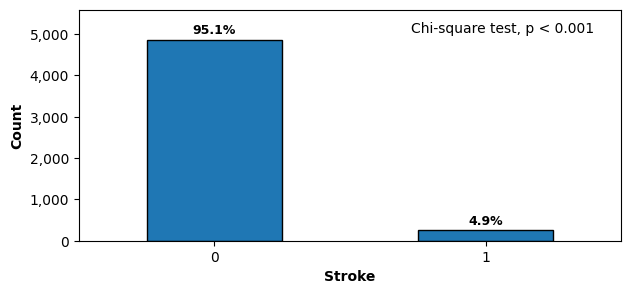

In [17]:
# | label: fig-imbalance
# | fig-cap: '**The frequencies of target variable values**: "0" means "did not
# |          have stroke", "1" means "had stroke".
# |          Chi-squared goodness of fit test to test the hypothesis that the
# |          group sizes are equal was significant. This indicates that the
# |          target variable is **imbalanced**: there were approximately
# |          19.5 times more people without stroke than with stroke in the
# |          dataset.'
# | code-summary: Code of the figure
# | code-fold: true

# Plot
ax = my.plot_counts_with_labels(target_frequences, rot=0)
chi_sq_rez_1 = an.test_chi_square_gof(target_value_counts, output="short")
my.ax_axis_comma_format("y")


# Get the limits of the x-axis and y-axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Set the position of the annotation
x_pos = xlim[1] - 0.05 * (xlim[1] - xlim[0])  # 5% offset from the right edge
y_pos = ylim[1] - 0.05 * (ylim[1] - ylim[0])  # 5% offset from the top edge

# Add the annotation to the top right corner
ax.annotate(
    chi_sq_rez_1.capitalize(),
    xy=(x_pos, y_pos),
    xycoords="data",
    ha="right",
    va="top",
)
ax.set_xlabel("Stroke")
plt.show()

In [18]:
# | label: tbl-ci
# | tbl-cap: 'Stroke and non-stroke group sizes, percentages and 95% confidence
# |          intervals (CI) of the percentages.'
# | code-fold: true
target_frequences.columns = ["Stroke", "n", "%", "95% CI (lower)", "95% CI (upper)"]
target_frequences.style.hide(axis="index")

## Pre-Processing: Group-Independent Steps {#sec-pre-processing}

### Feature Engineering Principles

In this project, domain-knowledge-based, training set EDA-based as well as other common feature engineering techniques were used to expand the dataset with additional variables.

::: {.callout-note}

Extensive exploratory data analysis (**EDA**) was **exclusively** conducted **on the training data**. Additionally, the process of feature engineering (FE) was informed by the insights gained from the EDA performed on the training set too. **Several rounds of iterative FE and EDA were carried out**, with the first round of EDA taking place before FE. However, to avoid redundancy and to streamline the report, only the final results are presented herein. Therefore, while reading the report, **it may appear** that the analysis followed a **linear** progression and that some parts are arranged in an unconventional order, **whereas**, in reality, it constituted an **iterative process**.

:::



1) `stroke_incidence` is a non-linear function based on patient's age. In scientific literature, a plot with stroke incidence rates was found (see @fig-incidence). The Y axis values (incidence) of the red points (except the first one at <20 and the last one at 95+ years) from the plot were digitized[^exact-values] using an online tool called [WebPlotDigitizer](https://automeris.io/WebPlotDigitizer/) and the centers of the age intervals were used as X-axis values. These data points were fitted to the equation of the form $incidence = a⋅age^b$, and the resulting function was used to calculate the values of a new variable -- expected stroke incidence. 
   
   The calculation of `stroke_incidence` is implemented as function `get_stroke_incidence()`.

[^exact-values]: *Note.* After completing this project, in the scientific literature I managed to find the precise stroke incidence values that were originally used to generate the initial figure. These values closely resemble the digitized ones, and the differences between the equations derived from fitting the digitized data and the exact values are practically negligible. The exact values are as follows (incidence per 100,000): 5.15, 9.31, 14.55, 24.39, 38.64, 63.09, 97.78, 144.63, 214.56, 309.88, 436.71, 582.02, 713.37, 860.57, 1000 (see the black and white version of Fig. 1 in [Akyea *et al.* 2021](https://www.ahajournals.org/doi/full/10.1161/STROKEAHA.120.031659)).

![Trend of stroke incidence by age and sex (1998-2017). Source: [Akyea *et al.* 2021](https://www.ahajournals.org/doi/full/10.1161/STROKEAHA.120.031659)](img/stroke-incidence-Akyea-et-al-2021.png){#fig-incidence width=600px max-width=100%}


In [19]:
# Data representing approximate values of the red dots from
# https://www.ahajournals.org/doi/full/10.1161/STROKEAHA.120.031659
# (except from the last dot at age 95+) acquired by using WebPlotDigitizer
# (https://automeris.io/WebPlotDigitizer/)
ages = np.array([22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82, 87, 92])
incidence = np.array(
    [5, 12, 13, 24, 38, 63, 98, 145, 215, 309, 436, 582, 712, 858, 1000]
)

# Fit the power function to the data
params, covariance = curve_fit(power_function, ages, incidence)

# Extract the fitted parameters
a_fit, b_fit = params

# Make the function for the fitted curve
# NOTE: this is the main function that calculates "stroke incidence"
get_stroke_incidence = partial(power_function, a=a_fit, b=b_fit)

Let's illustrate the results graphically:

In [20]:
# Create a range of age values for plotting
age_range = np.linspace(0, 100, 100)

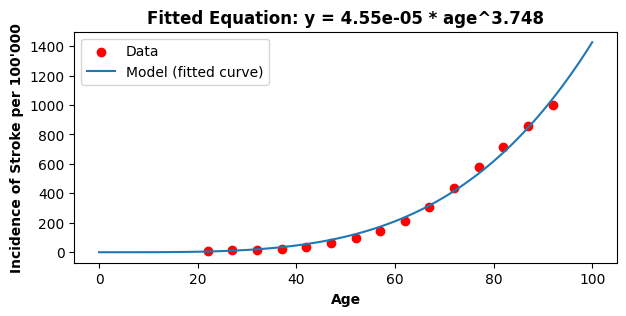

In [21]:
# Calculate the corresponding y values using the fitted equation
incidence_fit = get_stroke_incidence(age_range)

# Plot the data points and the fitted curve
plt.scatter(ages, incidence, color="red", label="Data")
plt.plot(age_range, incidence_fit, color="tab:blue", label="Model (fitted curve)")
plt.xlabel("Age")
plt.ylabel("Incidence of Stroke per 100'000")
plt.legend()
plt.title(f"Fitted Equation: y = {a_fit:.2e} * age^{b_fit:.3f}")
plt.show()

2) `stroke_risk_trend` is one more non-linear mathematical function based on age.
In [this source](https://www.cdc.gov/stroke/risk_factors.htm), it was mentioned that after being 55 years old, the chance of stroke doubles every 10 years. It was decided to use a variable, that mimics a similar trend. An age threshold value (e.g., 55 years) should be selected, then the risk trend value before the threshold is kept constant at 1 and after the threshold, it doubles every 10 years. This mathematical function is implemented as function `get_stroke_risk_trend()`. Two thresholds will be tested: 
   - as variable `stroke_risk_55` where the threshold of 55 years is based on on literature and 
   - as variable `stroke_risk_40` where the threshold of 40 years was chosen based on the EDA results of training data.

   The graphical illustration of `stroke_risk_trend`:

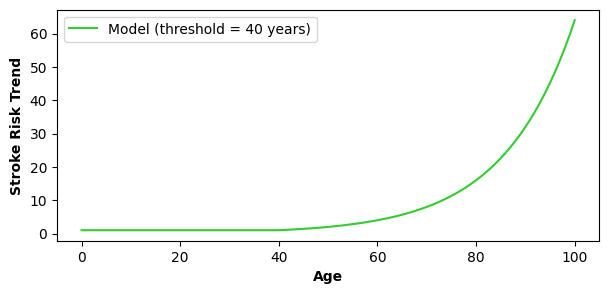

In [22]:
risk_trend = get_stroke_risk_trend(age_range, age_threshold=40)

# Plot the data points and the fitted curve
plt.plot(age_range, risk_trend, label="Model (threshold = 40 years)", color="limegreen")
plt.xlabel("Age")
plt.ylabel("Stroke Risk Trend")
plt.legend()
plt.show()

3) `health_risk_score` is a numerical measure that summarizes an individual's health risk by summing the presence of four factors (ranges from 0 to 4):
   - Hypertension presence (No = 0 or Yes = 1).
   - Heart disease presence (No = 0 or Yes = 1).
   - Overweight or obesity status (1 if BMI > 25, 0 otherwise).
   - Extreme diabetic condition (1 if average glucose level is above 165, 0 otherwise).

The chosen values of BMI and average glucose level are based on the EDA results of training data.

Additional variables were created by using common feature engineering techniques. Next, only the principles will be described (with a few examples), and the details can be found in the code.

1) Continuous variables were discretized into categories:
   - by using domain knowledge (e.g., BMI categories);
   - by using the results of EDA (e.g., additional average glucose level category "Extreme diabetic" which seemed to form a separate cluster in a plot or a derivative from this variable `avg_glucose_gr_above_165_01` where `1` if glucose level is above 165 and `0` otherwise);
   - arbitrary (e.g., age categories).
2) Binary variables were created from categorical variables with more than two categories, e.g.:
   - `residence_type` (Urban/Rural) was converted into `residence_is_urban_01` (0 if Rural, 1 if Urban).
3) Binary missing value indicators were created for variables with missing values.
4) Categories of ordinal variables were encoded as integers.
5) Square of `age` variable.  
6) Several interaction variables were created. Several strategies were used:
   - by multiplying two continuous variables (e.g., `age` and `avg_glucose_level`);
   - by multiplying a continuous and a categorical variable represented as 0/1 (e.g., `age` and `smoking_status` which is 0 if "never smoked" and 1 otherwise);
   - by multiplying a continuous and a categorical variable represented as -1/1 (e.g., `age` and `sex` which is -1 for females and +1 for males);
   - etc.
7) Ratio of two continuous variables was created (e.g., `bmi` and `avg_glucose_level`).


### Pre-Processing Steps

In the group-independent pre-processing, the following steps were performed:

1) Remove the only case with `gender` "Other".
2) Convert binary variables to both 
   - 0/1 format (for modeling, tha names of these features will end in `_01`);
   - No/Yes format (for EDA; after EDA step these variables will be removed as redundant).
3) Merge work types "children" and "Never_worked" into a single category "Never worked".
4) Names of some categories were fixed or changed to be more informative or consistent.
5) Moving target variable to the beginning of the dataset. nd order the remaining variables alphabetically.
6) More efficient data types were automatically chosen via `klib.convert_datatypes`{.python}.
7) Variable `id` was removed as not informative.

### Pre-Processing Code

::: {.callout-note}

Variables that names end in `_01` are binary variables with `0` for "No" and `1` for "Yes". Their categorical No/Yes counterparts (have no pattern in variable name) will be removed after EDA.

:::

In [23]:
# Fix/Change data types ----------------------------------------------------
# Define datatypes
dtype_no_yes = pd.CategoricalDtype(categories=["No", "Yes"], ordered=True)

categories_smoking_status_1 = ["never smoked", "formerly smoked", "smokes"]
categories_smoking_status_2 = ["never smoked", "formerly smoked", "smokes", "Unknown"]
dtype_smoking_1 = pd.CategoricalDtype(
    categories=categories_smoking_status_1, ordered=True
)
dtype_smoking_2 = pd.CategoricalDtype(
    categories=categories_smoking_status_2, ordered=True
)

work_categories_0 = [
    "Children",
    "Never worked",
    "Government Sector",
    "Private Sector",
    "Self Employed",
]
work_categories = [
    "Never worked",
    "Government Sector",
    "Private Sector",
    "Self Employed",
]
dtype_work_type_0 = pd.CategoricalDtype(categories=work_categories_0)
dtype_work_type = pd.CategoricalDtype(categories=work_categories)


# Transform dataset
# fmt: off
data_all = (
    # Remove case that has only a single value of gender
    data_all.query("gender != 'Other'").assign(
        stroke_01=lambda df: df["stroke"],
        stroke=lambda df: my.convert_01_to_no_yes(df["stroke"]),
        
        age_square=lambda df: df["age"] ** 2,
        age_55_plus=lambda df: my.convert_bool_to_01(df["age"] >= 55),
        age_group=lambda df: pd.cut(
            df["age"],
            bins=[0, 18, 35, 55, 1000],
            labels=["Child", "Young Adult", "Adult", "Elderly"],
            right=False,
        ),
        age_group_num=lambda df: df["age_group"].replace({
            "Child": 0,
            "Young Adult": 1,
            "Adult": 2,
            "Elderly": 3,
        }).astype(np.int8),
        
        # Non-linear functions based on age
        stroke_risk_40=lambda x: get_stroke_risk_trend(x["age"], age_threshold=40),
        stroke_risk_55=lambda x: get_stroke_risk_trend(x["age"], age_threshold=55),
        stroke_incidence=lambda x: get_stroke_incidence(x["age"]),
        
        # Further variables
        # Glucose concentration thresholds
        # https://www.mayoclinic.org/diseases-conditions/prediabetes/diagnosis-treatment/drc-20355284
        avg_glucose_gr_medical=lambda df: pd.cut(
            df["avg_glucose_level"],
            bins=[0, 100, 125, 1000],
            labels=["Normal", "Prediabetic", "Diabetic"],
        ),
        avg_glucose_gr_medical_num=lambda df: df["avg_glucose_gr_medical"].replace({
            "Normal": 0,
            "Prediabetic": 1,
            "Diabetic": 2,
        }).astype(np.int8),
        avg_glucose_gr_medical_165=lambda df: pd.cut(
            df["avg_glucose_level"],
            bins=[0, 100, 125, 165, 1000],
            labels=["Normal", "Prediabetic", "Diabetic", "Extreme diabetic"],
        ),
        avg_glucose_gr_medical_165_num=lambda df: df["avg_glucose_gr_medical_165"].replace({
            "Normal": 0,
            "Prediabetic": 1,
            "Diabetic": 2,
            "Extreme diabetic": 3,
        }).astype(np.int8),
        
        avg_glucose_is_diabetic_01=lambda df: (
            my.convert_bool_to_01(df["avg_glucose_level"] > 125)
        ),

        avg_glucose_gr_165=lambda df: pd.cut(
            df["avg_glucose_level"], bins=[0, 165, 1000]
        ),
        avg_glucose_gr_above_165_01=lambda df: (
            df["avg_glucose_gr_165"].astype(str)
            .replace({
                "(0, 165]": 0,
                "(165, 1000]": 1,
            })),
        
        bmi_is_unknown_01=lambda df: my.convert_bool_to_01(df["bmi"].isna()),
        
        # BMI categories:
        # https://www.cdc.gov/obesity/basics/adult-defining.html
        bmi_group=lambda x: pd.cut(
            x["bmi"],
            bins=[0, 18.5, 25, 30, 10000],
            labels=["Underweight", "Normal", "Overweight", "Obese"],
            right=False,
        ),
        bmi_group_num=lambda df: (
            df['bmi_group']
            .replace({
                "Underweight": 0,
                "Normal": 1,
                "Overweight": 2,
                "Obese": 3,
            })
            .astype(np.float16)),
        
        bmi_overweight_or_obese_01=lambda df: (
            my.convert_bool_to_01(df["bmi"] >= 25).fillna(0)
        ),
        bmi_normal_or_underweight_01=lambda df: (
            my.convert_bool_to_01(df["bmi"] < 25).fillna(0)
        ),
        
        gender=lambda df: df["gender"].astype("category"),
        gender_is_male_01=lambda df: my.convert_bool_to_01(df["gender"]=="Male"),
        
        residence_type=lambda df: df["residence_type"].astype("category"),
        residence_is_urban_01=lambda df: my.convert_bool_to_01(df["residence_type"] == "Urban"),
                
        hypertension_01=lambda df: df["hypertension"],
        hypertension=lambda df: my.convert_01_to_no_yes(df["hypertension"]),
        
        heart_disease_01=lambda df: df["heart_disease"],
        heart_disease=lambda df: my.convert_01_to_no_yes(df["heart_disease"]),
        
        ever_married=lambda df: df["ever_married"].astype(dtype_no_yes),
        ever_married_01=lambda df: my.convert_no_yes_to_01(df["ever_married"]),
        
        smoking_status_2=lambda df: df["smoking_status"].astype(dtype_smoking_2),
        smoking_status=lambda df: df["smoking_status"].astype(dtype_smoking_1),
        smoking_status_is_unknown_01=lambda df: (
            my.convert_bool_to_01(df["smoking_status"].isna())
        ),
        
        work_type_original=lambda df: (
            df["work_type"]
            .replace({
                "children": "Children",
                "Never_worked": "Never worked",
                "Govt_job": "Government Sector",
                "Private": "Private Sector",
                "Self-employed": "Self Employed",
            })
            .astype(dtype_work_type_0)
        ),
        work_type=lambda df: (
            df["work_type_original"]
            .replace({"Children": "Never worked", "Never worked": "Never worked"})
            .astype(dtype_work_type)
        ),

        # Health risk score
        health_risk_score=lambda x: (
            x["hypertension_01"]
            + x["heart_disease_01"]
            + (x["bmi"] >= 25).astype(int) # Is overweight or obese
            + (x["avg_glucose_level"] > 165).astype(int) # Is extreme diabetic
        ),
        
        # Interaction terms
        age_bmi_interaction=lambda x: x["age"] * x["bmi"],
        age_gender_interaction=lambda x: (
            x["age"] * x["gender"].replace({"Male": 1, "Female": -1}).astype(int)
        ),
        age_heart_disease_interaction=lambda x: x["age"] * x["heart_disease_01"],
        age_hypertension_interaction=lambda x: x["age"] * x["hypertension_01"],
        
        age_smoking_interaction=lambda x: (
            x["age"] * (x["smoking_status"] != "never smoked")
        ),

        bmi_heart_disease_interaction=lambda x: x["bmi"] * x["heart_disease_01"],
        bmi_hypertension_interaction=lambda x: x["bmi"] * x["hypertension_01"],
        bmi_smoking_interaction=lambda x: (
            x["bmi"] * (x["smoking_status"] != "never smoked")
        ),
        hypertension_heart_disease_interaction_01=lambda x: (
            x["hypertension_01"] * x["heart_disease_01"]
        ),

        # Ratios
        avg_glucose_bmi_ratio=lambda x: x["avg_glucose_level"] / x["bmi"],
    )
    # Use more efficient data types
    .pipe(klib.convert_datatypes)
)
# fmt: on

# Sort columns -------------------------------------------------------------
# Sort required columns and remove unnecessary ones
first_cols = ["stroke", "stroke_01"]
remove_cols = ["id"]
column_order = [
    *first_cols,
    *sorted(
        [col for col in data_all.columns if col not in [*first_cols, *remove_cols]]
    ),
]

data_all = data_all[column_order]
n_updated = data_all.shape[0]

## Create Training, Validation and Test Sets {#sec-split}

To prevent data leakage and to get more rigorous estimates of model performance, the dataset was split into train, validation and test sets in the ratio **70:15:15**. The split was stratified by the target variable to take class imbalance into account.


- the train set is used to gain more insights on the data, train and tune models, 
- the validation set is used to test the performance of the candidate models,
- the test set is used to evaluate the final model.

In [24]:
# | code-fold: true

# The example to split data into 3 datasets
data_train, data_vt = train_test_split(
    data_all, test_size=0.30, random_state=22, stratify=data_all.stroke
)

data_validation, data_test = train_test_split(
    data_vt, test_size=0.5, random_state=22, stratify=data_vt.stroke
)

n_train, n_validation, n_test = (
    data_train.shape[0],
    data_validation.shape[0],
    data_test.shape[0],
)

Actual sample sizes in these sets are:

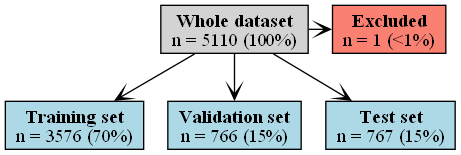

In [25]:
# | label: fig-n
# | fig-cap: 'Sample size in different sets.
# |           A single sample with gender value "Other" was removed.'
# | code-summary: Code of the flowchart
# | code-fold: true

# Create the flowchart
n_excluded = n_initial - n_updated
create_flowchart_data_split(
    n_train,
    n_validation,
    n_test,
    n_excluded,
    output_path="img/flowchart_sample_sizes.png",
)

## EDA on Training Set {#sec-eda}

The initial inspection of the whole dataset (@sec-initial-inspection) was used to get an overview of data and to catch some obvious anomalies and discrepancies. 
To get deeper insights but no to leak data (get reliable model performance estimates), further investigation was made basing on training set only.
It suggested some pre-processing ideas that were implemented in the previous section (@sec-pre-processing).

*Note.* 
This section contains "quick and dirty" exploratory plots the purpose of which is to get insight about data and spot trends and discrepancies but not make all plots publication-ready. This means:

- Plots might not be extremely pretty;
- Colors in different plots might not match the same groups;
- Plots may lack captions;
- Legend position might not be optimal;
- Other imperfections might be introduced/not fixed.

### General EDA

Besides the target variable (`stroke`), hypertension, heart disease and their derivatives exhibit a high class imbalance. As it is expected to have a higher proportion of healthy individuals compared to those with specific medical conditions, no further actions need to be taken in this regard.

The indicator for missing BMI values is also imbalanced, but it is fortunate that there is not a significant percentage of missing values in this variable. Furthermore, the columns related to BMI display the same missing value pattern, as anticipated. In contrast, the smoking_status variable exhibits a different pattern (as illustrated in @fig-na-trends).

The plots in the `sweetviz` report indicate that many variables, including age, the trend of stroke incidence, average glucose level, and certain BMI groups, are associated with the target variable to some extent. However, it appears that gender and residence type either show no significant associations with the target variable or exhibit extremely weak associations.

From the technical side, it can be noticed that now variables use more efficient Python data types (@tbl-col-info-preprocessed).

::: {.content-hidden when-format="html"}

---  

Start of the collapsible section  
`<details>`  

:::

<details class="with-border">
<summary>EDA: General info on columns, data types and values </summary>



Note that instead of `int64` and `float64`, more efficient data types were chosen (mainly via `klib.convert_datatypes()`{.python}).

In [26]:
# | label: tbl-col-info-preprocessed
# | tbl-cap: 'Summary of the variables in the dataset after pre-processing.'
# | code-summary: Code
# | code-fold: true

an.col_info(data_train, style=True)

In this type of `.col_info()` tables:

- `dominant` is the most frequent value;
- `p_` is a percentage of certain values;
-  `n_` is a number of certain values;
- in `data_type`, numeric data types (float and integer) are highlighted in *blue*, and the "category" data type is in *green*;
- in `n_unique`, binary variables are in different *green*, and
                 columns with a high number of unique values ($> 10$) are highlighted in *blue*;
- in `n_missing` and `p_missing`, zero values are in grey;
- in `p_dominant`, percentages above 90% are in *orange*;
- errors or extremely suspicious values (if any) are highlighted in *red*.

</details>


::: {.content-hidden when-format="html"}

`</details>`   
End of the collapsible section  

---  

:::

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>EDA: Patterns of missing values </summary>

Only the columns with missing values are shown here.

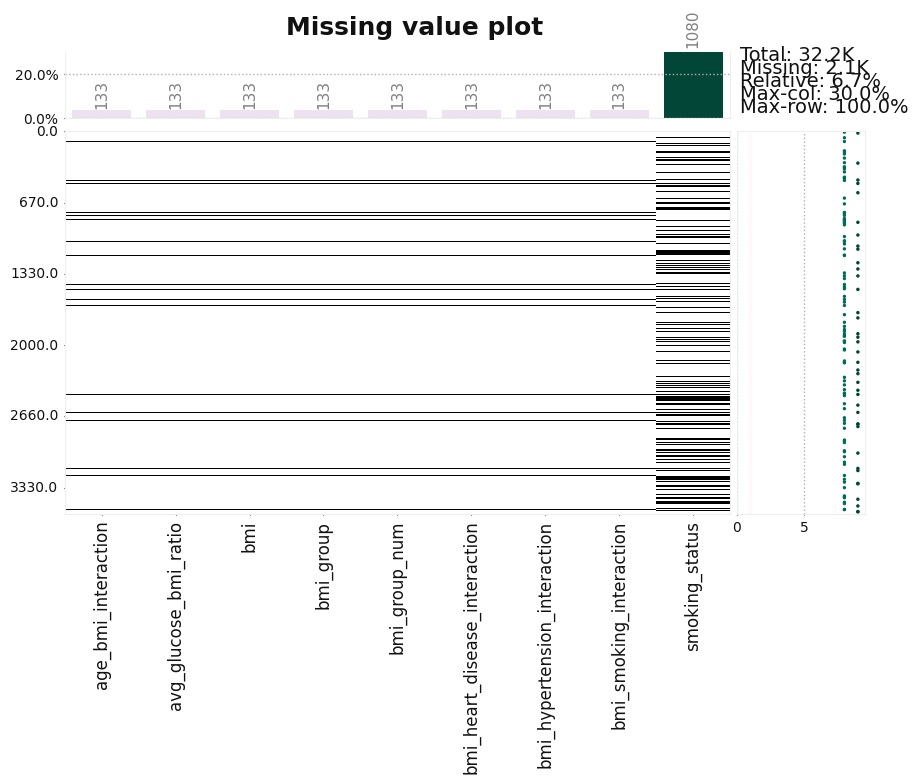

In [27]:
# | label: fig-na-trends
# | fig-cap: 'Trends in missing values in the training set.'
# | code-summary: Code of the figure
# | code-fold: true

klib.missingval_plot(data_train.loc[:, data_train.isna().any()], figsize=(10, 6));

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

::: {.content-hidden when-format="html"}

---  

Start of the collapsible section  
`<details>`  

:::

<details class="with-border" >
<summary>EDA: Data Profiling Report for Training Data (sweetviz) </summary>

::: {.callout-note}

`Sweetviz` performs data profiling in respect to the target variable: light blue **bars** indicate distribution of a *predictor variable* and dark blue **lines with points** indicate the distribution (mean) of the *target* variable in each class/range of values of predictor variable.

:::

Pay attentions to the "Associations" button in the report. Pay attention that for numeric variables Pearson's correlation is calculated which does not represent non-linear relationships well.

                                             |          | [  0%]   00:00 -> (? left)


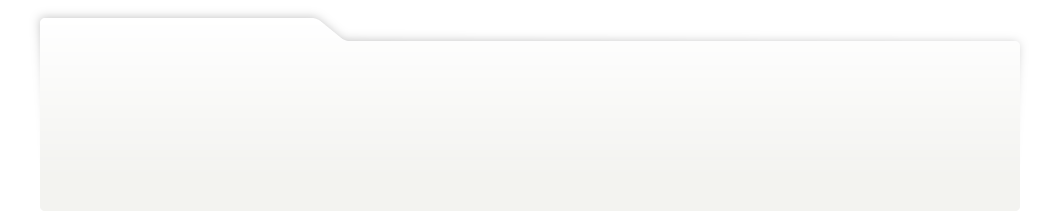
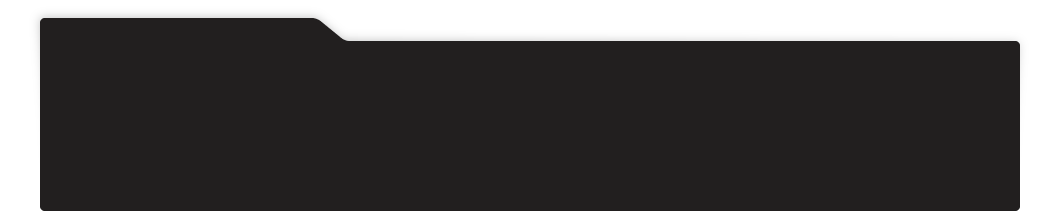
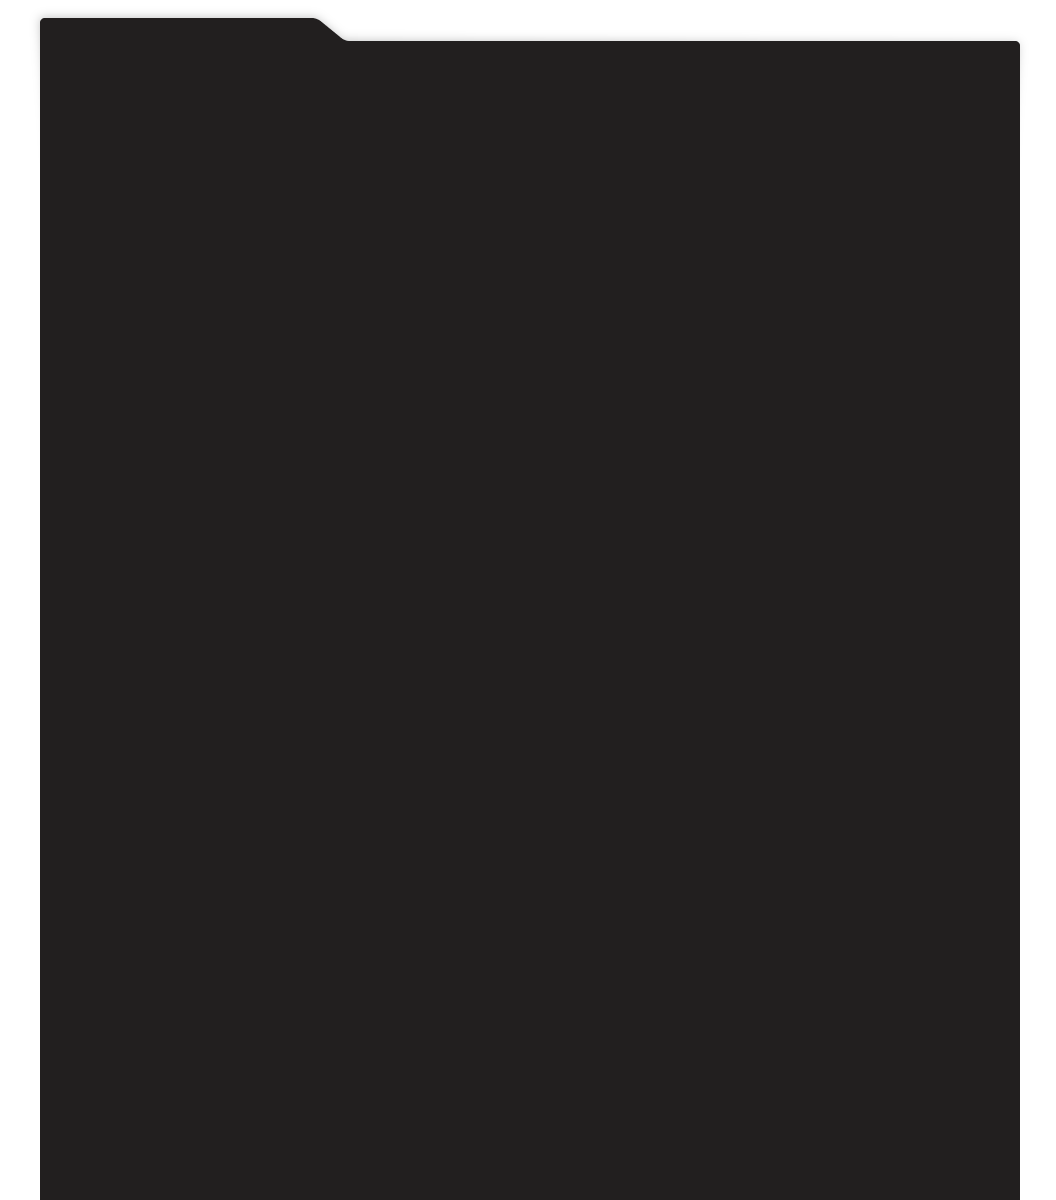
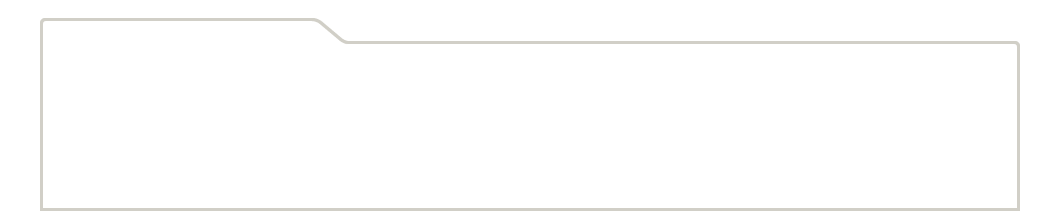
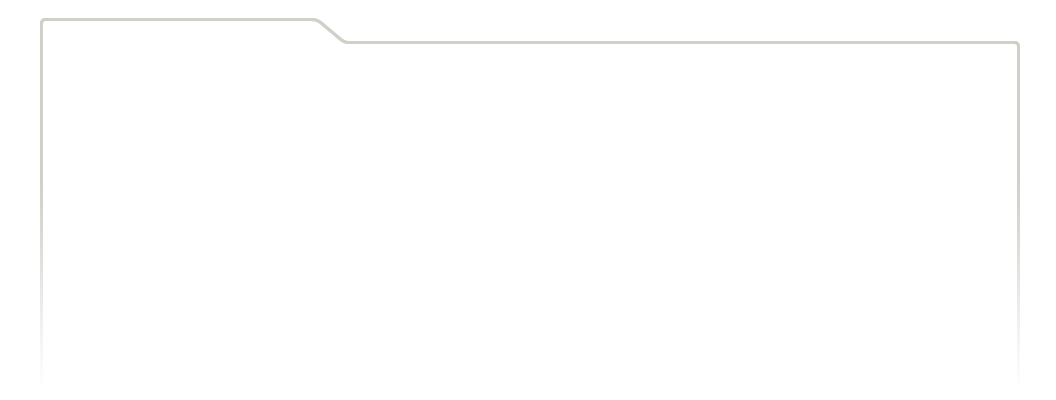
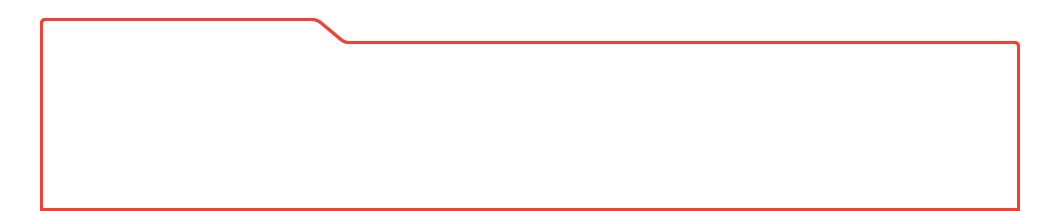
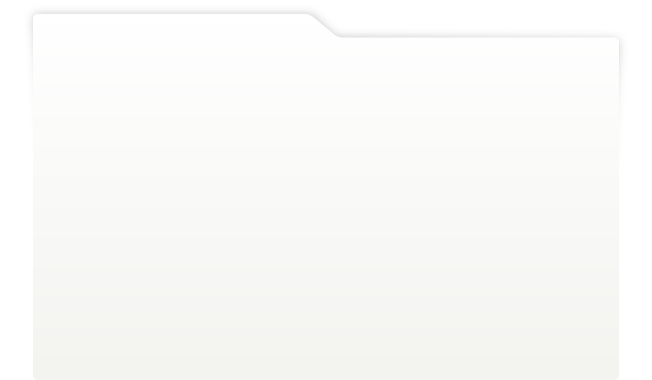
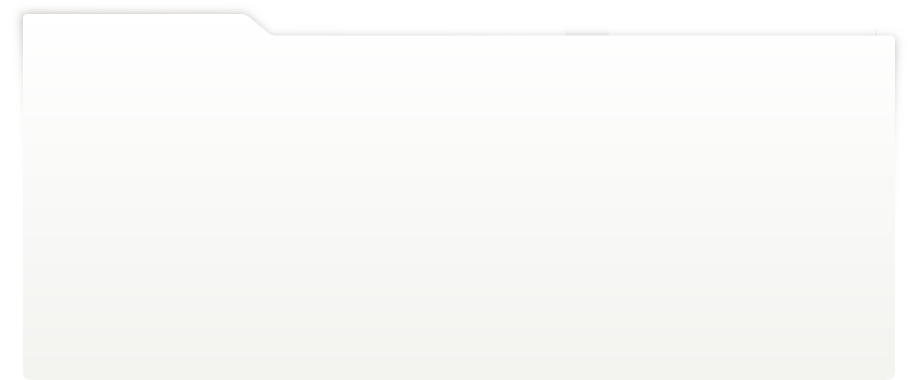
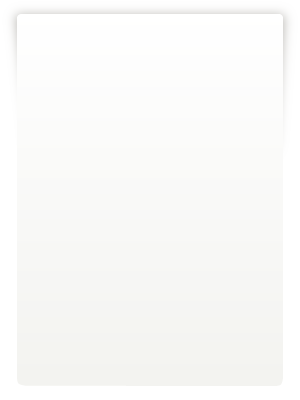
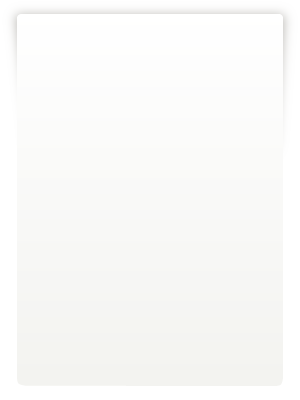
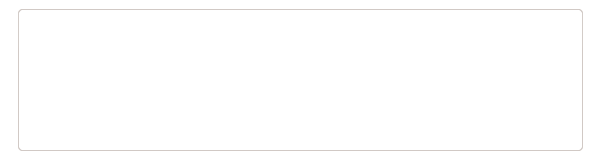
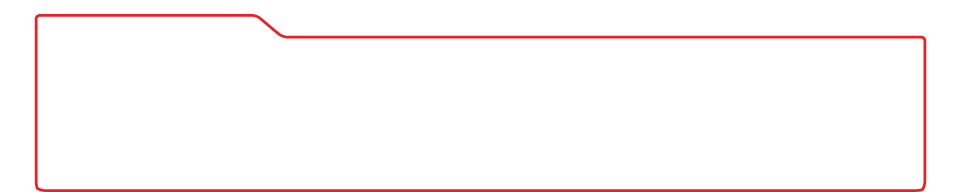
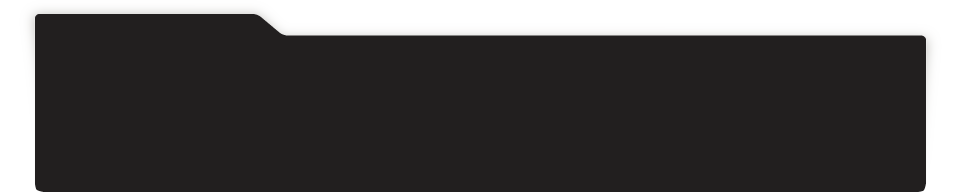
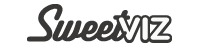
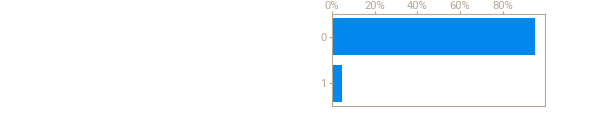
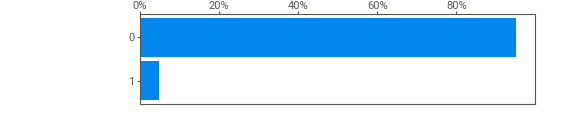
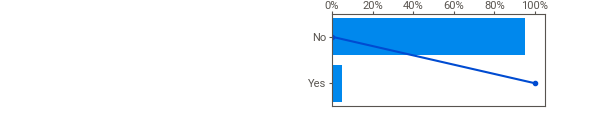
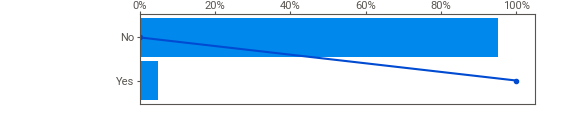
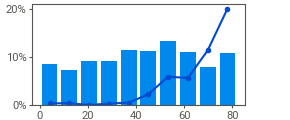
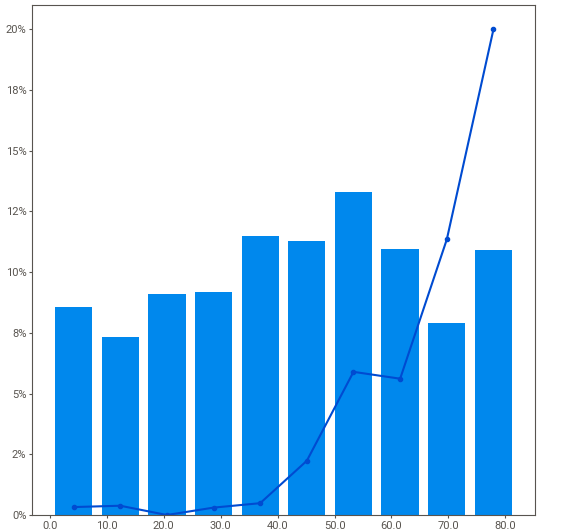
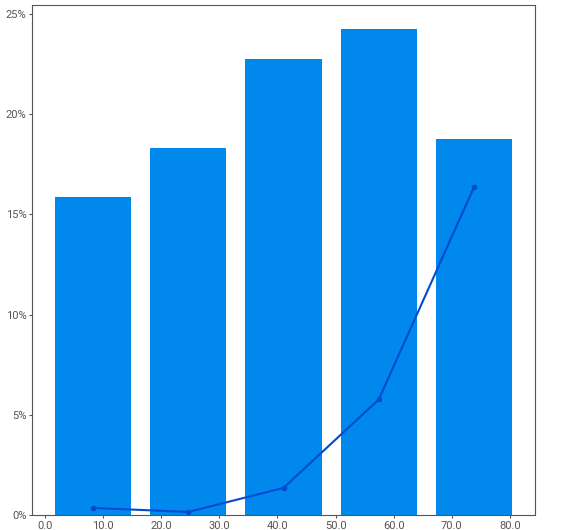
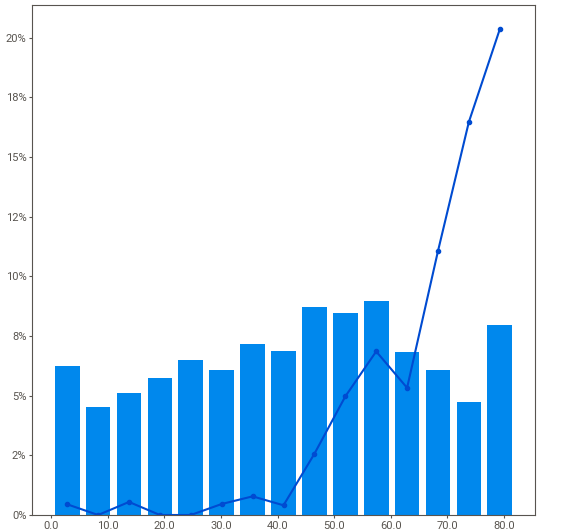
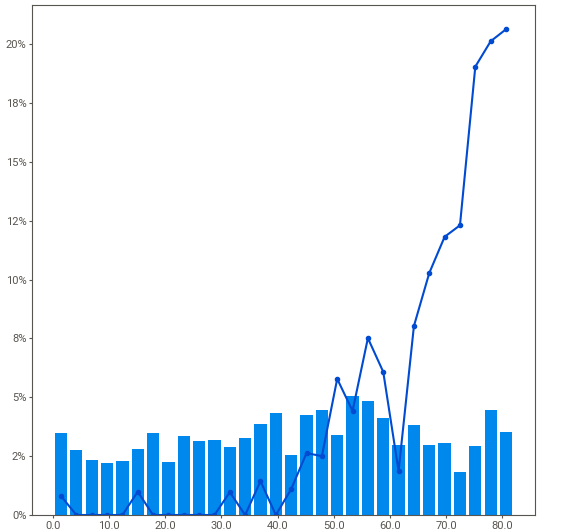
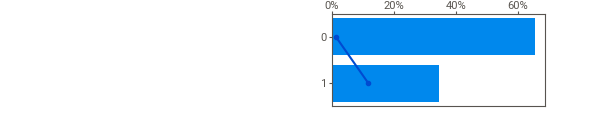
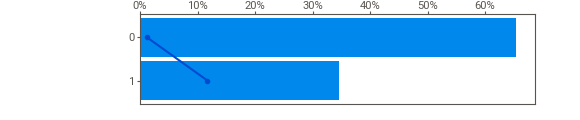
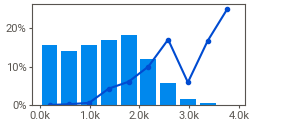
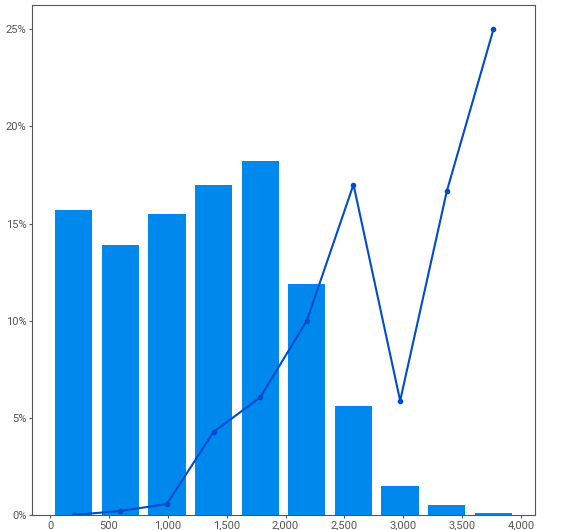
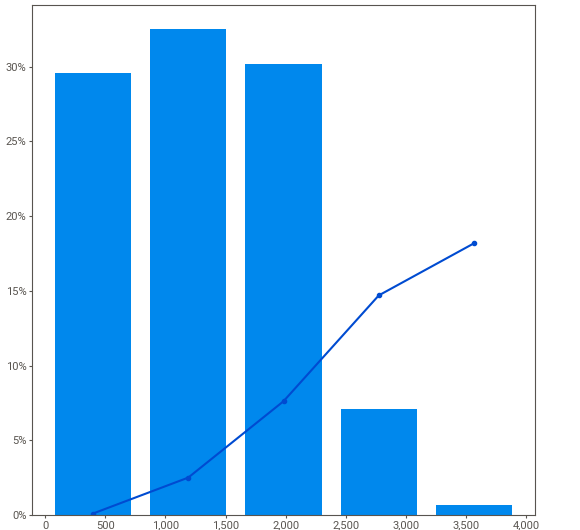
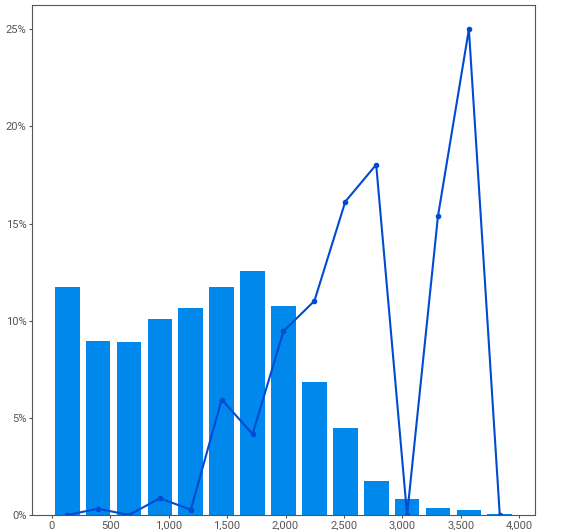
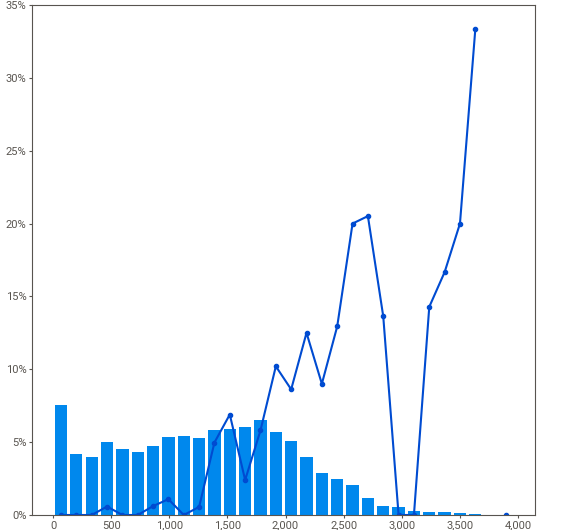
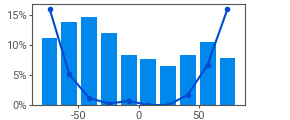
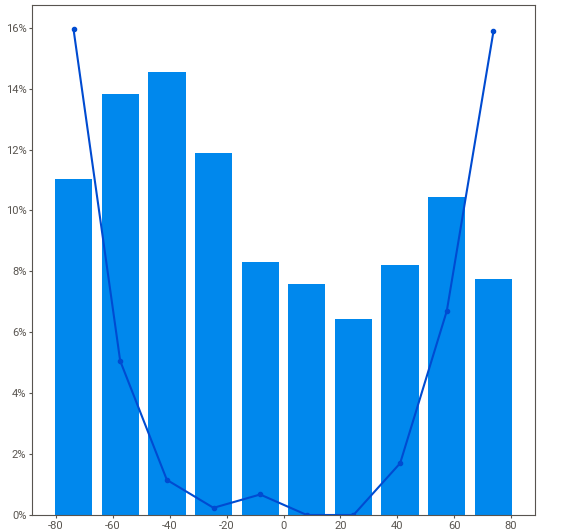
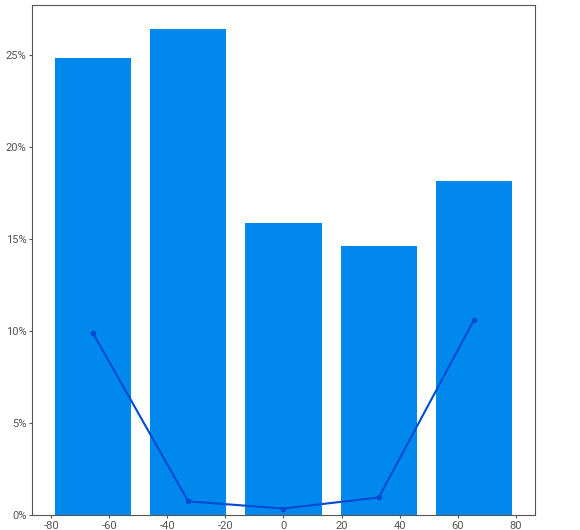
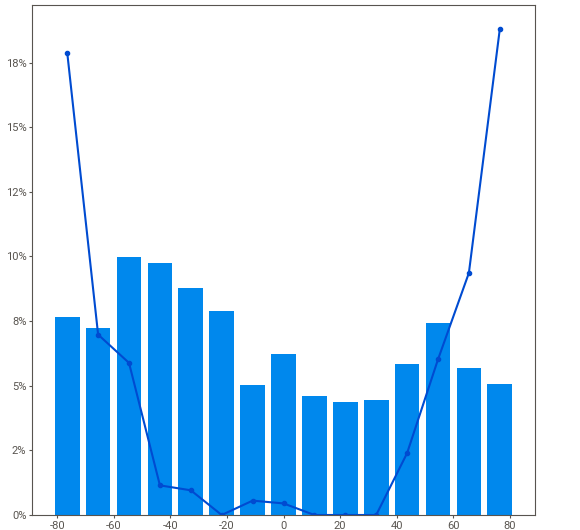
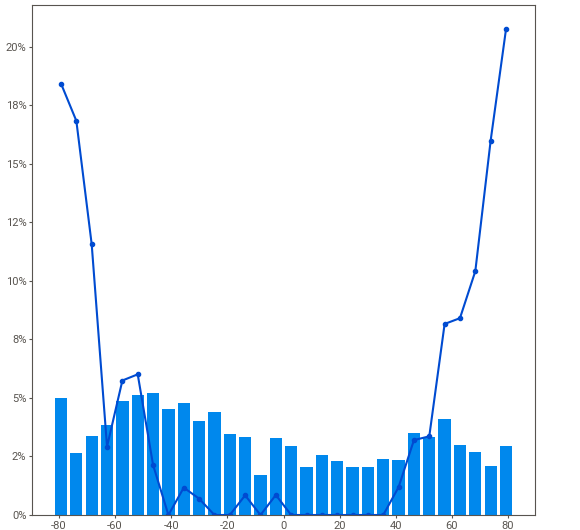
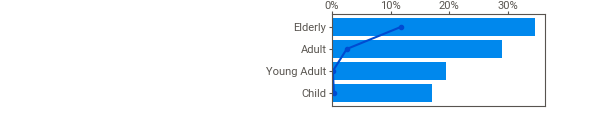
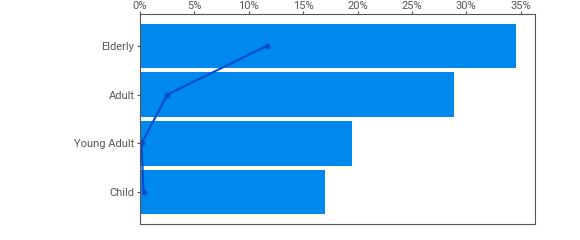
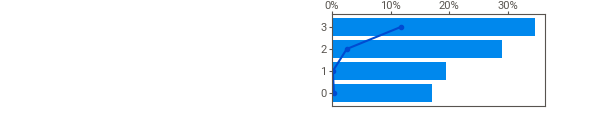
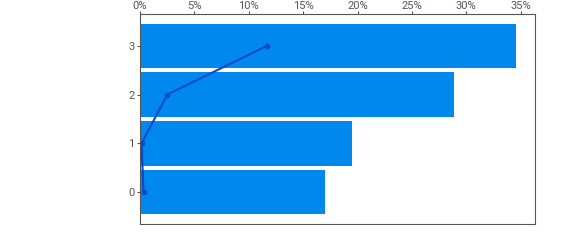
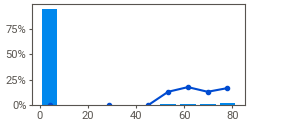
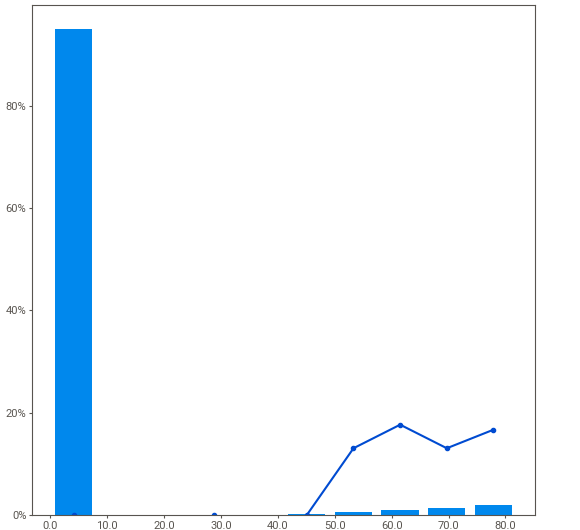
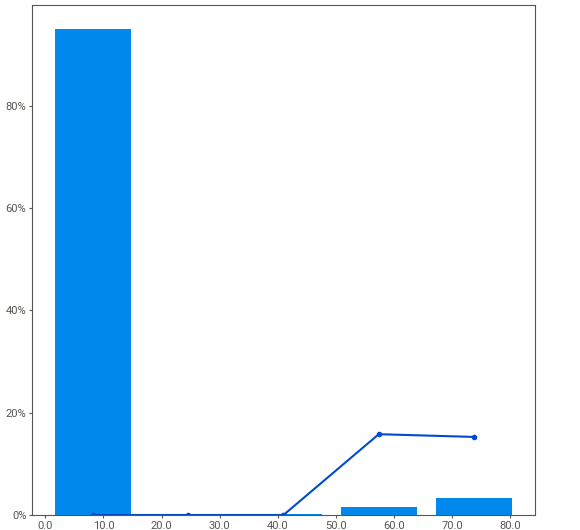
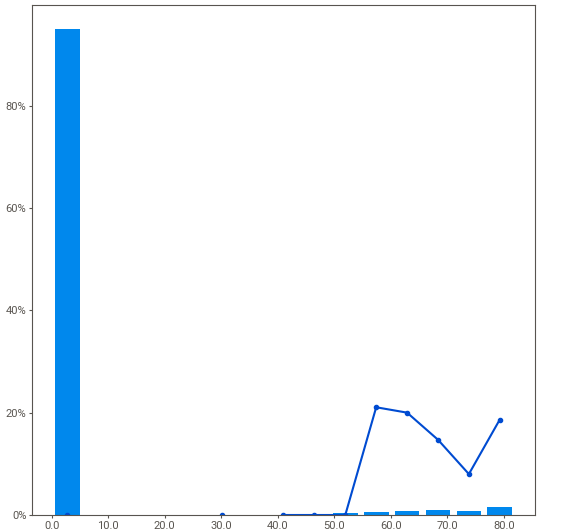
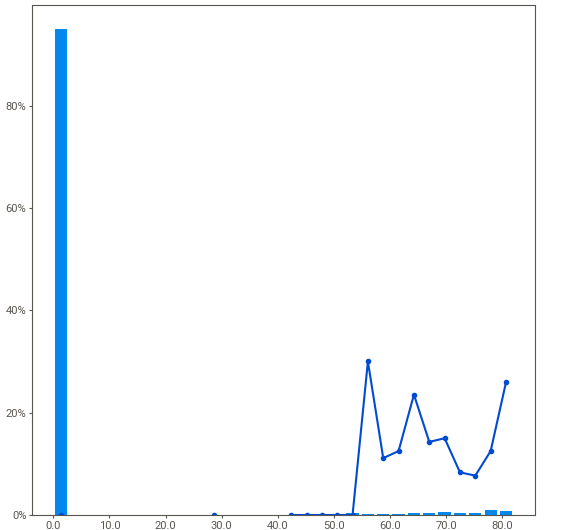
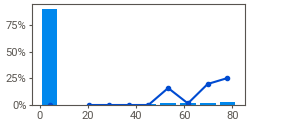
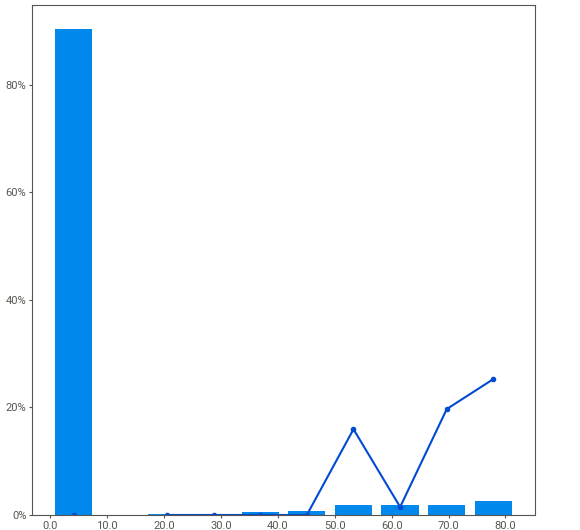
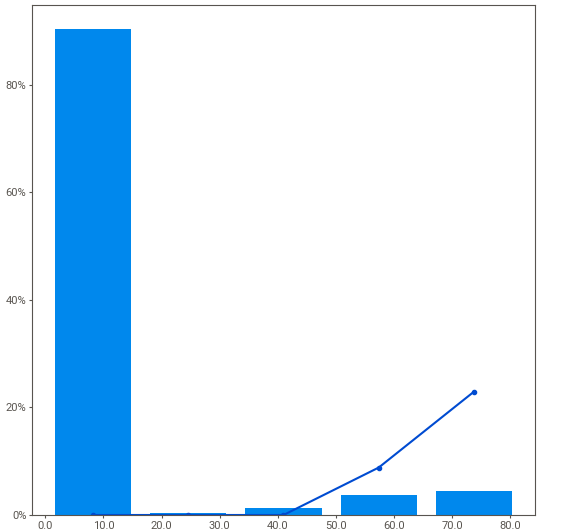
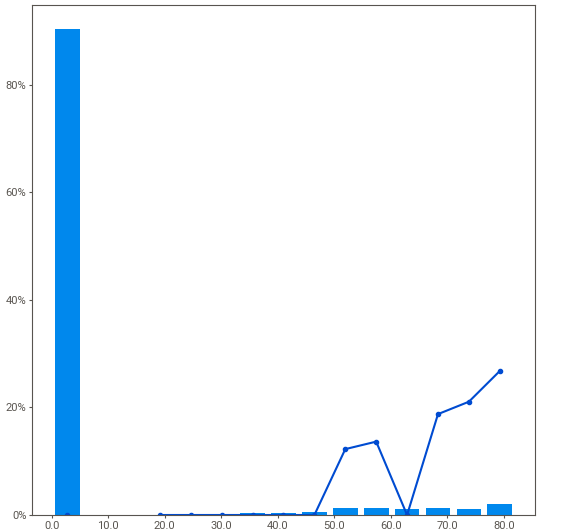
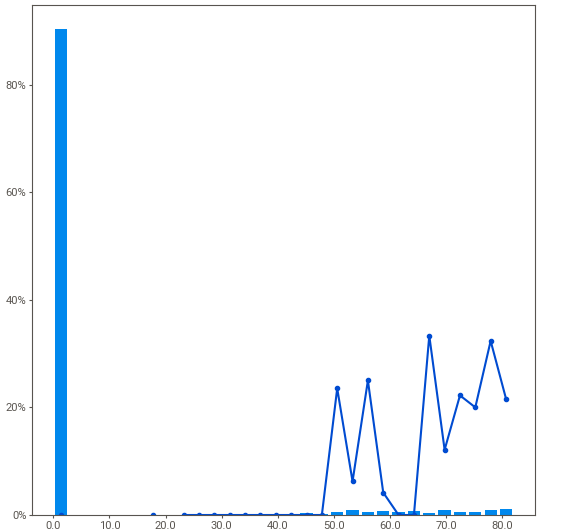
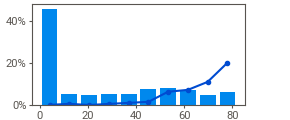
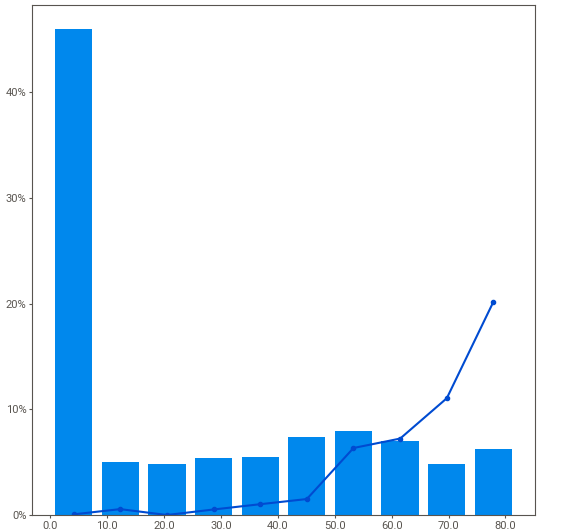
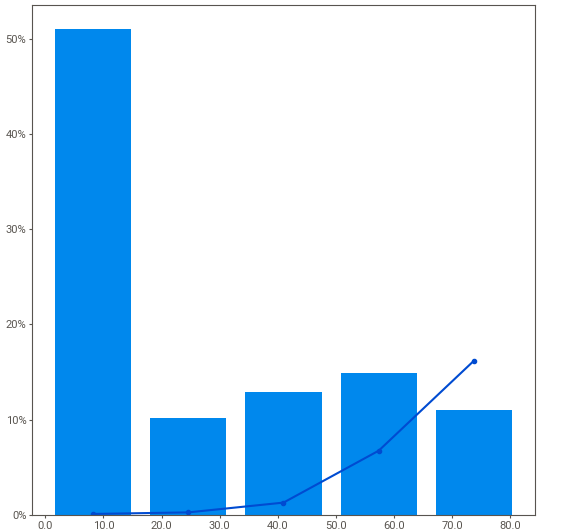
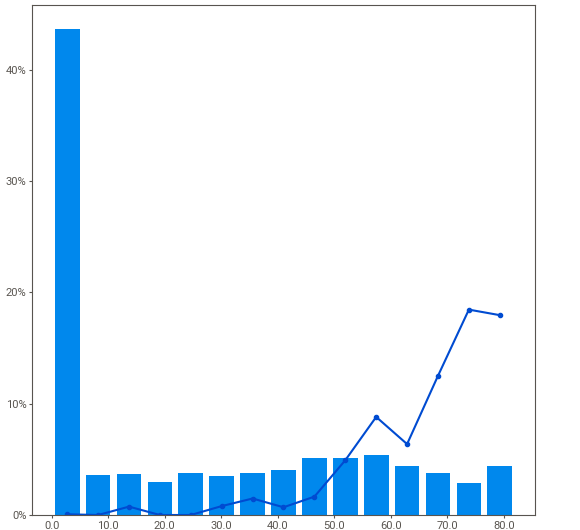
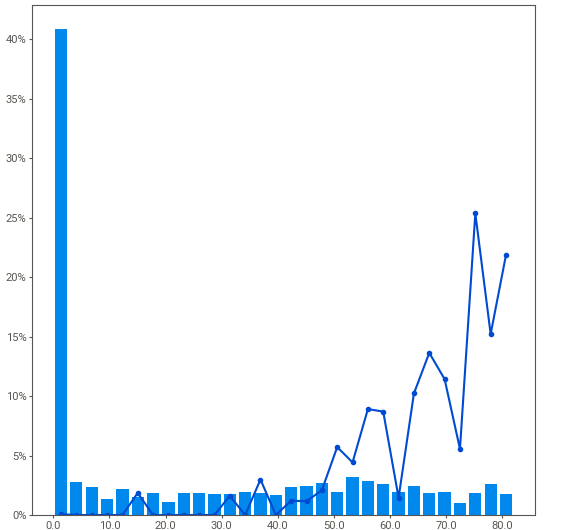
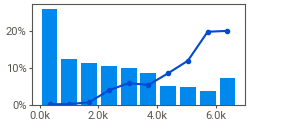
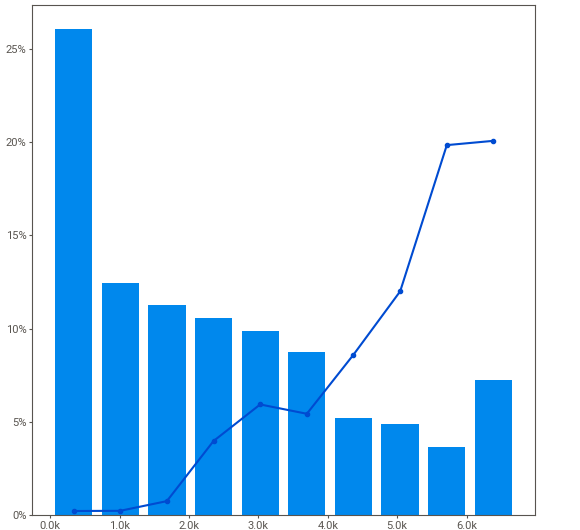
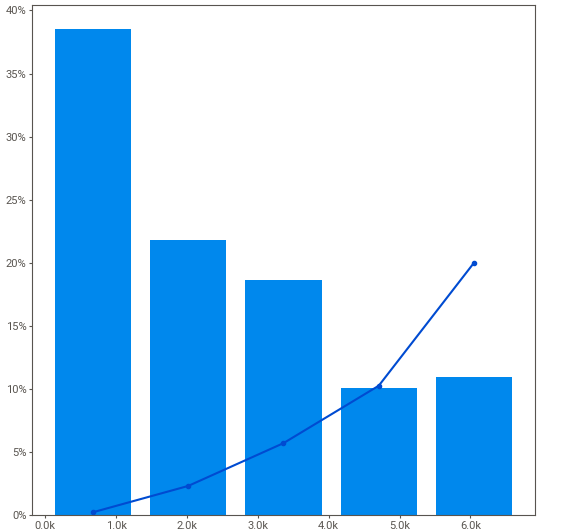
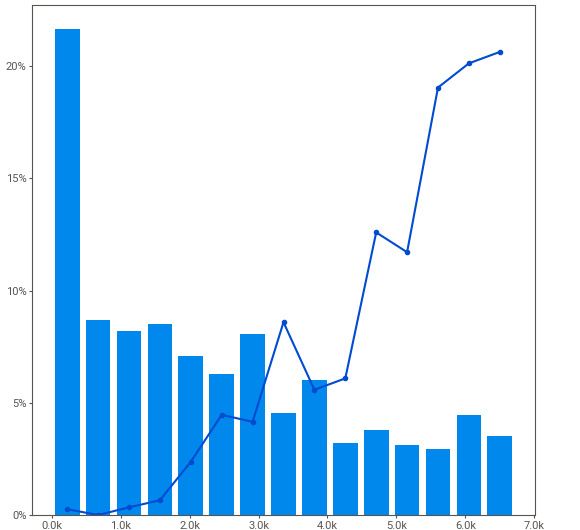
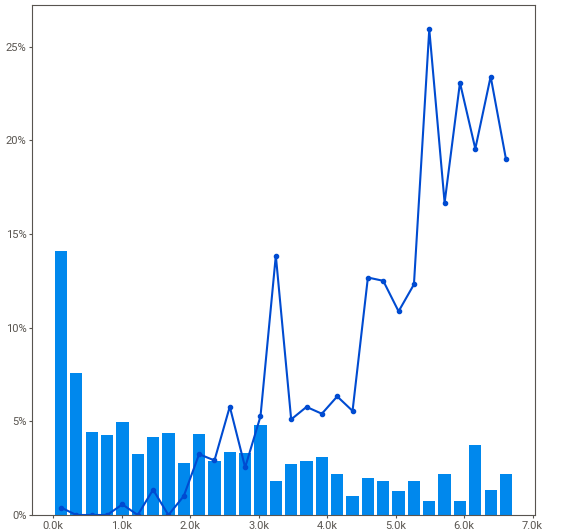
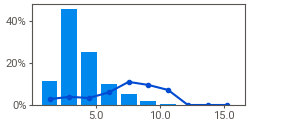
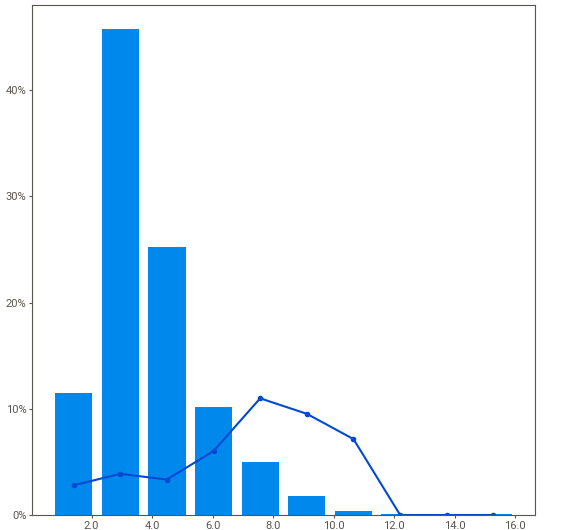
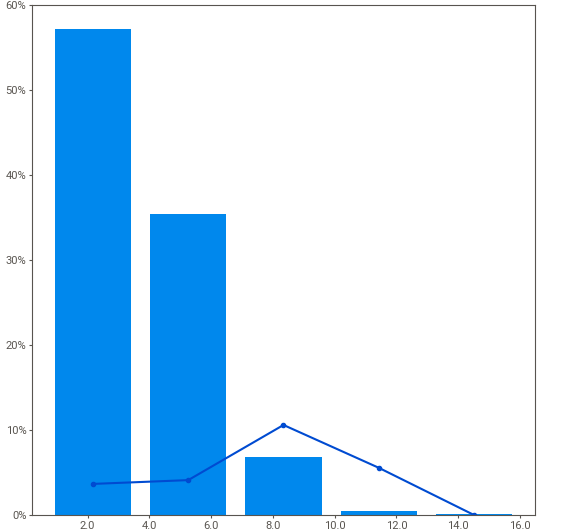
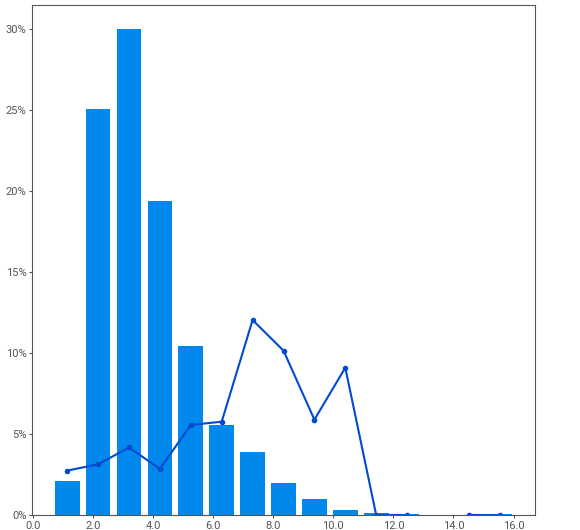
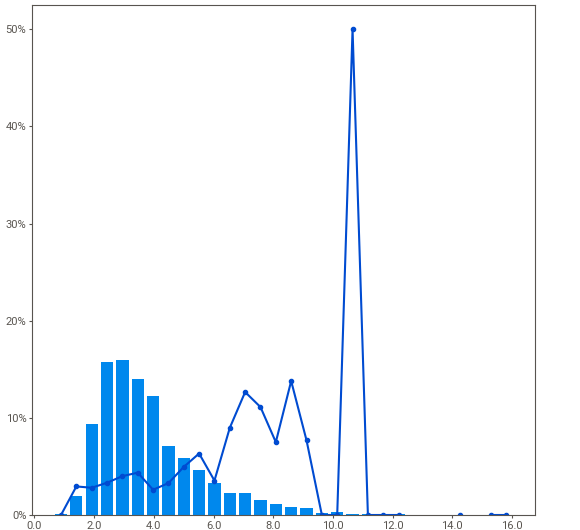
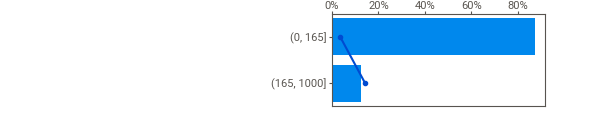
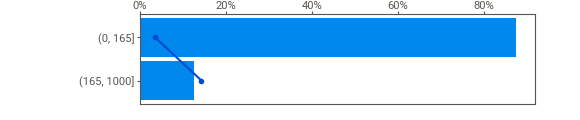
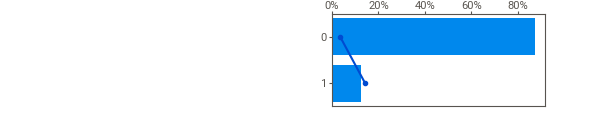
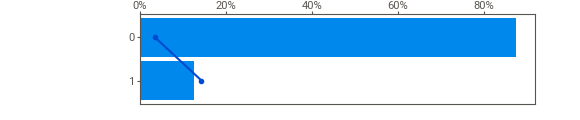
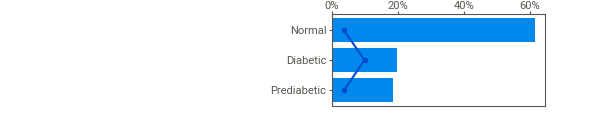
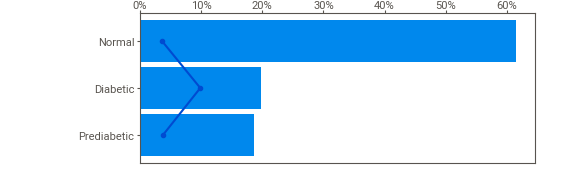
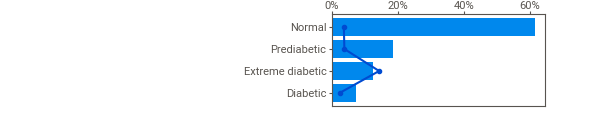
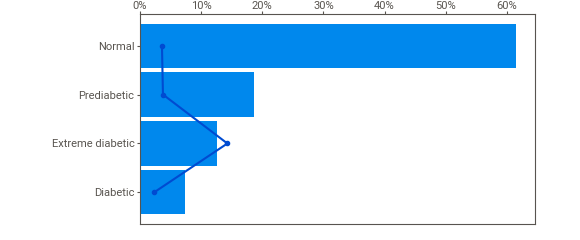
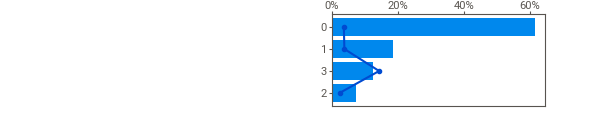
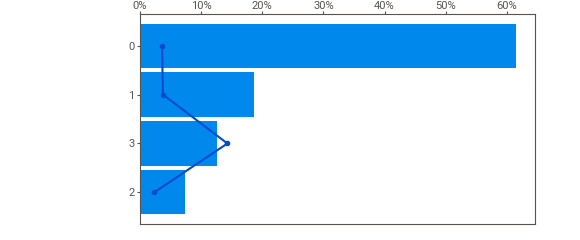
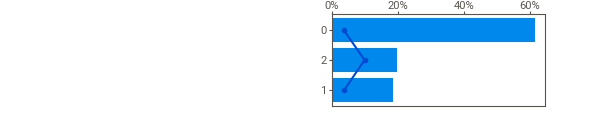
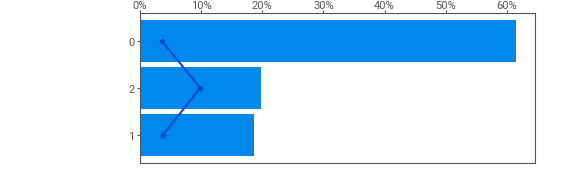
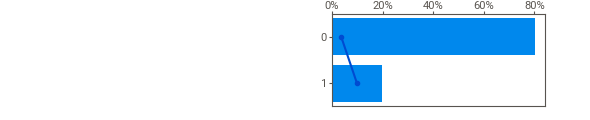
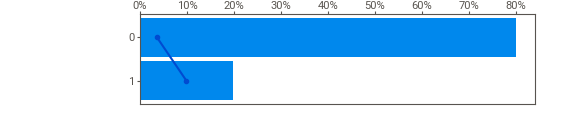
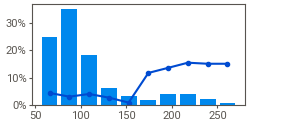
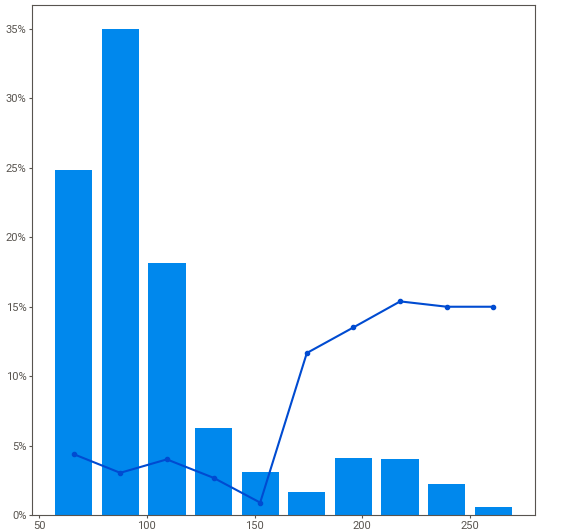
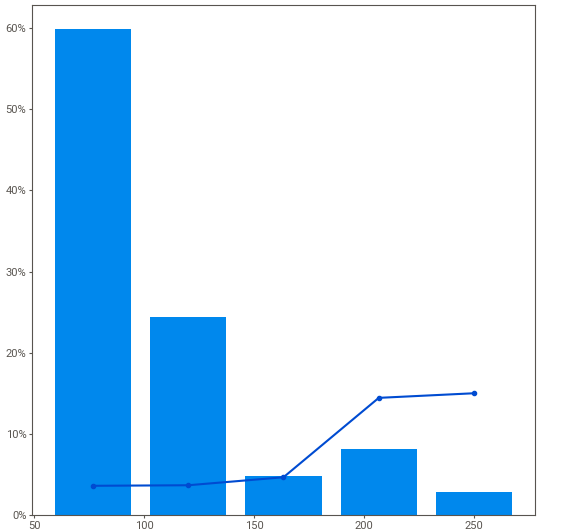
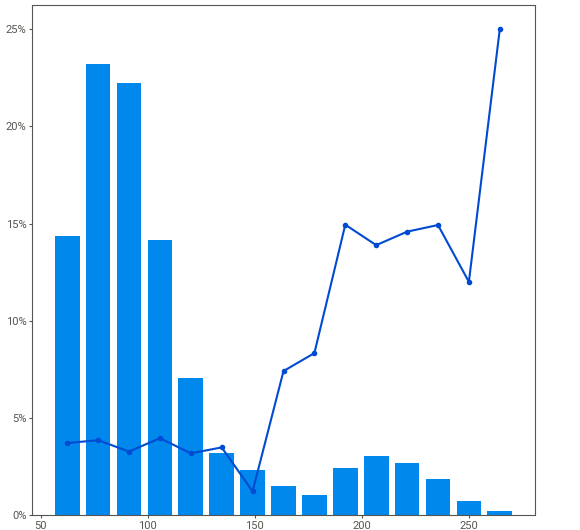
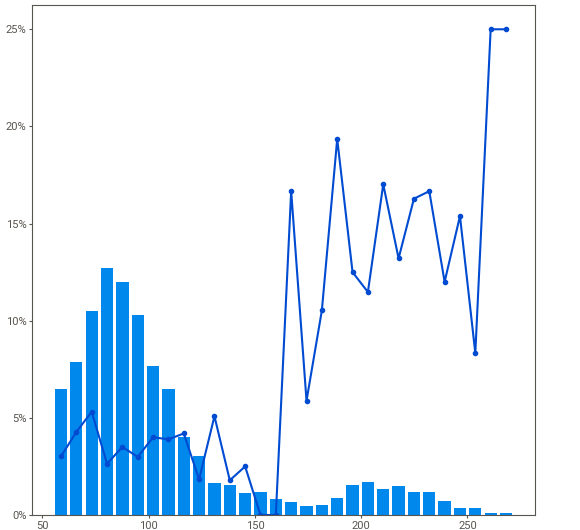
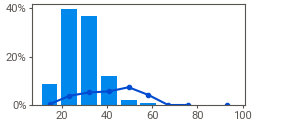
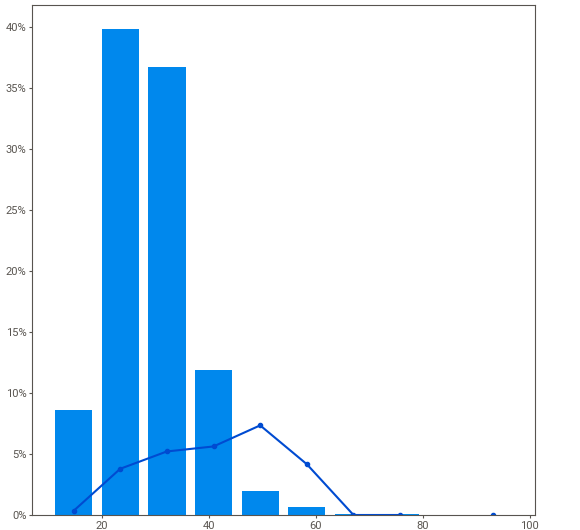
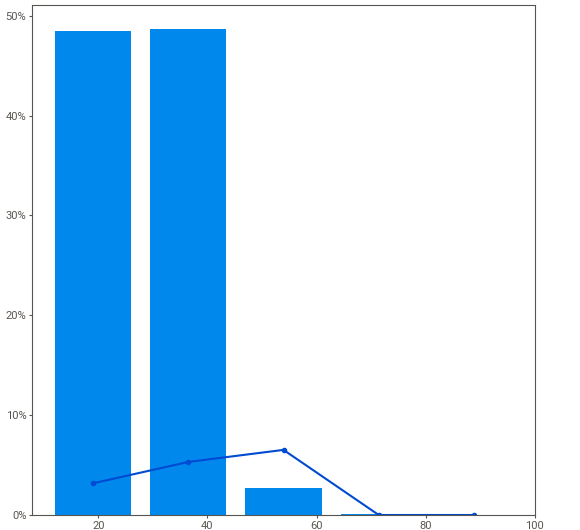
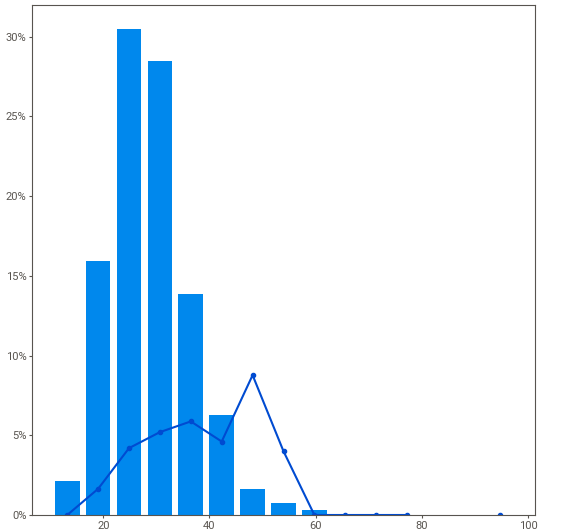
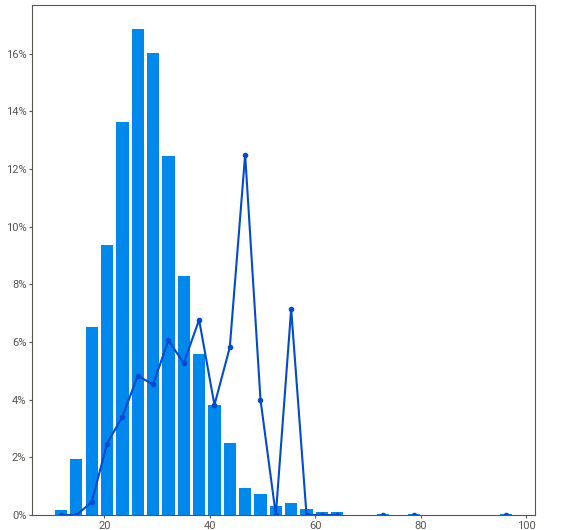
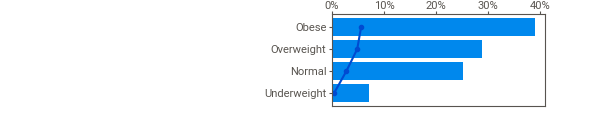
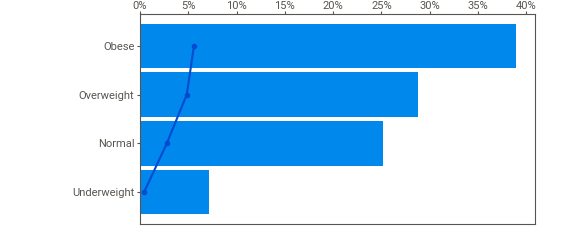
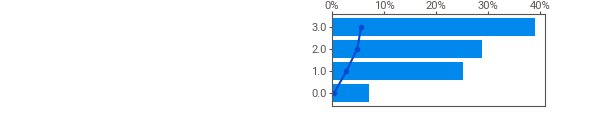
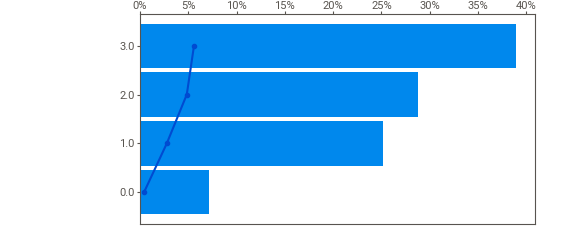
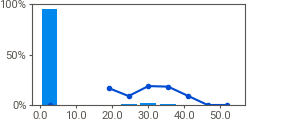
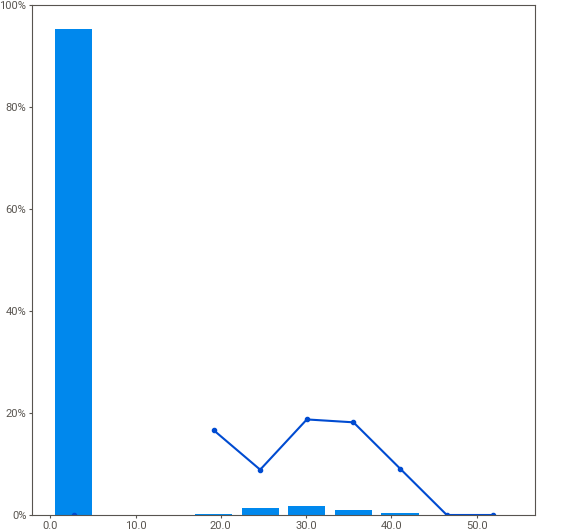
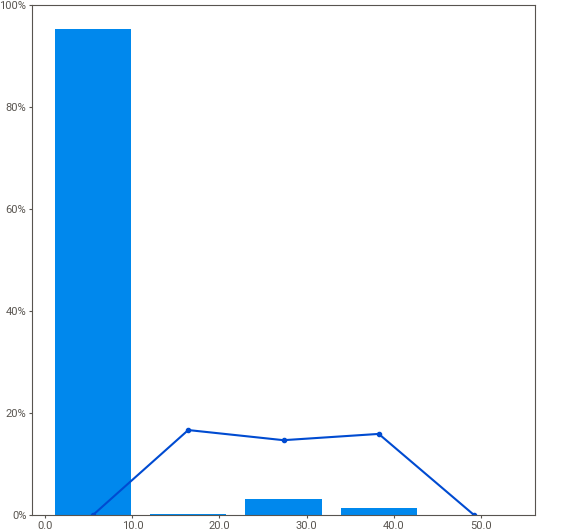
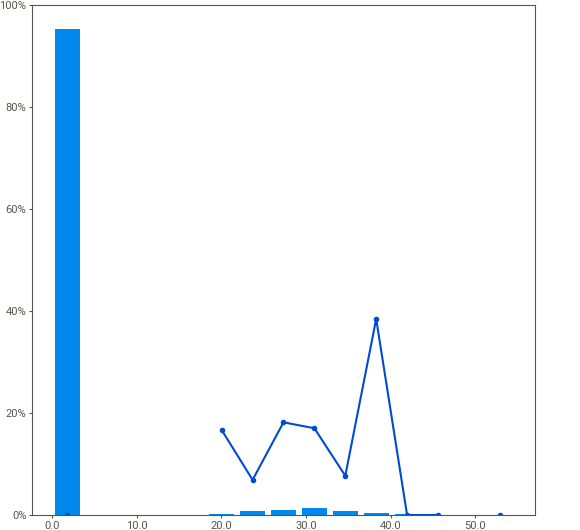
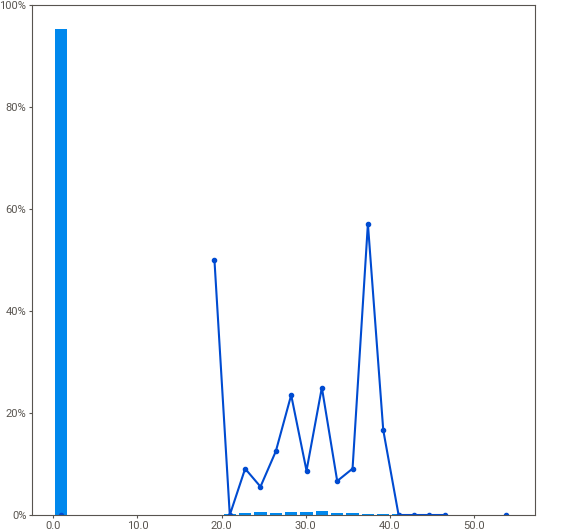
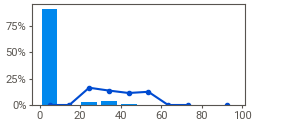
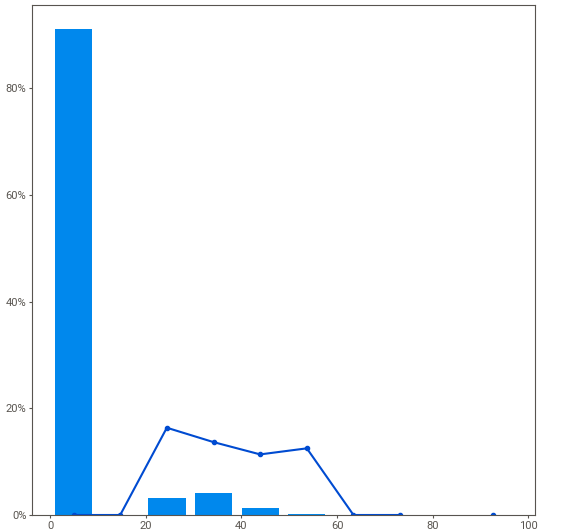
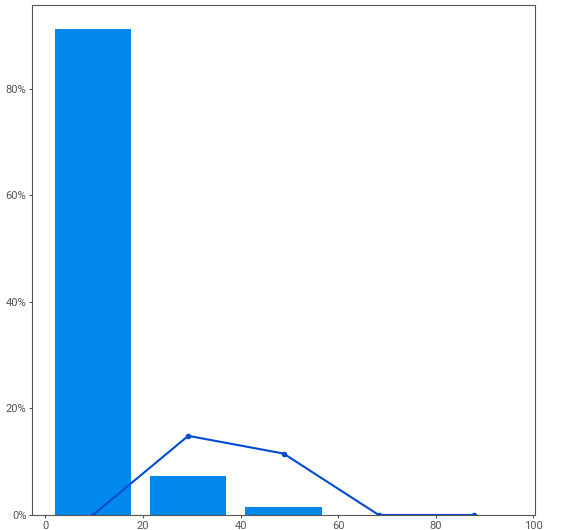
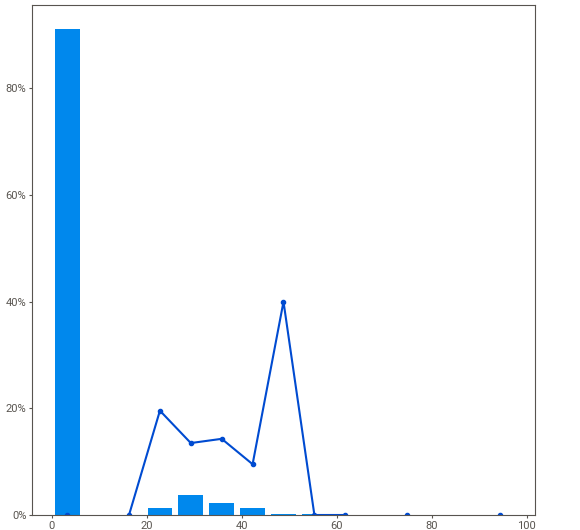
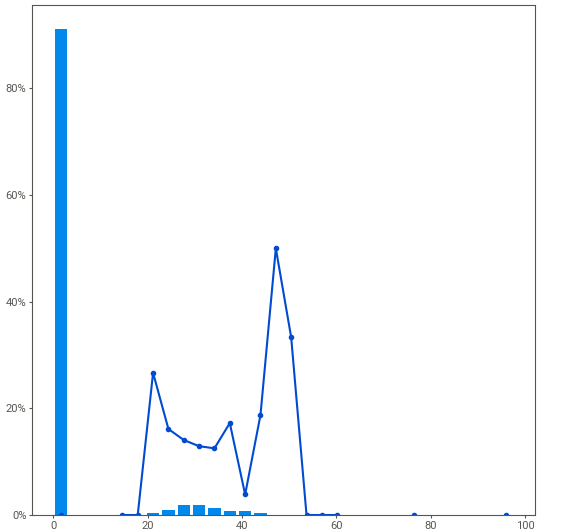
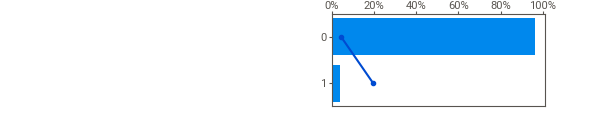
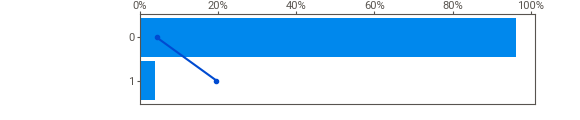
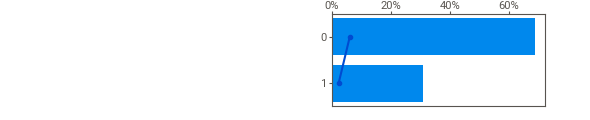
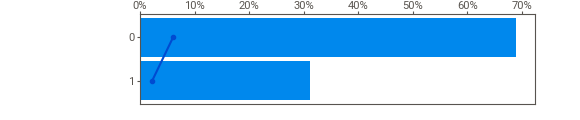
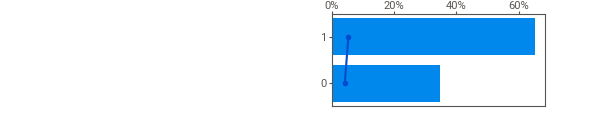
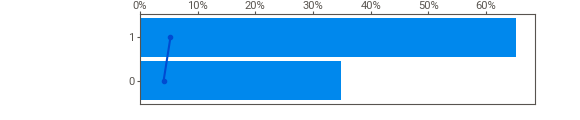
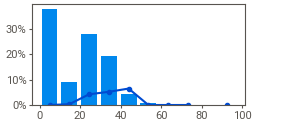
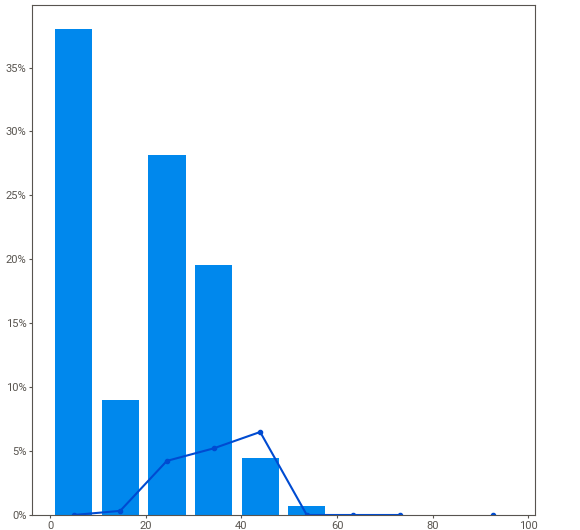
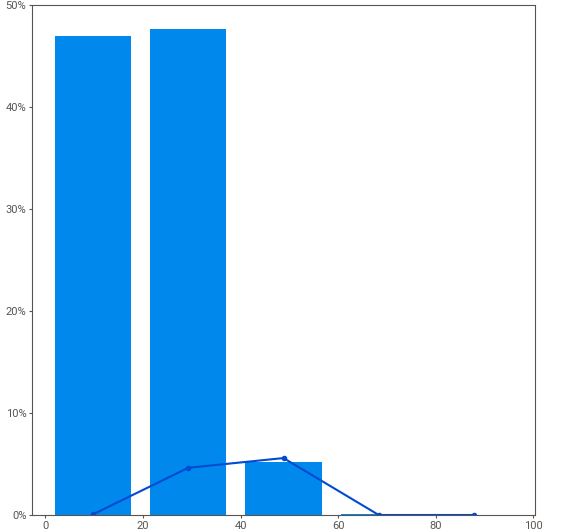
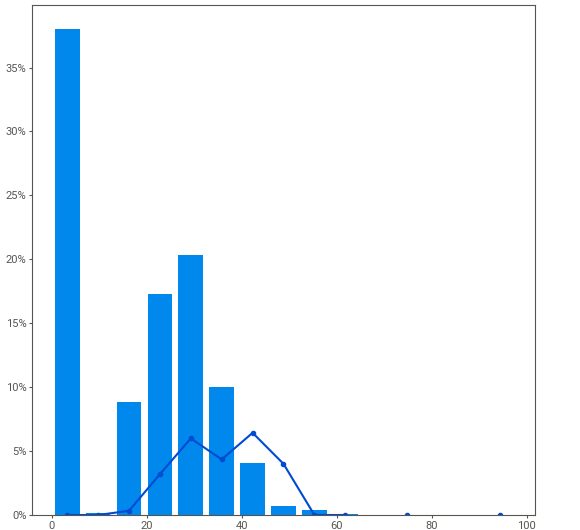
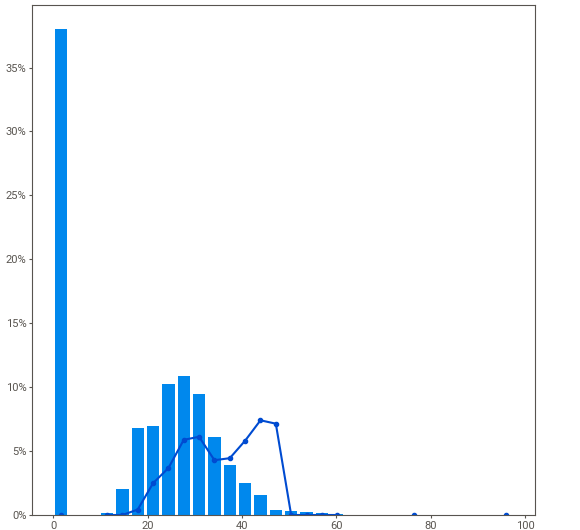
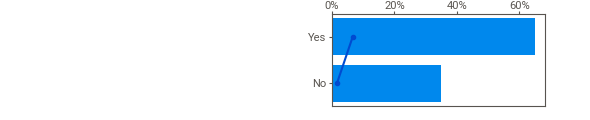
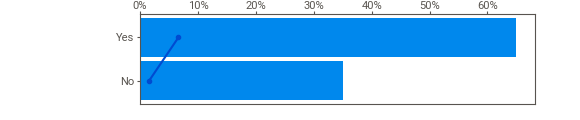
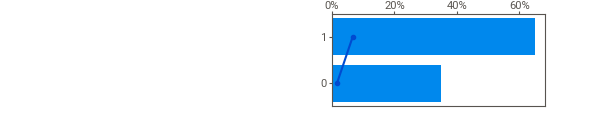
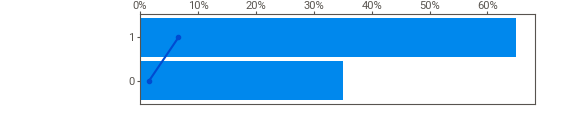
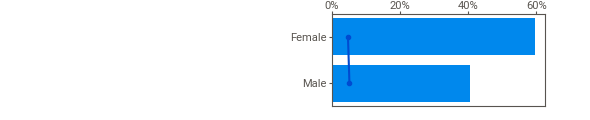
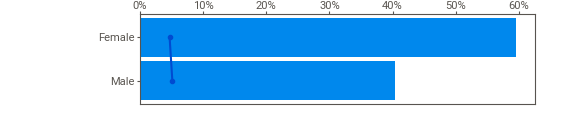
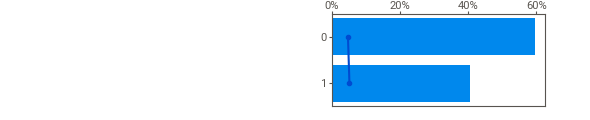
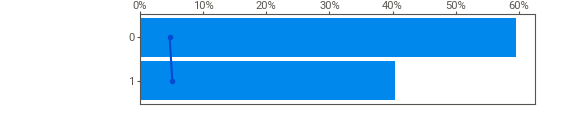
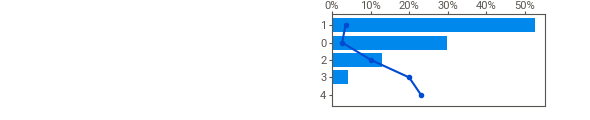
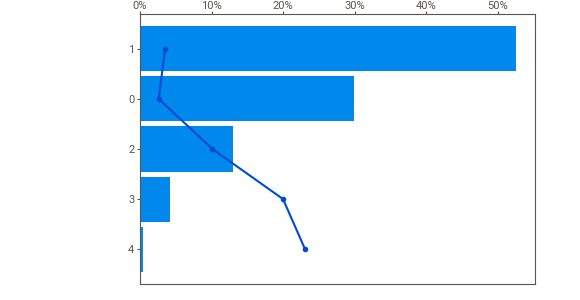
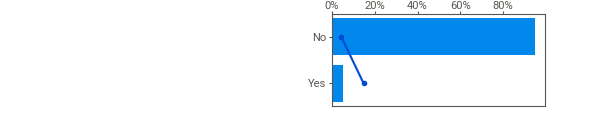
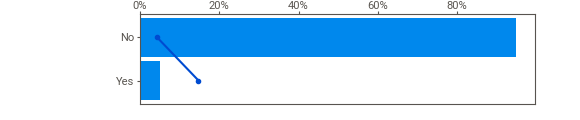
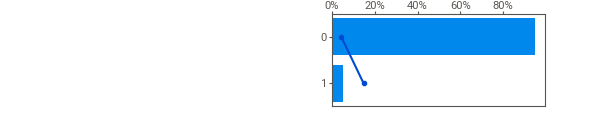
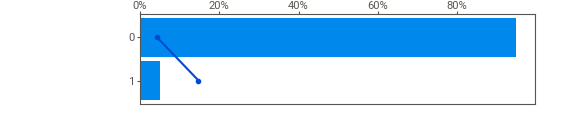
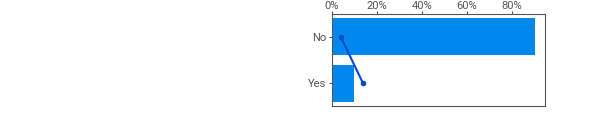
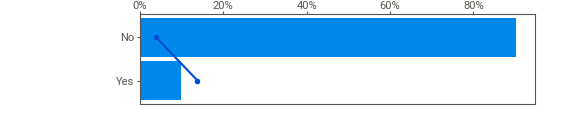
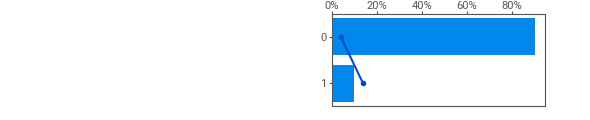
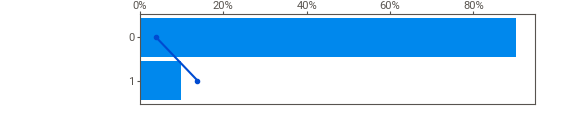
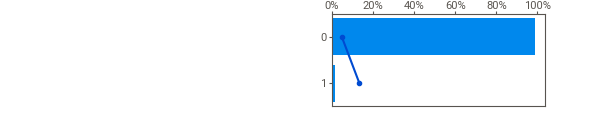
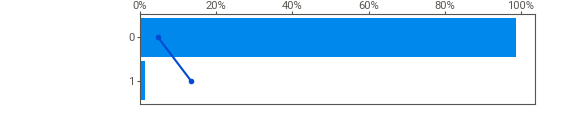
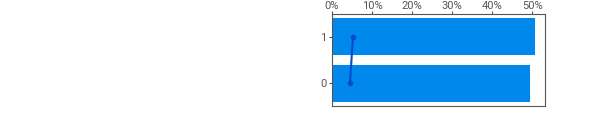
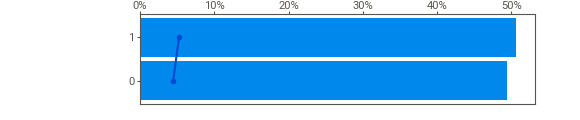
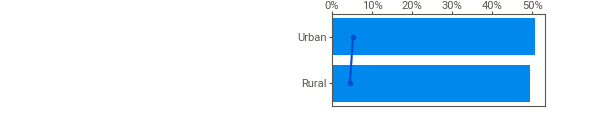
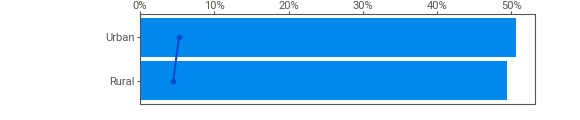
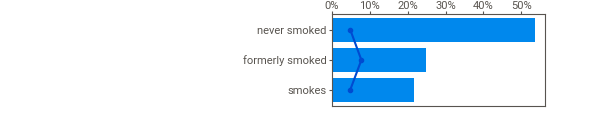
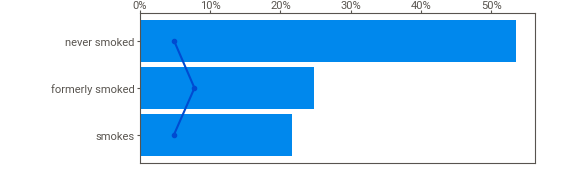
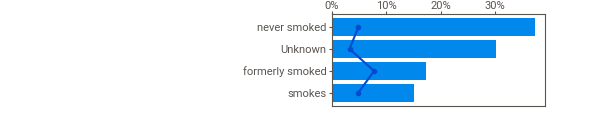
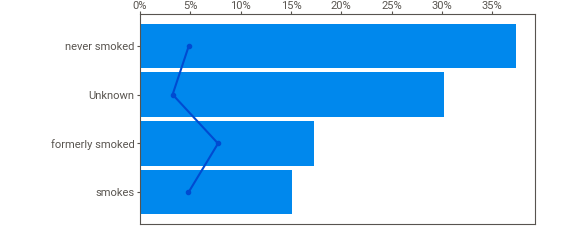
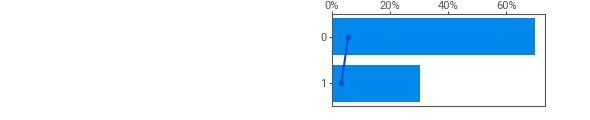
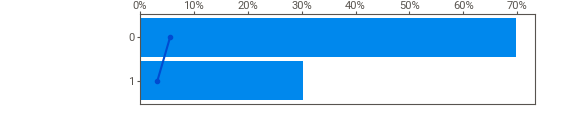
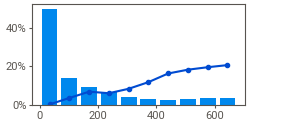
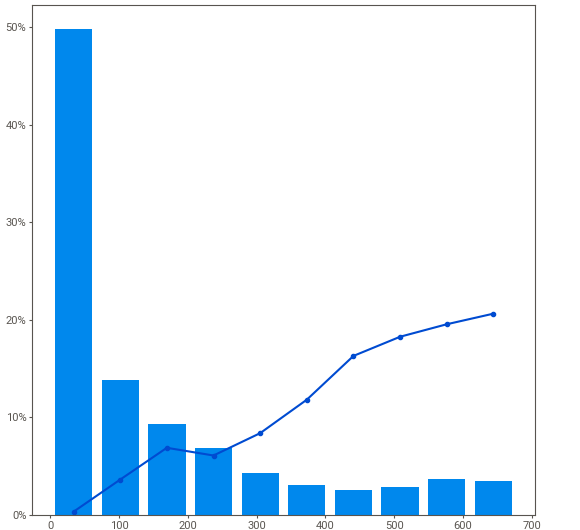
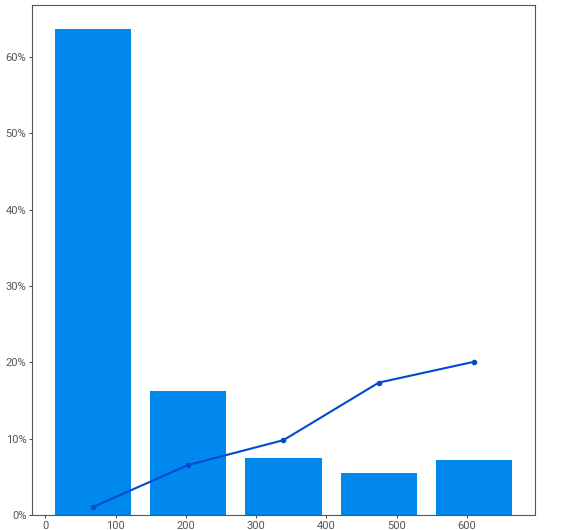
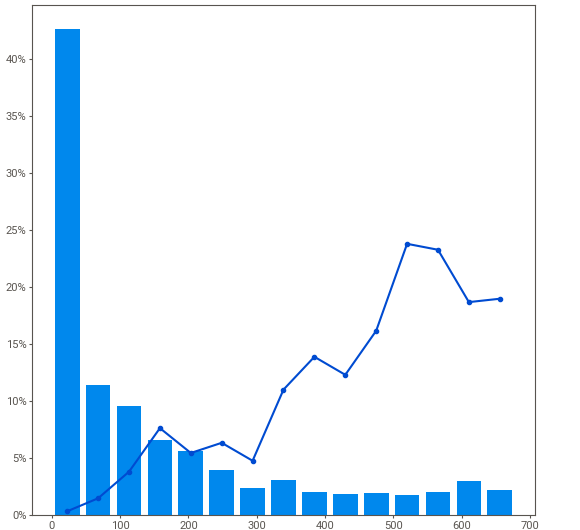
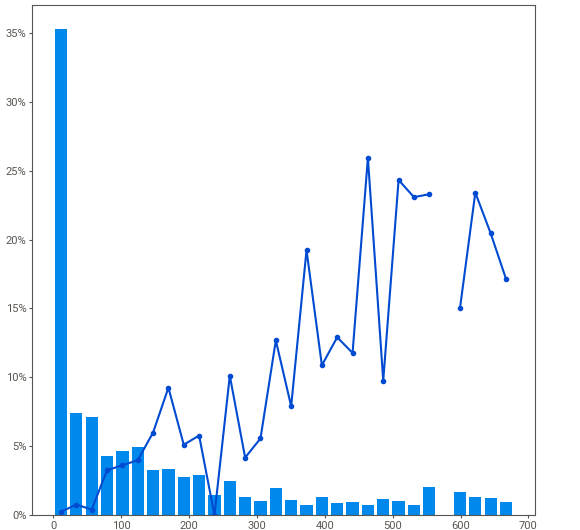
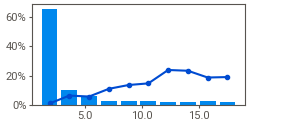
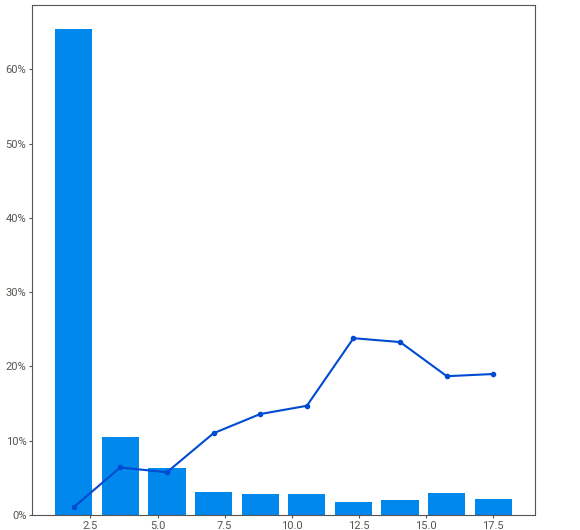
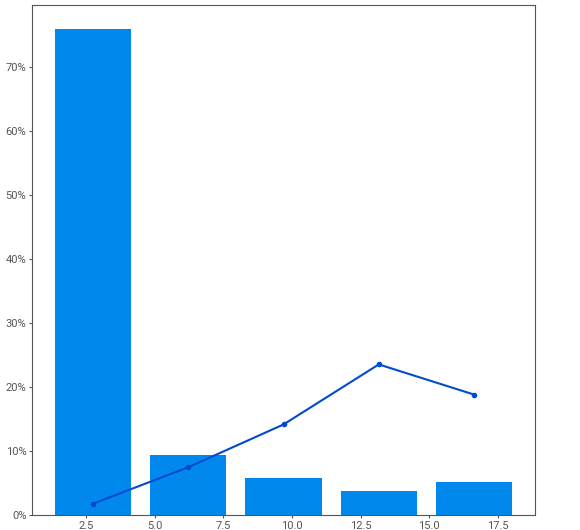
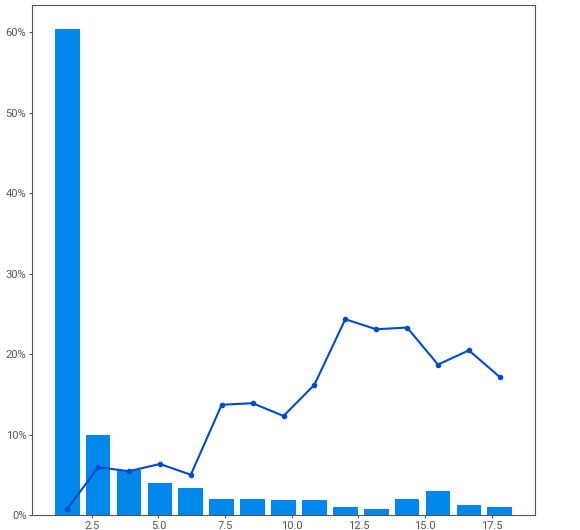
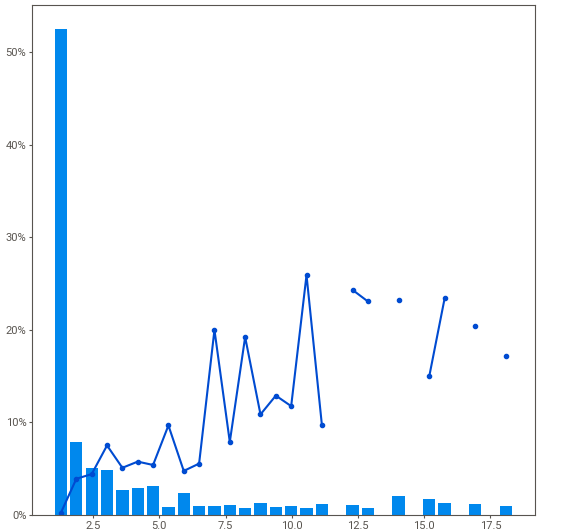
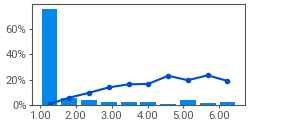
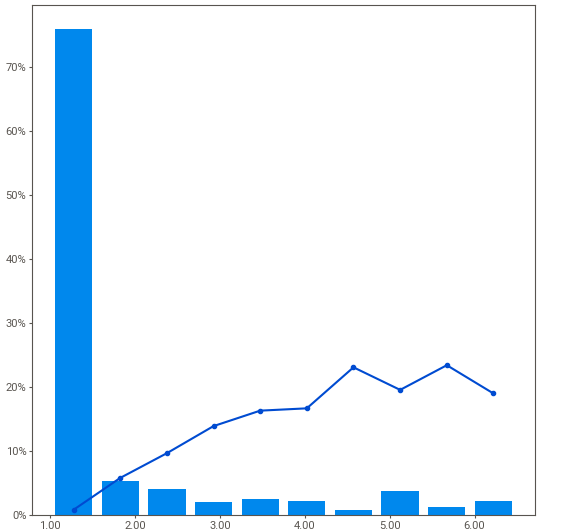
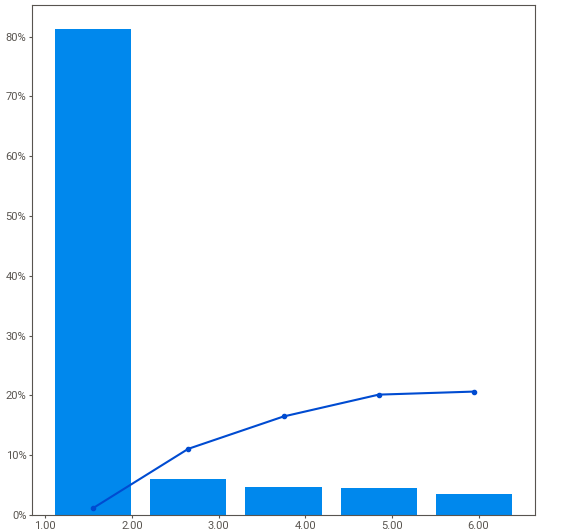
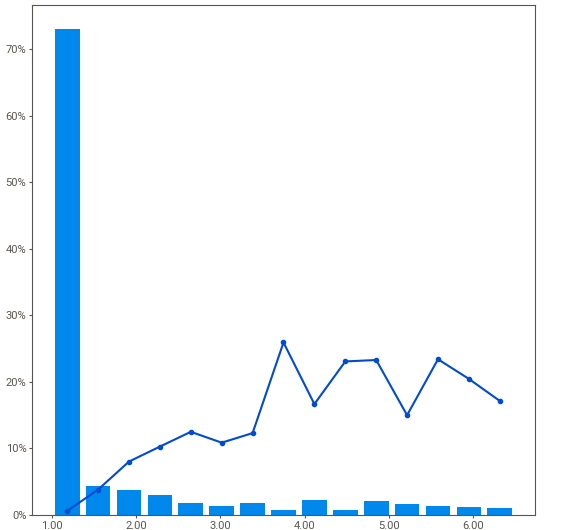
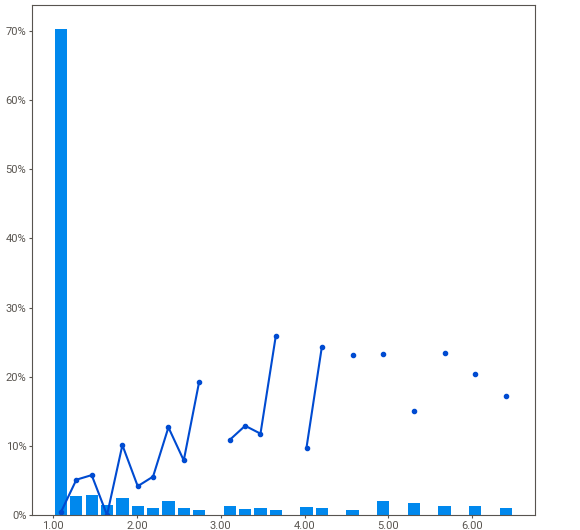
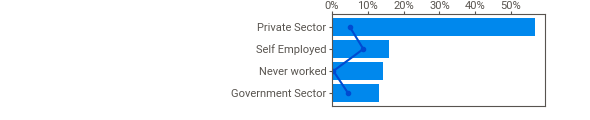
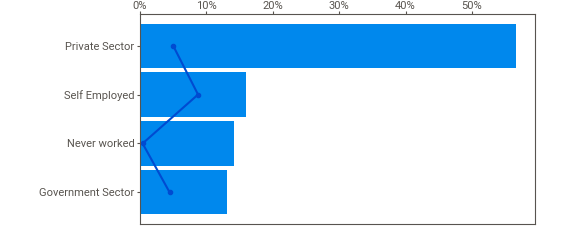
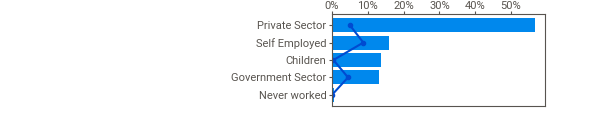
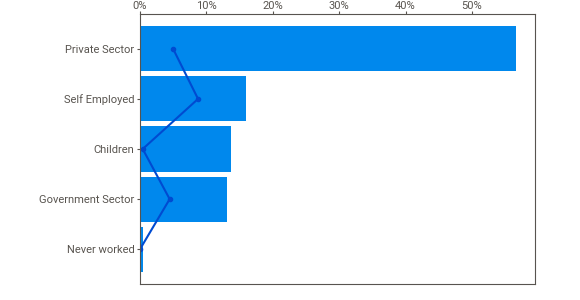
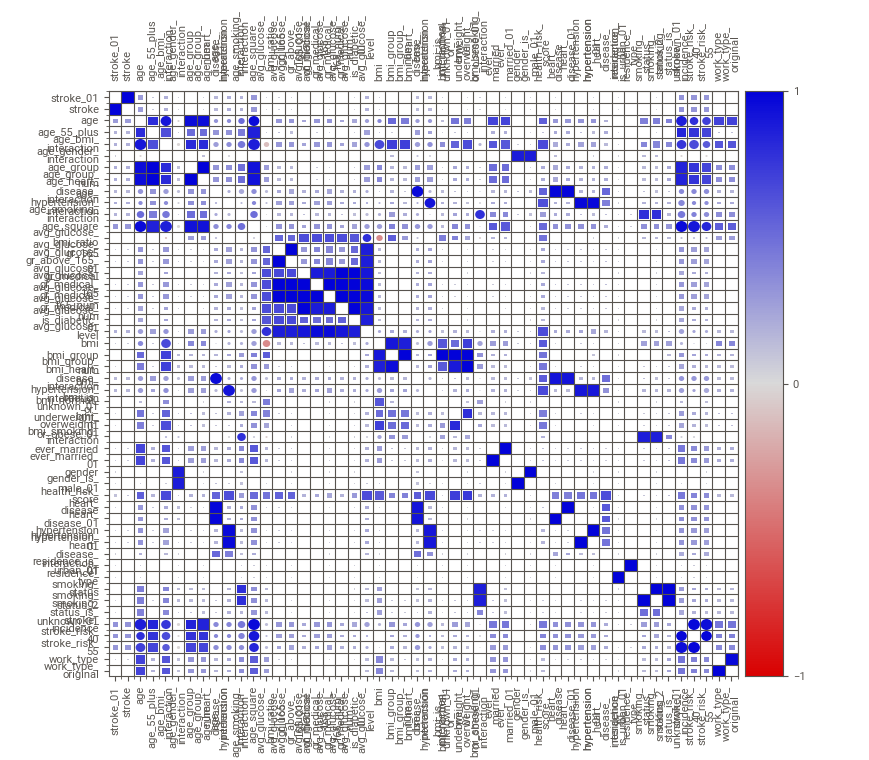
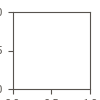

In [28]:
if do_eda:
    report = sweetviz.analyze(
        [data_train, "Training Data"],
        target_feat="stroke_01",
        pairwise_analysis="auto",
    )
    report.show_notebook()

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

::: {.content-hidden when-format="html"}

---  

Start of the collapsible section  
`<details>`  

:::

<details class="with-border">
<summary>EDA: Frequency tables </summary>



List values and their counts for variables with less than 10 unique values.
These results partially duplicate `sweetviz` report, but give flexibility to order classes not only by count but also by index (in some cases it may give more insights).

In [29]:
an.summarize_discrete(data_all, sort="index")

</details>


::: {.content-hidden when-format="html"}

`</details>`   
End of the collapsible section  

---  

:::

### ROC Analysis

ROC analysis has 2 purposes in this EDA:

- evaluate how well separable are the classes of the target variable using values of a numeric variable.
  Here AUC score is used: AUC=1 indicates perfect separation between classes while AUC=0.5 indicates the accuracy of random guessing.
- to find the threshold that separates the classes best (by maximizing the balanced accuracy score).

The most important results here:

1) By comparing `age`, `stroke_incidence`, `stroke_risk_40`, and `stroke_risk_55`, the first 3 exhibit AUC=0.83 and the last one performs worst with AUC=0.79.
2) Optimal age threshold for stroke and non-stoke cases is 54 years (in FE part it was rounded to 55 to be consistent with the literature).
   
More ROC result will be presented in the following (more appropriate) sections.

::: {.content-hidden when-format="html"}

---  

Start of the collapsible section  
`<details>`  

:::

<details class="with-border">
<summary>EDA and  ROC analysis of age, stroke risk and stroke incidence variables </summary>


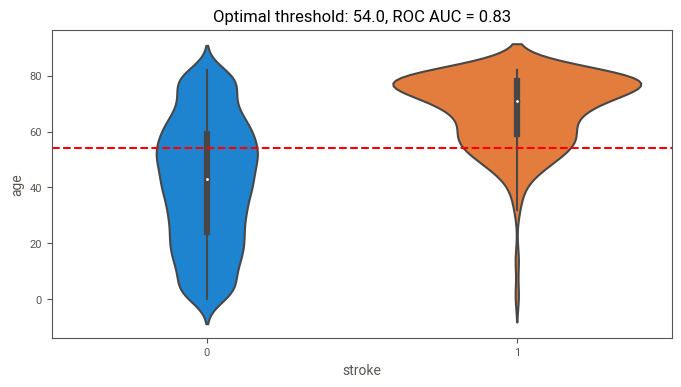

In [30]:
gr = my.convert_no_yes_to_01(data_train.stroke)
y = data_train.age

violinplot_with_roc_results(gr, y)

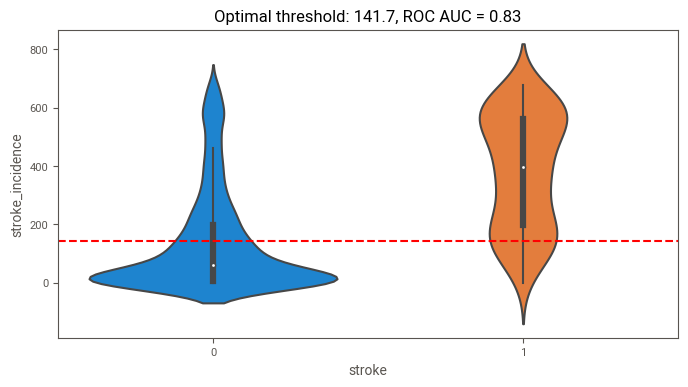

In [31]:
gr = my.convert_no_yes_to_01(data_train.stroke)
y = data_train.stroke_incidence

violinplot_with_roc_results(gr, y)

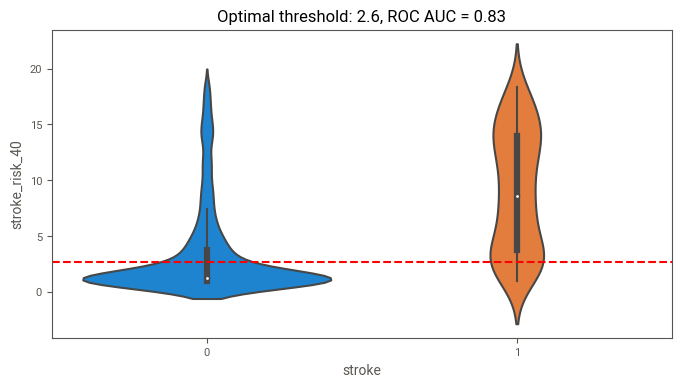

In [32]:
gr = my.convert_no_yes_to_01(data_train.stroke)
y = data_train.stroke_risk_40

violinplot_with_roc_results(gr, y)

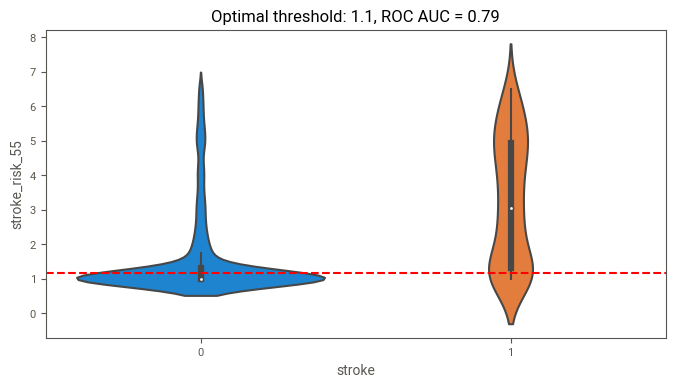

In [33]:
gr = my.convert_no_yes_to_01(data_train.stroke)
y = data_train.stroke_risk_55

violinplot_with_roc_results(gr, y)

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

### Hypertension, Heart Disease, Stroke, and Age

In the training set, there are much less people with hypertension (@fig-hypertension) and heart disease (@fig-heart-disease) than without them.
Yet, the proportion of people who experienced stroke is higher among those with hypertension and heart disease (@fig-hypertension-prop, @fig-heart-disease-prop). It seems numbers of cases with hypertension, heart disease or stroke increase with age, but there is a bigger chance that hypertension may start at younger age than the other two conditions (@fig-hypertension-age, @fig-heart-disease-age, @fig-stroke-age). 

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>EDA: Hypertension and heart disease </summary>

**Hypertension**

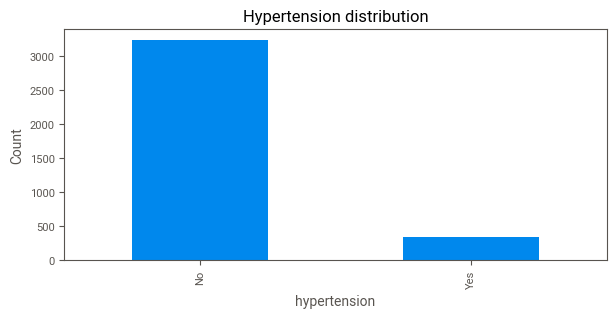

In [34]:
# | label: fig-hypertension
# | fig-cap: 'Hyperension distribution.'
# | code-summary: Code of the figure
# | code-fold: true

data_train.value_counts("hypertension").plot(
    kind="bar", title="Hypertension distribution"
)
plt.ylabel("Count");

In [35]:
# | code-fold: true
crosstab_hypertension = an.Crosstab("hypertension", "stroke", data=data_train)
display_crosstab(crosstab_hypertension, percentage="row")

Counts      % (row)      
stroke           No  Yes      No   Yes
hypertension                          
No             3102  126   96.10  3.90
Yes             300   48   86.20 13.80

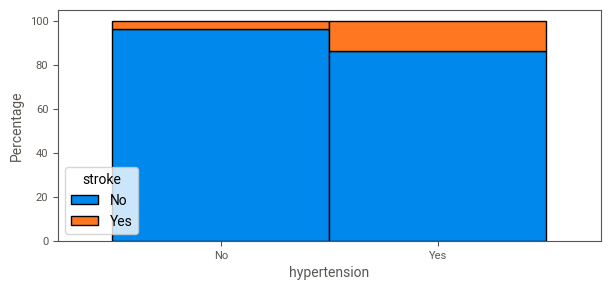

In [36]:
# | label: fig-hypertension-prop
# | fig-cap: 'Stroke incidence by hypertension status.'
# | code-summary: Code of the figure
# | code-fold: true

crosstab_hypertension.barplot(normalize="rows", stacked=True, width=1);

**Heart disease**

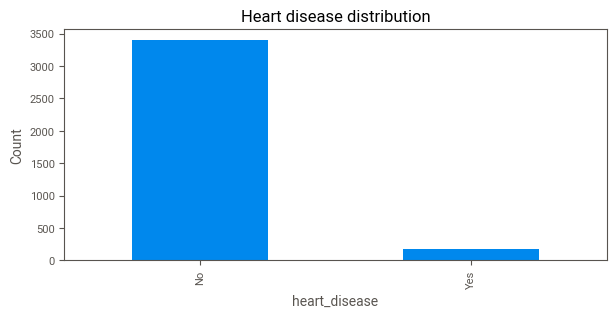

In [37]:
# | label: fig-heart-disease
# | fig-cap: 'Heart disease distribution.'
# | code-summary: Code of the figure
# | code-fold: true

data_train.value_counts("heart_disease").plot(
    kind="bar", title="Heart disease distribution"
)
plt.ylabel("Count");

In [38]:
# | code-fold: true
crosstab_hd = an.Crosstab("heart_disease", "stroke", data=data_train)
display_crosstab(crosstab_hd)

Counts      % (column)      
stroke            No  Yes         No   Yes
heart_disease                             
No              3246  147      95.40 84.50
Yes              156   27       4.60 15.50

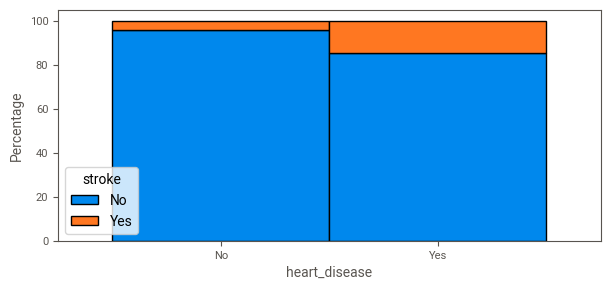

In [39]:
# | label: fig-heart-disease-prop
# | fig-cap: 'Stroke incidence by heart disease status.'
# | code-summary: Code of the figure
# | code-fold: true

crosstab_hd.barplot(normalize="rows", stacked=True, width=1);

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>EDA: Age-related trends </summary>

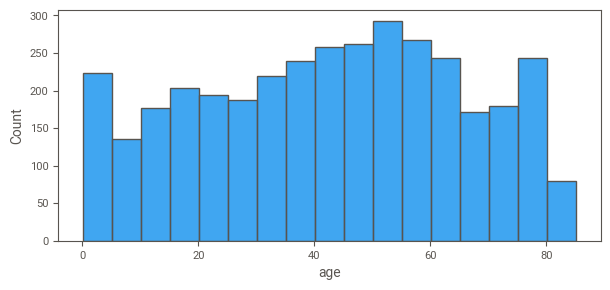

In [40]:
# | label: fig-age
# | fig-cap: 'Age distribution.'
# | code-summary: Code of the figure
# | code-fold: true

sns.histplot(x="age", data=data_train, multiple="stack", binwidth=5);

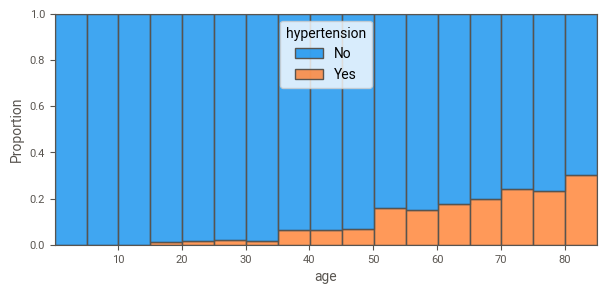

In [41]:
# | label: fig-hypertension-age
# | fig-cap: 'Hypertension status by age.'
# | code-summary: Code of the figure
# | code-fold: true

sns.histplot(x="age", hue="hypertension", data=data_train, multiple="fill", binwidth=5)
plt.ylabel("Proportion");

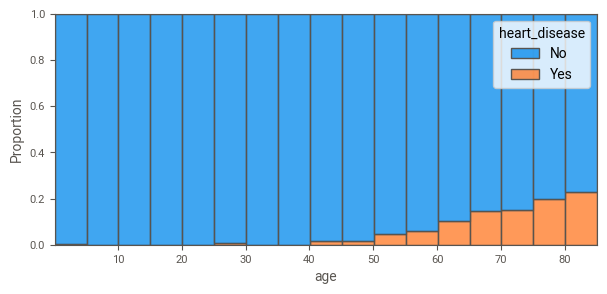

In [42]:
# | label: fig-heart-disease-age
# | fig-cap: 'Heart disease status by age.'
# | code-summary: Code of the figure
# | code-fold: true
sns.histplot(x="age", hue="heart_disease", data=data_train, multiple="fill", binwidth=5)
plt.ylabel("Proportion");

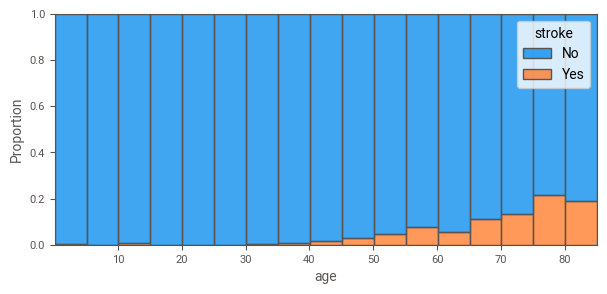

In [43]:
# | label: fig-stroke-age
# | fig-cap: 'Stroke status by age.'
# | code-summary: Code of the figure
# | code-fold: true

sns.histplot(x="age", hue="stroke", data=data_train, multiple="fill", binwidth=5)
plt.ylabel("Proportion");

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

### Average Glucose Level

Average glucose level distribution suggests that there are 2 clusters of patients (@fig-glc-counts, @fig-glc-bmi, @fig-glc-age) and the normalized distribution indicates that stroke rates in these two groups are different (@fig-glc-prop). 
ROC analysis suggests that optimal threshold to separate stroke and non-stroke cases is 165.3 (@fig-glc-roc) and this number is between the mentioned clusters. In FE part, the threshold was rounded to 165 and the group above 165 was called "Extreme diabetic". Comparing regular diabetic (avg. glucodse  >125) and extreme diabetic (>165) groups, the latter has higher stroke rate (see @fig-glc-125 and @fig-glc-165).

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>EDA: Average glucose concentration related trends </summary>

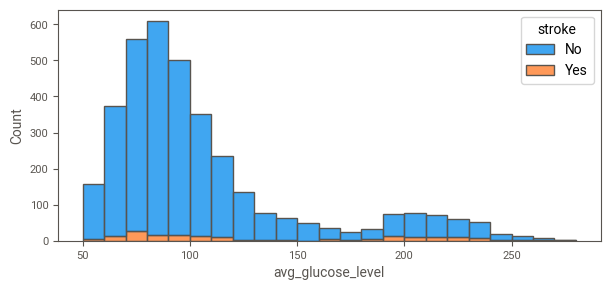

In [44]:
# | label: fig-glc-counts
# | fig-cap: 'Distribution of glucose levels in the training set.'
# | code-summary: Code of the figure
# | code-fold: true

sns.histplot(
    x="avg_glucose_level",
    hue="stroke",
    data=data_train,
    multiple="stack",
    binwidth=10,
    binrange=(50, 280),
);

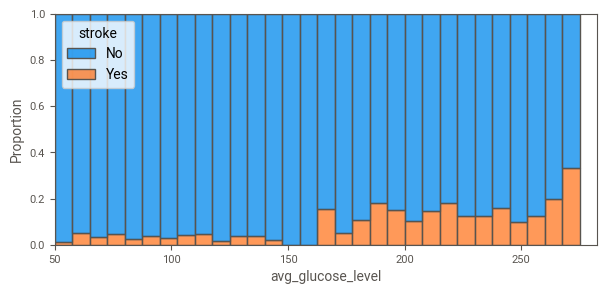

In [45]:
# | label: fig-glc-prop
# | fig-cap: 'Normalized distribution of glucose levels in the training set.'
# | code-summary: Code of the figure
# | code-fold: true
sns.histplot(
    x="avg_glucose_level",
    hue="stroke",
    data=data_train,
    multiple="fill",
    binwidth=7.5,
    binrange=(50, 280),
)
plt.ylabel("Proportion");

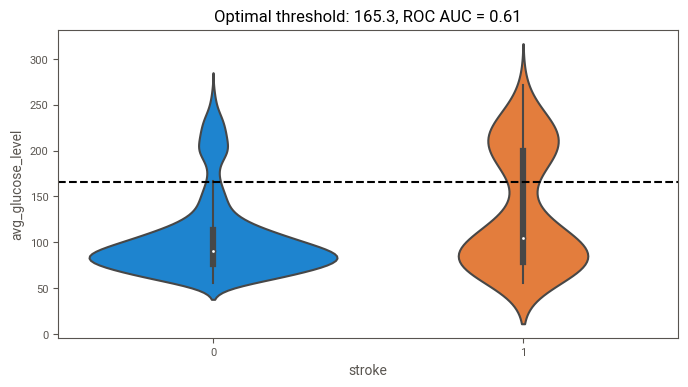

In [46]:
# | label: fig-glc-roc
# | fig-cap: 'Glucose level distribution for stroke and non-stroke groups with
# |           ROC analysis results.'
# | code-fold: true

gr = my.convert_no_yes_to_01(data_train.stroke)
y = data_train.avg_glucose_level

violinplot_with_roc_results(gr, y, linecolor="black")

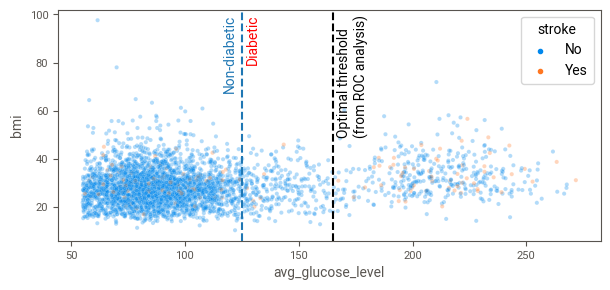

In [47]:
# | label: fig-glc-bmi
# | fig-cap: 'Glucose level and BMI distribution. THe "Optimal threshold" is
# |          the threshold that separates stroke and non-stroke groups the best
# |          (according to ROC analysis).'
# | code-summary: Code of the figure
# | code-fold: true

ax = sns.scatterplot(
    x="avg_glucose_level", y="bmi", hue="stroke", data=data_train, alpha=0.3
)
plt.axvline(125, color="tab:blue", linestyle="--")
ax.text(123, 100, "Non-diabetic", rotation=90, ha="right", va="top", color="tab:blue")
ax.text(127, 100, "Diabetic", rotation=90, ha="left", va="top", color="red")


plt.axvline(165, color="black", linestyle="--")
ax.text(
    167,
    100,
    "Optimal threshold\n(from ROC analysis)",
    rotation=90,
    ha="left",
    va="top",
    color="black",
);

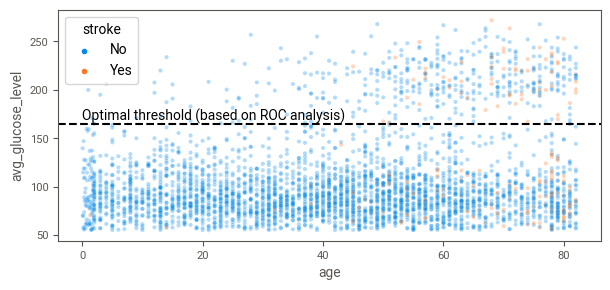

In [48]:
# | label: fig-glc-age
# | fig-cap: 'Glucose level and age distribution.'
# | code-summary: Code of the figure
# | code-fold: true
ax = sns.scatterplot(
    x="age", y="avg_glucose_level", hue="stroke", data=data_train, alpha=0.3
)

ax.axhline(y=165, color="black", linestyle="--")
ax.text(
    0,
    165,
    "Optimal threshold (based on ROC analysis)",
    rotation=0,
    ha="left",
    va="bottom",
    color="black",
);

In [49]:
# | code-fold: true
crosstab = an.Crosstab("avg_glucose_is_diabetic_01", "stroke", data=data_train)
display_crosstab(crosstab, percentage="row")

Counts      % (row)     
stroke                         No  Yes      No  Yes
avg_glucose_is_diabetic_01                         
0                            2762  104   96.40 3.60
1                             640   70   90.10 9.90

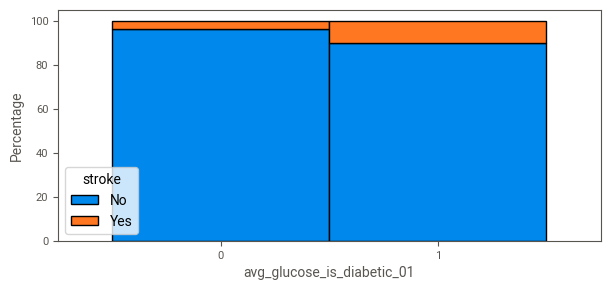

In [50]:
# | label: fig-glc-125
# | fig-cap: 'Distribution of diabetic (glucose level > 125) vs. remaining groups.'
# | code-summary: Code of the figure
# | code-fold: true
crosstab.barplot(normalize="rows", stacked=True, width=1);

In [51]:
# | code-fold: true
crosstab = an.Crosstab("avg_glucose_gr_165", "stroke", data=data_train)
display_crosstab(crosstab, percentage="row")

Counts      % (row)      
stroke                 No  Yes      No   Yes
avg_glucose_gr_165                          
(0, 165]             3018  110   96.50  3.50
(165, 1000]           384   64   85.70 14.30

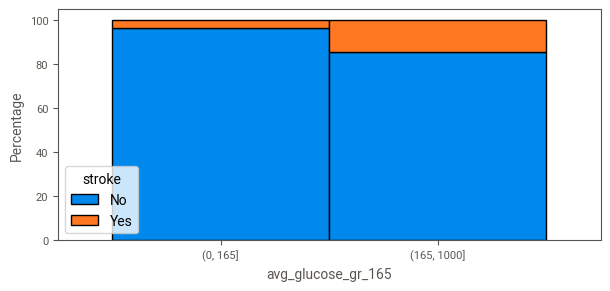

In [52]:
# | label: fig-glc-165
# | fig-cap: 'Distribution of extreme diabetic (glucose level > 165) vs. 
# |           remaining groups.'
# | code-summary: Code of the figure
# | code-fold: true

crosstab.barplot(normalize="rows", stacked=True, width=1);

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

### BMI

The analysis of BMI variable shows that the most common BMI values are in the range of overweghtness (@fig-bmi-counts). If age is taken into account, underweightness is most common to children, normal weight to teenagers and young adults and obesity to older adults between 30 and 80 years old (@fig-bmi-age-prop and @fig-bmi-age-counts). Normalized avg. glucose level plot indicates that stroke cases are slightly more common in the overweightness and obesity groups (@fig-bmi-prop). The ROC analysis suggests that optimal BMI threshold is 25.6 (@fig-bmi-roc) ad this is in alignment with the literature, which states that overweightness starts at BMI=25.

It is essential to emphasize that a higher proportion of **missing BMI values** is found within the group of individuals who have had a stroke (19.5% among stroke cases compared to 4.3% among non-stroke cases, as shown in Figure @fig-bmi-na-trends). This observation suggests that the missingness of BMI values is likely obtained after the occurrence of a stroke and is not a causal factor for stroke. Consequently, it qualifies as a misleading predictor and will be **excluded from the modeling process**.

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>EDA: BMI-related trends </summary>

In [53]:
# | code-fold: true
# | code-summary: Code for BMI labels


def bmi_labels(ax, y_txt: float = 28):
    # Add vertical dashed lines
    thresholds = [18.5, 25, 30]
    for threshold in thresholds:
        ax.axvline(x=threshold, color="darkred", linestyle="--")

    # Define label positions and text values
    label_positions = [14, 23, 28.5, 34]
    label_values = ["underweight", "normal", "overweight", "obese"]

    # Add text labels with transparent backgrounds in a loop
    for x, label in zip(label_positions, label_values):
        ax.text(
            x,
            y_txt,
            label,
            rotation=90,
            ha="right",
            va="bottom",
            color="darkred",
            bbox=dict(
                boxstyle="round,pad=0.3",
                edgecolor="skyblue",
                facecolor="white",
                alpha=0.7,
            ),
        )

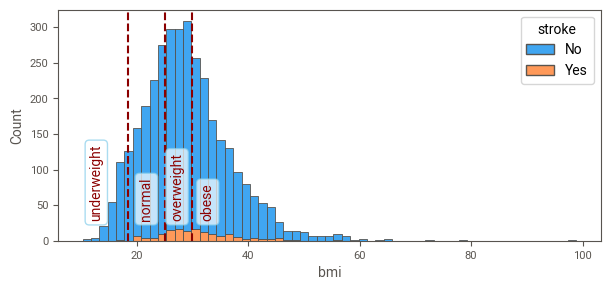

In [54]:
# | label: fig-bmi-counts
# | fig-cap: 'Distribution of BMI values for stroke and no stroke groups.'
# | code-summary: Code of the figure
# | code-fold: true

ax = sns.histplot(
    x="bmi", hue="stroke", data=data_train, multiple="stack", binwidth=1.5
)
bmi_labels(ax)

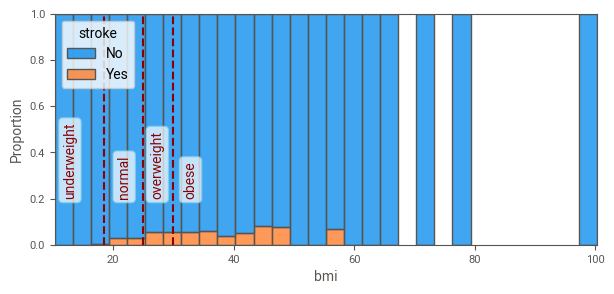

In [55]:
# | label: fig-bmi-prop
# | fig-cap: 'Normalized distribution of BMI values for stroke and no stroke groups.'
# | code-summary: Code of the figure
# | code-fold: true

ax = sns.histplot(x="bmi", hue="stroke", data=data_train, multiple="fill", binwidth=3)
plt.ylabel("Proportion")
bmi_labels(ax, y_txt=0.2)

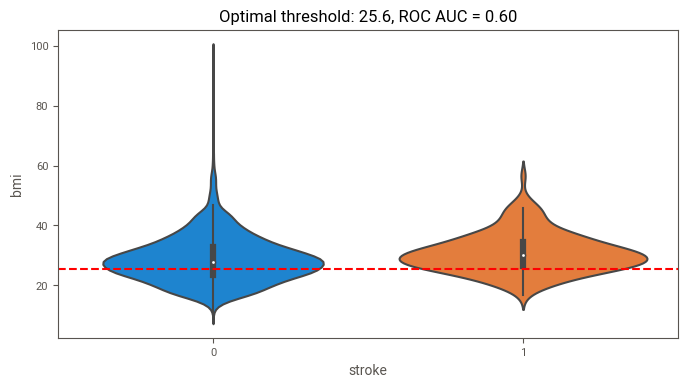

In [56]:
# | label: fig-bmi-roc
# | fig-cap: 'BMI distribution for stroke and no stroke groups with
# |           ROC analysis results.'
# | code-summary: Code of the figure
# | code-fold: true

data_train_wo_na = data_train.dropna(subset=["bmi"])
gr = my.convert_no_yes_to_01(data_train_wo_na.stroke)
y = data_train_wo_na.bmi

violinplot_with_roc_results(gr, y)

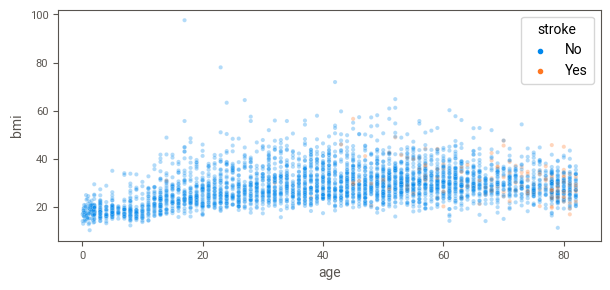

In [57]:
# | label: fig-bmi-age
# | fig-cap: 'Relationship between BMI and age.'
# | code-summary: Code of the figure
# | code-fold: true

sns.scatterplot(x="age", y="bmi", hue="stroke", data=data_train, alpha=0.3);

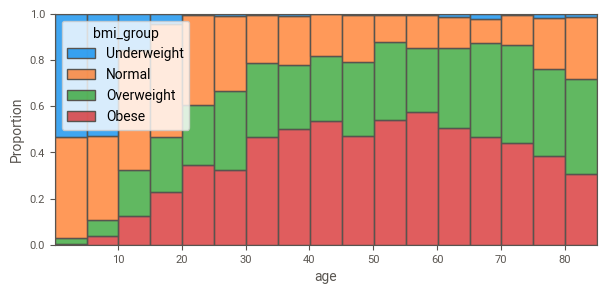

In [58]:
# | label: fig-bmi-age-prop
# | fig-cap: 'BMI distribution by age (proportions).'
# | code-summary: Code of the figure
# | code-fold: true
sns.histplot(x="age", hue="bmi_group", data=data_train, multiple="fill", binwidth=5)
plt.ylabel("Proportion");

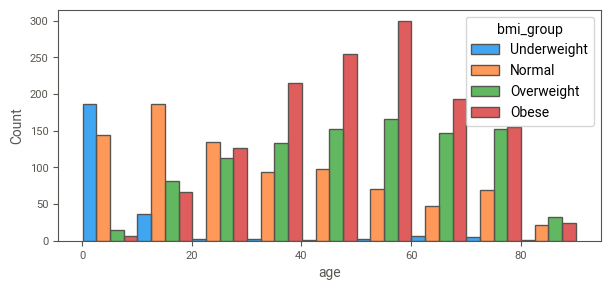

In [59]:
# | label: fig-bmi-age-counts
# | fig-cap: 'BMI distribution by age (counts).'
# | code-summary: Code of the figure
# | code-fold: true
sns.histplot(x="age", hue="bmi_group", data=data_train, multiple="dodge", binwidth=10)
plt.ylabel("Count");

In [60]:
# | code-fold: true

crosstab_bmi_na = an.Crosstab("bmi_is_unknown_01", "stroke", data=data_train)
display_crosstab(crosstab_bmi_na, percentage="row")

Counts      % (row)      
stroke                No  Yes      No   Yes
bmi_is_unknown_01                          
0                   3295  148   95.70  4.30
1                    107   26   80.50 19.50

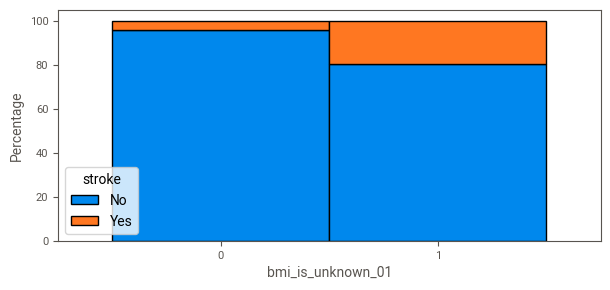

In [61]:
# | label: fig-bmi-na-trends
# | fig-cap: 'Distribution of BMI missing values by stroke status.'
# | code-summary: Code of the figure
# | code-fold: true

crosstab_bmi_na.barplot(normalize="rows", stacked=True, width=1);

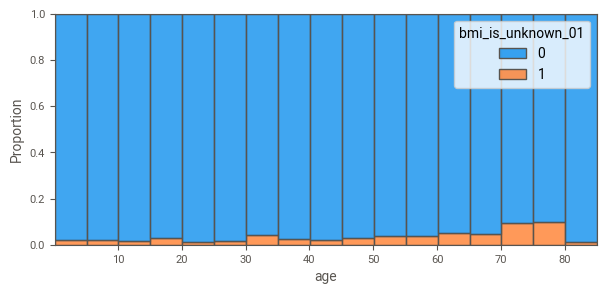

In [62]:
# | label: fig-bmi-na-age
# | fig-cap: 'Distribution of BMI missing values by age.'
# | code-summary: Code of the figure
# | code-fold: true
sns.histplot(
    x="age", hue="bmi_is_unknown_01", data=data_train, multiple="fill", binwidth=5
)
plt.ylabel("Proportion");

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

### Gender, Social Factors, and Smoking

In the training set, there are more females than males (@fig-gender-counts). However, gender differences in stroke incidence rates appear to be negligible (@fig-gender-prop), as are differences in residence types (@fig-residence-prop).

Individuals who have ever been married are more likely to have a stroke (@fig-marriage-prop). However, this marital status is closely related to age (@fig-marriage-age): the majority of people who have been married are over 30 years old and older people are more likely to have a stroke (@fig-stroke-age).

Similarly, varying stroke incidence rates are observed across different work types (@fig-work-prop), as well as smoking statuses (@fig-smoking-prop). However, the "Never worked" category is more common among children and teenagers, while the proportion of self-employed individuals increases with age (@fig-work-age-prop). Likewise, the proportion of people who have never smoked is higher at an extremely young age, and there is a proportional increase in former smokers at older ages (@fig-smoking-age-2).

The missingness of smoking status is related to a younger age (@fig-smoking-na-age) and this trend seems almost reversed comparing to marriage status (@fig-marriage-age).

What is more, work type categories "Never worked" and "children" (@fig-work-age-original) from the original form of variable were merged into "Never worked" (@fig-work-age-prop) as they both were present in the younger age. 



::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>EDA: Gender </summary>

**Gender**

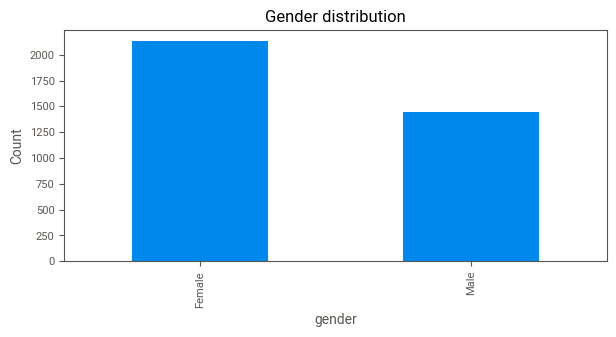

In [63]:
# | label: fig-gender-counts
# | fig-cap: 'Gender distribution.'
# | code-summary: Code of the figure
# | code-fold: true

data_train.value_counts("gender").plot(kind="bar", title="Gender distribution")
plt.ylabel("Count");

In [64]:
# | code-fold: true
crosstab_gender = an.Crosstab("gender", "stroke", data=data_train)
display_crosstab(crosstab_gender, percentage="row")

Counts      % (row)     
stroke     No  Yes      No  Yes
gender                         
Female   2031  100   95.30 4.70
Male     1371   74   94.90 5.10

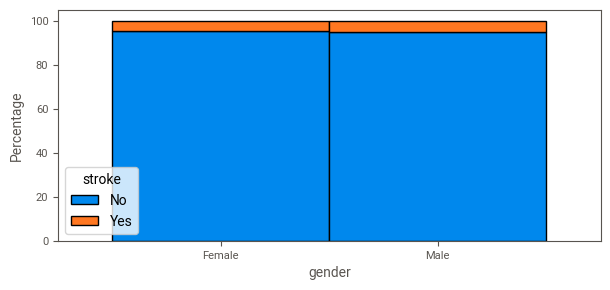

In [65]:
# | label: fig-gender-prop
# | fig-cap: 'Stroke incidence by gender.'
# | code-summary: Code of the figure
# | code-fold: true
crosstab_gender.barplot(normalize="rows", stacked=True, width=1);

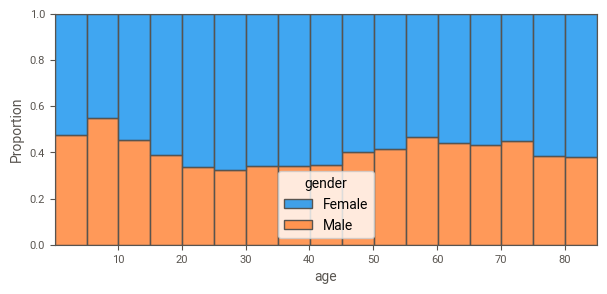

In [66]:
# | label: fig-gender-age
# | fig-cap: 'Gender distribution by age.'
# | code-summary: Code of the figure
# | code-fold: true
sns.histplot(x="age", hue="gender", data=data_train, multiple="fill", binwidth=5)
plt.ylabel("Proportion");

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>EDA: Residence type </summary>

**Residence type**

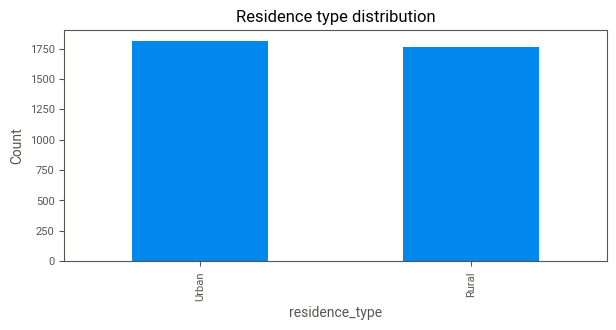

In [67]:
# | label: fig-residence-counts
# | fig-cap: 'Residence type distribution.'
# | code-summary: Code of the figure
# | code-fold: true
data_train.value_counts("residence_type").plot(
    kind="bar", title="Residence type distribution"
)
plt.ylabel("Count");

In [68]:
# | code-fold: true
crosstab_residence = an.Crosstab("residence_type", "stroke", data=data_train)
display_crosstab(crosstab_residence, percentage="row")


Counts     % (row)     
stroke             No Yes      No  Yes
residence_type                        
Rural            1686  79   95.50 4.50
Urban            1716  95   94.80 5.20

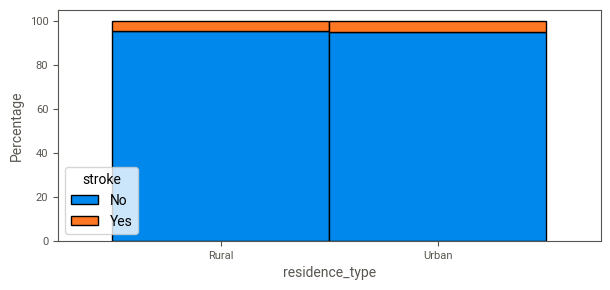

In [69]:
# | label: fig-residence-prop
# | fig-cap: 'Stroke incidence by residence type.'
# | code-summary: Code of the figure
# | code-fold: true
crosstab_residence.barplot(normalize="rows", stacked=True, width=1);

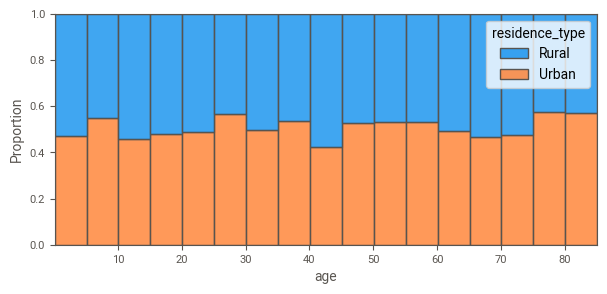

In [70]:
# | label: fig-residence-age
# | fig-cap: 'Residence type by age.'
# | code-summary: Code of the figure
# | code-fold: true
sns.histplot(
    x="age", hue="residence_type", data=data_train, multiple="fill", binwidth=5
)
plt.ylabel("Proportion");

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>EDA: Marriage status </summary>

In [71]:
# | code-fold: true
crosstab_married = an.Crosstab("ever_married", "stroke", data=data_train)
display_crosstab(crosstab_married)

Counts      % (column)      
stroke           No  Yes         No   Yes
ever_married                             
No             1233   20      36.20 11.50
Yes            2169  154      63.80 88.50

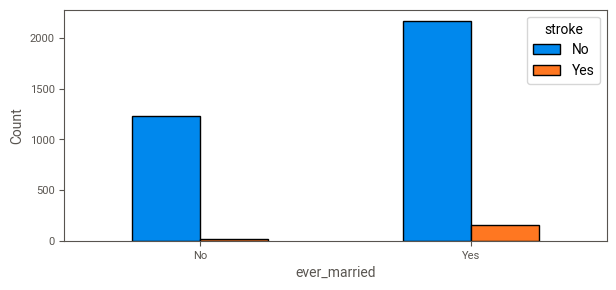

In [72]:
# | label: fig-marriage-counts
# | fig-cap: 'Stroke incidence by marriage status (counts).'
# | code-summary: Code of the figure
# | code-fold: true
crosstab_married.barplot();

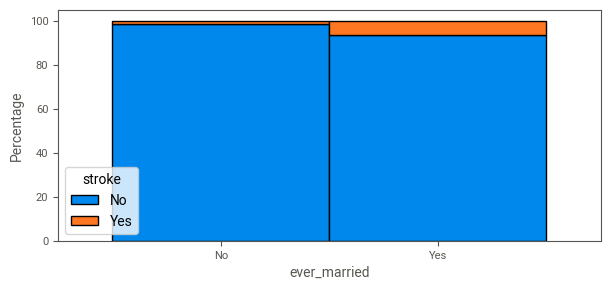

In [73]:
# | label: fig-marriage-prop
# | fig-cap: 'Stroke incidence by marriage status (proportions).'
# | code-summary: Code of the figure
# | code-fold: true
crosstab_married.barplot(normalize="rows", stacked=True, width=1);

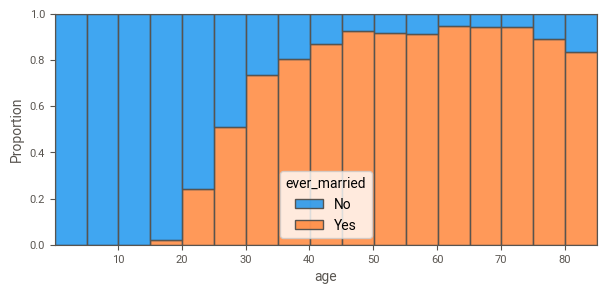

In [74]:
# | label: fig-marriage-age
# | fig-cap: 'Marriage status by age.'
# | code-summary: Code of the figure
# | code-fold: true
sns.histplot(x="age", hue="ever_married", data=data_train, multiple="fill", binwidth=5)
plt.ylabel("Proportion");

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>EDA: Work types (before merging classes) </summary>

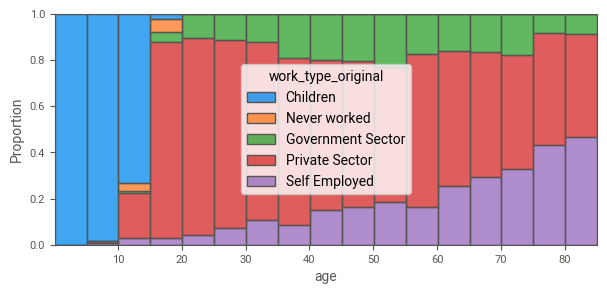

In [75]:
# | label: fig-work-age-original
# | fig-cap: 'Work types by age (before merging "children" and "Never worked" classes).'
# | code-summary: Code of the figure
# | code-fold: true

sns.histplot(
    x="age",
    hue="work_type_original",
    data=data_train,
    multiple="fill",
    binwidth=5,
)
plt.ylabel("Proportion");

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>EDA: Work types (final) </summary>

In [76]:
# | code-fold: true
crosstab_work = an.Crosstab("work_type", "stroke", data=data_train)
display_crosstab(crosstab_work, percentage="row")

Counts      % (row)     
stroke                No  Yes      No  Yes
work_type                                 
Never worked         506    2   99.60 0.40
Government Sector    449   21   95.50 4.50
Private Sector      1925  101   95.00 5.00
Self Employed        522   50   91.30 8.70

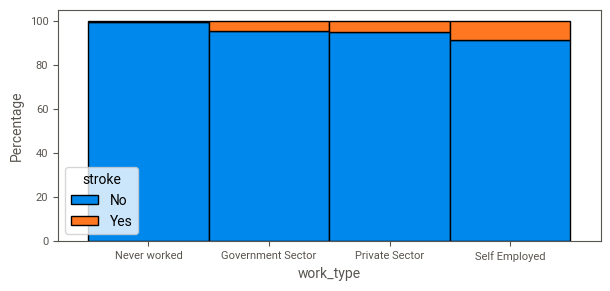

In [77]:
# | label: fig-work-prop
# | fig-cap: 'Stroke incidence by work types.'
# | code-summary: Code of the figure
# | code-fold: true
crosstab_work.barplot(normalize="rows", stacked=True, width=1, rot=0);

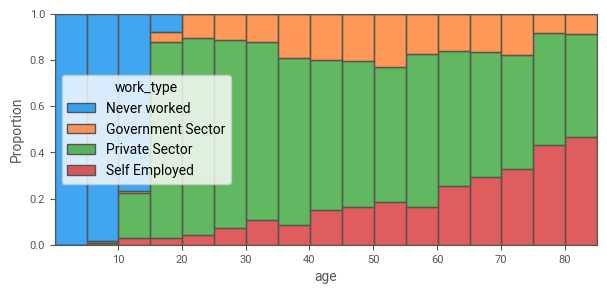

In [78]:
# | label: fig-work-age-prop
# | fig-cap: 'Work types by age (proportions).'
# | code-summary: Code of the figure
# | code-fold: true
sns.histplot(
    x="age",
    hue="work_type",
    data=data_train,
    multiple="fill",
    binwidth=5,
)
plt.ylabel("Proportion");

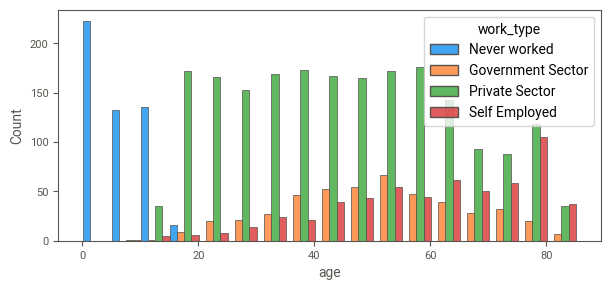

In [79]:
# | label: fig-work-age-counts
# | fig-cap: 'Work types by age.'
# | code-summary: Code of the figure
# | code-fold: true
sns.histplot(
    x="age",
    hue="work_type",
    data=data_train,
    multiple="dodge",
    binwidth=5,
)
plt.ylabel("Count");

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>EDA: Smoking status </summary>

In [80]:
# | code-fold: true
crosstab_smoking_2 = an.Crosstab("smoking_status_2", "stroke", data=data_train)
display_crosstab(crosstab_smoking_2, percentage="row")

Counts     % (row)     
stroke               No Yes      No  Yes
smoking_status_2                        
never smoked       1272  65   95.10 4.90
formerly smoked     571  48   92.20 7.80
smokes              514  26   95.20 4.80
Unknown            1045  35   96.80 3.20

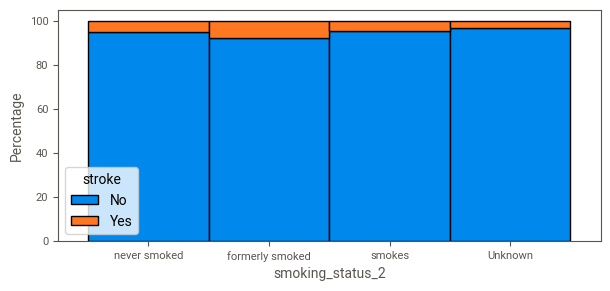

In [81]:
# | label: fig-smoking-2-prop
# | fig-cap: 'Stroke incidence by smoking status (explicit missing values).'
# | code-summary: Code of the figure
# | code-fold: true
crosstab_smoking_2.barplot(normalize="rows", stacked=True, width=1);

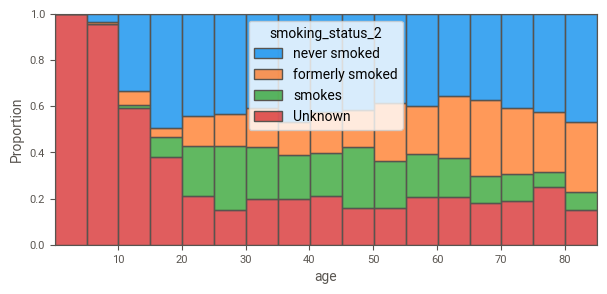

In [82]:
# | label: fig-smoking-2-age-prop
# | fig-cap: 'Smoking status (explicit missing values) by age (proportions).'
# | code-summary: Code of the figure
# | code-fold: true
sns.histplot(
    x="age",
    hue="smoking_status_2",
    data=data_train,
    multiple="fill",
    binwidth=5,
)
plt.ylabel("Proportion");

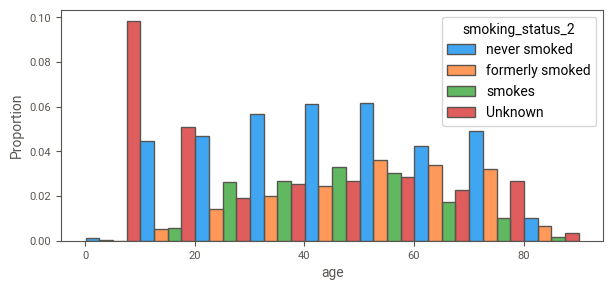

In [83]:
# | label: fig-smoking-2-age
# | fig-cap: 'Smoking status (explicit missing values) by age.'
# | code-summary: Code of the figure
# | code-fold: true
sns.histplot(
    x="age",
    hue="smoking_status_2",
    data=data_train,
    multiple="dodge",
    binwidth=10,
    stat="proportion",
    common_norm=True,
);

In [84]:
# | code-fold: true
crosstab_smoking_na = an.Crosstab("smoking_status_is_unknown_01", "stroke", data=data_train)
display_crosstab(crosstab_smoking_na, percentage="row")

Counts      % (row)     
stroke                           No  Yes      No  Yes
smoking_status_is_unknown_01                         
0                              2357  139   94.40 5.60
1                              1045   35   96.80 3.20

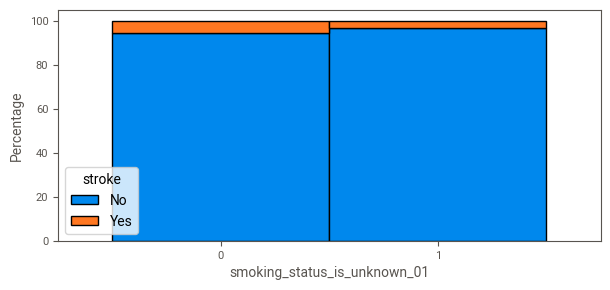

In [85]:
# | label: fig-smoking-na-prop
# | fig-cap: 'Stroke incidence by the missingness of smoking status.'
# | code-summary: Code of the figure
# | code-fold: true
crosstab_smoking_na.barplot(normalize="rows", stacked=True, width=1);

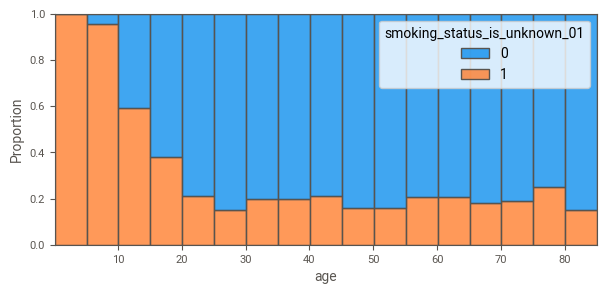

In [86]:
# | label: fig-smoking-na-age
# | fig-cap: 'Missingness of smoking status by age (proportions).'
# | code-summary: Code of the figure
# | code-fold: true
sns.histplot(
    x="age",
    hue="smoking_status_is_unknown_01",
    data=data_train,
    multiple="fill",
    binwidth=5,
)
plt.ylabel("Proportion");

In [87]:
crosstab_smoking = an.Crosstab("smoking_status", "stroke", data=data_train)
display_crosstab(crosstab_smoking, percentage="row")

Counts     % (row)     
stroke              No Yes      No  Yes
smoking_status                         
never smoked      1272  65   95.10 4.90
formerly smoked    571  48   92.20 7.80
smokes             514  26   95.20 4.80

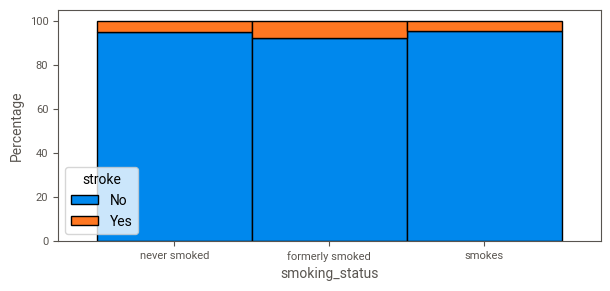

In [88]:
# | label: fig-smoking-prop
# | fig-cap: 'Stroke incidence by smoking status.'
# | code-summary: Code of the figure
# | code-fold: true

crosstab_smoking.barplot(normalize="rows", stacked=True, width=1);

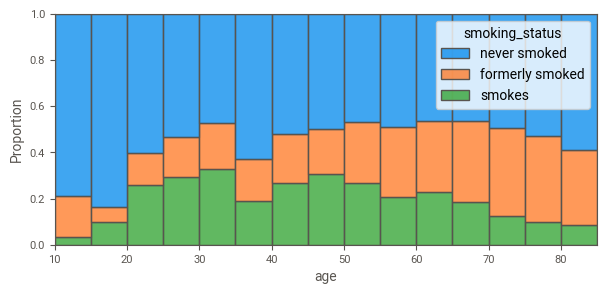

In [89]:
# | label: fig-smoking-age
# | fig-cap: 'Smoking status by age.'
# | code-summary: Code of the figure
# | code-fold: true

sns.histplot(
    x="age",
    hue="smoking_status",
    data=data_train,
    multiple="fill",
    binwidth=5,
)
plt.ylabel("Proportion");

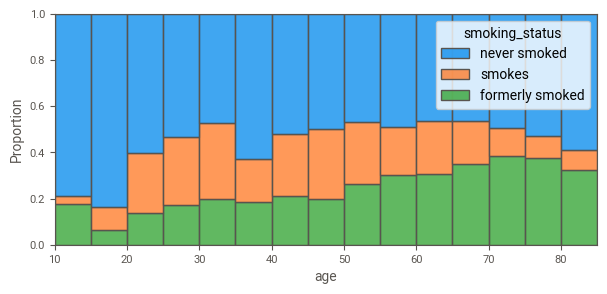

In [90]:
# | label: fig-smoking-age-2
# | fig-cap: 'Smoking status by age (different order of categories).'
# | code-summary: Code of the figure
# | code-fold: true
sns.histplot(
    x="age",
    hue="smoking_status",
    data=data_train,
    multiple="fill",
    binwidth=5,
    hue_order=["never smoked", "smokes", "formerly smoked"],
)
plt.ylabel("Proportion");

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

### Engineered Features

A higher value of engineered feature "health risk score", which summarizes the presence of 4 medical conditions, seems to reflect higher stroke incidence (@fig-health-risk-score-prop). Older people tend to have higher health risk scores too (@fig-health-risk-score-age).
Higher values of stroke incidence and stroke risk trend are associated with higher stroke incidence as well (@fig-stroke-incidence, @fig-stroke-risk-40, and @fig-stroke-risk-55).

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>EDA: Health risk score </summary>

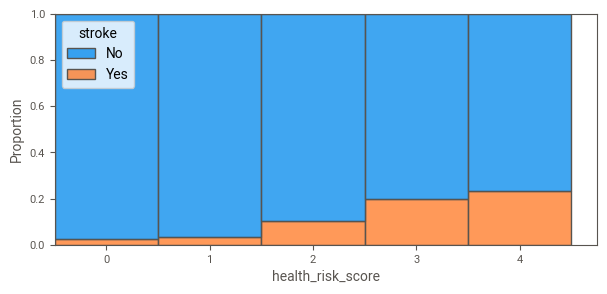

In [91]:
# | label: fig-health-risk-score-prop
# | fig-cap: 'Stroke incidence by health risk score (proportions).'
# | code-summary: Code of the figure
# | code-fold: true
sns.histplot(
    x="health_risk_score",
    hue="stroke",
    data=data_train,
    multiple="fill",
    binwidth=1,
    binrange=(-0.5, 5.5),
)
plt.ylabel("Proportion");

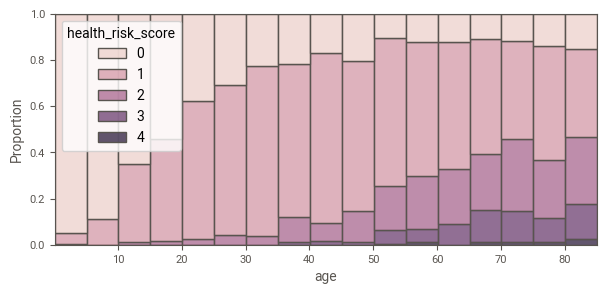

In [92]:
# | label: fig-health-risk-score-age
# | fig-cap: 'Health risk score by age.'
# | code-summary: Code of the figure
# | code-fold: true
sns.histplot(
    x="age", hue="health_risk_score", data=data_train, multiple="fill", binwidth=5
)
plt.ylabel("Proportion");

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>EDA: Non-linear functions of age </summary>

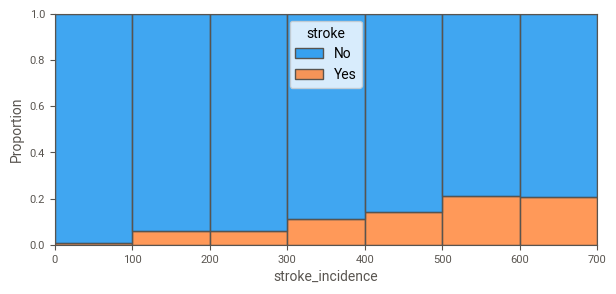

In [93]:
# | label: fig-stroke-incidence
# | fig-cap: 'Stroke status by stroke incidence trend value.'
# | code-summary: Code of the figure
# | code-fold: true
sns.histplot(
    x="stroke_incidence", hue="stroke", data=data_train, multiple="fill", binwidth=100
)
plt.ylabel("Proportion");

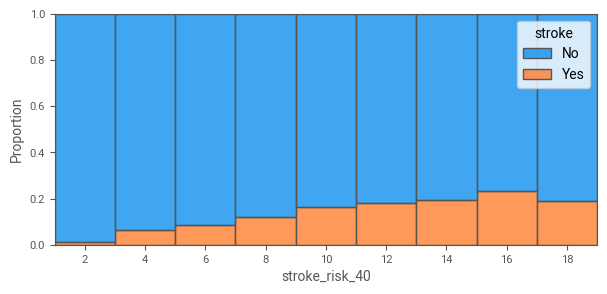

In [94]:
# | label: fig-stroke-risk-40
# | fig-cap: 'Stroke status by stroke risk trend value (threshold=40).'
# | code-summary: Code of the figure
# | code-fold: true
sns.histplot(
    x="stroke_risk_40", hue="stroke", data=data_train, multiple="fill", binwidth=2
)
plt.ylabel("Proportion");

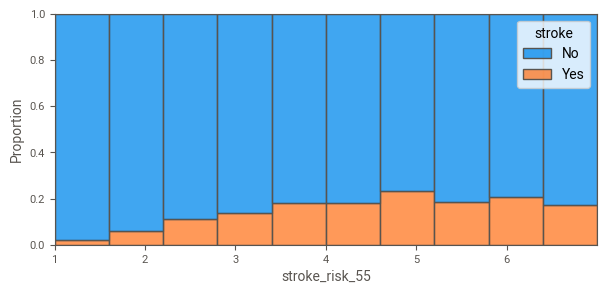

In [95]:
# | label: fig-stroke-risk-55
# | fig-cap: 'Stroke status by stroke risk trend value (threshold=55).'
# | code-summary: Code of the figure
# | code-fold: true
sns.histplot(
    x="stroke_risk_55", hue="stroke", data=data_train, multiple="fill", binwidth=.6
)
plt.ylabel("Proportion");

Stroke risk and stroke incidence shows similar trends with age. However, their dependence to each other is not linear.

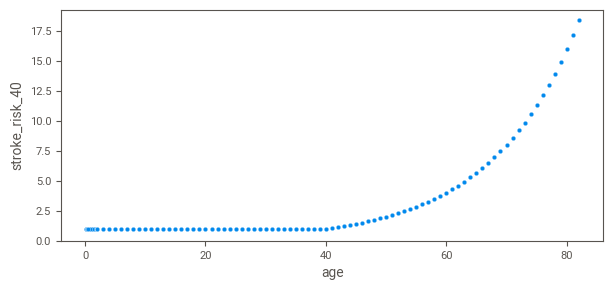

In [96]:
sns_plot = sns.scatterplot(x="age", y="stroke_risk_40", data=data_train)
sns_plot.set_ylim(0, None);

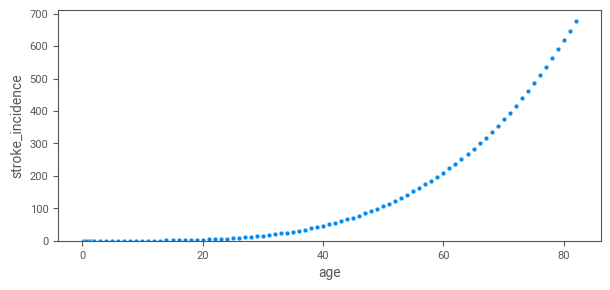

In [97]:
sns_plot = sns.scatterplot(x="age", y="stroke_incidence", data=data_train)
sns_plot.set_ylim(0, None);

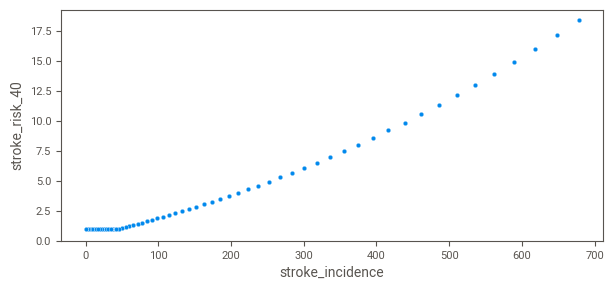

In [98]:
sns_plot = sns.scatterplot(x="stroke_incidence", y="stroke_risk_40", data=data_train)
sns_plot.set_ylim(0, None);

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>EDA: Interaction features </summary>

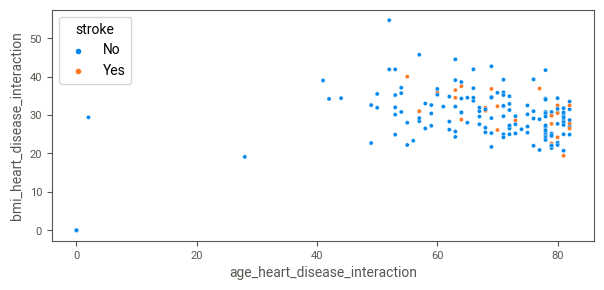

In [99]:
sns_plot = sns.scatterplot(
    x="age_heart_disease_interaction",
    y="bmi_heart_disease_interaction",
    hue="stroke",
    data=data_train,
);

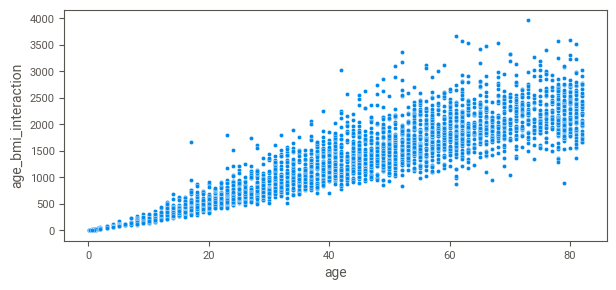

In [100]:
sns_plot = sns.scatterplot(x="age", y="age_bmi_interaction", data=data_train);

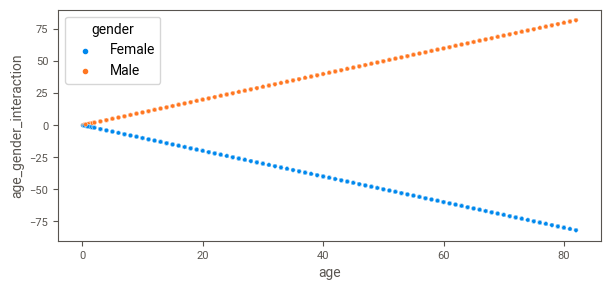

In [101]:
sns_plot = sns.scatterplot(
    x="age", y="age_gender_interaction", hue="gender", data=data_train
);

</details>


::: {.content-hidden when-format="html"}

`</details>`  
End of the collapsible section  

---  

:::

### Relationships Between Variables

Mutual information (MI) scores are highest between the target and variables derived from age and lowest for BMI-based variables (@tbl-rank-by-mutual-info). Point-biserial correlation is strongest between the target and `stroke_incidence` as well as `stroke_risk_40` variables (@tbl-rank-by-point-biserial).

While correlation coefficient matrix allows seeing linear relationships (both positive and negative) between variables (@fig-corr-clustermap), a matrix of absolute correlation coefficient values with rows and columns ordered according to hierarchical clustering results reveals that there are **7 groups** of highly **inter-correlated variables** (@fig-corr-clustermap-abs).

::: {.content-hidden when-format="html"}

---  

Start of the collapsible section  
`<details>`    

:::

<details class="with-border">
<summary>EDA: Mutual Information (target vs. predictors) </summary>

Mutual information shows strength of association between two variables (in this case, between the target and the remaining variables).

Advantages of mutual information:

- Shows strength of relationship between the target and the remaining variables. 
- Captures not only linear relationships but also non-linear ones.

Drawbacks of mutual information:

- Does not show direction of the relationship;
- Calculation algorithm includes randomness to break ties, so the results might be slightly different each time.

In [102]:
# | label: tbl-rank-by-mutual-info
# | tbl-cap: '**Mutual information** between the target variable and
# |          the features.'
# | code-fold: true

an.get_mutual_information(
    data_train.dropna(), target="stroke_01", drop=["stroke"], random_state=31
)

</details>


::: {.content-hidden when-format="html"}

`</details>`  
End of the collapsible section  

---  

:::

::: {.content-hidden when-format="html"}

---  

Start of the collapsible section  
`<details>`    

:::

<details class="with-border">
<summary>EDA: Point-Biserial Correlation (target vs. predictors) </summary>

The table below shows relationship between binary target variable and the remaining numeric variables expressed as point-biserial correlation.
This relationship quantifies how much the continuous variable differs between the two binary groups.


**Details.**
The correlation coefficient (denoted as `r_pb` in the table below) was calculated, along with the corresponding p-values. Additionally, p-values adjusted for multiple comparisons using the Holm-Šídák method were computed. The correlation analysis results are summarized in @tbl-rank-by-point-biserial.

In [103]:
# | label: tbl-rank-by-point-biserial
# | tbl-cap: 'Point-biserial **correlation** (`r_pb`) between the target variable
# |          and the numeric/binary features. For multiple comparisons
# |          Holm-Sidak correction is used (`p_adj`).'
# | code-fold: true

an.get_pointbiserial_corr_scores(data_train, target="stroke_01")

</details>


::: {.content-hidden when-format="html"}

`</details>`  
End of the collapsible section  

---  

:::

::: {.content-hidden when-format="html"}

---  

Start of the collapsible section  
`<details>`    

:::

<details class="with-border" >
<summary>EDA: Pearson Correlation (matrix) </summary>

This correlation matrix shows strength of linear relationship between numeric variables.

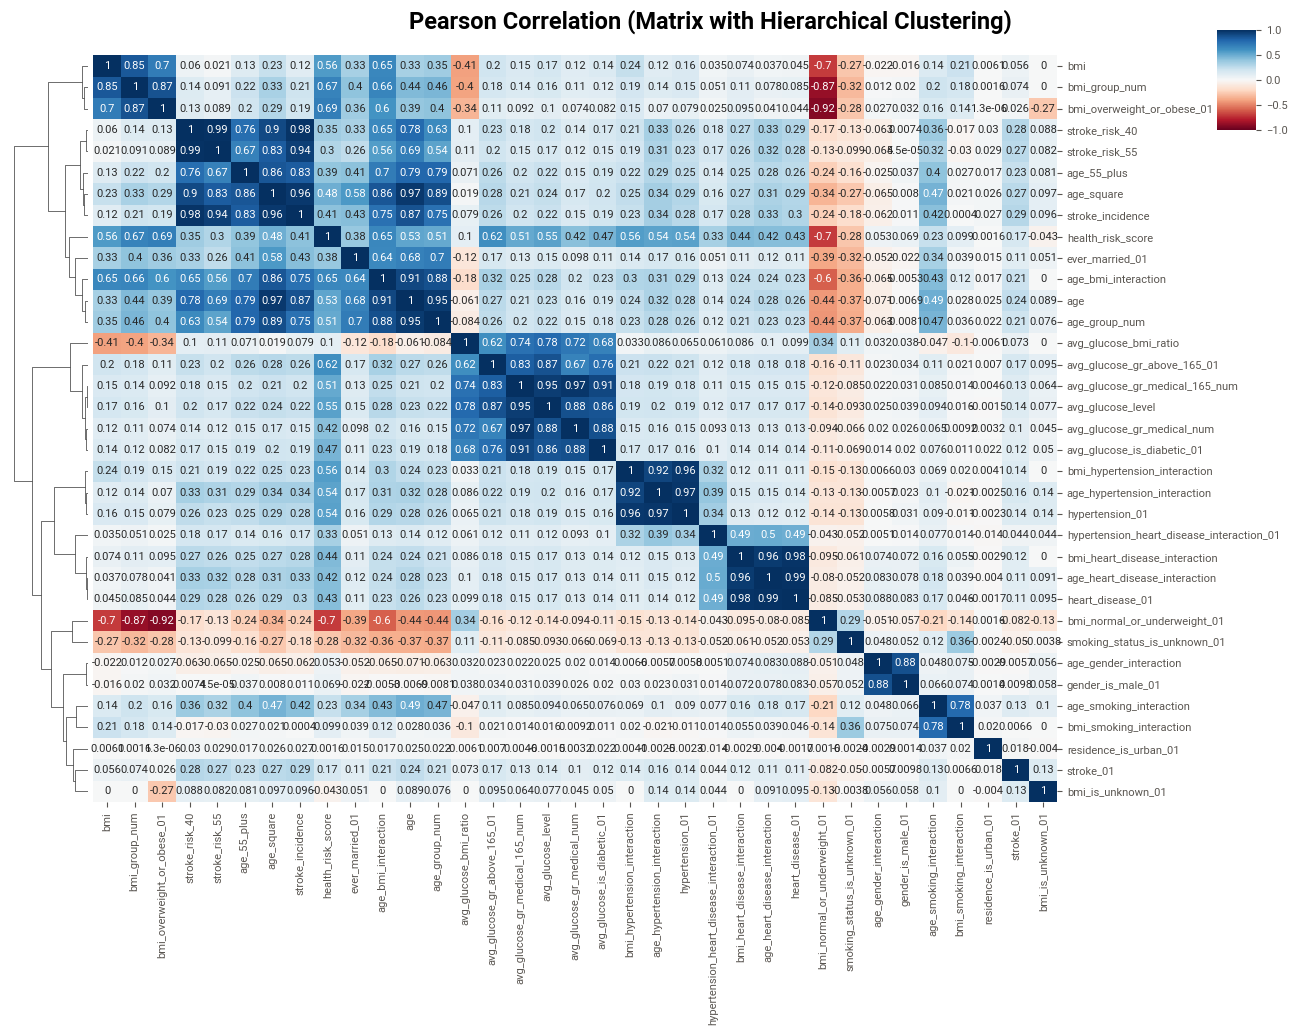

In [104]:
# | label: fig-corr-clustermap
# | fig-cap: 'Matrix of Pearson correlation coefficients.
# |          Hierarchical clustering is used to group variables with similar
# |          correlation patterns.'
# | code-summary: Code of the figure
# | code-fold: true
data_num = data_train.select_dtypes("number")
corr_coefs = data_num.corr(method="pearson").fillna(0)

g = sns.clustermap(
    corr_coefs,
    method="ward",
    cmap="RdBu",
    annot=True,
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    figsize=(13, 10),
    cbar_pos=(0.94, 0.91, 0.03, 0.1),
    cbar_kws={"location": "right"},
    dendrogram_ratio=(0.075, 0),
)

g.fig.suptitle(
    "Pearson Correlation (Matrix with Hierarchical Clustering)",
    fontsize=17,
    y=1.03,
    x=0.55,
);

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

::: {.content-hidden when-format="html"}

---  

Start of the collapsible section  
`<details>`    

:::

<details class="with-border" >
<summary>EDA: Pearson Correlation (matrix of absolute values) </summary>

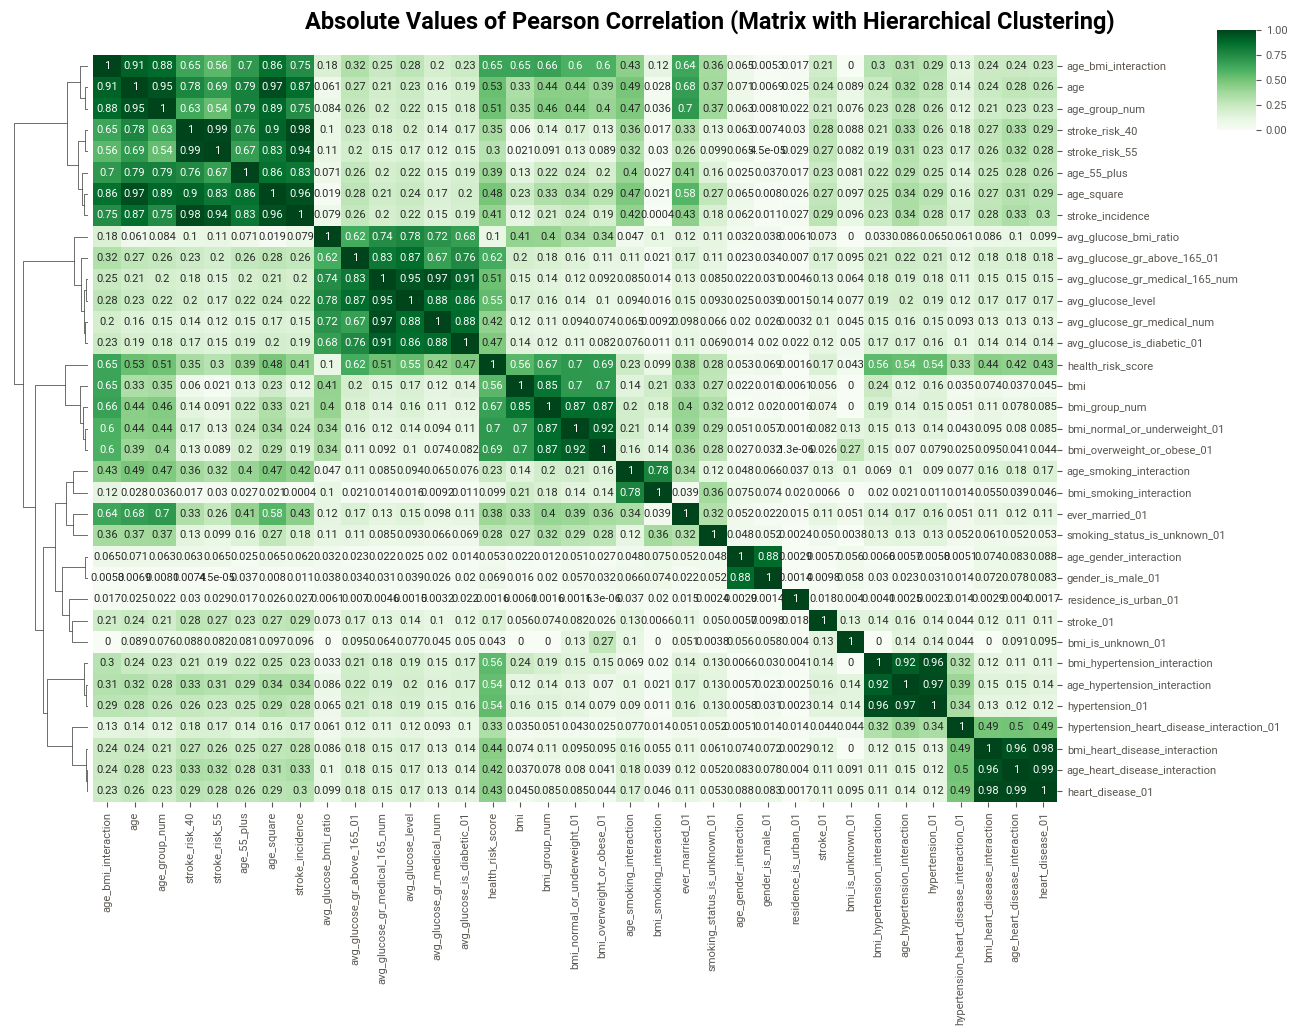

In [105]:
# | label: fig-corr-clustermap-abs
# | fig-cap: 'Matrix of absolute values of Pearson correlation coefficients.
# |          Hierarchical clustering is used to group variables with similar
# |          correlation patterns. Absolute values are used to make it easier
# |          to identify variable clusters that share correlation patterns.'
# | code-summary: Code of the figure
# | code-fold: true

data_num = data_train.select_dtypes("number")
corr_coefs = data_num.corr(method="pearson").fillna(0).abs()

g = sns.clustermap(
    corr_coefs,
    method="ward",
    cmap="Greens",
    annot=True,
    annot_kws={"size": 8},
    vmin=0,
    vmax=1,
    figsize=(13, 10),
    cbar_pos=(0.94, 0.91, 0.03, 0.1),
    cbar_kws={"location": "right"},
    dendrogram_ratio=(0.075, 0),
)

g.fig.suptitle(
    "Absolute Values of Pearson Correlation (Matrix with Hierarchical Clustering)",
    fontsize=17,
    y=1.03,
    x=0.55,
);

</details>


::: {.content-hidden when-format="html"}

`</details>`  
End of the collapsible section  

---  

:::

# Modeling

There were several main stages of the modelling procedure:

1) Remove redundant variables (e.g., binary No/Yes variables that have 0/1 counterparts);
2) Remove highly correlated variables (to make calculations in the next steps more efficient);
3) Pre-tune models (to avoid totally bad models);
4) Perform sequential feature selection (selecting best performing feature combinations for 3 model candidates);
5) Fine-tune hyperparameters (and selecting the best model);
6) Evaluate the final model on the test set.

**F1** score was used as the main metric for model evaluation as it takes class imbalance into account. Other metrics were also considered as additional indicators.

## Feature Selection: Filtering {#sec-fs-filtering}

### Identify Correlated Variable Groups

The initial phase of feature selection involves the identification of variables that lack informativeness or contain redundant information. To achieve this, the "smart correlation" algorithm implemented in the `feature-engine` package will be employed. This algorithm is expected to identify clusters of correlated variables similar to ones illustrated in @fig-corr-clustermap-abs.

Correlated feature selection:

1) Detect groups of correlated features based on Pearson's correlation ($|r| > 0.75$).
2) Select the best feature from each group based on Random Forest classification performance (ROC AUC).

In [106]:
# Identify correlated variable sets -----------------------------------------

X_train = (
    data_train.drop(columns=["stroke", "stroke_01"])
    .select_dtypes("number")
    .sample(frac=1, axis=1, random_state=20)
)
y_train = data_train["stroke_01"]

X_train = (
    SimpleImputer(strategy="median")
    .set_output(transform="pandas")
    .fit_transform(X_train)
)

# Random forest for feature selection
rf = RandomForestClassifier(n_estimators=30, random_state=20, n_jobs=-1)

# Correlation selector
sel = SmartCorrelatedSelection(
    variables=None,  # All numerical variables
    method="pearson",
    threshold=0.75,
    missing_values="ignore",
    selection_method="model_performance",
    estimator=rf,
    scoring="roc_auc",
    cv=5,
)

# Apply the selector
sel.fit(X_train, y_train);

List sets of correlated features.

In [107]:
sel.correlated_feature_sets_

[{'age', 'age_55_plus', 'age_bmi_interaction', 'age_group_num', 'age_square'},
 {'avg_glucose_gr_above_165_01',
  'avg_glucose_gr_medical_165_num',
  'avg_glucose_gr_medical_num',
  'avg_glucose_is_diabetic_01',
  'avg_glucose_level'},
 {'bmi_group_num',
  'bmi_normal_or_underweight_01',
  'bmi_overweight_or_obese_01'},
 {'age_gender_interaction', 'gender_is_male_01'},
 {'stroke_incidence', 'stroke_risk_40', 'stroke_risk_55'},
 {'age_heart_disease_interaction',
  'bmi_heart_disease_interaction',
  'heart_disease_01'},
 {'age_hypertension_interaction',
  'bmi_hypertension_interaction',
  'hypertension_01'},
 {'age_smoking_interaction', 'bmi_smoking_interaction'}]

Basing on EDA results, I manually updated the list of correlated feature groups.
I ranked the importance of these features based on the results of the Random Forest classifier and highlighted th best performing features in green.

In [108]:
# Mimic the output of the feature selector by additionally calculating ROC AUC

correlated_feature_sets = [
    {
        "age_55_plus",
        "age_bmi_interaction",
        "age_group_num",
        "age_square",
        "age",
        "stroke_incidence",
        "stroke_risk_40",
        "stroke_risk_55",
    },
    {
        "avg_glucose_bmi_ratio",  # Added
        "avg_glucose_gr_above_165_01",
        "avg_glucose_gr_medical_165_num",
        "avg_glucose_gr_medical_num",
        "avg_glucose_is_diabetic_01",
        "avg_glucose_level",
    },
    {
        "age_hypertension_interaction",
        "bmi_hypertension_interaction",
        "hypertension_01",
    },
    {
        "bmi",
        "bmi_group_num",
        "bmi_overweight_or_obese_01",
        "bmi_normal_or_underweight_01",
    },
    {
        "age_heart_disease_interaction",
        "bmi_heart_disease_interaction",
        "heart_disease_01",
    },
    {'age_gender_interaction', 'gender_is_male_01'},
    {"age_smoking_interaction", "bmi_smoking_interaction"},
]

# Select each group of correlated features
i = 0
for group in correlated_feature_sets:
    i += 1
    rez = []

    # Build random forest with cross validation for each feature
    for feature in group:
        model = cross_validate(
            rf,
            X_train[feature].to_frame(),
            y_train,
            cv=5,
            return_estimator=False,
            scoring="roc_auc",
        )

        rez.append((f"Group {i}", model["test_score"].mean(), feature))
    display(
        pd.DataFrame(rez, columns=["Group", "AUC", "Feature"])
        .sort_values("AUC", ascending=False)
        .style.highlight_max(color="green", axis=0, subset="AUC")
        .format(precision=3)
        .set_properties(**{"width": "6em"})
    )

The tables above let me decide which correlated variables to remove from the dataset. Basing on the result, I decided to keep only the best-ranked variable in each group with the following exceptions:

- From group 1, I decided to keep first 4 variables as they perform similarly well.
- I also decided to beep both variables from group 6.

### Remove Variables

The whole list of variables to remove at this stage is as follows:

In [109]:
cols_to_drop = [
    # Remove categoricals as duplicates of
    # other numeric variable with similar name
    "stroke",
    "age_group",
    "avg_glucose_gr_165",
    "avg_glucose_gr_medical",
    "bmi_group",
    "ever_married",
    "heart_disease",
    "hypertension",
    "avg_glucose_gr_medical_165",
    "smoking_status_2",
    "work_type_original",
    # Remove categoricals as duplicates of
    # other numeric variable with different name
    "gender",
    "residence_type",
    # Remove based on domain knowledge and EDA results:
    "bmi_is_unknown_01",
    # Remove as inter-correlated to other variables:
    "stroke_risk_55",
    "age_group_num",
    "age_55_plus",
    "age_bmi_interaction",
    "avg_glucose_level",
    "avg_glucose_bmi_ratio",
    "avg_glucose_gr_medical_num",
    "avg_glucose_is_diabetic_01",
    "avg_glucose_gr_medical_165_num",
    "bmi_hypertension_interaction",
    "age_hypertension_interaction",
    "bmi",
    "bmi_normal_or_underweight_01",
    "bmi_overweight_or_obese_01",
    "age_heart_disease_interaction",
    "bmi_heart_disease_interaction",
    "bmi_smoking_interaction",
]

data_train_2 = data_train.drop(columns=cols_to_drop)

Nineteen variables remains in the dataset after this step (@tbl-col-info-modeling).

In [110]:
data_train_2.shape

(3576, 19)

In [111]:
# | label: tbl-col-info-modeling
# | tbl-cap: 'List of variables used in modeling.'

an.col_info(data_train_2, style=True)

### Prepare for Modeling

Now, the training and validation sets will be prepared for the modeling process. This involves separating the target variable from the remaining features. 

In [112]:
target = "stroke_01"

X_train = data_train_2.drop(target, axis=1)
y_train = data_train_2[target].to_numpy()

# data_validation_2 = pre_processing.transform(data_validation)
X_validation = data_validation.drop(target, axis=1)
y_validation = data_validation[target].to_numpy()

## Pre-Processing: Group-Dependent Steps

Group-dependent pre-processing steps are implemented as a pipeline. These steps are repeated during cross-validation (CV) procedure to prevent data leakage. The steps illustrated in the schematic below. The main highlights are:

1) There are 3 parallel pre-processing pipelines: for binary (selected by name pattern `_01`), numeric, and categorical variables.
2) The numeric pipeline consists of:
   - imputation of missing values with median;
   - scaling with standard scaler.
3) The categorical pipeline consists of:
   - imputation of missing values with most frequent value;
   - one-hot encoding.
4) In the binary pipeline variables are just passed through.

In [113]:
# | code-fold: true

# Group-dependent pre-processing steps
# that will be performed before each model re-fitting

# Select numeric variables by data type and name pattern
select_numeric_nonbinary = make_column_selector(
    dtype_include="number", pattern="^(?!.*_01$).*$"
)
# Select binary variables by data type and name pattern
select_binary_01 = make_column_selector(dtype_include="number", pattern="_01$")
# Select categorical variables by data type
select_categorical = make_column_selector(dtype_include=["object", "category"])

# Create the pipelines for each of the 3 groups of variables
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(sparse_output=False)),
    ]
)

group_dependent_preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, select_numeric_nonbinary),
        ("binary_01", "passthrough", select_binary_01),
        ("categorical", categorical_transformer, select_categorical),
    ],
    verbose_feature_names_out=False,
)

group_dependent_preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000172781C0390>),
                                ('binary_01', 'passthrough',
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001727FF3D410>),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001727EEAF7D0>)],
                  verbose_feature_names_out=False)

## Model Pre-Tuning

In this section, a few hyperparameters for **8 ML algorithms** (logistic regression, k-nearest neighbors, support vector machine for classification (SVC), random forest, Gaussian Naive Bayes, XGBoost, LightGBM and CatBoost) will be pre-tuned and their performance will be compared.
This is a preparation step before sequential feature selection.

Two lists of models, along with their corresponding hyperparameter grids or distributions, have been created. Class imbalance will be addressed by adjusting class weights, and for most of the models, there is an automatic option for this.

Why have these models been pre-tuned using two different strategies? For models with fewer parameters to tune, we employ grid search, as it offers reproducibility. However, for models with numerous parameters, grid search becomes impractical, leading us to use Bayesian optimization. Unfortunately, I have observed that the results of "OptunaSearchCV" are not reproducible on my computer, even when a random seed is set.

The results are summarized in @tbl-pre-tune-train (training set) @tbl-pre-tune-validation (validation set). Based on the validation set results, most of the models perform similarly (F1 score is between 0.2 and 0.3), with the exception of kNN that is significantly worse. Yet, as dataset is small, the calculation will not take long and all models will be considered in the next step.

Define search spaces:

In [114]:
# The list of classifiers along with their respective hyperparameter grids.
# Boosting algorithms are excluded here.
classifiers = [
    (
        "Logistic Regression",
        LogisticRegression(random_state=1, max_iter=1000, class_weight="balanced"),
        {"classifier__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    ),
    ("Naive Bayes", GaussianNB(), {}),
    (
        "kNN",
        KNeighborsClassifier(),
        {"classifier__n_neighbors": [3, 5, 7, 10, 12, 15, 17, 20]},
    ),
    (
        "SVC",
        SVC(random_state=1, probability=True, class_weight="balanced"),
        [
            {
                "classifier__kernel": ["linear"],
                "classifier__C": [0.01, 0.1, 1, 10, 100],
            },
            {
                "classifier__kernel": ["rbf"],
                "classifier__C": [0.01, 0.1, 1, 10, 100],
                "classifier__gamma": [0.01, 0.1, 1, 10, 100],
            },
        ],
    ),
    (
        "Random Forest",
        RandomForestClassifier(random_state=1, class_weight="balanced"),
        {
            "classifier__n_estimators": [50, 100, 200, 300],
            "classifier__max_depth": [3, 5, 7, 9, None],
        },
    ),
]

In [115]:
# The list of classifiers along with their respective hyperparameter distributions.
# Boosting algorithms only.
classifiers_boost = [
    (
        "XGBoost",
        XGBClassifier(random_state=1, enable_categorical=False),
        {
            "classifier__n_estimators": IntDistribution(50, 1000, step=50),
            "classifier__max_depth": IntDistribution(1, 12),
            "classifier__scale_pos_weight": FloatDistribution(1, 30),
            "classifier__min_child_weight": IntDistribution(1, 12),
            "classifier__gamma": FloatDistribution(0, 1),
            "classifier__reg_alpha": FloatDistribution(0, 1),
            "classifier__subsample": FloatDistribution(0.1, 1),
            "classifier__colsample_bytree": FloatDistribution(0.1, 1),
        },
    ),
    (
        "LightGBM",
        LGBMClassifier(
            random_state=1,
            class_weight="balanced",
            objective="binary",
            metric="binary_logloss",
            verbosity=-1,
        ),
        {
            "classifier__n_estimators": IntDistribution(50, 1000, step=50),
            "classifier__max_depth": IntDistribution(1, 12),
            "classifier__boosting_type": CategoricalDistribution(["gbdt"]),
            "classifier__lambda_l1": FloatDistribution(1e-8, 10.0, log=True),
            "classifier__lambda_l2": FloatDistribution(1e-8, 10.0, log=True),
            "classifier__num_leaves": IntDistribution(2, 256),
            "classifier__feature_fraction": FloatDistribution(0.4, 1.0),
            "classifier__bagging_fraction": FloatDistribution(0.4, 1.0),
            "classifier__bagging_freq": IntDistribution(1, 7),
            "classifier__min_child_samples": IntDistribution(5, 100),
        },
    ),
    (
        "CatBoost",
        CatBoostClassifier(
            random_state=1, auto_class_weights="Balanced", verbose=False
        ),
        {
            "classifier__n_estimators": IntDistribution(50, 1000, step=50),
            "classifier__depth": IntDistribution(1, 12),
            "classifier__colsample_bylevel": FloatDistribution(0.1, 1),
            "classifier__boosting_type": CategoricalDistribution(["Ordered", "Plain"]),
            "classifier__bootstrap_type": CategoricalDistribution(
                ["Bayesian", "Bernoulli", "MVS"]
            ),
            "classifier__random_strength": FloatDistribution(1e-4, 10.0, log=True),
            "classifier__l2_leaf_reg": FloatDistribution(1e-8, 10.0, log=True),
            # if param["bootstrap_type"] == "Bayesian":
            "classifier__bagging_temperature": FloatDistribution(0, 10),
            # if param["bootstrap_type"] == "Bernoulli":
            "classifier__subsample": FloatDistribution(0.1, 1),
        },
    ),
]

Pre-tune:

In [116]:
@my.cache_results(dir_cache + "01_1_pre_tuned_models_nonboost.pickle")
def pre_tune_models_nonboost():
    """The following code is wrapped into a function for result catching.

    Select the best model for each classifier.
    """

    # Create a list to store pre-tuned models
    pre_tuned_models = {}

    # Iterate over the classifiers and perform hyperparameter tuning
    # using cross-validation
    for name, classifier, param_grid in classifiers:
        # Create the pipeline with the preprocessor, and the classifier
        pipeline = Pipeline(
            steps=[
                ("preprocessor", group_dependent_preprocessor),
                ("classifier", classifier),
            ]
        )

        # Perform hyperparameter tuning using cross-validation
        print(f"\nClassifier: {name}")
        grid_search = GridSearchCV(
            pipeline, param_grid, cv=5, scoring="f1", n_jobs=-1, verbose=1
        )
        grid_search.fit(X_train, y_train)

        # Get the best model
        pre_tuned_models[name] = grid_search.best_estimator_
    return pre_tuned_models


pre_tuned_models_nonboost = pre_tune_models_nonboost()
# Duration: 2m 59.8s

In [117]:
@my.cache_results(dir_cache + "01_2_pre_tuned_models_boost.pickle")
def pre_tune_models_boost():
    """The following code is wrapped into a function for result catching.

    Select the best model for each classifier.
    """

    # Create a list to store pre-tuned models
    pre_tuned_models = {}

    # Iterate over the classifiers and perform hyperparameter tuning
    # using cross-validation
    for name, classifier, param_candidates in classifiers_boost:
        # Create the pipeline with the preprocessor, and the classifier
        pipeline = Pipeline(
            steps=[
                ("preprocessor", group_dependent_preprocessor),
                ("classifier", classifier),
            ]
        )

        # Perform hyperparameter tuning using cross-validation
        print(f"\nClassifier: {name}")
        optuna_search = OptunaSearchCV(
            pipeline,
            param_candidates,
            cv=5,
            scoring="f1",
            n_trials=200,
            timeout=1000,
            random_state=1,
            n_jobs=-1,
            verbose=1,
        )
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=FutureWarning)
            optuna_search.fit(X_train, y_train)

        # Get the best model
        pre_tuned_models[name] = optuna_search.best_estimator_
    return pre_tuned_models


pre_tuned_models_boost = pre_tune_models_boost()
# Duration: 10m 2.6s

<details class="with-border">
<summary>Output </summary>

```
OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
[I 2023-09-24 00:05:35,605] A new study created in memory with name: no-name-86a03f0f-e33f-4946-827e-c344751326a6
[I 2023-09-24 00:05:35,606] Searching the best hyperparameters using 3576 samples...

Classifier: XGBoost
[I 2023-09-24 00:05:38,882] Trial 5 finished with value: 0.22770292738864018 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 20.323372031436943, 'classifier__min_child_weight': 9, 'classifier__gamma': 0.5679728319097288, 'classifier__reg_alpha': 0.7590751003070284, 'classifier__subsample': 0.8742646388759626, 'classifier__colsample_bytree': 0.7543240649272721}. Best is trial 5 with value: 0.22770292738864018.
[I 2023-09-24 00:05:39,218] Trial 1 finished with value: 0.21220914724682696 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 9, 'classifier__scale_pos_weight': 11.405355271100639, 'classifier__min_child_weight': 7, 'classifier__gamma': 0.6897711639423789, 'classifier__reg_alpha': 0.2645839981752788, 'classifier__subsample': 0.12224807857694692, 'classifier__colsample_bytree': 0.8607193949933581}. Best is trial 5 with value: 0.22770292738864018.
[I 2023-09-24 00:05:40,293] Trial 0 finished with value: 0.16575643350799646 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 9, 'classifier__scale_pos_weight': 25.30612700211495, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.08213255948794052, 'classifier__reg_alpha': 0.45340802750603204, 'classifier__subsample': 0.4427964842035824, 'classifier__colsample_bytree': 0.20788872431158778}. Best is trial 5 with value: 0.22770292738864018.
[I 2023-09-24 00:05:43,761] Trial 9 finished with value: 0.155874247703516 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 7, 'classifier__scale_pos_weight': 7.050650211678539, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.33701735331151794, 'classifier__reg_alpha': 0.5540903899080989, 'classifier__subsample': 0.7305774910980178, 'classifier__colsample_bytree': 0.35865369397019575}. Best is trial 5 with value: 0.22770292738864018.
[I 2023-09-24 00:05:44,223] Trial 7 finished with value: 0.18507848606266697 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 11, 'classifier__scale_pos_weight': 14.659950741256898, 'classifier__min_child_weight': 8, 'classifier__gamma': 0.7330078556668773, 'classifier__reg_alpha': 0.9153328202267903, 'classifier__subsample': 0.1323083752066333, 'classifier__colsample_bytree': 0.987378247843026}. Best is trial 5 with value: 0.22770292738864018.
[I 2023-09-24 00:05:44,556] Trial 3 finished with value: 0.1517554981221541 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 6, 'classifier__scale_pos_weight': 21.105236562534184, 'classifier__min_child_weight': 6, 'classifier__gamma': 0.8881459202406886, 'classifier__reg_alpha': 0.292017846288841, 'classifier__subsample': 0.45341701317476846, 'classifier__colsample_bytree': 0.3717021827857413}. Best is trial 5 with value: 0.22770292738864018.
[I 2023-09-24 00:05:45,672] Trial 6 finished with value: 0.1652326602282704 and parameters: {'classifier__n_estimators': 850, 'classifier__max_depth': 9, 'classifier__scale_pos_weight': 2.428401373749685, 'classifier__min_child_weight': 12, 'classifier__gamma': 0.7755559162255194, 'classifier__reg_alpha': 0.5342502163035464, 'classifier__subsample': 0.23060391361179372, 'classifier__colsample_bytree': 0.41425805263986293}. Best is trial 5 with value: 0.22770292738864018.
[I 2023-09-24 00:05:48,637] Trial 4 finished with value: 0.1771558784318363 and parameters: {'classifier__n_estimators': 750, 'classifier__max_depth': 11, 'classifier__scale_pos_weight': 20.04752051739866, 'classifier__min_child_weight': 7, 'classifier__gamma': 0.6119839594199546, 'classifier__reg_alpha': 0.3591313404068157, 'classifier__subsample': 0.2552761366813674, 'classifier__colsample_bytree': 0.17159834287810824}. Best is trial 5 with value: 0.22770292738864018.
[I 2023-09-24 00:05:49,610] Trial 2 finished with value: 0.12979340028694403 and parameters: {'classifier__n_estimators': 700, 'classifier__max_depth': 6, 'classifier__scale_pos_weight': 20.34050803652558, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.47996336472203127, 'classifier__reg_alpha': 0.16649286801289465, 'classifier__subsample': 0.5254749403793055, 'classifier__colsample_bytree': 0.6631519316264126}. Best is trial 5 with value: 0.22770292738864018.
[I 2023-09-24 00:05:50,951] Trial 10 finished with value: 0.13000358745055285 and parameters: {'classifier__n_estimators': 550, 'classifier__max_depth': 6, 'classifier__scale_pos_weight': 12.96428397306081, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.9086396128859979, 'classifier__reg_alpha': 0.15020457240198415, 'classifier__subsample': 0.24592699058779677, 'classifier__colsample_bytree': 0.9157686693124726}. Best is trial 5 with value: 0.22770292738864018.
[I 2023-09-24 00:05:51,263] Trial 8 finished with value: 0.16524605241470397 and parameters: {'classifier__n_estimators': 850, 'classifier__max_depth': 7, 'classifier__scale_pos_weight': 7.047439984889867, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.474712746747722, 'classifier__reg_alpha': 0.6395649185804811, 'classifier__subsample': 0.11102854293681132, 'classifier__colsample_bytree': 0.1602534654681233}. Best is trial 5 with value: 0.22770292738864018.
[I 2023-09-24 00:05:52,197] Trial 18 finished with value: 0.1919587841171903 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 27.010935863700617, 'classifier__min_child_weight': 10, 'classifier__gamma': 0.9996642728846628, 'classifier__reg_alpha': 0.04812149144378397, 'classifier__subsample': 0.9635653776964175, 'classifier__colsample_bytree': 0.7916034542203456}. Best is trial 5 with value: 0.22770292738864018.
[I 2023-09-24 00:05:54,696] Trial 17 finished with value: 0.1959201888306059 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 29.784219135042257, 'classifier__min_child_weight': 11, 'classifier__gamma': 0.3985509265721282, 'classifier__reg_alpha': 0.8014370561791788, 'classifier__subsample': 0.9920761210482205, 'classifier__colsample_bytree': 0.6633989104002067}. Best is trial 5 with value: 0.22770292738864018.
[I 2023-09-24 00:05:55,165] Trial 19 finished with value: 0.256180911910027 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 11.897986763258412, 'classifier__min_child_weight': 9, 'classifier__gamma': 0.6425275095463152, 'classifier__reg_alpha': 0.7695173259828989, 'classifier__subsample': 0.698918301745959, 'classifier__colsample_bytree': 0.7441288966591272}. Best is trial 19 with value: 0.256180911910027.
[I 2023-09-24 00:05:55,582] Trial 14 finished with value: 0.1848224883422271 and parameters: {'classifier__n_estimators': 600, 'classifier__max_depth': 4, 'classifier__scale_pos_weight': 25.58488455811561, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.39728513150477396, 'classifier__reg_alpha': 0.3660225265038567, 'classifier__subsample': 0.14575400440387956, 'classifier__colsample_bytree': 0.7601111453737625}. Best is trial 19 with value: 0.256180911910027.
[I 2023-09-24 00:05:56,536] Trial 11 finished with value: 0.15291026714613334 and parameters: {'classifier__n_estimators': 800, 'classifier__max_depth': 4, 'classifier__scale_pos_weight': 12.755208344863556, 'classifier__min_child_weight': 8, 'classifier__gamma': 0.3022463859949437, 'classifier__reg_alpha': 0.5343932310175646, 'classifier__subsample': 0.387643963995841, 'classifier__colsample_bytree': 0.5071887955295644}. Best is trial 19 with value: 0.256180911910027.
[I 2023-09-24 00:05:57,103] Trial 12 finished with value: 0.177167614317147 and parameters: {'classifier__n_estimators': 650, 'classifier__max_depth': 7, 'classifier__scale_pos_weight': 14.442590424745005, 'classifier__min_child_weight': 12, 'classifier__gamma': 0.49839056509644397, 'classifier__reg_alpha': 0.43549548095283674, 'classifier__subsample': 0.42666352512951067, 'classifier__colsample_bytree': 0.7632688369379008}. Best is trial 19 with value: 0.256180911910027.
[I 2023-09-24 00:05:57,564] Trial 13 finished with value: 0.1379275849197462 and parameters: {'classifier__n_estimators': 650, 'classifier__max_depth': 8, 'classifier__scale_pos_weight': 27.859407373419753, 'classifier__min_child_weight': 12, 'classifier__gamma': 0.9801707735434585, 'classifier__reg_alpha': 0.6737141669582427, 'classifier__subsample': 0.6181404540804121, 'classifier__colsample_bytree': 0.5249191773839698}. Best is trial 19 with value: 0.256180911910027.
[I 2023-09-24 00:05:58,345] Trial 15 finished with value: 0.1384700996677741 and parameters: {'classifier__n_estimators': 1000, 'classifier__max_depth': 4, 'classifier__scale_pos_weight': 4.310514552884305, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.3001699534687625, 'classifier__reg_alpha': 0.29153620066370567, 'classifier__subsample': 0.9865164140935767, 'classifier__colsample_bytree': 0.5821823830170175}. Best is trial 19 with value: 0.256180911910027.
[I 2023-09-24 00:05:58,778] Trial 20 finished with value: 0.18373898381683246 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 3, 'classifier__scale_pos_weight': 12.86361653317261, 'classifier__min_child_weight': 9, 'classifier__gamma': 0.6633723509207547, 'classifier__reg_alpha': 0.6971601455014566, 'classifier__subsample': 0.6880789041167972, 'classifier__colsample_bytree': 0.8080316943450334}. Best is trial 19 with value: 0.256180911910027.
[I 2023-09-24 00:06:00,068] Trial 21 finished with value: 0.17445427764671367 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 3, 'classifier__scale_pos_weight': 17.397530611938972, 'classifier__min_child_weight': 9, 'classifier__gamma': 0.5985486003586802, 'classifier__reg_alpha': 0.7538184107164229, 'classifier__subsample': 0.7706567793556445, 'classifier__colsample_bytree': 0.7423250940684953}. Best is trial 19 with value: 0.256180911910027.
[I 2023-09-24 00:06:01,351] Trial 22 finished with value: 0.19367222583713556 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 3, 'classifier__scale_pos_weight': 18.358481710092594, 'classifier__min_child_weight': 9, 'classifier__gamma': 0.6114409989127114, 'classifier__reg_alpha': 0.7097307954162957, 'classifier__subsample': 0.7563419551080128, 'classifier__colsample_bytree': 0.5590708403631169}. Best is trial 19 with value: 0.256180911910027.
[I 2023-09-24 00:06:01,943] Trial 28 finished with value: 0.2431443688586546 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 10.263453855148073, 'classifier__min_child_weight': 6, 'classifier__gamma': 0.703557877919065, 'classifier__reg_alpha': 0.9001899905831448, 'classifier__subsample': 0.8218297066832417, 'classifier__colsample_bytree': 0.8730087635400962}. Best is trial 19 with value: 0.256180911910027.
[I 2023-09-24 00:06:02,590] Trial 29 finished with value: 0.2526863476246114 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 11.000739461047557, 'classifier__min_child_weight': 7, 'classifier__gamma': 0.7713766765611039, 'classifier__reg_alpha': 0.9962569655695779, 'classifier__subsample': 0.8342919822407583, 'classifier__colsample_bytree': 0.8795836799921177}. Best is trial 19 with value: 0.256180911910027.
[I 2023-09-24 00:06:02,837] Trial 24 finished with value: 0.1818114854432574 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 3, 'classifier__scale_pos_weight': 18.733406933377232, 'classifier__min_child_weight': 9, 'classifier__gamma': 0.5923700874830087, 'classifier__reg_alpha': 0.7524559591268045, 'classifier__subsample': 0.7693991015926283, 'classifier__colsample_bytree': 0.6502682270413831}. Best is trial 19 with value: 0.256180911910027.
[I 2023-09-24 00:06:03,284] Trial 26 finished with value: 0.21800485193957506 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 17.98039701434313, 'classifier__min_child_weight': 9, 'classifier__gamma': 0.6133947594965793, 'classifier__reg_alpha': 0.9991503602411129, 'classifier__subsample': 0.7874700808162154, 'classifier__colsample_bytree': 0.9989149264062687}. Best is trial 19 with value: 0.256180911910027.
[I 2023-09-24 00:06:03,601] Trial 25 finished with value: 0.1752198678681817 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 3, 'classifier__scale_pos_weight': 17.46854768021806, 'classifier__min_child_weight': 9, 'classifier__gamma': 0.6076291353080355, 'classifier__reg_alpha': 0.9931076082388137, 'classifier__subsample': 0.817577375923717, 'classifier__colsample_bytree': 0.6708919507050848}. Best is trial 19 with value: 0.256180911910027.
[I 2023-09-24 00:06:04,024] Trial 30 finished with value: 0.25080765284915063 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 10.935406101102432, 'classifier__min_child_weight': 6, 'classifier__gamma': 0.7573449894154589, 'classifier__reg_alpha': 0.9982367604376857, 'classifier__subsample': 0.840819435319418, 'classifier__colsample_bytree': 0.9020727266007774}. Best is trial 19 with value: 0.256180911910027.
[I 2023-09-24 00:06:04,841] Trial 31 finished with value: 0.25367375566731865 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 9.88843867267992, 'classifier__min_child_weight': 5, 'classifier__gamma': 0.8138713130359757, 'classifier__reg_alpha': 0.9970018120114196, 'classifier__subsample': 0.8288059042212165, 'classifier__colsample_bytree': 0.9110298339264427}. Best is trial 19 with value: 0.256180911910027.
[I 2023-09-24 00:06:04,981] Trial 32 finished with value: 0.25977469582234325 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 9.763749095446844, 'classifier__min_child_weight': 6, 'classifier__gamma': 0.7880215240095199, 'classifier__reg_alpha': 0.9962560635216906, 'classifier__subsample': 0.8671727975089227, 'classifier__colsample_bytree': 0.8943430232323588}. Best is trial 32 with value: 0.25977469582234325.
[I 2023-09-24 00:06:05,540] Trial 33 finished with value: 0.24676714314795417 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 10.214690888924228, 'classifier__min_child_weight': 6, 'classifier__gamma': 0.8291951129528172, 'classifier__reg_alpha': 0.8773655490365073, 'classifier__subsample': 0.6543988620010088, 'classifier__colsample_bytree': 0.8957371720057916}. Best is trial 32 with value: 0.25977469582234325.
[I 2023-09-24 00:06:05,632] Trial 27 finished with value: 0.22424955262687468 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 18.015287342751378, 'classifier__min_child_weight': 10, 'classifier__gamma': 0.5981384479603137, 'classifier__reg_alpha': 0.9922945823666505, 'classifier__subsample': 0.8501644957161298, 'classifier__colsample_bytree': 0.6946206184372011}. Best is trial 32 with value: 0.25977469582234325.
[I 2023-09-24 00:06:05,979] Trial 34 finished with value: 0.23923169995527385 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 10.224782732440712, 'classifier__min_child_weight': 6, 'classifier__gamma': 0.7521771387954195, 'classifier__reg_alpha': 0.8675052813009548, 'classifier__subsample': 0.8806734036714188, 'classifier__colsample_bytree': 0.8866804236250927}. Best is trial 32 with value: 0.25977469582234325.
[I 2023-09-24 00:06:06,263] Trial 35 finished with value: 0.23681556538699394 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 9.775008176677854, 'classifier__min_child_weight': 6, 'classifier__gamma': 0.849520788969632, 'classifier__reg_alpha': 0.8606683614285391, 'classifier__subsample': 0.9108430820650901, 'classifier__colsample_bytree': 0.913598533706466}. Best is trial 32 with value: 0.25977469582234325.
[I 2023-09-24 00:06:08,322] Trial 39 finished with value: 0.27460444374147325 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 8.532794942617661, 'classifier__min_child_weight': 5, 'classifier__gamma': 0.8113497190749891, 'classifier__reg_alpha': 0.8401916162274593, 'classifier__subsample': 0.9041705124852188, 'classifier__colsample_bytree': 0.9513452542512689}. Best is trial 39 with value: 0.27460444374147325.
[I 2023-09-24 00:06:08,336] Trial 38 finished with value: 0.2815095038199479 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 8.413105400481118, 'classifier__min_child_weight': 5, 'classifier__gamma': 0.8138888575235922, 'classifier__reg_alpha': 0.8465453521138361, 'classifier__subsample': 0.9051845095959747, 'classifier__colsample_bytree': 0.9504199180495734}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:08,564] Trial 16 finished with value: 0.13959236941693082 and parameters: {'classifier__n_estimators': 800, 'classifier__max_depth': 5, 'classifier__scale_pos_weight': 18.2153507619488, 'classifier__min_child_weight': 5, 'classifier__gamma': 0.03298737401927021, 'classifier__reg_alpha': 0.809000433813793, 'classifier__subsample': 0.7466317610271394, 'classifier__colsample_bytree': 0.9915841765155484}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:09,314] Trial 36 finished with value: 0.13450694908692862 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 5, 'classifier__scale_pos_weight': 8.049548424402575, 'classifier__min_child_weight': 5, 'classifier__gamma': 0.8132220819898881, 'classifier__reg_alpha': 0.8509106641434911, 'classifier__subsample': 0.8979975797932181, 'classifier__colsample_bytree': 0.9427908491927478}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:09,929] Trial 37 finished with value: 0.14766134259147964 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 5, 'classifier__scale_pos_weight': 7.656811222654623, 'classifier__min_child_weight': 5, 'classifier__gamma': 0.8339070309539358, 'classifier__reg_alpha': 0.85312497196756, 'classifier__subsample': 0.6739689001928045, 'classifier__colsample_bytree': 0.951733784104386}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:10,506] Trial 40 finished with value: 0.1410756653519801 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 5, 'classifier__scale_pos_weight': 8.214493237064175, 'classifier__min_child_weight': 5, 'classifier__gamma': 0.8553036289746638, 'classifier__reg_alpha': 0.8331997894818753, 'classifier__subsample': 0.8970626721432413, 'classifier__colsample_bytree': 0.8129536260502097}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:11,070] Trial 41 finished with value: 0.14764410034072953 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 5, 'classifier__scale_pos_weight': 7.9967163125435095, 'classifier__min_child_weight': 5, 'classifier__gamma': 0.8049745590418578, 'classifier__reg_alpha': 0.933706737782528, 'classifier__subsample': 0.7061798892893726, 'classifier__colsample_bytree': 0.8378984558705118}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:11,523] Trial 44 finished with value: 0.2798905753767683 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.717925779580302, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.6904125111703115, 'classifier__reg_alpha': 0.9263679511850387, 'classifier__subsample': 0.9211613812977331, 'classifier__colsample_bytree': 0.8319482498446666}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:12,419] Trial 45 finished with value: 0.27452165409266216 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 8.266146533353103, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.9093271154675946, 'classifier__reg_alpha': 0.9409262073846525, 'classifier__subsample': 0.9321518919815446, 'classifier__colsample_bytree': 0.8348426050641329}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:12,619] Trial 43 finished with value: 0.16659676740972182 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 5, 'classifier__scale_pos_weight': 8.466673532752313, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.6803059583679003, 'classifier__reg_alpha': 0.822491822264473, 'classifier__subsample': 0.9490897814683875, 'classifier__colsample_bytree': 0.8319803514000799}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:12,937] Trial 42 finished with value: 0.139132385818494 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 5, 'classifier__scale_pos_weight': 6.570570464444187, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.8281252207697113, 'classifier__reg_alpha': 0.9315851666489658, 'classifier__subsample': 0.9230423484648016, 'classifier__colsample_bytree': 0.823653875777802}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:14,898] Trial 48 finished with value: 0.2636899748660796 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 5.374655630045883, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.6746811316429773, 'classifier__reg_alpha': 0.9317452193212113, 'classifier__subsample': 0.9290930481283897, 'classifier__colsample_bytree': 0.8351508751525502}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:15,303] Trial 49 finished with value: 0.26693898679831723 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 5.365573693379618, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.6794832811748506, 'classifier__reg_alpha': 0.9281126271797258, 'classifier__subsample': 0.94788659866345, 'classifier__colsample_bytree': 0.8449771342926934}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:16,200] Trial 50 finished with value: 0.26978194618202367 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 5.560404766074159, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.9011207742454308, 'classifier__reg_alpha': 0.9386999198637437, 'classifier__subsample': 0.9284677272696352, 'classifier__colsample_bytree': 0.8455618311494841}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:16,428] Trial 51 finished with value: 0.2770103443606351 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.16213418315726, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.9019550079492283, 'classifier__reg_alpha': 0.9285934089409823, 'classifier__subsample': 0.9335031434505568, 'classifier__colsample_bytree': 0.9570421181049695}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:17,356] Trial 46 finished with value: 0.26562348742881003 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 4.832389211068993, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.7026284111310768, 'classifier__reg_alpha': 0.9481698864161351, 'classifier__subsample': 0.9287296579312273, 'classifier__colsample_bytree': 0.845588890724436}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:17,626] Trial 23 finished with value: 0.15775043066986066 and parameters: {'classifier__n_estimators': 1000, 'classifier__max_depth': 3, 'classifier__scale_pos_weight': 16.66341325981333, 'classifier__min_child_weight': 10, 'classifier__gamma': 0.6042004402921282, 'classifier__reg_alpha': 0.7411644078701356, 'classifier__subsample': 0.7097005097284066, 'classifier__colsample_bytree': 0.6672167964374314}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:17,967] Trial 47 finished with value: 0.2806860870370714 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 5.759199313192006, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.6711532847094721, 'classifier__reg_alpha': 0.9182465189171585, 'classifier__subsample': 0.9393783660512851, 'classifier__colsample_bytree': 0.8467364187950689}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:19,037] Trial 54 finished with value: 0.10697852431696757 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 10, 'classifier__scale_pos_weight': 1.9533898838165893, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.9072566306234109, 'classifier__reg_alpha': 0.893230072785164, 'classifier__subsample': 0.9578926060277353, 'classifier__colsample_bytree': 0.956480472030031}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:19,779] Trial 53 finished with value: 0.15484844504223055 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 12, 'classifier__scale_pos_weight': 5.867964625696612, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.9034346261243758, 'classifier__reg_alpha': 0.9329458807170742, 'classifier__subsample': 0.939783379946075, 'classifier__colsample_bytree': 0.9568687653602428}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:20,467] Trial 52 finished with value: 0.2758516336660667 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 5.7562296810562295, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.918134247080955, 'classifier__reg_alpha': 0.9298341163254854, 'classifier__subsample': 0.9304570056093282, 'classifier__colsample_bytree': 0.9585709759349075}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:21,158] Trial 56 finished with value: 0.16232833145401449 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 10, 'classifier__scale_pos_weight': 3.308623535483176, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.9483641401189298, 'classifier__reg_alpha': 0.8905781750806954, 'classifier__subsample': 0.9941467034776503, 'classifier__colsample_bytree': 0.9395300507775123}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:22,114] Trial 57 finished with value: 0.14994819641897086 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 11, 'classifier__scale_pos_weight': 3.4450367064846343, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.9413523986149518, 'classifier__reg_alpha': 0.8875861485899356, 'classifier__subsample': 0.9987831834878521, 'classifier__colsample_bytree': 0.9523989467798988}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:22,189] Trial 58 finished with value: 0.181201057225398 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 3.214278650368831, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.8944375608663773, 'classifier__reg_alpha': 0.8919726523136882, 'classifier__subsample': 0.9961022076039479, 'classifier__colsample_bytree': 0.9457257997331354}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:22,773] Trial 59 finished with value: 0.14109895480863222 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 12, 'classifier__scale_pos_weight': 3.2262504912287873, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.9370203035111879, 'classifier__reg_alpha': 0.8938812930349037, 'classifier__subsample': 0.9817825415670991, 'classifier__colsample_bytree': 0.9464927251578306}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:23,680] Trial 60 finished with value: 0.17006801175883837 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 12, 'classifier__scale_pos_weight': 3.9708606394303514, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.9380424983657277, 'classifier__reg_alpha': 0.7977643797434122, 'classifier__subsample': 0.9893646389022788, 'classifier__colsample_bytree': 0.9492072018148465}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:24,062] Trial 61 finished with value: 0.23663708326421323 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 3.9537475978555374, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.9457751118933527, 'classifier__reg_alpha': 0.8051725128866358, 'classifier__subsample': 0.9926440483181398, 'classifier__colsample_bytree': 0.9305926520723221}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:24,090] Trial 55 finished with value: 0.0905424428418899 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 12, 'classifier__scale_pos_weight': 2.1568533287454095, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.8962759010104879, 'classifier__reg_alpha': 0.8984182177483729, 'classifier__subsample': 0.9936762211835035, 'classifier__colsample_bytree': 0.9487797253732481}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:27,516] Trial 62 finished with value: 0.24483054483054484 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 4.055371702751198, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.7302530211611485, 'classifier__reg_alpha': 0.7901431938710888, 'classifier__subsample': 0.9972488533609737, 'classifier__colsample_bytree': 0.9769037417892881}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:28,497] Trial 63 finished with value: 0.23504548668179073 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 3.3944718364822535, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.9569629246077749, 'classifier__reg_alpha': 0.8008520885483228, 'classifier__subsample': 0.8795291174637937, 'classifier__colsample_bytree': 0.9753699458576374}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:29,626] Trial 70 finished with value: 0.2810913676585707 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.7858216374807085, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8640743444320829, 'classifier__reg_alpha': 0.8370832448717567, 'classifier__subsample': 0.8766561012832731, 'classifier__colsample_bytree': 0.9989406335166805}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:30,249] Trial 64 finished with value: 0.2789379512751205 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.330012758068151, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.8654155996261591, 'classifier__reg_alpha': 0.7909965032848866, 'classifier__subsample': 0.8736018682968295, 'classifier__colsample_bytree': 0.9967793463130776}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:30,770] Trial 65 finished with value: 0.03243243243243243 and parameters: {'classifier__n_estimators': 550, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 1.2688798075603458, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.7563792467322625, 'classifier__reg_alpha': 0.8001471934391449, 'classifier__subsample': 0.89194259064181, 'classifier__colsample_bytree': 0.9943183709026054}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:31,061] Trial 66 finished with value: 0.26664098927858826 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 4.282945886262574, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.726475772968958, 'classifier__reg_alpha': 0.7958923439168175, 'classifier__subsample': 0.8847717240009509, 'classifier__colsample_bytree': 0.9984783929453365}. Best is trial 38 with value: 0.2815095038199479.
[I 2023-09-24 00:06:31,540] Trial 69 finished with value: 0.2818155243508364 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.397350769231431, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.7284105515253152, 'classifier__reg_alpha': 0.9623482483378585, 'classifier__subsample': 0.8945581318820842, 'classifier__colsample_bytree': 0.9907199643160682}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:31,574] Trial 71 finished with value: 0.24394870292614654 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 6.50781343528639, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8692969359175465, 'classifier__reg_alpha': 0.8492326020176943, 'classifier__subsample': 0.8701771490695461, 'classifier__colsample_bytree': 0.9999700645896499}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:32,353] Trial 72 finished with value: 0.24314714889586955 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 6.601328982041846, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.9948591674530137, 'classifier__reg_alpha': 0.8377156032304099, 'classifier__subsample': 0.8668557129852953, 'classifier__colsample_bytree': 0.9893765935238729}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:32,383] Trial 68 finished with value: 0.280975311435942 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.3564515275439515, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8753014628546691, 'classifier__reg_alpha': 0.9577079064726088, 'classifier__subsample': 0.8750875072985234, 'classifier__colsample_bytree': 0.9907530364694846}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:33,700] Trial 76 finished with value: 0.23506020439179234 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 6.833904544464919, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8580771214594203, 'classifier__reg_alpha': 0.95595926741932, 'classifier__subsample': 0.7916997039782935, 'classifier__colsample_bytree': 0.906970641563545}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:34,539] Trial 67 finished with value: 0.1261451411609156 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 4, 'classifier__scale_pos_weight': 6.522575941472666, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.867780577767248, 'classifier__reg_alpha': 0.6086451833275794, 'classifier__subsample': 0.8811566527406551, 'classifier__colsample_bytree': 0.9962224692043682}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:37,204] Trial 75 finished with value: 0.18382384175068672 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 6.329654649755359, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.865423670387291, 'classifier__reg_alpha': 0.7262947510792209, 'classifier__subsample': 0.8036434808265802, 'classifier__colsample_bytree': 0.8712916257763546}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:38,104] Trial 78 finished with value: 0.18181524071616953 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 7.041102361717256, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8709987179445629, 'classifier__reg_alpha': 0.964186575395887, 'classifier__subsample': 0.7881009867188122, 'classifier__colsample_bytree': 0.9216686490870251}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:38,763] Trial 73 finished with value: 0.16083689895124814 and parameters: {'classifier__n_estimators': 550, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 6.541328164926342, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8659193977222964, 'classifier__reg_alpha': 0.9612781371249659, 'classifier__subsample': 0.8624062215374052, 'classifier__colsample_bytree': 0.9864380281756089}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:39,612] Trial 74 finished with value: 0.16408556151744375 and parameters: {'classifier__n_estimators': 600, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 6.539348414989833, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8593884181432403, 'classifier__reg_alpha': 0.9556459288727243, 'classifier__subsample': 0.8026297411934702, 'classifier__colsample_bytree': 0.8774393179987992}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:41,590] Trial 77 finished with value: 0.1265366894611766 and parameters: {'classifier__n_estimators': 600, 'classifier__max_depth': 3, 'classifier__scale_pos_weight': 7.245464570874144, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8678445951760186, 'classifier__reg_alpha': 0.9705517084357445, 'classifier__subsample': 0.801795985627564, 'classifier__colsample_bytree': 0.8654678414460528}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:42,108] Trial 79 finished with value: 0.13509859049332734 and parameters: {'classifier__n_estimators': 600, 'classifier__max_depth': 3, 'classifier__scale_pos_weight': 6.978913065617619, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8716214777989285, 'classifier__reg_alpha': 0.9622196070134953, 'classifier__subsample': 0.8396632414628902, 'classifier__colsample_bytree': 0.914593496828226}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:42,946] Trial 80 finished with value: 0.12306569204200488 and parameters: {'classifier__n_estimators': 600, 'classifier__max_depth': 3, 'classifier__scale_pos_weight': 7.549535205719539, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.7835056574687281, 'classifier__reg_alpha': 0.9662584054594033, 'classifier__subsample': 0.8479529464134244, 'classifier__colsample_bytree': 0.878834609393236}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:44,957] Trial 81 finished with value: 0.1338679233496885 and parameters: {'classifier__n_estimators': 650, 'classifier__max_depth': 3, 'classifier__scale_pos_weight': 9.111688218888327, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.7957010531879469, 'classifier__reg_alpha': 0.9630868818185964, 'classifier__subsample': 0.8477041864223224, 'classifier__colsample_bytree': 0.8713581904931831}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:47,447] Trial 88 finished with value: 0.26929819966123597 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 4.977179608661563, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.7831810765638848, 'classifier__reg_alpha': 0.8667301310339056, 'classifier__subsample': 0.9593949770495478, 'classifier__colsample_bytree': 0.9233821269688097}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:47,813] Trial 82 finished with value: 0.1285960212928797 and parameters: {'classifier__n_estimators': 650, 'classifier__max_depth': 3, 'classifier__scale_pos_weight': 7.377640314025003, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.7832669119582423, 'classifier__reg_alpha': 0.9685470140711486, 'classifier__subsample': 0.8526756203335125, 'classifier__colsample_bytree': 0.9240273547054284}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:48,239] Trial 83 finished with value: 0.12214851473716722 and parameters: {'classifier__n_estimators': 600, 'classifier__max_depth': 3, 'classifier__scale_pos_weight': 9.207406486853518, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.7972270466217574, 'classifier__reg_alpha': 0.9653197933853771, 'classifier__subsample': 0.8555613809375275, 'classifier__colsample_bytree': 0.8722558509735123}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:49,191] Trial 84 finished with value: 0.14177993491313648 and parameters: {'classifier__n_estimators': 600, 'classifier__max_depth': 3, 'classifier__scale_pos_weight': 9.240483912130516, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.7695559356566843, 'classifier__reg_alpha': 0.8695050490534559, 'classifier__subsample': 0.8437252840828533, 'classifier__colsample_bytree': 0.8797702672191468}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:49,766] Trial 89 finished with value: 0.2637858561954621 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 4.815399998427859, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.6476749663047047, 'classifier__reg_alpha': 0.8679927772997318, 'classifier__subsample': 0.9507922650099909, 'classifier__colsample_bytree': 0.9711853718470755}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:49,995] Trial 87 finished with value: 0.2682756332128346 and parameters: {'classifier__n_estimators': 700, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 9.138782221377308, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.7862015341115686, 'classifier__reg_alpha': 0.8665083687082564, 'classifier__subsample': 0.9627491049867007, 'classifier__colsample_bytree': 0.919605306216694}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:50,772] Trial 85 finished with value: 0.11700504622537278 and parameters: {'classifier__n_estimators': 650, 'classifier__max_depth': 3, 'classifier__scale_pos_weight': 8.943268574234821, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.7869382976216002, 'classifier__reg_alpha': 0.8692038936061066, 'classifier__subsample': 0.8456307786393027, 'classifier__colsample_bytree': 0.9079777099306466}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:53,495] Trial 90 finished with value: 0.26489999807715614 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 9.118615636229126, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.8341675217846216, 'classifier__reg_alpha': 0.9212797750731452, 'classifier__subsample': 0.9067533346343963, 'classifier__colsample_bytree': 0.9698503671455692}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:53,531] Trial 86 finished with value: 0.1153657439245492 and parameters: {'classifier__n_estimators': 650, 'classifier__max_depth': 8, 'classifier__scale_pos_weight': 9.236809000452457, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.7773136371335616, 'classifier__reg_alpha': 0.8649206692924551, 'classifier__subsample': 0.843114635575559, 'classifier__colsample_bytree': 0.9236304135863777}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:54,104] Trial 93 finished with value: 0.27614779631533326 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 5.7183593251514475, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.6484934290943186, 'classifier__reg_alpha': 0.9148281905456306, 'classifier__subsample': 0.9661099124249501, 'classifier__colsample_bytree': 0.7870771303317725}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:54,432] Trial 92 finished with value: 0.2766517909867058 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 4.938438856900061, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.8387875918973944, 'classifier__reg_alpha': 0.9118630066100286, 'classifier__subsample': 0.9064325616784963, 'classifier__colsample_bytree': 0.9720503714222947}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:56,171] Trial 94 finished with value: 0.2749054193805181 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 5.7435503102967616, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.8197123400795201, 'classifier__reg_alpha': 0.9150131216298786, 'classifier__subsample': 0.9095191640286073, 'classifier__colsample_bytree': 0.9697669100726283}. Best is trial 69 with value: 0.2818155243508364.
[I 2023-09-24 00:06:56,487] Trial 95 finished with value: 0.2825433173883889 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 5.7927038367508885, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.8263914100194573, 'classifier__reg_alpha': 0.9186098674925869, 'classifier__subsample': 0.9105077775235534, 'classifier__colsample_bytree': 0.971412594251355}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:06:57,193] Trial 96 finished with value: 0.2719801717997698 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 5.794998923117688, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.8360161682418543, 'classifier__reg_alpha': 0.9125203086259949, 'classifier__subsample': 0.9131320927424721, 'classifier__colsample_bytree': 0.9689354365016889}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:06:57,418] Trial 91 finished with value: 0.2708952322104404 and parameters: {'classifier__n_estimators': 700, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 5.773558892339807, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.8400612593536395, 'classifier__reg_alpha': 0.873751570239621, 'classifier__subsample': 0.9089347302842399, 'classifier__colsample_bytree': 0.7936921828538667}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:06:59,048] Trial 98 finished with value: 0.27618975014755065 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.004325756107832, 'classifier__min_child_weight': 5, 'classifier__gamma': 0.815958036516906, 'classifier__reg_alpha': 0.9097171869886786, 'classifier__subsample': 0.9126680167794416, 'classifier__colsample_bytree': 0.9677425727897594}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:06:59,056] Trial 97 finished with value: 0.27705284901243366 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 5.772672323357181, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.831212214284284, 'classifier__reg_alpha': 0.9072456285922001, 'classifier__subsample': 0.9163160784083809, 'classifier__colsample_bytree': 0.9688434121064455}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:06:59,659] Trial 99 finished with value: 0.26952840153230845 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 5.657811129804513, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.7202011328195225, 'classifier__reg_alpha': 0.904448299189686, 'classifier__subsample': 0.9117570493640743, 'classifier__colsample_bytree': 0.8038929961027106}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:07:00,057] Trial 100 finished with value: 0.2790083085471636 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 5.814666326233262, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.7326277751428097, 'classifier__reg_alpha': 0.9123311298499274, 'classifier__subsample': 0.9073751396308689, 'classifier__colsample_bytree': 0.9705558766438627}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:07:01,350] Trial 101 finished with value: 0.27309701459906155 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.683899010019105, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.6991473628624445, 'classifier__reg_alpha': 0.9083729746730951, 'classifier__subsample': 0.9066973804258416, 'classifier__colsample_bytree': 0.8020982878606816}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:07:04,572] Trial 102 finished with value: 0.20688353564609238 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 7.796783102760005, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.8377302245172276, 'classifier__reg_alpha': 0.9097892614004953, 'classifier__subsample': 0.9186628812544342, 'classifier__colsample_bytree': 0.9755115573114786}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:07:05,220] Trial 103 finished with value: 0.18397080132210386 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 7.881601977255478, 'classifier__min_child_weight': 8, 'classifier__gamma': 0.7155281831901644, 'classifier__reg_alpha': 0.8201985692419443, 'classifier__subsample': 0.8938026012340257, 'classifier__colsample_bytree': 0.8938847211860521}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:07:07,315] Trial 106 finished with value: 0.20536740511031285 and parameters: {'classifier__n_estimators': 550, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 7.751537805043788, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.7529563400349779, 'classifier__reg_alpha': 0.8256924685593041, 'classifier__subsample': 0.9346153471832146, 'classifier__colsample_bytree': 0.8974536841659962}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:07:07,565] Trial 105 finished with value: 0.17899387218199647 and parameters: {'classifier__n_estimators': 550, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 8.069441923268762, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.7402995523772031, 'classifier__reg_alpha': 0.8249643350853763, 'classifier__subsample': 0.8231373628196085, 'classifier__colsample_bytree': 0.9304602624448063}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:07:07,951] Trial 107 finished with value: 0.16645802827992576 and parameters: {'classifier__n_estimators': 550, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 7.602858490076928, 'classifier__min_child_weight': 5, 'classifier__gamma': 0.7519637138182608, 'classifier__reg_alpha': 0.8246847517063488, 'classifier__subsample': 0.825198175481958, 'classifier__colsample_bytree': 0.8931742547483544}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:07:08,155] Trial 108 finished with value: 0.2018166970330654 and parameters: {'classifier__n_estimators': 550, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 7.9061078472940345, 'classifier__min_child_weight': 5, 'classifier__gamma': 0.7524328799927948, 'classifier__reg_alpha': 0.8249307360382993, 'classifier__subsample': 0.9369593496353064, 'classifier__colsample_bytree': 0.9384436398918791}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:07:08,568] Trial 109 finished with value: 0.19178594018252462 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 7.757915531234773, 'classifier__min_child_weight': 5, 'classifier__gamma': 0.7482204802810108, 'classifier__reg_alpha': 0.8288451188701988, 'classifier__subsample': 0.9407449305250078, 'classifier__colsample_bytree': 0.9362889978029695}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:07:10,250] Trial 114 finished with value: 0.25344322344322345 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 5.215196342148541, 'classifier__min_child_weight': 7, 'classifier__gamma': 0.9232457492260293, 'classifier__reg_alpha': 0.7735107127896927, 'classifier__subsample': 0.9723589916699935, 'classifier__colsample_bytree': 0.999682118031603}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:07:10,584] Trial 115 finished with value: 0.245832248759078 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 4.508999245487312, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.7028628678218377, 'classifier__reg_alpha': 0.769520774754987, 'classifier__subsample': 0.879361782920993, 'classifier__colsample_bytree': 0.9381011724141687}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:07:10,999] Trial 116 finished with value: 0.24620856847137684 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 4.769738614063655, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.9193184198697806, 'classifier__reg_alpha': 0.9411191474135905, 'classifier__subsample': 0.8824124768451252, 'classifier__colsample_bytree': 0.9863087727722832}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:07:11,891] Trial 110 finished with value: 0.20568278529980658 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 4.631882581164513, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.7452421047757054, 'classifier__reg_alpha': 0.8255876543017469, 'classifier__subsample': 0.9726437751099322, 'classifier__colsample_bytree': 0.9382227149452088}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:07:12,794] Trial 104 finished with value: 0.15455399034756692 and parameters: {'classifier__n_estimators': 950, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 7.657635501922902, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.7408000782982331, 'classifier__reg_alpha': 0.8208019125389693, 'classifier__subsample': 0.8218329778378264, 'classifier__colsample_bytree': 0.9740495627438479}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:07:13,606] Trial 113 finished with value: 0.25358412498415955 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 4.327317667390275, 'classifier__min_child_weight': 5, 'classifier__gamma': 0.7433239176420015, 'classifier__reg_alpha': 0.9809921367569497, 'classifier__subsample': 0.8866253039012487, 'classifier__colsample_bytree': 0.941619315732205}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:07:14,195] Trial 111 finished with value: 0.1658111377389288 and parameters: {'classifier__n_estimators': 550, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 5.005157677159143, 'classifier__min_child_weight': 5, 'classifier__gamma': 0.7356612882133994, 'classifier__reg_alpha': 0.8293435946394895, 'classifier__subsample': 0.9383576941477338, 'classifier__colsample_bytree': 0.9344950111040886}. Best is trial 95 with value: 0.2825433173883889.
[I 2023-09-24 00:07:16,652] Trial 118 finished with value: 0.28898462735418573 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 4.967161182086836, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.8890360482043481, 'classifier__reg_alpha': 0.9816628021033298, 'classifier__subsample': 0.8879525992484575, 'classifier__colsample_bytree': 0.976996680199051}. Best is trial 118 with value: 0.28898462735418573.
[I 2023-09-24 00:07:16,886] Trial 112 finished with value: 0.126226318484383 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 6, 'classifier__scale_pos_weight': 4.592567250432355, 'classifier__min_child_weight': 5, 'classifier__gamma': 0.7455446348157216, 'classifier__reg_alpha': 0.8438983425792828, 'classifier__subsample': 0.8220357399038514, 'classifier__colsample_bytree': 0.9346355860192596}. Best is trial 118 with value: 0.28898462735418573.
[I 2023-09-24 00:07:17,422] Trial 119 finished with value: 0.17474421701507883 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 6, 'classifier__scale_pos_weight': 4.974454117551185, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.8806195656554409, 'classifier__reg_alpha': 0.9818943620277455, 'classifier__subsample': 0.9730731035889901, 'classifier__colsample_bytree': 0.981469959759609}. Best is trial 118 with value: 0.28898462735418573.
[I 2023-09-24 00:07:17,616] Trial 120 finished with value: 0.29090599327561656 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.214585119570091, 'classifier__min_child_weight': 4, 'classifier__gamma': 0.8844357742976182, 'classifier__reg_alpha': 0.8871701761976718, 'classifier__subsample': 0.867992296894083, 'classifier__colsample_bytree': 0.9612693549839844}. Best is trial 120 with value: 0.29090599327561656.
[I 2023-09-24 00:07:18,255] Trial 117 finished with value: 0.1315458293025161 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 6, 'classifier__scale_pos_weight': 4.367825212691465, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.8843444689405943, 'classifier__reg_alpha': 0.9836610057615796, 'classifier__subsample': 0.8872776658349438, 'classifier__colsample_bytree': 0.9845493313151014}. Best is trial 120 with value: 0.29090599327561656.
[I 2023-09-24 00:07:18,891] Trial 121 finished with value: 0.2688373855557584 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 5.135748058923008, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8144468533974742, 'classifier__reg_alpha': 0.9899567495165325, 'classifier__subsample': 0.9481754547814021, 'classifier__colsample_bytree': 0.9589589728692884}. Best is trial 120 with value: 0.29090599327561656.
[I 2023-09-24 00:07:19,795] Trial 122 finished with value: 0.27872137228289234 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.954783716314275, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8863445138539611, 'classifier__reg_alpha': 0.9391812133281936, 'classifier__subsample': 0.8694414847224557, 'classifier__colsample_bytree': 0.9828628917009385}. Best is trial 120 with value: 0.29090599327561656.
[I 2023-09-24 00:07:21,177] Trial 123 finished with value: 0.2768457214967565 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.206998091967583, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8885822096596012, 'classifier__reg_alpha': 0.886382172489413, 'classifier__subsample': 0.870908949659781, 'classifier__colsample_bytree': 0.9598451234912915}. Best is trial 120 with value: 0.29090599327561656.
[I 2023-09-24 00:07:21,973] Trial 128 finished with value: 0.27814499245757646 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.116856319575537, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8964015906179295, 'classifier__reg_alpha': 0.9348418711505624, 'classifier__subsample': 0.866816053400172, 'classifier__colsample_bytree': 0.9573880907068543}. Best is trial 120 with value: 0.29090599327561656.
[I 2023-09-24 00:07:22,171] Trial 125 finished with value: 0.2864031071344538 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.231086945909402, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8894710731842043, 'classifier__reg_alpha': 0.9853036864058267, 'classifier__subsample': 0.8714977782148478, 'classifier__colsample_bytree': 0.9547519186123081}. Best is trial 120 with value: 0.29090599327561656.
[I 2023-09-24 00:07:22,639] Trial 129 finished with value: 0.287196113835183 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.284475825077573, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8896966843696457, 'classifier__reg_alpha': 0.9440007946843905, 'classifier__subsample': 0.8651300623391012, 'classifier__colsample_bytree': 0.955844386424031}. Best is trial 120 with value: 0.29090599327561656.
[I 2023-09-24 00:07:22,919] Trial 127 finished with value: 0.2775914165672438 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.3232994436999865, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8955141402074914, 'classifier__reg_alpha': 0.9826572470326549, 'classifier__subsample': 0.8658116246362588, 'classifier__colsample_bytree': 0.9562415993131306}. Best is trial 120 with value: 0.29090599327561656.
[I 2023-09-24 00:07:22,994] Trial 126 finished with value: 0.2761181511565107 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.32175289932855, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8835977986168879, 'classifier__reg_alpha': 0.9449335770670915, 'classifier__subsample': 0.8619417100186789, 'classifier__colsample_bytree': 0.9584508285894898}. Best is trial 120 with value: 0.29090599327561656.
[I 2023-09-24 00:07:23,762] Trial 124 finished with value: 0.2781187433950004 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.0198570571099586, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8901457495449521, 'classifier__reg_alpha': 0.9842123124793243, 'classifier__subsample': 0.8641805135132882, 'classifier__colsample_bytree': 0.9581656206856977}. Best is trial 120 with value: 0.29090599327561656.
[I 2023-09-24 00:07:25,561] Trial 130 finished with value: 0.27347775267411956 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.90227728578549, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8880477958662374, 'classifier__reg_alpha': 0.8856076797459471, 'classifier__subsample': 0.8587757612494276, 'classifier__colsample_bytree': 0.9971656808624618}. Best is trial 120 with value: 0.29090599327561656.
[I 2023-09-24 00:07:26,604] Trial 136 finished with value: 0.26911983138724993 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.032026377886472, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.9679893065908789, 'classifier__reg_alpha': 0.888127137213163, 'classifier__subsample': 0.761698944320215, 'classifier__colsample_bytree': 0.9979074500380902}. Best is trial 120 with value: 0.29090599327561656.
[I 2023-09-24 00:07:26,693] Trial 135 finished with value: 0.269008433089842 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.158457919679188, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.9248656732628922, 'classifier__reg_alpha': 0.8860763214272027, 'classifier__subsample': 0.8947100800079422, 'classifier__colsample_bytree': 0.9997203250051163}. Best is trial 120 with value: 0.29090599327561656.
[I 2023-09-24 00:07:27,320] Trial 131 finished with value: 0.2798128687645849 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.843722388056707, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8467515735864233, 'classifier__reg_alpha': 0.9451220437459097, 'classifier__subsample': 0.8634573585852247, 'classifier__colsample_bytree': 0.993459077356981}. Best is trial 120 with value: 0.29090599327561656.
[I 2023-09-24 00:07:27,559] Trial 137 finished with value: 0.2664184417628654 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 8.45992784160906, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.9562457828788048, 'classifier__reg_alpha': 0.890180823004696, 'classifier__subsample': 0.8951086856086214, 'classifier__colsample_bytree': 0.9148011952947421}. Best is trial 120 with value: 0.29090599327561656.
[I 2023-09-24 00:07:28,143] Trial 132 finished with value: 0.2913591462667028 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.966622282745435, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.9189264159874383, 'classifier__reg_alpha': 0.9430246132599276, 'classifier__subsample': 0.8629220970369249, 'classifier__colsample_bytree': 0.9963959977056802}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:28,470] Trial 133 finished with value: 0.2695660158901266 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.899032937154024, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.9701199865649388, 'classifier__reg_alpha': 0.9386575478277563, 'classifier__subsample': 0.7688482408485208, 'classifier__colsample_bytree': 0.9083868966033164}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:28,961] Trial 134 finished with value: 0.2777888384113744 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 8.591265298786878, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.9269082018940155, 'classifier__reg_alpha': 0.9502205349690052, 'classifier__subsample': 0.7673603724697332, 'classifier__colsample_bytree': 0.8538605671031926}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:29,301] Trial 138 finished with value: 0.2651469254711663 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.082767309162711, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.8511269777201973, 'classifier__reg_alpha': 0.9494071522782982, 'classifier__subsample': 0.8955611940399101, 'classifier__colsample_bytree': 0.9998726251561603}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:33,487] Trial 143 finished with value: 0.2392603420379845 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 3.729937099992256, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.928816852972655, 'classifier__reg_alpha': 0.9992141230721683, 'classifier__subsample': 0.9267638084070936, 'classifier__colsample_bytree': 0.9047009363409282}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:33,877] Trial 139 finished with value: 0.2740092591541459 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 8.428601593817742, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8515499234987912, 'classifier__reg_alpha': 0.9472969053565651, 'classifier__subsample': 0.8853141019089457, 'classifier__colsample_bytree': 0.8559634304166335}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:34,064] Trial 145 finished with value: 0.15204795204795207 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 3.691692288487173, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.853889155515563, 'classifier__reg_alpha': 0.9960204404570523, 'classifier__subsample': 0.7345006715427526, 'classifier__colsample_bytree': 0.9821341425496676}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:34,164] Trial 140 finished with value: 0.2756913809430797 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 8.354741194472254, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.8525392859733698, 'classifier__reg_alpha': 0.9505715655392772, 'classifier__subsample': 0.8924454993417787, 'classifier__colsample_bytree': 0.9119614338842129}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:34,569] Trial 146 finished with value: 0.1606022667700611 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 3.646329543930037, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.7994086368518514, 'classifier__reg_alpha': 0.9998003933480295, 'classifier__subsample': 0.8361461484598743, 'classifier__colsample_bytree': 0.9054876872735392}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:34,825] Trial 142 finished with value: 0.26193921753738014 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 8.340916521310934, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.8465076117219857, 'classifier__reg_alpha': 0.9445584302781916, 'classifier__subsample': 0.8369982850877575, 'classifier__colsample_bytree': 0.9058894923969001}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:35,641] Trial 141 finished with value: 0.2690872720772366 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 8.547738310938467, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.8552525584773671, 'classifier__reg_alpha': 0.9514392585126288, 'classifier__subsample': 0.8937927107479412, 'classifier__colsample_bytree': 0.9050911898783757}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:36,756] Trial 144 finished with value: 0.1584544695943783 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 8, 'classifier__scale_pos_weight': 8.513562211571628, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.8516822196821433, 'classifier__reg_alpha': 0.9548485425306927, 'classifier__subsample': 0.8326378026180653, 'classifier__colsample_bytree': 0.9784602107810918}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:39,309] Trial 148 finished with value: 0.2126598639455782 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 5.428990840197847, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.8561823488345511, 'classifier__reg_alpha': 0.9243104384410791, 'classifier__subsample': 0.8331452315343997, 'classifier__colsample_bytree': 0.9808749858177344}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:39,715] Trial 153 finished with value: 0.19865239390214778 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 5.458034862217943, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.6674454422923161, 'classifier__reg_alpha': 0.9249097964708997, 'classifier__subsample': 0.8018708246468041, 'classifier__colsample_bytree': 0.9760324415723495}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:41,356] Trial 149 finished with value: 0.2683220384943212 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 5.514960365418297, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.8123195877691156, 'classifier__reg_alpha': 0.9237721826133329, 'classifier__subsample': 0.8042656580365725, 'classifier__colsample_bytree': 0.9843936198453724}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:41,551] Trial 151 finished with value: 0.28446653757368795 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 5.469516885391489, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.6802458585629428, 'classifier__reg_alpha': 0.9259439725074405, 'classifier__subsample': 0.8274135785568975, 'classifier__colsample_bytree': 0.9791445437857318}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:41,955] Trial 152 finished with value: 0.16380270669324823 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 2.810389040343864, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.8213873948138475, 'classifier__reg_alpha': 0.9279660894520677, 'classifier__subsample': 0.9265119808936172, 'classifier__colsample_bytree': 0.9764588064477357}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:42,423] Trial 147 finished with value: 0.11681522217477203 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 8, 'classifier__scale_pos_weight': 5.298149886653343, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.8038732012765158, 'classifier__reg_alpha': 0.9231691066921932, 'classifier__subsample': 0.8370565613535059, 'classifier__colsample_bytree': 0.9785116477186216}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:43,501] Trial 150 finished with value: 0.1714063914685614 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 5.460113644443838, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.8175710101929538, 'classifier__reg_alpha': 0.9285693717588805, 'classifier__subsample': 0.8062958585974829, 'classifier__colsample_bytree': 0.9828097667501828}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:46,295] Trial 156 finished with value: 0.27760422446966154 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.212621452463081, 'classifier__min_child_weight': 6, 'classifier__gamma': 0.8224002498490681, 'classifier__reg_alpha': 0.8595629938089864, 'classifier__subsample': 0.9260783896566319, 'classifier__colsample_bytree': 0.9475213363996289}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:46,793] Trial 159 finished with value: 0.28027187536929343 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.287994625321767, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6892864779985877, 'classifier__reg_alpha': 0.8529764726696132, 'classifier__subsample': 0.8528032021746014, 'classifier__colsample_bytree': 0.9474516665865693}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:47,087] Trial 154 finished with value: 0.108886702865021 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 7, 'classifier__scale_pos_weight': 5.60883612674111, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.8209786974897827, 'classifier__reg_alpha': 0.925232672782709, 'classifier__subsample': 0.8112707084463623, 'classifier__colsample_bytree': 0.9458160236965999}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:48,042] Trial 157 finished with value: 0.1204761323776117 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 7, 'classifier__scale_pos_weight': 6.488488372078241, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.9080567832887372, 'classifier__reg_alpha': 0.8609149590965971, 'classifier__subsample': 0.919242592404594, 'classifier__colsample_bytree': 0.9405258209442637}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:48,622] Trial 158 finished with value: 0.2755799863755514 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 5.855959261444841, 'classifier__min_child_weight': 11, 'classifier__gamma': 0.6851954893768806, 'classifier__reg_alpha': 0.9692019649804436, 'classifier__subsample': 0.9226800420049536, 'classifier__colsample_bytree': 0.9527435743473297}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:48,722] Trial 161 finished with value: 0.27381662608803875 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.248709036953931, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6683362077861743, 'classifier__reg_alpha': 0.8541523216595825, 'classifier__subsample': 0.9517871917719194, 'classifier__colsample_bytree': 0.9467646734858182}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:49,412] Trial 160 finished with value: 0.26903575360365695 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.243240435588381, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.91044790174505, 'classifier__reg_alpha': 0.8982154967043243, 'classifier__subsample': 0.8581121337157562, 'classifier__colsample_bytree': 0.9474994229847783}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:50,332] Trial 155 finished with value: 0.14831564686250262 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 7, 'classifier__scale_pos_weight': 6.21941454177179, 'classifier__min_child_weight': 1, 'classifier__gamma': 0.6723809477690291, 'classifier__reg_alpha': 0.8546701010425826, 'classifier__subsample': 0.8084997900741356, 'classifier__colsample_bytree': 0.948774466922768}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:51,924] Trial 162 finished with value: 0.2748669259557895 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.260919692988132, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6960532153246618, 'classifier__reg_alpha': 0.9712490561242116, 'classifier__subsample': 0.8532257570074557, 'classifier__colsample_bytree': 0.9478813859633233}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:52,333] Trial 163 finished with value: 0.28291100809821423 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.246471089371078, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.7016165484818064, 'classifier__reg_alpha': 0.8513062690857107, 'classifier__subsample': 0.8551245746546966, 'classifier__colsample_bytree': 0.9290793384197515}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:52,584] Trial 164 finished with value: 0.28348981006544033 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.400434845732125, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6912501566176594, 'classifier__reg_alpha': 0.9660791782047453, 'classifier__subsample': 0.8619317784212207, 'classifier__colsample_bytree': 0.9263695483430263}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:54,231] Trial 165 finished with value: 0.2831771170006464 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.128139840484903, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6302015893481068, 'classifier__reg_alpha': 0.9712983935630937, 'classifier__subsample': 0.8569595242734629, 'classifier__colsample_bytree': 0.9282593494227368}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:54,923] Trial 166 finished with value: 0.2840136232321191 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.349348941504465, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6555597917714817, 'classifier__reg_alpha': 0.9704206792988742, 'classifier__subsample': 0.8470317613466816, 'classifier__colsample_bytree': 0.7447917283235731}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:54,953] Trial 167 finished with value: 0.28341758287114965 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.461154386588054, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6265888498405099, 'classifier__reg_alpha': 0.9079423983300794, 'classifier__subsample': 0.8595627337736923, 'classifier__colsample_bytree': 0.7484925283531418}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:55,642] Trial 168 finished with value: 0.27929228687839724 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.191915866499179, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.7138037410453835, 'classifier__reg_alpha': 0.972665123210898, 'classifier__subsample': 0.876214524341979, 'classifier__colsample_bytree': 0.9640168113312383}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:57,232] Trial 169 finished with value: 0.2710210590024736 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.548403759642785, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6267259869209965, 'classifier__reg_alpha': 0.9705139415718221, 'classifier__subsample': 0.8532026605831482, 'classifier__colsample_bytree': 0.7192806725306496}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:58,178] Trial 170 finished with value: 0.2825629643996804 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.5521211589346855, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6267263008718068, 'classifier__reg_alpha': 0.9689480298290571, 'classifier__subsample': 0.8741504290862597, 'classifier__colsample_bytree': 0.9271534392462383}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:58,713] Trial 171 finished with value: 0.2801715792027905 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.3693510694589515, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.7185017570283244, 'classifier__reg_alpha': 0.8988791717348298, 'classifier__subsample': 0.8707105428857235, 'classifier__colsample_bytree': 0.9279477523094448}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:07:58,987] Trial 172 finished with value: 0.2804604732294489 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.3992799421213835, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6273867030101012, 'classifier__reg_alpha': 0.9755000158838334, 'classifier__subsample': 0.8812061393965758, 'classifier__colsample_bytree': 0.9277226491959855}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:00,695] Trial 173 finished with value: 0.278747703551695 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.393570212239158, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6305488586765196, 'classifier__reg_alpha': 0.9721766836783339, 'classifier__subsample': 0.877645472028891, 'classifier__colsample_bytree': 0.9296141227374574}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:01,379] Trial 175 finished with value: 0.2695570245515924 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.404745001144179, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6317049036463608, 'classifier__reg_alpha': 0.9774950296093216, 'classifier__subsample': 0.8782165178154978, 'classifier__colsample_bytree': 0.7150379565517887}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:01,455] Trial 174 finished with value: 0.28681586217413096 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.391895373472719, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6380362816436618, 'classifier__reg_alpha': 0.9764304529515122, 'classifier__subsample': 0.875425923475908, 'classifier__colsample_bytree': 0.8884044842334946}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:02,087] Trial 176 finished with value: 0.27221788202284397 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 4.2787580232567075, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6358235216276863, 'classifier__reg_alpha': 0.9691977319363494, 'classifier__subsample': 0.7824614990495046, 'classifier__colsample_bytree': 0.6865776688050823}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:03,259] Trial 177 finished with value: 0.2520329475816383 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 13.62872533373192, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.5627906206475524, 'classifier__reg_alpha': 0.9751438643867091, 'classifier__subsample': 0.8820583534077778, 'classifier__colsample_bytree': 0.9219782081352749}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:04,471] Trial 178 finished with value: 0.28428579081905986 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.4966541440416705, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6436008991222614, 'classifier__reg_alpha': 0.9841457465220755, 'classifier__subsample': 0.8773341801537586, 'classifier__colsample_bytree': 0.9288377736492868}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:04,994] Trial 179 finished with value: 0.24915054460390232 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 4.285861707776938, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6534478730737491, 'classifier__reg_alpha': 0.98074067594468, 'classifier__subsample': 0.8842004283873689, 'classifier__colsample_bytree': 0.7813822938267906}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:05,779] Trial 180 finished with value: 0.25571680290625115 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 4.166088684484795, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.5854878127360081, 'classifier__reg_alpha': 0.9674647459500584, 'classifier__subsample': 0.7838555229025042, 'classifier__colsample_bytree': 0.7833748785510091}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:07,268] Trial 181 finished with value: 0.26613826786870304 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 4.433097069927267, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.5857276032352304, 'classifier__reg_alpha': 0.9614872246231781, 'classifier__subsample': 0.7871073286767383, 'classifier__colsample_bytree': 0.8225511095689882}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:07,607] Trial 183 finished with value: 0.25829566209967697 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 10.721675352077433, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.5955159142941986, 'classifier__reg_alpha': 0.9979442778388905, 'classifier__subsample': 0.8441306536438726, 'classifier__colsample_bytree': 0.8690002245647753}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:08,259] Trial 182 finished with value: 0.26663980983489016 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 4.382938850111447, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.5836583773380684, 'classifier__reg_alpha': 0.9960347922172791, 'classifier__subsample': 0.8234351385332283, 'classifier__colsample_bytree': 0.8819518985383059}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:10,423] Trial 184 finished with value: 0.20230846007307704 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 9.768182914272233, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6103363526499023, 'classifier__reg_alpha': 0.997135476080722, 'classifier__subsample': 0.8213966327379078, 'classifier__colsample_bytree': 0.5917158883451669}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:11,334] Trial 187 finished with value: 0.27973672861560506 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.77469103078416, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.59310890003774, 'classifier__reg_alpha': 0.9480002746635838, 'classifier__subsample': 0.8445775030935835, 'classifier__colsample_bytree': 0.5631699200995225}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:11,409] Trial 185 finished with value: 0.17300509337860778 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 6.846188332632339, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6529464747793751, 'classifier__reg_alpha': 0.9988541653655315, 'classifier__subsample': 0.8226090635289324, 'classifier__colsample_bytree': 0.7439938729714324}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:12,081] Trial 188 finished with value: 0.2814896850311327 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.8623616902908235, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.608106377819716, 'classifier__reg_alpha': 0.9985426323762947, 'classifier__subsample': 0.8229006975708721, 'classifier__colsample_bytree': 0.8901088201634137}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:12,748] Trial 186 finished with value: 0.17020847369435865 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 6.880449105294249, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.5947874109553122, 'classifier__reg_alpha': 0.9970510549097666, 'classifier__subsample': 0.8315073562369139, 'classifier__colsample_bytree': 0.8861965111514348}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:13,653] Trial 189 finished with value: 0.2843184760504789 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.894882719417416, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6615373229376582, 'classifier__reg_alpha': 0.9985410920831644, 'classifier__subsample': 0.8483734308228245, 'classifier__colsample_bytree': 0.8893782521040143}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:13,909] Trial 190 finished with value: 0.184931963191245 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 6.6824004757514395, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6523673182958073, 'classifier__reg_alpha': 0.9526600992050016, 'classifier__subsample': 0.8309532420231814, 'classifier__colsample_bytree': 0.8849504411279753}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:14,673] Trial 191 finished with value: 0.20005579501446152 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 2, 'classifier__scale_pos_weight': 6.723761848749001, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.6506415718884634, 'classifier__reg_alpha': 0.9497450504252413, 'classifier__subsample': 0.9017924737695238, 'classifier__colsample_bytree': 0.7558904714565624}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:15,902] Trial 192 finished with value: 0.2727601740615796 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.744646034454238, 'classifier__min_child_weight': 2, 'classifier__gamma': 0.654427615509677, 'classifier__reg_alpha': 0.9536351626096837, 'classifier__subsample': 0.9025439626672646, 'classifier__colsample_bytree': 0.8975133814940061}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:17,023] Trial 193 finished with value: 0.27273413166253135 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 6.696637444246079, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.6563861048294681, 'classifier__reg_alpha': 0.9523183141103035, 'classifier__subsample': 0.8969452436528745, 'classifier__colsample_bytree': 0.7525449085603132}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:17,437] Trial 195 finished with value: 0.2745900458764158 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.95286422113655, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.6667583326664015, 'classifier__reg_alpha': 0.6500922584941489, 'classifier__subsample': 0.8989700134113338, 'classifier__colsample_bytree': 0.8933967817367047}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:17,496] Trial 194 finished with value: 0.27942803188607696 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.8577561966452825, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.6550102498578342, 'classifier__reg_alpha': 0.9502685950460649, 'classifier__subsample': 0.9015636230830171, 'classifier__colsample_bytree': 0.9264578973647727}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:17,816] Trial 196 finished with value: 0.27031352834485617 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.9161345380189525, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.6543904801307375, 'classifier__reg_alpha': 0.5274594740171019, 'classifier__subsample': 0.8968558804296991, 'classifier__colsample_bytree': 0.89098921573183}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:18,101] Trial 197 finished with value: 0.2751624298687877 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.99910255687404, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.6508432972154965, 'classifier__reg_alpha': 0.6954678092020562, 'classifier__subsample': 0.9002015728729302, 'classifier__colsample_bytree': 0.8896833550916928}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:18,406] Trial 198 finished with value: 0.2761729917585526 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 8.148576162891153, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.6861121542262453, 'classifier__reg_alpha': 0.5492193318489511, 'classifier__subsample': 0.8977481853504967, 'classifier__colsample_bytree': 0.8428461394899325}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:18,550] Trial 199 finished with value: 0.2747517483284624 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__scale_pos_weight': 7.6400101807590906, 'classifier__min_child_weight': 3, 'classifier__gamma': 0.6810836617888125, 'classifier__reg_alpha': 0.7360411940359279, 'classifier__subsample': 0.8516987962862126, 'classifier__colsample_bytree': 0.8623916711118037}. Best is trial 132 with value: 0.2913591462667028.
[I 2023-09-24 00:08:18,552] Finished hyperparameter search!
[I 2023-09-24 00:08:18,559] Refitting the estimator using 3576 samples...
[I 2023-09-24 00:08:18,830] Finished refitting! (elapsed time: 0.269 sec.)
OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
[I 2023-09-24 00:08:18,838] A new study created in memory with name: no-name-e0106792-f7be-40d0-b102-61b0c2bb2234
[I 2023-09-24 00:08:18,839] Searching the best hyperparameters using 3576 samples...

Classifier: LightGBM
[I 2023-09-24 00:08:20,704] Trial 4 finished with value: 0.23773983360072526 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.005182099257325099, 'classifier__lambda_l2': 0.0001043417294412617, 'classifier__num_leaves': 182, 'classifier__feature_fraction': 0.7847117242757593, 'classifier__bagging_fraction': 0.6654788533967799, 'classifier__bagging_freq': 7, 'classifier__min_child_samples': 88}. Best is trial 4 with value: 0.23773983360072526.
[I 2023-09-24 00:08:21,447] Trial 2 finished with value: 0.2321557644008121 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 3, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.002620118969331823, 'classifier__lambda_l2': 4.673801396760486, 'classifier__num_leaves': 68, 'classifier__feature_fraction': 0.8853002478017282, 'classifier__bagging_fraction': 0.4145260580238248, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 99}. Best is trial 4 with value: 0.23773983360072526.
[I 2023-09-24 00:08:25,018] Trial 8 finished with value: 0.20607125099443566 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 11, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 3.053090157738637, 'classifier__lambda_l2': 0.0003852828137461009, 'classifier__num_leaves': 18, 'classifier__feature_fraction': 0.9096798065067168, 'classifier__bagging_fraction': 0.563963109590264, 'classifier__bagging_freq': 6, 'classifier__min_child_samples': 7}. Best is trial 4 with value: 0.23773983360072526.
[I 2023-09-24 00:08:26,802] Trial 1 finished with value: 0.18851471021865782 and parameters: {'classifier__n_estimators': 550, 'classifier__max_depth': 5, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 6.274950020637857e-08, 'classifier__lambda_l2': 1.3349425693410052e-07, 'classifier__num_leaves': 199, 'classifier__feature_fraction': 0.45040873233130474, 'classifier__bagging_fraction': 0.47678358084441463, 'classifier__bagging_freq': 6, 'classifier__min_child_samples': 42}. Best is trial 4 with value: 0.23773983360072526.
[I 2023-09-24 00:08:27,754] Trial 9 finished with value: 0.16420071637110784 and parameters: {'classifier__n_estimators': 850, 'classifier__max_depth': 3, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0014381548641424044, 'classifier__lambda_l2': 0.05648366997832717, 'classifier__num_leaves': 160, 'classifier__feature_fraction': 0.884986298410436, 'classifier__bagging_fraction': 0.548870550671762, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 8}. Best is trial 4 with value: 0.23773983360072526.
[I 2023-09-24 00:08:29,495] Trial 11 finished with value: 0.23267423300447193 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 6.538954052408094, 'classifier__lambda_l2': 0.003530324310364592, 'classifier__num_leaves': 218, 'classifier__feature_fraction': 0.6868511745554873, 'classifier__bagging_fraction': 0.6881376186680469, 'classifier__bagging_freq': 4, 'classifier__min_child_samples': 85}. Best is trial 4 with value: 0.23773983360072526.
[I 2023-09-24 00:08:32,576] Trial 0 finished with value: 0.18168440354355592 and parameters: {'classifier__n_estimators': 800, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0001471365973174871, 'classifier__lambda_l2': 1.2340892373434995e-08, 'classifier__num_leaves': 27, 'classifier__feature_fraction': 0.44234285506058035, 'classifier__bagging_fraction': 0.49000931907366924, 'classifier__bagging_freq': 7, 'classifier__min_child_samples': 61}. Best is trial 4 with value: 0.23773983360072526.
[I 2023-09-24 00:08:32,707] Trial 5 finished with value: 0.19840990067715858 and parameters: {'classifier__n_estimators': 1000, 'classifier__max_depth': 12, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0005916606047774398, 'classifier__lambda_l2': 0.004128876553020855, 'classifier__num_leaves': 12, 'classifier__feature_fraction': 0.4537220806170899, 'classifier__bagging_fraction': 0.5734305992751902, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 100}. Best is trial 4 with value: 0.23773983360072526.
[I 2023-09-24 00:08:34,068] Trial 13 finished with value: 0.24116262238218017 and parameters: {'classifier__n_estimators': 750, 'classifier__max_depth': 12, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 8.672493118794325, 'classifier__lambda_l2': 0.0010417743109775936, 'classifier__num_leaves': 252, 'classifier__feature_fraction': 0.9816244981907456, 'classifier__bagging_fraction': 0.9088217034562637, 'classifier__bagging_freq': 7, 'classifier__min_child_samples': 81}. Best is trial 13 with value: 0.24116262238218017.
[I 2023-09-24 00:08:34,811] Trial 12 finished with value: 0.23311982647267154 and parameters: {'classifier__n_estimators': 550, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 4.053576539946863, 'classifier__lambda_l2': 5.9182581979434734e-05, 'classifier__num_leaves': 111, 'classifier__feature_fraction': 0.9574077485358454, 'classifier__bagging_fraction': 0.751540614528589, 'classifier__bagging_freq': 7, 'classifier__min_child_samples': 76}. Best is trial 13 with value: 0.24116262238218017.
[I 2023-09-24 00:08:35,274] Trial 7 finished with value: 0.1448335583118967 and parameters: {'classifier__n_estimators': 700, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.17629997201209377, 'classifier__lambda_l2': 2.325296732347167e-07, 'classifier__num_leaves': 181, 'classifier__feature_fraction': 0.7563421636783888, 'classifier__bagging_fraction': 0.9269074525347726, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 27}. Best is trial 13 with value: 0.24116262238218017.
[I 2023-09-24 00:08:37,436] Trial 18 finished with value: 0.22713798160803905 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.04752920461163487, 'classifier__lambda_l2': 3.069023473001896e-05, 'classifier__num_leaves': 251, 'classifier__feature_fraction': 0.9990065127999008, 'classifier__bagging_fraction': 0.9696934857989085, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 70}. Best is trial 13 with value: 0.24116262238218017.
[I 2023-09-24 00:08:39,097] Trial 17 finished with value: 0.23317403548411303 and parameters: {'classifier__n_estimators': 700, 'classifier__max_depth': 1, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.21583646265115258, 'classifier__lambda_l2': 2.7263811682559515e-06, 'classifier__num_leaves': 251, 'classifier__feature_fraction': 0.9776546033362595, 'classifier__bagging_fraction': 0.978154972097536, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 45}. Best is trial 13 with value: 0.24116262238218017.
[I 2023-09-24 00:08:39,842] Trial 10 finished with value: 0.16684490061909416 and parameters: {'classifier__n_estimators': 750, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 2.475921254495441e-08, 'classifier__lambda_l2': 3.003710747284295e-07, 'classifier__num_leaves': 24, 'classifier__feature_fraction': 0.9256301922954564, 'classifier__bagging_fraction': 0.403318366147827, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 52}. Best is trial 13 with value: 0.24116262238218017.
[I 2023-09-24 00:08:40,234] Trial 19 finished with value: 0.22589470457953958 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 1, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.12987448779990837, 'classifier__lambda_l2': 5.945743331910733e-06, 'classifier__num_leaves': 248, 'classifier__feature_fraction': 0.7899742617321422, 'classifier__bagging_fraction': 0.8424064808689823, 'classifier__bagging_freq': 7, 'classifier__min_child_samples': 85}. Best is trial 13 with value: 0.24116262238218017.
[I 2023-09-24 00:08:41,646] Trial 22 finished with value: 0.24884231838025866 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 1.0450669870810048e-05, 'classifier__lambda_l2': 0.0004067643794338129, 'classifier__num_leaves': 144, 'classifier__feature_fraction': 0.8199490832268831, 'classifier__bagging_fraction': 0.7128616901128247, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 86}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:08:42,496] Trial 3 finished with value: 0.15845065346015041 and parameters: {'classifier__n_estimators': 850, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 1.1380458890330763e-05, 'classifier__lambda_l2': 0.35037703699914285, 'classifier__num_leaves': 81, 'classifier__feature_fraction': 0.4324357143560271, 'classifier__bagging_fraction': 0.4615540584973694, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 18}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:08:45,035] Trial 6 finished with value: 0.12504430230563307 and parameters: {'classifier__n_estimators': 750, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 2.1332846770666025e-07, 'classifier__lambda_l2': 5.646008517908991e-06, 'classifier__num_leaves': 237, 'classifier__feature_fraction': 0.9338076761459987, 'classifier__bagging_fraction': 0.9115746752533966, 'classifier__bagging_freq': 6, 'classifier__min_child_samples': 25}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:08:45,887] Trial 16 finished with value: 0.1858569444893058 and parameters: {'classifier__n_estimators': 850, 'classifier__max_depth': 4, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 1.6233771322790768e-08, 'classifier__lambda_l2': 8.959385714408251e-08, 'classifier__num_leaves': 204, 'classifier__feature_fraction': 0.45797925483465546, 'classifier__bagging_fraction': 0.9621536882118644, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 69}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:08:46,867] Trial 14 finished with value: 0.1623336809933737 and parameters: {'classifier__n_estimators': 900, 'classifier__max_depth': 5, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 1.4310044146127789e-06, 'classifier__lambda_l2': 6.248525212544418e-06, 'classifier__num_leaves': 24, 'classifier__feature_fraction': 0.815850660038262, 'classifier__bagging_fraction': 0.6090705900738187, 'classifier__bagging_freq': 6, 'classifier__min_child_samples': 48}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:08:47,928] Trial 20 finished with value: 0.19143260981218804 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 2.6592470457121508e-05, 'classifier__lambda_l2': 8.874633254316159e-06, 'classifier__num_leaves': 137, 'classifier__feature_fraction': 0.8044224994551363, 'classifier__bagging_fraction': 0.7877271510148746, 'classifier__bagging_freq': 7, 'classifier__min_child_samples': 84}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:08:49,667] Trial 15 finished with value: 0.1772839305397445 and parameters: {'classifier__n_estimators': 900, 'classifier__max_depth': 12, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 3.544245477178852e-06, 'classifier__lambda_l2': 0.6109581833169107, 'classifier__num_leaves': 54, 'classifier__feature_fraction': 0.7628628369163307, 'classifier__bagging_fraction': 0.4352359428487947, 'classifier__bagging_freq': 6, 'classifier__min_child_samples': 49}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:08:49,820] Trial 28 finished with value: 0.23733824415606147 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 12, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.008922023510272254, 'classifier__lambda_l2': 0.0005035640356383125, 'classifier__num_leaves': 156, 'classifier__feature_fraction': 0.8585047596440735, 'classifier__bagging_fraction': 0.6732488026091515, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 92}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:08:50,586] Trial 21 finished with value: 0.17374647776840707 and parameters: {'classifier__n_estimators': 450, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 1.5452440685967438e-05, 'classifier__lambda_l2': 3.059091083927066e-05, 'classifier__num_leaves': 134, 'classifier__feature_fraction': 0.791414267050488, 'classifier__bagging_fraction': 0.8415119896607883, 'classifier__bagging_freq': 7, 'classifier__min_child_samples': 86}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:08:51,487] Trial 23 finished with value: 0.1745824892086732 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 3.590003035986441e-05, 'classifier__lambda_l2': 0.0015601885103599083, 'classifier__num_leaves': 117, 'classifier__feature_fraction': 0.8396322700628364, 'classifier__bagging_fraction': 0.8145024366360967, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 68}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:08:52,123] Trial 29 finished with value: 0.23303752308521694 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 11, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.013692360048465267, 'classifier__lambda_l2': 0.0007841584608540129, 'classifier__num_leaves': 159, 'classifier__feature_fraction': 0.8548702956340005, 'classifier__bagging_fraction': 0.67573700680166, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 92}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:08:53,269] Trial 30 finished with value: 0.23351626717284155 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00018130235936103306, 'classifier__lambda_l2': 0.0034582218499991015, 'classifier__num_leaves': 102, 'classifier__feature_fraction': 0.7128334243235108, 'classifier__bagging_fraction': 0.844451849642303, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 78}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:08:53,839] Trial 31 finished with value: 0.22080262535014752 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00018640718245139308, 'classifier__lambda_l2': 0.002076344767635858, 'classifier__num_leaves': 177, 'classifier__feature_fraction': 0.704509122413946, 'classifier__bagging_fraction': 0.6424877773679177, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 76}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:08:54,237] Trial 24 finished with value: 0.1733844800087994 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 12, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 2.225581221146719e-05, 'classifier__lambda_l2': 0.001024776988397128, 'classifier__num_leaves': 133, 'classifier__feature_fraction': 0.8150861754992694, 'classifier__bagging_fraction': 0.8462904592516793, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 67}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:08:54,813] Trial 25 finished with value: 0.1825371042844711 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 12, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 3.593659283340831e-05, 'classifier__lambda_l2': 0.0008893065229177202, 'classifier__num_leaves': 138, 'classifier__feature_fraction': 0.8225600444214349, 'classifier__bagging_fraction': 0.8193556895065672, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 70}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:08:55,118] Trial 32 finished with value: 0.24634154991077534 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0002387784803914787, 'classifier__lambda_l2': 0.0001653173322652863, 'classifier__num_leaves': 173, 'classifier__feature_fraction': 0.7163371877419941, 'classifier__bagging_fraction': 0.7149275723095294, 'classifier__bagging_freq': 4, 'classifier__min_child_samples': 78}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:08:56,644] Trial 38 finished with value: 0.24166298764656285 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 6, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00038249512962603127, 'classifier__lambda_l2': 0.00013028293248810194, 'classifier__num_leaves': 189, 'classifier__feature_fraction': 0.6518861092383386, 'classifier__bagging_fraction': 0.7432681467455199, 'classifier__bagging_freq': 4, 'classifier__min_child_samples': 95}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:08:57,067] Trial 26 finished with value: 0.19392482910310369 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 12, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 2.7644829800564543e-05, 'classifier__lambda_l2': 0.0015813155264400712, 'classifier__num_leaves': 149, 'classifier__feature_fraction': 0.8318876480812756, 'classifier__bagging_fraction': 0.8065886412892223, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 77}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:08:57,237] Trial 33 finished with value: 0.21564666735498647 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00020795846586298304, 'classifier__lambda_l2': 0.00021901883236131732, 'classifier__num_leaves': 178, 'classifier__feature_fraction': 0.6993280295621457, 'classifier__bagging_fraction': 0.734276394049322, 'classifier__bagging_freq': 4, 'classifier__min_child_samples': 60}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:08:58,488] Trial 27 finished with value: 0.17006509339725995 and parameters: {'classifier__n_estimators': 400, 'classifier__max_depth': 12, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 6.112014083761435e-05, 'classifier__lambda_l2': 0.0005256257371952098, 'classifier__num_leaves': 139, 'classifier__feature_fraction': 0.8439284318686993, 'classifier__bagging_fraction': 0.7914146477446639, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 62}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:08:59,278] Trial 34 finished with value: 0.21154296383036403 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 6, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.8695099102789544, 'classifier__lambda_l2': 0.0001419312856820643, 'classifier__num_leaves': 181, 'classifier__feature_fraction': 0.9915688026242785, 'classifier__bagging_fraction': 0.7477478028436483, 'classifier__bagging_freq': 4, 'classifier__min_child_samples': 64}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:00,338] Trial 36 finished with value: 0.19838978308811428 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 6, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 8.674688825310105e-05, 'classifier__lambda_l2': 0.0001135707691067406, 'classifier__num_leaves': 222, 'classifier__feature_fraction': 0.9561938574385114, 'classifier__bagging_fraction': 0.728182076578942, 'classifier__bagging_freq': 4, 'classifier__min_child_samples': 59}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:01,893] Trial 44 finished with value: 0.24564569854638182 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.000606216810097099, 'classifier__lambda_l2': 0.009678720474180445, 'classifier__num_leaves': 196, 'classifier__feature_fraction': 0.6714105334577425, 'classifier__bagging_fraction': 0.7077242841386266, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 95}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:03,027] Trial 45 finished with value: 0.24365556001382208 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.001763247030168924, 'classifier__lambda_l2': 0.030269936950348256, 'classifier__num_leaves': 199, 'classifier__feature_fraction': 0.651772485954741, 'classifier__bagging_fraction': 0.7135584057746563, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 95}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:04,497] Trial 41 finished with value: 0.205764145704167 and parameters: {'classifier__n_estimators': 600, 'classifier__max_depth': 4, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0009043817782525591, 'classifier__lambda_l2': 0.012663424014190194, 'classifier__num_leaves': 218, 'classifier__feature_fraction': 0.640531468214416, 'classifier__bagging_fraction': 0.7213434097081906, 'classifier__bagging_freq': 4, 'classifier__min_child_samples': 94}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:05,477] Trial 46 finished with value: 0.2399460281404548 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0010831748353658931, 'classifier__lambda_l2': 0.017238126644640323, 'classifier__num_leaves': 200, 'classifier__feature_fraction': 0.6309710199521487, 'classifier__bagging_fraction': 0.7086746200844232, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 100}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:06,214] Trial 37 finished with value: 0.1719827457316118 and parameters: {'classifier__n_estimators': 650, 'classifier__max_depth': 6, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.4437283018935698, 'classifier__lambda_l2': 0.00015800786977466954, 'classifier__num_leaves': 220, 'classifier__feature_fraction': 0.9418425985782809, 'classifier__bagging_fraction': 0.7383318674356846, 'classifier__bagging_freq': 4, 'classifier__min_child_samples': 61}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:06,840] Trial 35 finished with value: 0.18817161070407934 and parameters: {'classifier__n_estimators': 600, 'classifier__max_depth': 11, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.7607337447038657, 'classifier__lambda_l2': 0.00012116437202986263, 'classifier__num_leaves': 224, 'classifier__feature_fraction': 0.9581268007204491, 'classifier__bagging_fraction': 0.7482747755446296, 'classifier__bagging_freq': 4, 'classifier__min_child_samples': 57}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:07,088] Trial 47 finished with value: 0.23779234030254695 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0014413683512106267, 'classifier__lambda_l2': 0.010945900414513694, 'classifier__num_leaves': 209, 'classifier__feature_fraction': 0.6183681283728443, 'classifier__bagging_fraction': 0.6471476418934876, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 100}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:07,405] Trial 48 finished with value: 0.23918413058791926 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00038545980875526154, 'classifier__lambda_l2': 0.007387692844904373, 'classifier__num_leaves': 193, 'classifier__feature_fraction': 0.633484545016435, 'classifier__bagging_fraction': 0.6475522929074032, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 94}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:08,266] Trial 49 finished with value: 0.24110618958109029 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0004610100451941689, 'classifier__lambda_l2': 0.06448794270505642, 'classifier__num_leaves': 193, 'classifier__feature_fraction': 0.6294608656889167, 'classifier__bagging_fraction': 0.7005288212155015, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 96}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:08,361] Trial 39 finished with value: 0.19274166561295275 and parameters: {'classifier__n_estimators': 600, 'classifier__max_depth': 6, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0005253507985287194, 'classifier__lambda_l2': 0.00019057194061066656, 'classifier__num_leaves': 219, 'classifier__feature_fraction': 0.6497248789642923, 'classifier__bagging_fraction': 0.7331625325138458, 'classifier__bagging_freq': 4, 'classifier__min_child_samples': 59}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:08,852] Trial 40 finished with value: 0.20258024079124998 and parameters: {'classifier__n_estimators': 600, 'classifier__max_depth': 6, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0011748995700791044, 'classifier__lambda_l2': 0.00010466984181627939, 'classifier__num_leaves': 212, 'classifier__feature_fraction': 0.6139166615137854, 'classifier__bagging_fraction': 0.7515762492426837, 'classifier__bagging_freq': 4, 'classifier__min_child_samples': 61}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:09,404] Trial 50 finished with value: 0.24479483885890563 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0005317858618515278, 'classifier__lambda_l2': 0.06013051548883929, 'classifier__num_leaves': 193, 'classifier__feature_fraction': 0.6357785828404254, 'classifier__bagging_fraction': 0.6990771205101439, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 95}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:09,529] Trial 51 finished with value: 0.24113317018526245 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0004222700711856187, 'classifier__lambda_l2': 0.11134225414373942, 'classifier__num_leaves': 193, 'classifier__feature_fraction': 0.6619928027715573, 'classifier__bagging_fraction': 0.6967647222366432, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 95}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:09,667] Trial 42 finished with value: 0.19853243242553437 and parameters: {'classifier__n_estimators': 600, 'classifier__max_depth': 6, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00039479932799128283, 'classifier__lambda_l2': 0.00014000021424293767, 'classifier__num_leaves': 219, 'classifier__feature_fraction': 0.6232452949823657, 'classifier__bagging_fraction': 0.721702308692627, 'classifier__bagging_freq': 4, 'classifier__min_child_samples': 91}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:10,046] Trial 43 finished with value: 0.19531275528544426 and parameters: {'classifier__n_estimators': 600, 'classifier__max_depth': 6, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.002722104688618191, 'classifier__lambda_l2': 0.01002739601139279, 'classifier__num_leaves': 217, 'classifier__feature_fraction': 0.6192368258136363, 'classifier__bagging_fraction': 0.7175655214611617, 'classifier__bagging_freq': 4, 'classifier__min_child_samples': 98}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:10,221] Trial 52 finished with value: 0.23606742090148553 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0004406891496430172, 'classifier__lambda_l2': 0.12259110424028347, 'classifier__num_leaves': 190, 'classifier__feature_fraction': 0.7399326910547422, 'classifier__bagging_fraction': 0.6921241542488917, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 89}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:13,425] Trial 53 finished with value: 0.24380671833011128 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0037375855711852105, 'classifier__lambda_l2': 0.00027261296733471275, 'classifier__num_leaves': 166, 'classifier__feature_fraction': 0.6679674859929218, 'classifier__bagging_fraction': 0.7718744702173483, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 89}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:13,641] Trial 54 finished with value: 0.24683537165692462 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.002868703396803217, 'classifier__lambda_l2': 0.031880396604178976, 'classifier__num_leaves': 166, 'classifier__feature_fraction': 0.5997783165749273, 'classifier__bagging_fraction': 0.6916944924665895, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 90}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:13,915] Trial 58 finished with value: 0.23529149397262178 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0033572544243980367, 'classifier__lambda_l2': 0.02733823152399669, 'classifier__num_leaves': 171, 'classifier__feature_fraction': 0.5829303900322322, 'classifier__bagging_fraction': 0.6923597952452643, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 88}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:13,962] Trial 55 finished with value: 0.23749036538391538 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00203722523587589, 'classifier__lambda_l2': 0.03594014139863859, 'classifier__num_leaves': 169, 'classifier__feature_fraction': 0.7509115763613481, 'classifier__bagging_fraction': 0.7005982730850913, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 89}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:14,250] Trial 59 finished with value: 0.24851780348712865 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.003692964585494418, 'classifier__lambda_l2': 0.027099293574427627, 'classifier__num_leaves': 167, 'classifier__feature_fraction': 0.5873409371904366, 'classifier__bagging_fraction': 0.7654333670056176, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 88}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:14,459] Trial 56 finished with value: 0.24646557681509956 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.002268993713651173, 'classifier__lambda_l2': 0.032767707106095924, 'classifier__num_leaves': 171, 'classifier__feature_fraction': 0.7392622380374138, 'classifier__bagging_fraction': 0.6207279064260651, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 90}. Best is trial 22 with value: 0.24884231838025866.
[I 2023-09-24 00:09:14,669] Trial 57 finished with value: 0.24981976774472656 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0032312314922145393, 'classifier__lambda_l2': 0.038806369486782066, 'classifier__num_leaves': 170, 'classifier__feature_fraction': 0.7373445511375898, 'classifier__bagging_fraction': 0.6072896708449348, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 90}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:15,205] Trial 60 finished with value: 0.22548868723334872 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0038827591999106652, 'classifier__lambda_l2': 0.04156911549410849, 'classifier__num_leaves': 172, 'classifier__feature_fraction': 0.5982123368571763, 'classifier__bagging_fraction': 0.7666111397822005, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 34}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:17,789] Trial 65 finished with value: 0.23865201684943896 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 8.481762933154486e-05, 'classifier__lambda_l2': 0.9881935404011197, 'classifier__num_leaves': 151, 'classifier__feature_fraction': 0.5626511635009223, 'classifier__bagging_fraction': 0.6253913109093353, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 80}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:17,996] Trial 62 finished with value: 0.22912531553212911 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.004184439292305627, 'classifier__lambda_l2': 0.0042192681742699994, 'classifier__num_leaves': 170, 'classifier__feature_fraction': 0.5913006139268302, 'classifier__bagging_fraction': 0.6076401985479194, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 81}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:18,257] Trial 61 finished with value: 0.2318019047269749 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0025522186978045357, 'classifier__lambda_l2': 0.02284759112761174, 'classifier__num_leaves': 168, 'classifier__feature_fraction': 0.5825937453053558, 'classifier__bagging_fraction': 0.7725630641966577, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 81}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:19,551] Trial 68 finished with value: 0.20502080739457584 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.008214343673793591, 'classifier__lambda_l2': 0.4308793154015146, 'classifier__num_leaves': 147, 'classifier__feature_fraction': 0.7706611180273799, 'classifier__bagging_fraction': 0.6087156042456, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 81}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:19,960] Trial 67 finished with value: 0.21509670024158903 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.010451363931742608, 'classifier__lambda_l2': 0.5354126178997825, 'classifier__num_leaves': 148, 'classifier__feature_fraction': 0.7654525746479348, 'classifier__bagging_fraction': 0.591576790338157, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 82}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:20,081] Trial 66 finished with value: 0.22463460229470078 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.014621666634154663, 'classifier__lambda_l2': 0.5622170783072328, 'classifier__num_leaves': 149, 'classifier__feature_fraction': 0.5652798805753285, 'classifier__bagging_fraction': 0.602988262670574, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 81}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:20,339] Trial 63 finished with value: 0.19247772163800453 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.006231176938920671, 'classifier__lambda_l2': 0.004768534506122379, 'classifier__num_leaves': 166, 'classifier__feature_fraction': 0.6779353937956992, 'classifier__bagging_fraction': 0.7714588878831763, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 37}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:22,069] Trial 64 finished with value: 0.2148342310017322 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00552816829328076, 'classifier__lambda_l2': 0.005136434466170823, 'classifier__num_leaves': 148, 'classifier__feature_fraction': 0.5874105364261508, 'classifier__bagging_fraction': 0.6648094624186774, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 37}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:23,352] Trial 69 finished with value: 0.21744255709700924 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.021313568270194365, 'classifier__lambda_l2': 0.004501144626845133, 'classifier__num_leaves': 144, 'classifier__feature_fraction': 0.7723461295899038, 'classifier__bagging_fraction': 0.6680284369162033, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 82}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:23,704] Trial 70 finished with value: 0.21908515858621488 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.01394669349888311, 'classifier__lambda_l2': 0.18182529612028628, 'classifier__num_leaves': 145, 'classifier__feature_fraction': 0.7697249128513339, 'classifier__bagging_fraction': 0.6735135200917589, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 73}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:23,803] Trial 71 finished with value: 0.20256100767374186 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.014034977739790311, 'classifier__lambda_l2': 0.00655618097883089, 'classifier__num_leaves': 149, 'classifier__feature_fraction': 0.7711600380489858, 'classifier__bagging_fraction': 0.6730151081703919, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 73}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:25,047] Trial 73 finished with value: 0.22787594252382984 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.01743644604526973, 'classifier__lambda_l2': 0.1972990062050827, 'classifier__num_leaves': 125, 'classifier__feature_fraction': 0.7126867719763216, 'classifier__bagging_fraction': 0.6741510001593395, 'classifier__bagging_freq': 6, 'classifier__min_child_samples': 86}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:25,586] Trial 72 finished with value: 0.22005973539908835 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 11, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.023124432253841937, 'classifier__lambda_l2': 0.19572003202389482, 'classifier__num_leaves': 122, 'classifier__feature_fraction': 0.728753689994595, 'classifier__bagging_fraction': 0.6701000250464508, 'classifier__bagging_freq': 6, 'classifier__min_child_samples': 74}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:26,477] Trial 79 finished with value: 0.2380625861736257 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0009355103060000627, 'classifier__lambda_l2': 0.06671845923086986, 'classifier__num_leaves': 125, 'classifier__feature_fraction': 0.7407173824247278, 'classifier__bagging_fraction': 0.5403589504916, 'classifier__bagging_freq': 6, 'classifier__min_child_samples': 85}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:26,505] Trial 74 finished with value: 0.2166011069754637 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.027068724120168315, 'classifier__lambda_l2': 0.0068751366833140325, 'classifier__num_leaves': 160, 'classifier__feature_fraction': 0.6814787887331769, 'classifier__bagging_fraction': 0.6638205458438404, 'classifier__bagging_freq': 6, 'classifier__min_child_samples': 73}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:26,514] Trial 78 finished with value: 0.22951952355740812 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00018795462951395138, 'classifier__lambda_l2': 0.06483507255307228, 'classifier__num_leaves': 124, 'classifier__feature_fraction': 0.7263498236226646, 'classifier__bagging_fraction': 0.5436055370058236, 'classifier__bagging_freq': 6, 'classifier__min_child_samples': 86}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:27,119] Trial 75 finished with value: 0.20849359377439228 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.021752268680826792, 'classifier__lambda_l2': 0.1895682154344598, 'classifier__num_leaves': 123, 'classifier__feature_fraction': 0.6904308067851941, 'classifier__bagging_fraction': 0.6681757404374906, 'classifier__bagging_freq': 6, 'classifier__min_child_samples': 72}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:28,105] Trial 80 finished with value: 0.2381950744284731 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0009001999685173777, 'classifier__lambda_l2': 0.06448938168505962, 'classifier__num_leaves': 185, 'classifier__feature_fraction': 0.7322713506845329, 'classifier__bagging_fraction': 0.5509481115052026, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 85}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:28,699] Trial 76 finished with value: 0.20784935568811239 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 1.0088663750818726e-05, 'classifier__lambda_l2': 0.002614739824087477, 'classifier__num_leaves': 119, 'classifier__feature_fraction': 0.7139843605937205, 'classifier__bagging_fraction': 0.6632759977502505, 'classifier__bagging_freq': 6, 'classifier__min_child_samples': 75}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:28,772] Trial 81 finished with value: 0.24941121845410574 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0008740113510646337, 'classifier__lambda_l2': 0.060657291937055324, 'classifier__num_leaves': 182, 'classifier__feature_fraction': 0.6778935759029796, 'classifier__bagging_fraction': 0.5535414664481442, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 85}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:30,067] Trial 82 finished with value: 0.2369767850244992 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00013584756060190079, 'classifier__lambda_l2': 0.013225798656370254, 'classifier__num_leaves': 185, 'classifier__feature_fraction': 0.6876801873191289, 'classifier__bagging_fraction': 0.6358491733198804, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 91}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:30,323] Trial 85 finished with value: 0.2265507605024924 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00011494756198606993, 'classifier__lambda_l2': 0.0181776741783049, 'classifier__num_leaves': 183, 'classifier__feature_fraction': 0.8020036892604381, 'classifier__bagging_fraction': 0.6383822740524961, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 92}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:30,778] Trial 84 finished with value: 0.2390980814057737 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0007765404112886013, 'classifier__lambda_l2': 0.014685728728745042, 'classifier__num_leaves': 232, 'classifier__feature_fraction': 0.8034531183571223, 'classifier__bagging_fraction': 0.6318304946838106, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 92}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:31,317] Trial 83 finished with value: 0.2405172752137647 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00011496639177412417, 'classifier__lambda_l2': 0.0021154127835259174, 'classifier__num_leaves': 233, 'classifier__feature_fraction': 0.6933113838486453, 'classifier__bagging_fraction': 0.6312833307482602, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 91}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:32,199] Trial 86 finished with value: 0.24272004380049159 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00026191331148693126, 'classifier__lambda_l2': 0.016855363771927374, 'classifier__num_leaves': 179, 'classifier__feature_fraction': 0.6932659534097806, 'classifier__bagging_fraction': 0.6330546922932134, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 91}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:33,010] Trial 88 finished with value: 0.23050307698204003 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0002443970677401819, 'classifier__lambda_l2': 0.016271073465762717, 'classifier__num_leaves': 178, 'classifier__feature_fraction': 0.6957814139830036, 'classifier__bagging_fraction': 0.6334431191328039, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 92}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:33,343] Trial 87 finished with value: 0.23241247572848955 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00010981336079495034, 'classifier__lambda_l2': 0.016704366759923647, 'classifier__num_leaves': 159, 'classifier__feature_fraction': 0.7943099158887817, 'classifier__bagging_fraction': 0.6386473807912361, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 91}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:33,704] Trial 77 finished with value: 0.14670245304188434 and parameters: {'classifier__n_estimators': 300, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 6.820486242576443e-06, 'classifier__lambda_l2': 0.18888224088836986, 'classifier__num_leaves': 123, 'classifier__feature_fraction': 0.72662326223785, 'classifier__bagging_fraction': 0.5359340058175065, 'classifier__bagging_freq': 6, 'classifier__min_child_samples': 14}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:33,963] Trial 92 finished with value: 0.23357122764900606 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 2, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0002287840683196312, 'classifier__lambda_l2': 0.02886555925003697, 'classifier__num_leaves': 200, 'classifier__feature_fraction': 0.6678190763757617, 'classifier__bagging_fraction': 0.7115743587319018, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 78}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:34,314] Trial 89 finished with value: 0.23896424472196007 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0007511406005278929, 'classifier__lambda_l2': 0.019340446062668406, 'classifier__num_leaves': 158, 'classifier__feature_fraction': 0.668153938552188, 'classifier__bagging_fraction': 0.7137957299762857, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 97}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:34,550] Trial 91 finished with value: 0.24404521492049022 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0016184816663080445, 'classifier__lambda_l2': 0.03446012187102544, 'classifier__num_leaves': 177, 'classifier__feature_fraction': 0.703276445242734, 'classifier__bagging_fraction': 0.704036283521761, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 98}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:34,590] Trial 90 finished with value: 0.23393414647122826 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0002580680007009672, 'classifier__lambda_l2': 0.02061699088392811, 'classifier__num_leaves': 231, 'classifier__feature_fraction': 0.6999628472199114, 'classifier__bagging_fraction': 0.7162874903607979, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 98}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:34,762] Trial 93 finished with value: 0.24465578056276788 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0017359194451296498, 'classifier__lambda_l2': 0.03441074195887917, 'classifier__num_leaves': 156, 'classifier__feature_fraction': 0.7502421371384752, 'classifier__bagging_fraction': 0.7154394027626069, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 97}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:36,119] Trial 96 finished with value: 0.20776964678292958 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.001569392179089728, 'classifier__lambda_l2': 0.02999506211632343, 'classifier__num_leaves': 2, 'classifier__feature_fraction': 0.6701299398932189, 'classifier__bagging_fraction': 0.7302087228005858, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 78}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:36,714] Trial 95 finished with value: 0.24153141915871842 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 11, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.001756694690156525, 'classifier__lambda_l2': 0.001505412674153692, 'classifier__num_leaves': 200, 'classifier__feature_fraction': 0.6702557130841827, 'classifier__bagging_fraction': 0.7105641989077606, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 98}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:37,431] Trial 98 finished with value: 0.23220301939864432 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0018564348422522516, 'classifier__lambda_l2': 0.0006948808198997451, 'classifier__num_leaves': 163, 'classifier__feature_fraction': 0.6492244680494689, 'classifier__bagging_fraction': 0.7400161396743448, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 88}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:37,736] Trial 100 finished with value: 0.23297727832984294 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0017143483695975174, 'classifier__lambda_l2': 0.037037510728297494, 'classifier__num_leaves': 175, 'classifier__feature_fraction': 0.6438433513007261, 'classifier__bagging_fraction': 0.7308740049883912, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 88}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:37,916] Trial 101 finished with value: 0.24001730479109415 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 11, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0022625978037778957, 'classifier__lambda_l2': 0.0445512911696875, 'classifier__num_leaves': 206, 'classifier__feature_fraction': 0.7480026613755385, 'classifier__bagging_fraction': 0.7309734974585633, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 88}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:38,749] Trial 102 finished with value: 0.23838809336233485 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 11, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.002840132061488179, 'classifier__lambda_l2': 0.009090307064450086, 'classifier__num_leaves': 163, 'classifier__feature_fraction': 0.7510184094829097, 'classifier__bagging_fraction': 0.6939190146328186, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 88}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:39,876] Trial 103 finished with value: 0.24179327468481776 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.002774787698990149, 'classifier__lambda_l2': 0.045757563818584764, 'classifier__num_leaves': 163, 'classifier__feature_fraction': 0.7470846544159744, 'classifier__bagging_fraction': 0.683367077433473, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 88}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:40,836] Trial 104 finished with value: 0.2430854663992724 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0006177897102551848, 'classifier__lambda_l2': 0.052235856109191535, 'classifier__num_leaves': 104, 'classifier__feature_fraction': 0.7550037685718777, 'classifier__bagging_fraction': 0.6857566333259767, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 94}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:41,147] Trial 105 finished with value: 0.23662100828488591 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0006663401344546127, 'classifier__lambda_l2': 0.11101850586676545, 'classifier__num_leaves': 205, 'classifier__feature_fraction': 0.7847599557389006, 'classifier__bagging_fraction': 0.6860383718470272, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 94}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:41,965] Trial 107 finished with value: 0.23927099990376544 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0056117987567147936, 'classifier__lambda_l2': 0.10870437584094479, 'classifier__num_leaves': 37, 'classifier__feature_fraction': 0.7870863776771163, 'classifier__bagging_fraction': 0.6853637875963228, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 95}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:42,659] Trial 108 finished with value: 0.23377675101758663 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0006040049055214231, 'classifier__lambda_l2': 0.07930192134651404, 'classifier__num_leaves': 155, 'classifier__feature_fraction': 0.7605871969714626, 'classifier__bagging_fraction': 0.7563277706904408, 'classifier__bagging_freq': 4, 'classifier__min_child_samples': 94}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:44,912] Trial 94 finished with value: 0.20693060611148226 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0025268413918982063, 'classifier__lambda_l2': 0.03788909274207492, 'classifier__num_leaves': 162, 'classifier__feature_fraction': 0.667845017613237, 'classifier__bagging_fraction': 0.7140899833832495, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 97}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:45,531] Trial 109 finished with value: 0.23956709776109028 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.005413668577103723, 'classifier__lambda_l2': 0.009331286388565823, 'classifier__num_leaves': 155, 'classifier__feature_fraction': 0.7086530186975555, 'classifier__bagging_fraction': 0.7591895547981393, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 100}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:46,705] Trial 111 finished with value: 0.24009928380969106 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0012207447637145386, 'classifier__lambda_l2': 0.008177347037402588, 'classifier__num_leaves': 154, 'classifier__feature_fraction': 0.7172956315942846, 'classifier__bagging_fraction': 0.6982559466755953, 'classifier__bagging_freq': 4, 'classifier__min_child_samples': 100}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:47,209] Trial 112 finished with value: 0.23720452346465878 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.001406098525055936, 'classifier__lambda_l2': 0.00033181524281855737, 'classifier__num_leaves': 188, 'classifier__feature_fraction': 0.7083269338604489, 'classifier__bagging_fraction': 0.7012056405670609, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 100}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:49,229] Trial 113 finished with value: 0.23932486024365232 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0011853640146006783, 'classifier__lambda_l2': 0.00996718786085735, 'classifier__num_leaves': 141, 'classifier__feature_fraction': 0.7085077515234395, 'classifier__bagging_fraction': 0.7009311948129175, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 84}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:49,724] Trial 114 finished with value: 0.23325860320743566 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0012557121933188253, 'classifier__lambda_l2': 0.00040615321201256275, 'classifier__num_leaves': 189, 'classifier__feature_fraction': 0.7106488684900564, 'classifier__bagging_fraction': 0.6537265857774265, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 84}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:50,007] Trial 106 finished with value: 0.2004244752032335 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.006021501201867512, 'classifier__lambda_l2': 0.008814077179118715, 'classifier__num_leaves': 155, 'classifier__feature_fraction': 0.7511270129623905, 'classifier__bagging_fraction': 0.6874382079643186, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 94}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:50,844] Trial 117 finished with value: 0.23057131400887387 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.007751452945195775, 'classifier__lambda_l2': 0.025062354201902465, 'classifier__num_leaves': 174, 'classifier__feature_fraction': 0.6795107290569743, 'classifier__bagging_fraction': 0.7409583370580168, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 84}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:51,660] Trial 119 finished with value: 0.2344074647132207 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.003454011088790335, 'classifier__lambda_l2': 0.026586777546786892, 'classifier__num_leaves': 174, 'classifier__feature_fraction': 0.6829191655130967, 'classifier__bagging_fraction': 0.7404928071361307, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 90}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:51,664] Trial 110 finished with value: 0.20226978705108684 and parameters: {'classifier__n_estimators': 500, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.006865128810437329, 'classifier__lambda_l2': 0.0003613496316212858, 'classifier__num_leaves': 188, 'classifier__feature_fraction': 0.7136771891675624, 'classifier__bagging_fraction': 0.7565595135951801, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 96}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:52,654] Trial 118 finished with value: 0.23878256405420836 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.004665139857806897, 'classifier__lambda_l2': 6.232524878319664e-05, 'classifier__num_leaves': 174, 'classifier__feature_fraction': 0.7349220611380712, 'classifier__bagging_fraction': 0.7845494110307798, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 97}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:53,808] Trial 116 finished with value: 0.21511836016200955 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.008290483972143766, 'classifier__lambda_l2': 0.026980777211471206, 'classifier__num_leaves': 140, 'classifier__feature_fraction': 0.735125205128673, 'classifier__bagging_fraction': 0.6559893763747204, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 83}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:54,648] Trial 121 finished with value: 0.23702232783504287 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0035727216244257998, 'classifier__lambda_l2': 0.00019734614051965626, 'classifier__num_leaves': 167, 'classifier__feature_fraction': 0.6546114836301633, 'classifier__bagging_fraction': 0.7810836208399335, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 87}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:55,761] Trial 97 finished with value: 0.1645382115377319 and parameters: {'classifier__n_estimators': 1000, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0018261122471275688, 'classifier__lambda_l2': 0.04045439446749832, 'classifier__num_leaves': 205, 'classifier__feature_fraction': 0.6427561849384187, 'classifier__bagging_fraction': 0.7333710976587832, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 98}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:56,190] Trial 99 finished with value: 0.14440673576527338 and parameters: {'classifier__n_estimators': 1000, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0006571711374418271, 'classifier__lambda_l2': 0.03972397942542198, 'classifier__num_leaves': 207, 'classifier__feature_fraction': 0.7528577240905451, 'classifier__bagging_fraction': 0.7254513517434411, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 98}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:56,729] Trial 123 finished with value: 0.24234142847511805 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0004518366878648996, 'classifier__lambda_l2': 0.09459961320178122, 'classifier__num_leaves': 196, 'classifier__feature_fraction': 0.6101016720490979, 'classifier__bagging_fraction': 0.7244881952587264, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 53}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:57,687] Trial 124 finished with value: 0.2425234368531556 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00040237309677714574, 'classifier__lambda_l2': 0.000220326359379583, 'classifier__num_leaves': 131, 'classifier__feature_fraction': 0.6556175240482977, 'classifier__bagging_fraction': 0.7792577534063071, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 86}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:58,052] Trial 120 finished with value: 0.2318685988130515 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.004432527978260217, 'classifier__lambda_l2': 6.832656069855914e-05, 'classifier__num_leaves': 132, 'classifier__feature_fraction': 0.6532617723747456, 'classifier__bagging_fraction': 0.7244922827357209, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 96}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:58,461] Trial 128 finished with value: 0.2425386324121625 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0003478738672111941, 'classifier__lambda_l2': 0.0035271008497847955, 'classifier__num_leaves': 179, 'classifier__feature_fraction': 0.6343246413895032, 'classifier__bagging_fraction': 0.5874148805878117, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 90}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:09:58,813] Trial 122 finished with value: 0.22896710223100042 and parameters: {'classifier__n_estimators': 350, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.003974680491566937, 'classifier__lambda_l2': 0.0817607369560599, 'classifier__num_leaves': 195, 'classifier__feature_fraction': 0.6375025587278484, 'classifier__bagging_fraction': 0.6220677590971351, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 87}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:00,201] Trial 130 finished with value: 0.23584050606967571 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0008846965372124793, 'classifier__lambda_l2': 0.0656647877707117, 'classifier__num_leaves': 181, 'classifier__feature_fraction': 0.6338693784975876, 'classifier__bagging_fraction': 0.797120300194898, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 90}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:00,290] Trial 129 finished with value: 0.2352356470175021 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.003889008851005718, 'classifier__lambda_l2': 0.07144571205551171, 'classifier__num_leaves': 182, 'classifier__feature_fraction': 0.6316204059135154, 'classifier__bagging_fraction': 0.7648547667414373, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 90}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:00,863] Trial 127 finished with value: 0.23943387340712663 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0003841140825925858, 'classifier__lambda_l2': 0.08867044672995857, 'classifier__num_leaves': 194, 'classifier__feature_fraction': 0.608964899053156, 'classifier__bagging_fraction': 0.5791745327488517, 'classifier__bagging_freq': 4, 'classifier__min_child_samples': 90}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:01,763] Trial 126 finished with value: 0.23116221141756627 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0003968226817561607, 'classifier__lambda_l2': 0.08613697577856377, 'classifier__num_leaves': 134, 'classifier__feature_fraction': 0.6135921763378328, 'classifier__bagging_fraction': 0.575868665083559, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 52}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:02,516] Trial 132 finished with value: 0.23544864612650418 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0010817298116968627, 'classifier__lambda_l2': 0.06239523058523149, 'classifier__num_leaves': 212, 'classifier__feature_fraction': 0.7207386426242702, 'classifier__bagging_fraction': 0.7634617664758084, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 92}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:03,355] Trial 134 finished with value: 0.23390377487388242 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0022465216353634936, 'classifier__lambda_l2': 0.14425326926940243, 'classifier__num_leaves': 168, 'classifier__feature_fraction': 0.7264900914893049, 'classifier__bagging_fraction': 0.7512469204057786, 'classifier__bagging_freq': 4, 'classifier__min_child_samples': 93}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:03,845] Trial 133 finished with value: 0.23576089211977252 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 5.372119404955658e-05, 'classifier__lambda_l2': 0.0012304909887417875, 'classifier__num_leaves': 214, 'classifier__feature_fraction': 0.7230268409737115, 'classifier__bagging_fraction': 0.7501852540175932, 'classifier__bagging_freq': 4, 'classifier__min_child_samples': 94}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:03,963] Trial 135 finished with value: 0.23435508616624415 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0022698133534910228, 'classifier__lambda_l2': 0.3389776421144734, 'classifier__num_leaves': 169, 'classifier__feature_fraction': 0.7241932580856631, 'classifier__bagging_fraction': 0.7504932789057651, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 93}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:04,164] Trial 131 finished with value: 0.22351035676008596 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0008665864257976192, 'classifier__lambda_l2': 0.08915906811502418, 'classifier__num_leaves': 212, 'classifier__feature_fraction': 0.7239170189169387, 'classifier__bagging_fraction': 0.7491748608490892, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 93}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:05,802] Trial 136 finished with value: 0.24215589518947053 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0022809576456049923, 'classifier__lambda_l2': 0.005849110096051074, 'classifier__num_leaves': 172, 'classifier__feature_fraction': 0.6920003334822311, 'classifier__bagging_fraction': 0.7474650026572447, 'classifier__bagging_freq': 4, 'classifier__min_child_samples': 94}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:06,748] Trial 138 finished with value: 0.23864458288728016 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0006031878090811402, 'classifier__lambda_l2': 0.3400616596316133, 'classifier__num_leaves': 94, 'classifier__feature_fraction': 0.6820338463472221, 'classifier__bagging_fraction': 0.7053225016941359, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 95}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:07,308] Trial 137 finished with value: 0.24047125616887022 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 5.396677307029594e-05, 'classifier__lambda_l2': 0.005639596678802845, 'classifier__num_leaves': 166, 'classifier__feature_fraction': 0.6992504236103675, 'classifier__bagging_fraction': 0.7489422086779823, 'classifier__bagging_freq': 4, 'classifier__min_child_samples': 93}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:08,287] Trial 139 finished with value: 0.2392246499953871 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0006079755289447402, 'classifier__lambda_l2': 0.045310778287417766, 'classifier__num_leaves': 84, 'classifier__feature_fraction': 0.6997001414950941, 'classifier__bagging_fraction': 0.7020224764993996, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 96}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:08,702] Trial 140 finished with value: 0.24079191312587897 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0007604399252742882, 'classifier__lambda_l2': 0.013085416432625247, 'classifier__num_leaves': 185, 'classifier__feature_fraction': 0.7002418773282273, 'classifier__bagging_fraction': 0.7074538137959018, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 96}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:08,734] Trial 141 finished with value: 0.24300421468750538 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 10, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0006372697720784061, 'classifier__lambda_l2': 0.049301114619913766, 'classifier__num_leaves': 88, 'classifier__feature_fraction': 0.77602805916365, 'classifier__bagging_fraction': 0.7046292864056224, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 96}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:09,746] Trial 115 finished with value: 0.17085297849233175 and parameters: {'classifier__n_estimators': 1000, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0012160854366966808, 'classifier__lambda_l2': 0.08638932598714086, 'classifier__num_leaves': 134, 'classifier__feature_fraction': 0.7041866234806098, 'classifier__bagging_fraction': 0.7056054550165382, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 83}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:10,150] Trial 142 finished with value: 0.24169012533372772 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.000593502899304238, 'classifier__lambda_l2': 0.04768494988884906, 'classifier__num_leaves': 56, 'classifier__feature_fraction': 0.6987554848817156, 'classifier__bagging_fraction': 0.706832641233201, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 96}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:11,032] Trial 145 finished with value: 0.24362794201411372 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00019021460861382925, 'classifier__lambda_l2': 0.020823884187452135, 'classifier__num_leaves': 111, 'classifier__feature_fraction': 0.7816325209420409, 'classifier__bagging_fraction': 0.6810865967259361, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 80}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:11,552] Trial 146 finished with value: 0.24358217972503687 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00018461219582937462, 'classifier__lambda_l2': 0.02145410888316708, 'classifier__num_leaves': 177, 'classifier__feature_fraction': 0.7760314460164608, 'classifier__bagging_fraction': 0.6527871238164525, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 79}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:11,573] Trial 143 finished with value: 0.23037406034558808 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.010173733434970973, 'classifier__lambda_l2': 0.042220820066250865, 'classifier__num_leaves': 82, 'classifier__feature_fraction': 0.7810236052128513, 'classifier__bagging_fraction': 0.6833402845237924, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 79}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:11,870] Trial 147 finished with value: 0.24491377684625887 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00019655631830277023, 'classifier__lambda_l2': 0.026303300442698418, 'classifier__num_leaves': 109, 'classifier__feature_fraction': 0.7609957023353336, 'classifier__bagging_fraction': 0.6816092824488391, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 28}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:12,542] Trial 144 finished with value: 0.21470564901309555 and parameters: {'classifier__n_estimators': 150, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00015545413374025, 'classifier__lambda_l2': 0.0502533466459799, 'classifier__num_leaves': 65, 'classifier__feature_fraction': 0.7784263476888109, 'classifier__bagging_fraction': 0.6862773160067414, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 66}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:12,649] Trial 148 finished with value: 0.23439536498360028 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 11, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0002523938938479839, 'classifier__lambda_l2': 0.02053529411149887, 'classifier__num_leaves': 77, 'classifier__feature_fraction': 0.7868871766263453, 'classifier__bagging_fraction': 0.6800546789142442, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 99}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:12,911] Trial 149 finished with value: 0.2456584489285611 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0002598920434894582, 'classifier__lambda_l2': 0.026610626977649963, 'classifier__num_leaves': 87, 'classifier__feature_fraction': 0.7738748786200523, 'classifier__bagging_fraction': 0.7200969403731523, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 99}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:14,663] Trial 151 finished with value: 0.24353009756200056 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0002322318049653633, 'classifier__lambda_l2': 0.027973460238443264, 'classifier__num_leaves': 177, 'classifier__feature_fraction': 0.7641680448541113, 'classifier__bagging_fraction': 0.6786258298029089, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 65}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:14,883] Trial 152 finished with value: 0.2374310407222378 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0001776013484581412, 'classifier__lambda_l2': 0.022603895475604024, 'classifier__num_leaves': 114, 'classifier__feature_fraction': 0.8109412786039955, 'classifier__bagging_fraction': 0.6537239687152581, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 77}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:14,997] Trial 125 finished with value: 0.17693213576676814 and parameters: {'classifier__n_estimators': 950, 'classifier__max_depth': 5, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0004325754141304078, 'classifier__lambda_l2': 0.0029174695907455894, 'classifier__num_leaves': 134, 'classifier__feature_fraction': 0.609726494069011, 'classifier__bagging_fraction': 0.7266108468944825, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 55}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:15,729] Trial 154 finished with value: 0.24148700308810978 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 8.423951010826532e-05, 'classifier__lambda_l2': 0.026214217955850265, 'classifier__num_leaves': 108, 'classifier__feature_fraction': 0.8176488732299108, 'classifier__bagging_fraction': 0.7191636534556287, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 86}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:15,787] Trial 153 finished with value: 0.21566082898891406 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00028436111966633534, 'classifier__lambda_l2': 0.025032394616348697, 'classifier__num_leaves': 160, 'classifier__feature_fraction': 0.8115805034400827, 'classifier__bagging_fraction': 0.6743784523366443, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 21}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:16,992] Trial 156 finished with value: 0.2426369795252775 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.001693732415511386, 'classifier__lambda_l2': 0.013373800461005333, 'classifier__num_leaves': 199, 'classifier__feature_fraction': 0.7576813892875677, 'classifier__bagging_fraction': 0.7204880070032489, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 31}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:17,297] Trial 155 finished with value: 0.24387989555685813 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 9.291926724533777e-05, 'classifier__lambda_l2': 0.012708236633102329, 'classifier__num_leaves': 106, 'classifier__feature_fraction': 0.8152057597791394, 'classifier__bagging_fraction': 0.7223527795527922, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 17}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:18,680] Trial 159 finished with value: 0.2426806921120519 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0015736445007902649, 'classifier__lambda_l2': 0.01265104063944225, 'classifier__num_leaves': 106, 'classifier__feature_fraction': 0.8223776983477705, 'classifier__bagging_fraction': 0.7189999163161237, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 25}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:19,146] Trial 158 finished with value: 0.20708769378918035 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0017874117147297934, 'classifier__lambda_l2': 0.012706831433014557, 'classifier__num_leaves': 95, 'classifier__feature_fraction': 0.7419492368705755, 'classifier__bagging_fraction': 0.7209385993621571, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 14}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:19,325] Trial 160 finished with value: 0.22942234022644806 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0012556528073894592, 'classifier__lambda_l2': 0.013330394251804016, 'classifier__num_leaves': 97, 'classifier__feature_fraction': 0.7964238486653465, 'classifier__bagging_fraction': 0.6927224047628151, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 20}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:19,522] Trial 161 finished with value: 0.23443064318141943 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 2.4383713306589424e-05, 'classifier__lambda_l2': 0.013879638030357338, 'classifier__num_leaves': 151, 'classifier__feature_fraction': 0.7613007685757499, 'classifier__bagging_fraction': 0.6936117870439656, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 16}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:20,288] Trial 162 finished with value: 0.23807061140650182 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0014455584357966746, 'classifier__lambda_l2': 0.01589567805965942, 'classifier__num_leaves': 94, 'classifier__feature_fraction': 0.7375121849503254, 'classifier__bagging_fraction': 0.564145658005222, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 89}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:22,488] Trial 163 finished with value: 0.17472271499363168 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 3.3565315886314015e-05, 'classifier__lambda_l2': 0.013719703396392656, 'classifier__num_leaves': 191, 'classifier__feature_fraction': 0.7410690454943251, 'classifier__bagging_fraction': 0.7147498347199436, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 14}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:23,216] Trial 166 finished with value: 0.23849209096860088 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 2.4178551929294474e-06, 'classifier__lambda_l2': 0.001989292809437029, 'classifier__num_leaves': 73, 'classifier__feature_fraction': 0.8447364791153182, 'classifier__bagging_fraction': 0.7356411515407112, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 44}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:23,623] Trial 165 finished with value: 0.23374173832227987 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 2.398821234895688e-06, 'classifier__lambda_l2': 0.0007153601470515585, 'classifier__num_leaves': 165, 'classifier__feature_fraction': 0.661885347681987, 'classifier__bagging_fraction': 0.7330586037204829, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 21}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:23,962] Trial 167 finished with value: 0.16521050734300177 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 1.701316226753523e-05, 'classifier__lambda_l2': 0.03403323173474569, 'classifier__num_leaves': 163, 'classifier__feature_fraction': 0.8314582040647669, 'classifier__bagging_fraction': 0.7376595600876976, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 9}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:24,265] Trial 164 finished with value: 0.14141310816842728 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 1.6935120889573203e-05, 'classifier__lambda_l2': 0.0007726550677471704, 'classifier__num_leaves': 91, 'classifier__feature_fraction': 0.8309009981043431, 'classifier__bagging_fraction': 0.6962548169081875, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 9}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:25,936] Trial 168 finished with value: 0.17600167083111629 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00010283593721974796, 'classifier__lambda_l2': 0.03308545944357542, 'classifier__num_leaves': 102, 'classifier__feature_fraction': 0.8305649266299334, 'classifier__bagging_fraction': 0.6633691690273302, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 10}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:27,930] Trial 173 finished with value: 0.18899196691245262 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00013791163421637826, 'classifier__lambda_l2': 0.03455524053377312, 'classifier__num_leaves': 101, 'classifier__feature_fraction': 0.7929273973655612, 'classifier__bagging_fraction': 0.6150921820073217, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 5}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:28,306] Trial 169 finished with value: 0.17417135552368285 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 8.55267126567391e-05, 'classifier__lambda_l2': 0.03277472455468615, 'classifier__num_leaves': 113, 'classifier__feature_fraction': 0.6625130329845024, 'classifier__bagging_fraction': 0.6646460806909782, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 9}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:31,099] Trial 171 finished with value: 0.2126606128804333 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00011129903500779223, 'classifier__lambda_l2': 0.03454144780652124, 'classifier__num_leaves': 110, 'classifier__feature_fraction': 0.8354162160844089, 'classifier__bagging_fraction': 0.6646662080810924, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 48}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:32,830] Trial 175 finished with value: 0.22997255233338185 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00028678751829895154, 'classifier__lambda_l2': 0.006842440449717726, 'classifier__num_leaves': 116, 'classifier__feature_fraction': 0.803813691526993, 'classifier__bagging_fraction': 0.5324009933166215, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 98}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:33,775] Trial 150 finished with value: 0.16661934295651187 and parameters: {'classifier__n_estimators': 950, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0002495765542310379, 'classifier__lambda_l2': 0.026070706258390787, 'classifier__num_leaves': 112, 'classifier__feature_fraction': 0.7616885981820566, 'classifier__bagging_fraction': 0.6801230131682784, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 80}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:34,415] Trial 178 finished with value: 0.2430651389998662 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00017635419585764882, 'classifier__lambda_l2': 0.020047827738386655, 'classifier__num_leaves': 173, 'classifier__feature_fraction': 0.7687216657761184, 'classifier__bagging_fraction': 0.6564309478647645, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 83}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:35,203] Trial 176 finished with value: 0.19422930574856095 and parameters: {'classifier__n_estimators': 250, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.002793476795634148, 'classifier__lambda_l2': 0.13564737368413912, 'classifier__num_leaves': 185, 'classifier__feature_fraction': 0.5765224677566434, 'classifier__bagging_fraction': 0.5055295884151502, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 28}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:35,648] Trial 179 finished with value: 0.23188525450654418 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00015255339766440367, 'classifier__lambda_l2': 0.000246424923686527, 'classifier__num_leaves': 172, 'classifier__feature_fraction': 0.7748039530621399, 'classifier__bagging_fraction': 0.6421620168632831, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 85}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:35,794] Trial 177 finished with value: 0.23468356309243946 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0029826321662115474, 'classifier__lambda_l2': 0.007543713855622195, 'classifier__num_leaves': 169, 'classifier__feature_fraction': 0.7999894552278994, 'classifier__bagging_fraction': 0.7703146178168214, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 98}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:37,065] Trial 181 finished with value: 0.24423119211517524 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 5.7558606470959356e-05, 'classifier__lambda_l2': 0.009037028210006763, 'classifier__num_leaves': 171, 'classifier__feature_fraction': 0.7755052542174226, 'classifier__bagging_fraction': 0.6005894704093662, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 85}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:37,495] Trial 182 finished with value: 0.2412971752467381 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 5.4452986394444816e-05, 'classifier__lambda_l2': 0.008484829518244918, 'classifier__num_leaves': 178, 'classifier__feature_fraction': 0.6826862059678536, 'classifier__bagging_fraction': 0.621304120006444, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 71}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:38,427] Trial 172 finished with value: 0.18794269938936006 and parameters: {'classifier__n_estimators': 700, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00011791466829046916, 'classifier__lambda_l2': 0.006676070925855233, 'classifier__num_leaves': 186, 'classifier__feature_fraction': 0.7936163198466404, 'classifier__bagging_fraction': 0.6690309589599521, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 98}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:39,023] Trial 184 finished with value: 0.24098439893756854 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 5.0584260306112984e-05, 'classifier__lambda_l2': 0.000417733351589479, 'classifier__num_leaves': 157, 'classifier__feature_fraction': 0.6232098214455554, 'classifier__bagging_fraction': 0.592688943271902, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 91}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:39,443] Trial 185 finished with value: 0.23166638736445383 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 5.9893490640887284e-05, 'classifier__lambda_l2': 3.6680136075413674e-05, 'classifier__num_leaves': 156, 'classifier__feature_fraction': 0.674072221719249, 'classifier__bagging_fraction': 0.6063015333307354, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 87}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:40,234] Trial 186 finished with value: 0.23048839988437156 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 4, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0010124188021730439, 'classifier__lambda_l2': 9.122629849337516e-05, 'classifier__num_leaves': 157, 'classifier__feature_fraction': 0.5987978953837811, 'classifier__bagging_fraction': 0.6042945222385356, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 87}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:41,004] Trial 188 finished with value: 0.24424856906249898 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0009471471593637642, 'classifier__lambda_l2': 0.0038632582471241515, 'classifier__num_leaves': 181, 'classifier__feature_fraction': 0.7510933411917664, 'classifier__bagging_fraction': 0.5985484177892973, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 89}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:42,639] Trial 157 finished with value: 0.14218942018942018 and parameters: {'classifier__n_estimators': 950, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0015471071865471948, 'classifier__lambda_l2': 0.011568297366214318, 'classifier__num_leaves': 102, 'classifier__feature_fraction': 0.6609679733966313, 'classifier__bagging_fraction': 0.7149568487498964, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 31}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:43,622] Trial 187 finished with value: 0.22582464982974404 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.006308942064933487, 'classifier__lambda_l2': 0.061341853851160665, 'classifier__num_leaves': 182, 'classifier__feature_fraction': 0.6714948326429869, 'classifier__bagging_fraction': 0.605901430933621, 'classifier__bagging_freq': 5, 'classifier__min_child_samples': 87}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:45,324] Trial 192 finished with value: 0.23541151690505613 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00043310344530915707, 'classifier__lambda_l2': 0.004258679498869188, 'classifier__num_leaves': 167, 'classifier__feature_fraction': 0.7483834447494355, 'classifier__bagging_fraction': 0.5824836094125654, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 92}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:46,655] Trial 193 finished with value: 0.24193065037134964 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0009639232876724848, 'classifier__lambda_l2': 0.0038768908460560083, 'classifier__num_leaves': 191, 'classifier__feature_fraction': 0.7541666095605306, 'classifier__bagging_fraction': 0.5988920166792938, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 89}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:47,176] Trial 191 finished with value: 0.24651597109229528 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00037198339415493134, 'classifier__lambda_l2': 0.004356467191729249, 'classifier__num_leaves': 180, 'classifier__feature_fraction': 0.7474105540343361, 'classifier__bagging_fraction': 0.6186847798159046, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 89}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:47,740] Trial 174 finished with value: 0.15321213182911733 and parameters: {'classifier__n_estimators': 800, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 6.650395562304402e-05, 'classifier__lambda_l2': 0.006969813442792329, 'classifier__num_leaves': 116, 'classifier__feature_fraction': 0.795487074857459, 'classifier__bagging_fraction': 0.6040332570005558, 'classifier__bagging_freq': 3, 'classifier__min_child_samples': 38}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:49,637] Trial 194 finished with value: 0.2434769171221674 and parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 3.545280821768761e-05, 'classifier__lambda_l2': 0.00015792932567896604, 'classifier__num_leaves': 179, 'classifier__feature_fraction': 0.734656665279397, 'classifier__bagging_fraction': 0.6184057697512867, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 83}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:52,131] Trial 196 finished with value: 0.22595777706620676 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 9.935263778270145e-06, 'classifier__lambda_l2': 0.002147734160794696, 'classifier__num_leaves': 197, 'classifier__feature_fraction': 0.7388131404617462, 'classifier__bagging_fraction': 0.587675318550321, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 89}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:53,865] Trial 197 finished with value: 0.23423118268898624 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 8.318466587278912e-06, 'classifier__lambda_l2': 0.002647758017328203, 'classifier__num_leaves': 173, 'classifier__feature_fraction': 0.6477608765826312, 'classifier__bagging_fraction': 0.7078380913587452, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 90}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:54,111] Trial 183 finished with value: 0.15325665713214814 and parameters: {'classifier__n_estimators': 700, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 6.016299793820942e-05, 'classifier__lambda_l2': 0.056043045306244384, 'classifier__num_leaves': 179, 'classifier__feature_fraction': 0.5994545747882098, 'classifier__bagging_fraction': 0.5989433018488688, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 38}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:54,420] Trial 170 finished with value: 0.13424430641821947 and parameters: {'classifier__n_estimators': 700, 'classifier__max_depth': 9, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00015485451367054748, 'classifier__lambda_l2': 0.0007257923291481623, 'classifier__num_leaves': 114, 'classifier__feature_fraction': 0.8284916119889364, 'classifier__bagging_fraction': 0.663946669948621, 'classifier__bagging_freq': 2, 'classifier__min_child_samples': 11}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:54,710] Trial 180 finished with value: 0.12893929207362043 and parameters: {'classifier__n_estimators': 700, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.003007114055329515, 'classifier__lambda_l2': 0.00832589740411853, 'classifier__num_leaves': 179, 'classifier__feature_fraction': 0.7755160387895064, 'classifier__bagging_fraction': 0.6895818237605009, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 28}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:55,187] Trial 199 finished with value: 0.23344330505733263 and parameters: {'classifier__n_estimators': 50, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.00032113732649474686, 'classifier__lambda_l2': 0.0012561471175739456, 'classifier__num_leaves': 170, 'classifier__feature_fraction': 0.7707232547329494, 'classifier__bagging_fraction': 0.6156023755939329, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 85}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:55,325] Trial 198 finished with value: 0.22087991718426497 and parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 7, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0003311008115652731, 'classifier__lambda_l2': 0.020339200363969547, 'classifier__num_leaves': 172, 'classifier__feature_fraction': 0.7618115188356678, 'classifier__bagging_fraction': 0.6232856191287764, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 85}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:55,631] Trial 190 finished with value: 0.17616311869892073 and parameters: {'classifier__n_estimators': 800, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.004734466286151648, 'classifier__lambda_l2': 0.054597299646644816, 'classifier__num_leaves': 181, 'classifier__feature_fraction': 0.7460600347964195, 'classifier__bagging_fraction': 0.5882326018631723, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 89}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:55,685] Trial 189 finished with value: 0.19316333803881253 and parameters: {'classifier__n_estimators': 800, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.0003716395675073067, 'classifier__lambda_l2': 0.020124378734915474, 'classifier__num_leaves': 179, 'classifier__feature_fraction': 0.7508727630173149, 'classifier__bagging_fraction': 0.6446481162880041, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 82}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:56,749] Trial 195 finished with value: 0.18906934061855293 and parameters: {'classifier__n_estimators': 800, 'classifier__max_depth': 8, 'classifier__boosting_type': 'gbdt', 'classifier__lambda_l1': 0.003924624975571309, 'classifier__lambda_l2': 0.0026120672478310535, 'classifier__num_leaves': 200, 'classifier__feature_fraction': 0.7330852637581554, 'classifier__bagging_fraction': 0.617083136580299, 'classifier__bagging_freq': 1, 'classifier__min_child_samples': 89}. Best is trial 57 with value: 0.24981976774472656.
[I 2023-09-24 00:10:56,751] Finished hyperparameter search!
[I 2023-09-24 00:10:56,754] Refitting the estimator using 3576 samples...
[I 2023-09-24 00:10:56,933] Finished refitting! (elapsed time: 0.178 sec.)
OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
[I 2023-09-24 00:10:56,940] A new study created in memory with name: no-name-ebda560e-6e38-4835-b168-feeda0770dc6
[I 2023-09-24 00:10:56,941] Searching the best hyperparameters using 3576 samples...

Classifier: CatBoost
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:10:58,102] Trial 0 failed with parameters: {'classifier__n_estimators': 700, 'classifier__depth': 5, 'classifier__colsample_bylevel': 0.8331433982372844, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.0024774646545257994, 'classifier__l2_leaf_reg': 1.1110896739639601e-08, 'classifier__bagging_temperature': 7.685857954378706, 'classifier__subsample': 0.17119181008049394} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:10:58,103] Trial 0 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:10:58,165] Trial 7 failed with parameters: {'classifier__n_estimators': 50, 'classifier__depth': 11, 'classifier__colsample_bylevel': 0.35748220963777577, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.0001144597210281023, 'classifier__l2_leaf_reg': 0.004538388018165021, 'classifier__bagging_temperature': 4.767967363484966, 'classifier__subsample': 0.9487035378474589} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:10:58,194] Trial 7 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:10:58,211] Trial 1 failed with parameters: {'classifier__n_estimators': 550, 'classifier__depth': 12, 'classifier__colsample_bylevel': 0.987227396533865, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 1.7744430379186455, 'classifier__l2_leaf_reg': 1.7758757701782069, 'classifier__bagging_temperature': 2.879119839857318, 'classifier__subsample': 0.7141922012581625} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:10:58,215] Trial 1 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:10:59,044] Trial 8 failed with parameters: {'classifier__n_estimators': 500, 'classifier__depth': 9, 'classifier__colsample_bylevel': 0.1566135347215728, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.0002541524171817042, 'classifier__l2_leaf_reg': 2.9568340149811727e-07, 'classifier__bagging_temperature': 2.6318248718181216, 'classifier__subsample': 0.7595517107793683} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:10:59,053] Trial 8 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:10:59,135] Trial 9 failed with parameters: {'classifier__n_estimators': 900, 'classifier__depth': 5, 'classifier__colsample_bylevel': 0.4661608118385697, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 1.6975530991711836, 'classifier__l2_leaf_reg': 0.0005157553235954495, 'classifier__bagging_temperature': 2.6060208020633158, 'classifier__subsample': 0.44787211669131033} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:10:59,136] Trial 9 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:10:59,186] Trial 10 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 7, 'classifier__colsample_bylevel': 0.5962469569232184, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.00017510401088676673, 'classifier__l2_leaf_reg': 0.00030535496945031037, 'classifier__bagging_temperature': 0.6043071844018777, 'classifier__subsample': 0.17032181135998398} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:10:59,188] Trial 10 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:10:59,911] Trial 12 failed with parameters: {'classifier__n_estimators': 650, 'classifier__depth': 9, 'classifier__colsample_bylevel': 0.30458712465144583, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.002407935831788443, 'classifier__l2_leaf_reg': 0.00012441823861846052, 'classifier__bagging_temperature': 8.779820714461295, 'classifier__subsample': 0.3215297557425325} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:10:59,913] Trial 12 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:10:59,984] Trial 13 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 10, 'classifier__colsample_bylevel': 0.24609885268208964, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.005364956458392544, 'classifier__l2_leaf_reg': 3.001402073451293e-08, 'classifier__bagging_temperature': 1.4613079770162363, 'classifier__subsample': 0.10106714993390949} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:10:59,989] Trial 13 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:11:00,447] Trial 15 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 5, 'classifier__colsample_bylevel': 0.7038236050606832, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.01795365467647836, 'classifier__l2_leaf_reg': 1.0041441750271686e-08, 'classifier__bagging_temperature': 1.5156984903008575, 'classifier__subsample': 0.6807576321850025} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:11:00,449] Trial 15 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:11:00,851] Trial 16 failed with parameters: {'classifier__n_estimators': 200, 'classifier__depth': 10, 'classifier__colsample_bylevel': 0.9005813309139954, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.00010374724715540677, 'classifier__l2_leaf_reg': 1.2486507764769666e-08, 'classifier__bagging_temperature': 7.841861949506762, 'classifier__subsample': 0.4524072310534174} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:11:00,854] Trial 16 failed with value nan.
[I 2023-09-24 00:11:09,283] Trial 14 finished with value: 0.2011778871162247 and parameters: {'classifier__n_estimators': 150, 'classifier__depth': 5, 'classifier__colsample_bylevel': 0.5062370801908915, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'MVS', 'classifier__random_strength': 0.00017858933409846235, 'classifier__l2_leaf_reg': 9.110982657906287e-08, 'classifier__bagging_temperature': 7.060640820999624, 'classifier__subsample': 0.4941479962490657}. Best is trial 14 with value: 0.2011778871162247.
[I 2023-09-24 00:11:12,688] Trial 6 finished with value: 0.2130621019854268 and parameters: {'classifier__n_estimators': 350, 'classifier__depth': 4, 'classifier__colsample_bylevel': 0.15346967561797603, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'MVS', 'classifier__random_strength': 0.3154729105337777, 'classifier__l2_leaf_reg': 0.00011985717700134623, 'classifier__bagging_temperature': 8.911806329770297, 'classifier__subsample': 0.38235247997996447}. Best is trial 6 with value: 0.2130621019854268.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:11:13,351] Trial 19 failed with parameters: {'classifier__n_estimators': 900, 'classifier__depth': 9, 'classifier__colsample_bylevel': 0.8198607422958921, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.007115033729508049, 'classifier__l2_leaf_reg': 6.608599480134071e-08, 'classifier__bagging_temperature': 9.912779767197593, 'classifier__subsample': 0.6204434758388744} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:11:13,353] Trial 19 failed with value nan.
[I 2023-09-24 00:11:26,239] Trial 17 finished with value: 0.18564214967345893 and parameters: {'classifier__n_estimators': 550, 'classifier__depth': 5, 'classifier__colsample_bylevel': 0.4633871703566218, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'MVS', 'classifier__random_strength': 2.083335867762855, 'classifier__l2_leaf_reg': 0.017659599338380048, 'classifier__bagging_temperature': 5.909302271048862, 'classifier__subsample': 0.7286750778852004}. Best is trial 6 with value: 0.2130621019854268.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:11:26,918] Trial 21 failed with parameters: {'classifier__n_estimators': 200, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.3870623459222884, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.36246334320847245, 'classifier__l2_leaf_reg': 0.5164224325374946, 'classifier__bagging_temperature': 7.9859193271465685, 'classifier__subsample': 0.3243402196694513} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:11:26,920] Trial 21 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:11:27,724] Trial 22 failed with parameters: {'classifier__n_estimators': 1000, 'classifier__depth': 3, 'classifier__colsample_bylevel': 0.6457772633824831, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.00018613252015596915, 'classifier__l2_leaf_reg': 8.192998834116223e-07, 'classifier__bagging_temperature': 1.7468939549078788, 'classifier__subsample': 0.2097918978309654} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:11:27,727] Trial 22 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:11:28,156] Trial 23 failed with parameters: {'classifier__n_estimators': 250, 'classifier__depth': 7, 'classifier__colsample_bylevel': 0.7515586788304524, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.008971642300119051, 'classifier__l2_leaf_reg': 8.5783582860553e-07, 'classifier__bagging_temperature': 1.4999535510208228, 'classifier__subsample': 0.4407626249898309} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:11:28,158] Trial 23 failed with value nan.
[I 2023-09-24 00:11:40,484] Trial 4 finished with value: 0.10635357462200876 and parameters: {'classifier__n_estimators': 900, 'classifier__depth': 5, 'classifier__colsample_bylevel': 0.541244985609744, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'MVS', 'classifier__random_strength': 0.5256631710567211, 'classifier__l2_leaf_reg': 0.00011036514495271898, 'classifier__bagging_temperature': 0.10057707206841737, 'classifier__subsample': 0.43749310617124193}. Best is trial 6 with value: 0.2130621019854268.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:11:41,042] Trial 25 failed with parameters: {'classifier__n_estimators': 150, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.286472802529457, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.1380092273459415, 'classifier__l2_leaf_reg': 3.0576202624009077, 'classifier__bagging_temperature': 1.1704874285799605, 'classifier__subsample': 0.10671055412189127} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:11:41,044] Trial 25 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:11:41,645] Trial 26 failed with parameters: {'classifier__n_estimators': 500, 'classifier__depth': 3, 'classifier__colsample_bylevel': 0.9461299948478762, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.05971877228442264, 'classifier__l2_leaf_reg': 9.927651088610329, 'classifier__bagging_temperature': 6.51097581076415, 'classifier__subsample': 0.7649024603640034} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:11:41,647] Trial 26 failed with value nan.
[I 2023-09-24 00:11:41,931] Trial 24 finished with value: 0.18747231614518706 and parameters: {'classifier__n_estimators': 200, 'classifier__depth': 7, 'classifier__colsample_bylevel': 0.620812573032267, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'MVS', 'classifier__random_strength': 1.916405156933184, 'classifier__l2_leaf_reg': 0.0008600169570203175, 'classifier__bagging_temperature': 1.0129913059230256, 'classifier__subsample': 0.24195275681655815}. Best is trial 6 with value: 0.2130621019854268.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:11:42,286] Trial 27 failed with parameters: {'classifier__n_estimators': 400, 'classifier__depth': 5, 'classifier__colsample_bylevel': 0.5946973755673202, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.0005276103850397334, 'classifier__l2_leaf_reg': 3.574791363838731e-07, 'classifier__bagging_temperature': 4.02988403907867, 'classifier__subsample': 0.9572019904879419} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:11:42,287] Trial 27 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:11:42,733] Trial 29 failed with parameters: {'classifier__n_estimators': 100, 'classifier__depth': 10, 'classifier__colsample_bylevel': 0.4221830434109466, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.007097711294115192, 'classifier__l2_leaf_reg': 0.0001249557202283169, 'classifier__bagging_temperature': 8.239676145821772, 'classifier__subsample': 0.8378669306702241} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:11:42,737] Trial 29 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:11:43,182] Trial 30 failed with parameters: {'classifier__n_estimators': 700, 'classifier__depth': 10, 'classifier__colsample_bylevel': 0.547680561195293, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.14202036605459664, 'classifier__l2_leaf_reg': 1.2068051089961989e-08, 'classifier__bagging_temperature': 5.959633141337386, 'classifier__subsample': 0.3879076472317695} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:11:43,184] Trial 30 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:11:43,628] Trial 31 failed with parameters: {'classifier__n_estimators': 950, 'classifier__depth': 5, 'classifier__colsample_bylevel': 0.12983306596501945, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.0005312329650872353, 'classifier__l2_leaf_reg': 0.005440024707450922, 'classifier__bagging_temperature': 4.671499188535414, 'classifier__subsample': 0.6405819909571034} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:11:43,632] Trial 31 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:11:44,085] Trial 32 failed with parameters: {'classifier__n_estimators': 900, 'classifier__depth': 11, 'classifier__colsample_bylevel': 0.1782733962107637, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.000359031779836078, 'classifier__l2_leaf_reg': 0.1778305338581003, 'classifier__bagging_temperature': 4.109321025993431, 'classifier__subsample': 0.6714336375867721} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:11:44,088] Trial 32 failed with value nan.
[I 2023-09-24 00:11:56,854] Trial 18 finished with value: 0.09738537953371712 and parameters: {'classifier__n_estimators': 550, 'classifier__depth': 7, 'classifier__colsample_bylevel': 0.7149638807768183, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'MVS', 'classifier__random_strength': 0.0007129071262624156, 'classifier__l2_leaf_reg': 0.30473617688184973, 'classifier__bagging_temperature': 6.2875341404132135, 'classifier__subsample': 0.19242678979399308}. Best is trial 6 with value: 0.2130621019854268.
[I 2023-09-24 00:12:15,319] Trial 33 finished with value: 0.20257835347588365 and parameters: {'classifier__n_estimators': 100, 'classifier__depth': 6, 'classifier__colsample_bylevel': 0.24997347934500508, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'MVS', 'classifier__random_strength': 0.01675873713960597, 'classifier__l2_leaf_reg': 0.014044863329270527, 'classifier__bagging_temperature': 3.9281661875187357, 'classifier__subsample': 0.33248583226695055}. Best is trial 6 with value: 0.2130621019854268.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:15,992] Trial 35 failed with parameters: {'classifier__n_estimators': 1000, 'classifier__depth': 7, 'classifier__colsample_bylevel': 0.4001909645855469, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.0027956950068777106, 'classifier__l2_leaf_reg': 1.1844184398482525e-05, 'classifier__bagging_temperature': 2.154396581804213, 'classifier__subsample': 0.6969930743513866} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:15,994] Trial 35 failed with value nan.
[I 2023-09-24 00:12:20,495] Trial 28 finished with value: 0.23330949817428506 and parameters: {'classifier__n_estimators': 100, 'classifier__depth': 7, 'classifier__colsample_bylevel': 0.7409549280791976, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'MVS', 'classifier__random_strength': 0.19151725607275247, 'classifier__l2_leaf_reg': 3.8467492674296113, 'classifier__bagging_temperature': 4.117910701368218, 'classifier__subsample': 0.5914484828774914}. Best is trial 28 with value: 0.23330949817428506.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:21,122] Trial 37 failed with parameters: {'classifier__n_estimators': 50, 'classifier__depth': 9, 'classifier__colsample_bylevel': 0.6821849121555321, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 7.142976465803445, 'classifier__l2_leaf_reg': 1.2202027114596764e-08, 'classifier__bagging_temperature': 9.668609225255514, 'classifier__subsample': 0.20935664656388872} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:21,124] Trial 37 failed with value nan.
[I 2023-09-24 00:12:32,866] Trial 5 finished with value: 0.053133592402913245 and parameters: {'classifier__n_estimators': 400, 'classifier__depth': 11, 'classifier__colsample_bylevel': 0.20700954224468715, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'MVS', 'classifier__random_strength': 0.3209448056227204, 'classifier__l2_leaf_reg': 2.245433269221268e-05, 'classifier__bagging_temperature': 4.0932175682325, 'classifier__subsample': 0.8662769987182366}. Best is trial 28 with value: 0.23330949817428506.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:33,575] Trial 39 failed with parameters: {'classifier__n_estimators': 400, 'classifier__depth': 6, 'classifier__colsample_bylevel': 0.4928940871894403, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.004332391438892329, 'classifier__l2_leaf_reg': 2.9188090761878245e-07, 'classifier__bagging_temperature': 7.319973934078913, 'classifier__subsample': 0.8594632242014479} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:33,576] Trial 39 failed with value nan.
[I 2023-09-24 00:12:33,656] Trial 36 finished with value: 0.19413151481127144 and parameters: {'classifier__n_estimators': 50, 'classifier__depth': 6, 'classifier__colsample_bylevel': 0.2718489388430857, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'MVS', 'classifier__random_strength': 0.7840456530977703, 'classifier__l2_leaf_reg': 4.129501549392466e-07, 'classifier__bagging_temperature': 6.2973599948328305, 'classifier__subsample': 0.23135295907344378}. Best is trial 28 with value: 0.23330949817428506.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:34,898] Trial 40 failed with parameters: {'classifier__n_estimators': 650, 'classifier__depth': 5, 'classifier__colsample_bylevel': 0.5699304394758332, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.005987013629574798, 'classifier__l2_leaf_reg': 1.4136191840617944e-07, 'classifier__bagging_temperature': 9.44164326697766, 'classifier__subsample': 0.26735177668727494} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:34,973] Trial 40 failed with value nan.
[W 2023-09-24 00:12:34,979] Trial 41 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9568857895230519, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 8.961638848670802, 'classifier__l2_leaf_reg': 9.883765457081275, 'classifier__bagging_temperature': 2.7133472245137202, 'classifier__subsample': 0.6438701206245595} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:35,021] Trial 41 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:36,409] Trial 42 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9739551797326597, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 6.371870030072762, 'classifier__l2_leaf_reg': 1.7767784911575768, 'classifier__bagging_temperature': 2.228649304586864, 'classifier__subsample': 0.6289394661427485} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:36,418] Trial 42 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:36,663] Trial 43 failed with parameters: {'classifier__n_estimators': 900, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9766873048066043, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 7.784753373011678, 'classifier__l2_leaf_reg': 7.745920030710708, 'classifier__bagging_temperature': 2.511859989548272, 'classifier__subsample': 0.6484859211002687} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:36,667] Trial 43 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:37,919] Trial 44 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9630060010578353, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.02617935435916371, 'classifier__l2_leaf_reg': 1.938985393337556, 'classifier__bagging_temperature': 2.4475290204530777, 'classifier__subsample': 0.6249455659031409} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:37,927] Trial 45 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9967684527875422, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 7.011201919484191, 'classifier__l2_leaf_reg': 8.869280821655199, 'classifier__bagging_temperature': 2.5436876751521122, 'classifier__subsample': 0.5944016184806724} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:37,927] Trial 44 failed with value nan.
[W 2023-09-24 00:12:37,932] Trial 45 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:39,335] Trial 46 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9639260353839383, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.03832161099295914, 'classifier__l2_leaf_reg': 5.467041310817546, 'classifier__bagging_temperature': 2.574412852256362, 'classifier__subsample': 0.6317402260374402} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:39,345] Trial 46 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:39,564] Trial 47 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9589092587230981, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 8.679100011222618, 'classifier__l2_leaf_reg': 7.673080607946137, 'classifier__bagging_temperature': 2.871943422316348, 'classifier__subsample': 0.6986737148167265} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:39,616] Trial 47 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:40,557] Trial 48 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9518229676776615, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 6.8377330375591026, 'classifier__l2_leaf_reg': 8.99902315380941, 'classifier__bagging_temperature': 2.2981278851316302, 'classifier__subsample': 0.6344859331246905} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:40,561] Trial 48 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:40,781] Trial 49 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9605752825730224, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 9.730049187615489, 'classifier__l2_leaf_reg': 5.931279110271071, 'classifier__bagging_temperature': 2.5233450604011605, 'classifier__subsample': 0.623363080038658} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:40,797] Trial 49 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:41,750] Trial 50 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 10, 'classifier__colsample_bylevel': 0.9373002891503414, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.034079477612051136, 'classifier__l2_leaf_reg': 3.372150733126752, 'classifier__bagging_temperature': 2.5969267492070722, 'classifier__subsample': 0.6363394039792405} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:41,753] Trial 50 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:41,895] Trial 51 failed with parameters: {'classifier__n_estimators': 750, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9812294035202453, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 7.498867908152575, 'classifier__l2_leaf_reg': 8.842860766162225, 'classifier__bagging_temperature': 2.3968494769101345, 'classifier__subsample': 0.6112156862847017} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:41,899] Trial 51 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:42,707] Trial 52 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9621351334689785, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 7.937796167668512, 'classifier__l2_leaf_reg': 8.312344377797452, 'classifier__bagging_temperature': 3.1416177528613933, 'classifier__subsample': 0.6062838095084678} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:42,744] Trial 52 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:42,968] Trial 53 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9706979372026281, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 6.832144502531279, 'classifier__l2_leaf_reg': 9.766418830611432, 'classifier__bagging_temperature': 2.387784151487046, 'classifier__subsample': 0.6096148315269393} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:42,986] Trial 53 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:43,965] Trial 54 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9130192372991089, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 8.804004489791867, 'classifier__l2_leaf_reg': 8.722631919060824, 'classifier__bagging_temperature': 2.634215514215046, 'classifier__subsample': 0.6147899618552747} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:43,972] Trial 54 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:44,229] Trial 55 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9065452328276602, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.04157864026725772, 'classifier__l2_leaf_reg': 5.96808146830875, 'classifier__bagging_temperature': 3.0518806852340052, 'classifier__subsample': 0.636089240437394} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:44,260] Trial 55 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:45,017] Trial 56 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9445466602509303, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.0240962049010446, 'classifier__l2_leaf_reg': 5.212552044647144, 'classifier__bagging_temperature': 2.5828614251577013, 'classifier__subsample': 0.6334034509776094} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:45,020] Trial 56 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:45,222] Trial 57 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9043207395554054, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.022291626989972852, 'classifier__l2_leaf_reg': 9.339264358514306, 'classifier__bagging_temperature': 1.9397836847975838, 'classifier__subsample': 0.6209147836536287} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:45,226] Trial 57 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:45,987] Trial 58 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9309440981415722, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.03801716423260771, 'classifier__l2_leaf_reg': 5.907374531560686, 'classifier__bagging_temperature': 2.434058914870705, 'classifier__subsample': 0.6236429203383131} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:45,993] Trial 58 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:46,232] Trial 59 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9582522469244246, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.03109007299979255, 'classifier__l2_leaf_reg': 3.824509125394888, 'classifier__bagging_temperature': 2.409969103382263, 'classifier__subsample': 0.6531472681656886} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:46,234] Trial 59 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:46,983] Trial 60 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9408357219147634, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 9.983129557355623, 'classifier__l2_leaf_reg': 3.4638791010653107, 'classifier__bagging_temperature': 2.888112300303716, 'classifier__subsample': 0.6062739459981971} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:46,991] Trial 60 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:47,255] Trial 61 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9516440061258171, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.02100687269883661, 'classifier__l2_leaf_reg': 9.259551479233602, 'classifier__bagging_temperature': 2.3839486364588445, 'classifier__subsample': 0.6030524694277385} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:47,263] Trial 61 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:47,988] Trial 62 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9378109246604196, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 8.185286682076448, 'classifier__l2_leaf_reg': 6.896167853536928, 'classifier__bagging_temperature': 2.9316595661313323, 'classifier__subsample': 0.6905128849675598} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:47,999] Trial 62 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:48,234] Trial 63 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9632695842296908, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.023330888291332823, 'classifier__l2_leaf_reg': 3.940869174436021, 'classifier__bagging_temperature': 2.436379732053502, 'classifier__subsample': 0.6312859093720884} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:48,241] Trial 63 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:48,999] Trial 64 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9711419269794823, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.017319008184184578, 'classifier__l2_leaf_reg': 8.00697086886548, 'classifier__bagging_temperature': 2.4013322362792477, 'classifier__subsample': 0.6319706920261259} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:49,004] Trial 64 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:49,271] Trial 65 failed with parameters: {'classifier__n_estimators': 900, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9618985563502296, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.03229251793407267, 'classifier__l2_leaf_reg': 7.945742815903119, 'classifier__bagging_temperature': 2.205646707820186, 'classifier__subsample': 0.6358050098458786} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:49,276] Trial 65 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:50,037] Trial 66 failed with parameters: {'classifier__n_estimators': 950, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9700297792429933, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.026522403583275345, 'classifier__l2_leaf_reg': 3.9615763851035757, 'classifier__bagging_temperature': 2.2964909354280216, 'classifier__subsample': 0.6575610938444879} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:50,046] Trial 66 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:50,287] Trial 67 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9086651676451365, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 7.047469359642944, 'classifier__l2_leaf_reg': 7.5274401596438905, 'classifier__bagging_temperature': 2.5126227978420217, 'classifier__subsample': 0.6222895634249244} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:50,296] Trial 67 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:51,265] Trial 68 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9648445777033866, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 8.468852673610698, 'classifier__l2_leaf_reg': 6.7302938030854484, 'classifier__bagging_temperature': 2.584447317096047, 'classifier__subsample': 0.6289948709976142} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:51,268] Trial 68 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:51,542] Trial 69 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9461949256767433, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 9.583814576639968, 'classifier__l2_leaf_reg': 6.831290653428801, 'classifier__bagging_temperature': 2.329756650511518, 'classifier__subsample': 0.6358168305809123} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:51,548] Trial 69 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:52,390] Trial 70 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.916442225141208, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.026505155120527563, 'classifier__l2_leaf_reg': 1.3217796562870217, 'classifier__bagging_temperature': 2.6605919112743037, 'classifier__subsample': 0.6390221000004328} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:52,398] Trial 70 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:52,600] Trial 71 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9419810180408926, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 8.825413328570093, 'classifier__l2_leaf_reg': 7.3807393287731236, 'classifier__bagging_temperature': 3.025322219019354, 'classifier__subsample': 0.6357143116819087} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:52,611] Trial 71 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:53,373] Trial 72 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.92851638758131, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 7.165945057880026, 'classifier__l2_leaf_reg': 6.273738957847262, 'classifier__bagging_temperature': 2.75476415028265, 'classifier__subsample': 0.6436187357961465} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:53,377] Trial 72 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:53,556] Trial 73 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9614372634572494, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.025162750062247687, 'classifier__l2_leaf_reg': 5.524178965755479, 'classifier__bagging_temperature': 2.7615217689632194, 'classifier__subsample': 0.6376344048093151} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:53,560] Trial 73 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:54,371] Trial 74 failed with parameters: {'classifier__n_estimators': 750, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9646079029623857, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 7.057076869328317, 'classifier__l2_leaf_reg': 7.441414283786049, 'classifier__bagging_temperature': 3.174123611666717, 'classifier__subsample': 0.6336613001742433} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:54,378] Trial 74 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:54,540] Trial 75 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9667106713111431, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 8.141416624062364, 'classifier__l2_leaf_reg': 7.793297567673964, 'classifier__bagging_temperature': 2.292144875669595, 'classifier__subsample': 0.6393335090703413} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:54,542] Trial 75 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:55,296] Trial 76 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9653014672806097, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 6.675706772249229, 'classifier__l2_leaf_reg': 4.371265730353566, 'classifier__bagging_temperature': 2.350629799990884, 'classifier__subsample': 0.6259845344709548} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:55,302] Trial 76 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:55,580] Trial 77 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9686772878937296, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 9.638041682567247, 'classifier__l2_leaf_reg': 8.341281125192554, 'classifier__bagging_temperature': 2.325246667295912, 'classifier__subsample': 0.6575735144060496} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:55,583] Trial 77 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:56,606] Trial 78 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9661249733085049, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 8.083871171183036, 'classifier__l2_leaf_reg': 6.0782225877462315, 'classifier__bagging_temperature': 2.7836042516890376, 'classifier__subsample': 0.6333085766460654} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:56,614] Trial 78 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:56,924] Trial 79 failed with parameters: {'classifier__n_estimators': 750, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9550927029660279, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 7.649656196639831, 'classifier__l2_leaf_reg': 6.8012603969071215, 'classifier__bagging_temperature': 2.496043340234385, 'classifier__subsample': 0.6391131402966477} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:56,932] Trial 79 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:57,710] Trial 80 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9643550794997869, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 9.721458835879895, 'classifier__l2_leaf_reg': 9.68151564263746, 'classifier__bagging_temperature': 2.3689383417528975, 'classifier__subsample': 0.6018291249643644} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:57,713] Trial 80 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:57,961] Trial 81 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9756726141584122, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.04240998427831403, 'classifier__l2_leaf_reg': 9.85444644017209, 'classifier__bagging_temperature': 2.752399349251343, 'classifier__subsample': 0.6358689455257861} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:57,968] Trial 81 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:58,761] Trial 82 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9579088407529781, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 7.739142155886183, 'classifier__l2_leaf_reg': 3.8558196525787873, 'classifier__bagging_temperature': 2.4677782940061266, 'classifier__subsample': 0.6394420501235598} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:58,768] Trial 82 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:12:59,013] Trial 83 failed with parameters: {'classifier__n_estimators': 750, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9494299949785076, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.03317511465635831, 'classifier__l2_leaf_reg': 3.8517428266053217, 'classifier__bagging_temperature': 2.443570626653644, 'classifier__subsample': 0.6493324031981985} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:59,021] Trial 83 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:12:59,909] Trial 84 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9108258053581457, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 8.772147690913133, 'classifier__l2_leaf_reg': 6.678751769341334, 'classifier__bagging_temperature': 2.461160205663422, 'classifier__subsample': 0.6396982073574011} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:12:59,911] Trial 84 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:00,139] Trial 85 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9269174139446961, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.027516846700401682, 'classifier__l2_leaf_reg': 9.331271094694758, 'classifier__bagging_temperature': 2.4806599041277537, 'classifier__subsample': 0.6693716859893688} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:00,143] Trial 85 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:00,971] Trial 86 failed with parameters: {'classifier__n_estimators': 950, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.98015145233486, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 8.868332469847505, 'classifier__l2_leaf_reg': 6.45191784270093, 'classifier__bagging_temperature': 2.487771629952663, 'classifier__subsample': 0.6438235418295866} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:00,976] Trial 86 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:01,333] Trial 87 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9299082862914609, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 9.01494666785526, 'classifier__l2_leaf_reg': 9.698375871624574, 'classifier__bagging_temperature': 2.2829432010335426, 'classifier__subsample': 0.6568001105647618} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:01,339] Trial 87 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:02,062] Trial 88 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9601002034175555, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 7.233390684486426, 'classifier__l2_leaf_reg': 7.553280357339198, 'classifier__bagging_temperature': 3.168917434944186, 'classifier__subsample': 0.6233015160737777} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:02,069] Trial 88 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:02,422] Trial 89 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9764774475959983, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 8.13731707043282, 'classifier__l2_leaf_reg': 8.340792377764135, 'classifier__bagging_temperature': 2.49466709240438, 'classifier__subsample': 0.6395531947001775} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:02,433] Trial 89 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:03,122] Trial 90 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9925524722377568, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.024903920787953407, 'classifier__l2_leaf_reg': 6.810113832449723, 'classifier__bagging_temperature': 3.2338157042031215, 'classifier__subsample': 0.6553162948165566} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:03,124] Trial 90 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:03,505] Trial 91 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9643377442006329, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.030518207890628854, 'classifier__l2_leaf_reg': 6.140906800719983, 'classifier__bagging_temperature': 2.7063341373639003, 'classifier__subsample': 0.6777392253789956} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:03,518] Trial 91 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:04,169] Trial 92 failed with parameters: {'classifier__n_estimators': 750, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9293211338762903, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.01210581308605517, 'classifier__l2_leaf_reg': 5.18521122657864, 'classifier__bagging_temperature': 2.537241050349317, 'classifier__subsample': 0.6454968533746368} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:04,179] Trial 92 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:04,495] Trial 93 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9612414101604194, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 7.047291297730091, 'classifier__l2_leaf_reg': 8.953985768881552, 'classifier__bagging_temperature': 2.5544683733640228, 'classifier__subsample': 0.6426580942744928} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:04,503] Trial 93 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:05,168] Trial 94 failed with parameters: {'classifier__n_estimators': 750, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9618952058362458, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.031027142040568556, 'classifier__l2_leaf_reg': 3.393979985770061, 'classifier__bagging_temperature': 2.5730859631498673, 'classifier__subsample': 0.6300076786758266} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:05,173] Trial 94 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:05,433] Trial 95 failed with parameters: {'classifier__n_estimators': 750, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9349229952119551, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 8.894209377911244, 'classifier__l2_leaf_reg': 5.2510320815368825, 'classifier__bagging_temperature': 2.157594775533893, 'classifier__subsample': 0.6463083291344106} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:05,434] Trial 95 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:06,200] Trial 96 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9536007642560417, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 9.992602276798372, 'classifier__l2_leaf_reg': 2.781834056844817, 'classifier__bagging_temperature': 2.484733456163074, 'classifier__subsample': 0.6586266432945304} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:06,211] Trial 96 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:06,501] Trial 97 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9718880350972077, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 7.464886316717601, 'classifier__l2_leaf_reg': 5.9887293276584534, 'classifier__bagging_temperature': 2.2825617600815304, 'classifier__subsample': 0.6231169444264164} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:06,506] Trial 97 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:07,229] Trial 98 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9358736191562966, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.03139187743614498, 'classifier__l2_leaf_reg': 3.310701968426107, 'classifier__bagging_temperature': 2.564184374177697, 'classifier__subsample': 0.639557719273933} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:07,232] Trial 98 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:07,646] Trial 99 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9735100706170442, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.02066060436135116, 'classifier__l2_leaf_reg': 3.8438532122139604, 'classifier__bagging_temperature': 2.4862936988352224, 'classifier__subsample': 0.6437840778611221} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:07,651] Trial 99 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:08,576] Trial 100 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9593242157790434, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 7.672808766205805, 'classifier__l2_leaf_reg': 9.224568458546143, 'classifier__bagging_temperature': 2.5223822238912366, 'classifier__subsample': 0.5809340161371624} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:08,578] Trial 100 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:08,790] Trial 101 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9542449346129898, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 9.084013771544512, 'classifier__l2_leaf_reg': 7.597536067330282, 'classifier__bagging_temperature': 2.6260071310690978, 'classifier__subsample': 0.6008300924698697} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:08,797] Trial 101 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:09,539] Trial 102 failed with parameters: {'classifier__n_estimators': 750, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.977084872735979, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 7.677701609305373, 'classifier__l2_leaf_reg': 7.728268650656462, 'classifier__bagging_temperature': 2.477175618113436, 'classifier__subsample': 0.6490899862525144} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:09,545] Trial 102 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:09,793] Trial 103 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9832615305679844, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 9.81414639181388, 'classifier__l2_leaf_reg': 5.377490414070082, 'classifier__bagging_temperature': 2.4800915691441414, 'classifier__subsample': 0.6278693929435122} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:09,800] Trial 103 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:10,561] Trial 104 failed with parameters: {'classifier__n_estimators': 750, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9607396891703804, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.035934461950320545, 'classifier__l2_leaf_reg': 7.156127209170651, 'classifier__bagging_temperature': 2.5048595293839417, 'classifier__subsample': 0.6199863368157418} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:10,572] Trial 104 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:10,804] Trial 105 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 10, 'classifier__colsample_bylevel': 0.9661416830949828, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 9.608212523305568, 'classifier__l2_leaf_reg': 3.585043244118875, 'classifier__bagging_temperature': 2.3953592640562125, 'classifier__subsample': 0.6264592665764468} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:10,807] Trial 105 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:11,591] Trial 106 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9749583126879322, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.012816709171333644, 'classifier__l2_leaf_reg': 9.783693782407633, 'classifier__bagging_temperature': 2.646191737503059, 'classifier__subsample': 0.6321427063837237} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:11,605] Trial 106 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:11,901] Trial 107 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9885541049264671, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 6.586866782133203, 'classifier__l2_leaf_reg': 7.291793590619802, 'classifier__bagging_temperature': 2.7945359173944357, 'classifier__subsample': 0.6194462544154788} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:11,906] Trial 107 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:12,721] Trial 108 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.869859094411431, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 6.708886879917226, 'classifier__l2_leaf_reg': 8.045901363010927, 'classifier__bagging_temperature': 2.5336532072792295, 'classifier__subsample': 0.6456157946696982} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:12,732] Trial 108 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:12,912] Trial 109 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9750587846942604, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.04077120099784439, 'classifier__l2_leaf_reg': 9.100654513315048, 'classifier__bagging_temperature': 1.9715751876998713, 'classifier__subsample': 0.6380138969654582} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:12,925] Trial 109 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:13,933] Trial 110 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9988521041737766, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 9.424755035254085, 'classifier__l2_leaf_reg': 5.521212016080424, 'classifier__bagging_temperature': 3.010033171273869, 'classifier__subsample': 0.6406740446927787} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:13,963] Trial 110 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:14,187] Trial 111 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9595400091439327, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 6.7931364629111615, 'classifier__l2_leaf_reg': 9.074132114089249, 'classifier__bagging_temperature': 2.5019839176516054, 'classifier__subsample': 0.6379784732140708} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:14,190] Trial 111 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:15,067] Trial 112 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9625490438398686, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 6.836452057979772, 'classifier__l2_leaf_reg': 4.884628234321629, 'classifier__bagging_temperature': 2.5432421009577095, 'classifier__subsample': 0.6290387825539795} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:15,099] Trial 112 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:15,286] Trial 113 failed with parameters: {'classifier__n_estimators': 750, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9617328415013706, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.03070227653850236, 'classifier__l2_leaf_reg': 7.620536135641618, 'classifier__bagging_temperature': 2.2793295504915267, 'classifier__subsample': 0.630016710845948} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:15,296] Trial 113 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:16,078] Trial 114 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9260218526994324, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.013181115956857663, 'classifier__l2_leaf_reg': 9.329818710311022, 'classifier__bagging_temperature': 2.3385496816396047, 'classifier__subsample': 0.6330955879588349} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:16,086] Trial 114 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:16,323] Trial 115 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9497290934100125, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 8.366098420901865, 'classifier__l2_leaf_reg': 6.707422342203225, 'classifier__bagging_temperature': 2.3689763153098253, 'classifier__subsample': 0.6067393319211903} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:16,329] Trial 115 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:17,154] Trial 116 failed with parameters: {'classifier__n_estimators': 750, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9680930920493342, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 6.648996865226057, 'classifier__l2_leaf_reg': 6.173993869763367, 'classifier__bagging_temperature': 2.4937401456990815, 'classifier__subsample': 0.643422553786482} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:17,164] Trial 116 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:17,388] Trial 117 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9741580314770628, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.02831715689488902, 'classifier__l2_leaf_reg': 9.345841320670765, 'classifier__bagging_temperature': 2.716860806150879, 'classifier__subsample': 0.672347340330487} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:17,395] Trial 117 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:18,231] Trial 118 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9211717735621086, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.024559645589163882, 'classifier__l2_leaf_reg': 4.088228749595178, 'classifier__bagging_temperature': 2.245970734069449, 'classifier__subsample': 0.6093291374734439} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:18,235] Trial 118 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:18,413] Trial 119 failed with parameters: {'classifier__n_estimators': 750, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9935589220423511, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.015310631631658937, 'classifier__l2_leaf_reg': 5.411008020675358, 'classifier__bagging_temperature': 3.205198371186663, 'classifier__subsample': 0.6249345555443425} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:18,423] Trial 119 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:19,263] Trial 120 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9070590717594195, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.03488969505333258, 'classifier__l2_leaf_reg': 5.933460159498438, 'classifier__bagging_temperature': 2.139872876402099, 'classifier__subsample': 0.6339238269709337} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:19,270] Trial 120 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:19,448] Trial 121 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.960354305956686, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 9.273125510856262, 'classifier__l2_leaf_reg': 6.728227409148221, 'classifier__bagging_temperature': 2.414626694871896, 'classifier__subsample': 0.6457198223857239} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:19,456] Trial 121 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:20,386] Trial 122 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9608187965041285, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.03904176468780138, 'classifier__l2_leaf_reg': 9.679533693684721, 'classifier__bagging_temperature': 2.3545182956317157, 'classifier__subsample': 0.5987012785434581} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:20,389] Trial 122 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:20,598] Trial 123 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.966683813447902, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 7.144715618719352, 'classifier__l2_leaf_reg': 1.2965746271002137, 'classifier__bagging_temperature': 2.8146849442429085, 'classifier__subsample': 0.6451197516222319} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:20,601] Trial 123 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:21,415] Trial 124 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9862579101667462, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 7.621518349043615, 'classifier__l2_leaf_reg': 9.644781074166202, 'classifier__bagging_temperature': 2.444216305699089, 'classifier__subsample': 0.6122819681354635} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:21,418] Trial 124 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:21,522] Trial 125 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9599573498193841, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 9.070071563154864, 'classifier__l2_leaf_reg': 9.75583735225498, 'classifier__bagging_temperature': 2.578489580997622, 'classifier__subsample': 0.6359050640249294} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:21,548] Trial 125 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:22,409] Trial 126 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9582693074877566, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 8.439218339246688, 'classifier__l2_leaf_reg': 9.02355749142212, 'classifier__bagging_temperature': 2.043210885212541, 'classifier__subsample': 0.6056360922503433} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:22,418] Trial 126 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:22,476] Trial 127 failed with parameters: {'classifier__n_estimators': 900, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9214538638676042, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 8.04419564569958, 'classifier__l2_leaf_reg': 3.0285173397582534, 'classifier__bagging_temperature': 2.51891548922777, 'classifier__subsample': 0.6427600506204125} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:22,493] Trial 127 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:23,396] Trial 128 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9346397733008343, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 8.480453472809765, 'classifier__l2_leaf_reg': 8.724109097578074, 'classifier__bagging_temperature': 2.7169391077963168, 'classifier__subsample': 0.6456073358368613} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:23,422] Trial 128 failed with value nan.
[W 2023-09-24 00:13:23,428] Trial 129 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9586801124093081, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 9.479664409394593, 'classifier__l2_leaf_reg': 7.187645462684617, 'classifier__bagging_temperature': 2.4527644699423634, 'classifier__subsample': 0.626490698981587} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:23,438] Trial 129 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:24,392] Trial 130 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9410176071956178, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 8.192075943354679, 'classifier__l2_leaf_reg': 6.988679693260401, 'classifier__bagging_temperature': 2.3745644754719315, 'classifier__subsample': 0.6657696061834455} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:24,393] Trial 131 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9897508665236235, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.034190774686511875, 'classifier__l2_leaf_reg': 4.499799100585466, 'classifier__bagging_temperature': 2.639406854154218, 'classifier__subsample': 0.6482567855992197} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:24,396] Trial 130 failed with value nan.
[W 2023-09-24 00:13:24,402] Trial 131 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:25,343] Trial 132 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.979547704060906, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 6.5614138464743474, 'classifier__l2_leaf_reg': 9.772086020952441, 'classifier__bagging_temperature': 2.555486127492155, 'classifier__subsample': 0.6315535337861151} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:25,346] Trial 132 failed with value nan.
[W 2023-09-24 00:13:25,376] Trial 133 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9766212048479794, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 7.757553314017581, 'classifier__l2_leaf_reg': 6.277966061573705, 'classifier__bagging_temperature': 2.3711903926439315, 'classifier__subsample': 0.6254070650704675} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:25,400] Trial 133 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:26,332] Trial 134 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9714800819932305, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 8.103596692148445, 'classifier__l2_leaf_reg': 9.489654314121138, 'classifier__bagging_temperature': 2.705512715251744, 'classifier__subsample': 0.6551680537403816} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:26,338] Trial 135 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 10, 'classifier__colsample_bylevel': 0.9349156768336322, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 9.756016943471804, 'classifier__l2_leaf_reg': 4.641626434874744, 'classifier__bagging_temperature': 2.2976838846148464, 'classifier__subsample': 0.6304972385629506} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:26,343] Trial 135 failed with value nan.
[W 2023-09-24 00:13:26,338] Trial 134 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:27,296] Trial 136 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9689701248141007, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 8.22220150832419, 'classifier__l2_leaf_reg': 7.115863491251005, 'classifier__bagging_temperature': 2.4906620627377603, 'classifier__subsample': 0.6482166119605373} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:27,300] Trial 136 failed with value nan.
[W 2023-09-24 00:13:27,307] Trial 137 failed with parameters: {'classifier__n_estimators': 750, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.8937550027411422, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 6.460832449159441, 'classifier__l2_leaf_reg': 7.991445425108068, 'classifier__bagging_temperature': 3.0936554374410665, 'classifier__subsample': 0.5961258266301933} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:27,314] Trial 137 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:28,231] Trial 139 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9372866355975291, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.02947173941013928, 'classifier__l2_leaf_reg': 8.711246164339656, 'classifier__bagging_temperature': 2.594596072475059, 'classifier__subsample': 0.6233575598804348} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:28,234] Trial 139 failed with value nan.
[W 2023-09-24 00:13:28,284] Trial 138 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.872787872657775, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.028571068634038084, 'classifier__l2_leaf_reg': 3.904591088409508, 'classifier__bagging_temperature': 2.531403053431567, 'classifier__subsample': 0.6132290662435128} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:28,288] Trial 138 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:29,247] Trial 140 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9783292352380062, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.025300635466613083, 'classifier__l2_leaf_reg': 2.263550141157809, 'classifier__bagging_temperature': 2.0796246329404457, 'classifier__subsample': 0.6251997308938232} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:29,256] Trial 140 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:29,322] Trial 141 failed with parameters: {'classifier__n_estimators': 900, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.949405813713158, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 8.170895710384467, 'classifier__l2_leaf_reg': 2.6465298391020875, 'classifier__bagging_temperature': 2.887259268013982, 'classifier__subsample': 0.6271825550637826} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:29,329] Trial 141 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:30,275] Trial 143 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9866178684668294, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 9.248814641098102, 'classifier__l2_leaf_reg': 5.128234798064803, 'classifier__bagging_temperature': 2.1430753623648346, 'classifier__subsample': 0.6484847703941106} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:30,277] Trial 142 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.8860772339209265, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.025697958623039387, 'classifier__l2_leaf_reg': 8.007395686918256, 'classifier__bagging_temperature': 2.7137609293025013, 'classifier__subsample': 0.633353840674037} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:30,278] Trial 143 failed with value nan.
[W 2023-09-24 00:13:30,282] Trial 142 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:31,238] Trial 144 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9745114434433284, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.03303940557035943, 'classifier__l2_leaf_reg': 6.867627105133227, 'classifier__bagging_temperature': 2.7075688771352384, 'classifier__subsample': 0.6515465839346054} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:31,244] Trial 144 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:31,302] Trial 145 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9604542241084529, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 7.623362675918941, 'classifier__l2_leaf_reg': 8.631498648533805, 'classifier__bagging_temperature': 2.9869590856714483, 'classifier__subsample': 0.6408830971862772} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:31,321] Trial 145 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:32,238] Trial 146 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9519636770679762, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 7.2190482703818235, 'classifier__l2_leaf_reg': 3.925935269207722, 'classifier__bagging_temperature': 2.684816667693852, 'classifier__subsample': 0.6716398956216167} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:32,242] Trial 146 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:32,477] Trial 147 failed with parameters: {'classifier__n_estimators': 800, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9654516896545067, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 9.391141743489536, 'classifier__l2_leaf_reg': 1.2933638885499088, 'classifier__bagging_temperature': 2.3596586170709877, 'classifier__subsample': 0.6212989489191032} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:32,484] Trial 147 failed with value nan.
[I 2023-09-24 00:13:32,556] Trial 34 finished with value: 0.042569685863404025 and parameters: {'classifier__n_estimators': 200, 'classifier__depth': 11, 'classifier__colsample_bylevel': 0.3118286917487686, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'MVS', 'classifier__random_strength': 0.024274953055581732, 'classifier__l2_leaf_reg': 0.009675407053920377, 'classifier__bagging_temperature': 2.137427018420053, 'classifier__subsample': 0.9094763079052568}. Best is trial 28 with value: 0.23330949817428506.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:34,362] Trial 148 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9401093696895189, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.0332034784007509, 'classifier__l2_leaf_reg': 6.2881547903126345, 'classifier__bagging_temperature': 2.5359175043460667, 'classifier__subsample': 0.6256578109109402} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:34,368] Trial 148 failed with value nan.
[I 2023-09-24 00:13:34,412] Trial 20 finished with value: 0.08750671321160043 and parameters: {'classifier__n_estimators': 850, 'classifier__depth': 8, 'classifier__colsample_bylevel': 0.6256439617336534, 'classifier__boosting_type': 'Plain', 'classifier__bootstrap_type': 'MVS', 'classifier__random_strength': 0.19505776171511394, 'classifier__l2_leaf_reg': 0.021247436531616128, 'classifier__bagging_temperature': 2.479438893464062, 'classifier__subsample': 0.9883239309147313}. Best is trial 28 with value: 0.23330949817428506.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:34,742] Trial 149 failed with parameters: {'classifier__n_estimators': 850, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9304085732005821, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 9.596162798028764, 'classifier__l2_leaf_reg': 4.373851308364146, 'classifier__bagging_temperature': 2.8081051240657926, 'classifier__subsample': 0.6268727408622217} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:34,747] Trial 149 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:34,751] Trial 150 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9412004506537881, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 9.760769365770155, 'classifier__l2_leaf_reg': 4.304692217512881, 'classifier__bagging_temperature': 9.912051389573746, 'classifier__subsample': 0.6211359676491954} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:34,779] Trial 150 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:36,566] Trial 152 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9156285759109858, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 7.356189461291239, 'classifier__l2_leaf_reg': 4.189233585722425, 'classifier__bagging_temperature': 8.97409725241564, 'classifier__subsample': 0.6216909314174938} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:36,578] Trial 152 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:36,641] Trial 151 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.926769906310728, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.15065500213462568, 'classifier__l2_leaf_reg': 9.814835855889807, 'classifier__bagging_temperature': 9.691006904848006, 'classifier__subsample': 0.6185798776610364} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:36,665] Trial 151 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:36,815] Trial 154 failed with parameters: {'classifier__n_estimators': 400, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.8967206272767874, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 7.0380598634801395, 'classifier__l2_leaf_reg': 3.644198585208738, 'classifier__bagging_temperature': 9.612608662525851, 'classifier__subsample': 0.6223660658743535} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:36,837] Trial 154 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:36,980] Trial 153 failed with parameters: {'classifier__n_estimators': 400, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9614596459647659, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 7.0021150298427814, 'classifier__l2_leaf_reg': 5.6041137079215835, 'classifier__bagging_temperature': 9.49327976207048, 'classifier__subsample': 0.6111108937516497} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:36,986] Trial 153 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:38,826] Trial 155 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9603024799923899, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.12278410290519501, 'classifier__l2_leaf_reg': 8.82135644242288, 'classifier__bagging_temperature': 9.619071442752992, 'classifier__subsample': 0.6213281762409273} because of the following error: The value nan is not acceptable.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:38,843] Trial 156 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9233753439551065, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 6.125200455819851, 'classifier__l2_leaf_reg': 3.8328935164720668, 'classifier__bagging_temperature': 9.72640934839703, 'classifier__subsample': 0.6312080186455414} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:38,843] Trial 155 failed with value nan.
[W 2023-09-24 00:13:38,853] Trial 156 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:38,975] Trial 158 failed with parameters: {'classifier__n_estimators': 300, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9293882208146242, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 6.888321959866612, 'classifier__l2_leaf_reg': 3.7936883112921587, 'classifier__bagging_temperature': 9.361118016494107, 'classifier__subsample': 0.6237686833457259} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:38,979] Trial 158 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:39,121] Trial 157 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.8783346092860778, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 7.203051798467243, 'classifier__l2_leaf_reg': 4.298247769806652, 'classifier__bagging_temperature': 9.76332689898111, 'classifier__subsample': 0.641235979375217} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:39,155] Trial 157 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:41,240] Trial 160 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9774568830960173, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 5.94039054037543, 'classifier__l2_leaf_reg': 8.11345772274053, 'classifier__bagging_temperature': 8.331016022964175, 'classifier__subsample': 0.6344934477472097} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:41,245] Trial 160 failed with value nan.
[W 2023-09-24 00:13:41,288] Trial 161 failed with parameters: {'classifier__n_estimators': 400, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.982244654046886, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 9.303013049781281, 'classifier__l2_leaf_reg': 3.5328925412428087, 'classifier__bagging_temperature': 9.463586765481022, 'classifier__subsample': 0.6334945739837052} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:41,303] Trial 161 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:41,321] Trial 159 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 3, 'classifier__colsample_bylevel': 0.9344868028651445, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 8.889964012180737, 'classifier__l2_leaf_reg': 0.8938443903830665, 'classifier__bagging_temperature': 9.703889991308786, 'classifier__subsample': 0.625477541998242} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:41,398] Trial 159 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:41,578] Trial 162 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9014260254667192, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 6.925009273758129, 'classifier__l2_leaf_reg': 9.36351899074984, 'classifier__bagging_temperature': 9.310589291658982, 'classifier__subsample': 0.6128738371776218} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:41,587] Trial 162 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:43,486] Trial 164 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9333296357210125, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.08522948193268312, 'classifier__l2_leaf_reg': 5.6522272874573, 'classifier__bagging_temperature': 9.478482064502506, 'classifier__subsample': 0.6239801293012415} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:43,500] Trial 164 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:43,655] Trial 166 failed with parameters: {'classifier__n_estimators': 250, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9131827403226114, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 9.869151790865653, 'classifier__l2_leaf_reg': 5.039412843391044, 'classifier__bagging_temperature': 9.741775494422377, 'classifier__subsample': 0.6208556815420239} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:43,682] Trial 166 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:43,778] Trial 163 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9272341718160839, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 6.7027675627987415, 'classifier__l2_leaf_reg': 6.700666066242175, 'classifier__bagging_temperature': 9.45928124543704, 'classifier__subsample': 0.6063199233797982} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:43,816] Trial 163 failed with value nan.
[W 2023-09-24 00:13:43,841] Trial 165 failed with parameters: {'classifier__n_estimators': 400, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9027096056377051, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 9.28066794533433, 'classifier__l2_leaf_reg': 9.960755693788618, 'classifier__bagging_temperature': 9.690198310069315, 'classifier__subsample': 0.655129600363836} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:43,883] Trial 165 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:45,817] Trial 167 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9181847970939987, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.09569040449033246, 'classifier__l2_leaf_reg': 8.891108556837152, 'classifier__bagging_temperature': 9.438287886937891, 'classifier__subsample': 0.6008449853008083} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:45,823] Trial 167 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:45,916] Trial 168 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9420698929659485, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 8.228848410329274, 'classifier__l2_leaf_reg': 7.477588719146241, 'classifier__bagging_temperature': 9.675073774603003, 'classifier__subsample': 0.626614480201565} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:45,920] Trial 168 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:46,151] Trial 169 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9190702531029391, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 8.179465627138402, 'classifier__l2_leaf_reg': 8.7159039802674e-06, 'classifier__bagging_temperature': 9.441815818355828, 'classifier__subsample': 0.6075540474138185} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:46,156] Trial 170 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9326590406901589, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 8.131817901136849, 'classifier__l2_leaf_reg': 8.631116271970278, 'classifier__bagging_temperature': 9.555043325240025, 'classifier__subsample': 0.6151202697674626} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:46,158] Trial 169 failed with value nan.
[W 2023-09-24 00:13:46,168] Trial 170 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:47,656] Trial 171 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9401099979131373, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 9.83286682409612, 'classifier__l2_leaf_reg': 4.478224247995364, 'classifier__bagging_temperature': 9.34116216786978, 'classifier__subsample': 0.6077766817657826} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:47,669] Trial 171 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:47,800] Trial 172 failed with parameters: {'classifier__n_estimators': 400, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9119387007941155, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.08364377398084195, 'classifier__l2_leaf_reg': 4.806449750498727, 'classifier__bagging_temperature': 9.303319831277708, 'classifier__subsample': 0.5979154698757903} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:47,808] Trial 172 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:47,960] Trial 174 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9134035831640626, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 8.301728291327544, 'classifier__l2_leaf_reg': 1.373520390374177, 'classifier__bagging_temperature': 9.2676746101536, 'classifier__subsample': 0.6206092864521491} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:47,972] Trial 174 failed with value nan.
[W 2023-09-24 00:13:48,023] Trial 173 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9476795969346514, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.11323188697298675, 'classifier__l2_leaf_reg': 1.6203416012228296, 'classifier__bagging_temperature': 9.609448209352015, 'classifier__subsample': 0.6122052005171679} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:48,047] Trial 173 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:49,459] Trial 175 failed with parameters: {'classifier__n_estimators': 400, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.8649836106083473, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 5.751291841211712, 'classifier__l2_leaf_reg': 4.075952440119581, 'classifier__bagging_temperature': 9.265299970377436, 'classifier__subsample': 0.598887024867217} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:49,470] Trial 175 failed with value nan.
Mean of empty slice
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:49,685] Trial 177 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 3, 'classifier__colsample_bylevel': 0.9251402421809942, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 6.3278776807344626, 'classifier__l2_leaf_reg': 8.312488885315698, 'classifier__bagging_temperature': 9.649825616152109, 'classifier__subsample': 0.6370609277821613} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:49,696] Trial 177 failed with value nan.
[W 2023-09-24 00:13:49,686] Trial 176 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9510119942741901, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.07506962716654846, 'classifier__l2_leaf_reg': 8.941761281917808, 'classifier__bagging_temperature': 9.504366313806434, 'classifier__subsample': 0.6364924320031199} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:49,730] Trial 176 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:49,923] Trial 178 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9132482182032554, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 6.82393268287237, 'classifier__l2_leaf_reg': 5.585403865000337, 'classifier__bagging_temperature': 9.505284246952135, 'classifier__subsample': 0.6212960282241882} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:49,937] Trial 178 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:51,541] Trial 179 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9298662621856356, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 5.735039202706844, 'classifier__l2_leaf_reg': 8.2519901544044, 'classifier__bagging_temperature': 9.688402973784225, 'classifier__subsample': 0.6333009343173767} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:51,548] Trial 179 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:51,726] Trial 180 failed with parameters: {'classifier__n_estimators': 300, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9345519009111392, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 9.46855731625486, 'classifier__l2_leaf_reg': 7.583737829374563, 'classifier__bagging_temperature': 9.982895390928455, 'classifier__subsample': 0.6157928894258371} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:51,734] Trial 180 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:51,794] Trial 181 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.8960915112458712, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 6.336222946735378, 'classifier__l2_leaf_reg': 5.73710793798275, 'classifier__bagging_temperature': 9.739995865151279, 'classifier__subsample': 0.6256916522939535} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:51,813] Trial 181 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:51,997] Trial 182 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9083843439631953, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 6.605030441616487, 'classifier__l2_leaf_reg': 8.928439492164216, 'classifier__bagging_temperature': 9.284373969788895, 'classifier__subsample': 0.6079443136367353} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:52,001] Trial 182 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:53,750] Trial 183 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.8873350503443129, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 7.244106864700744, 'classifier__l2_leaf_reg': 4.7926085168764345, 'classifier__bagging_temperature': 9.222572782077599, 'classifier__subsample': 0.6292295773204555} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:53,758] Trial 183 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:53,763] Trial 184 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 3, 'classifier__colsample_bylevel': 0.8880715510290615, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.08382123868090816, 'classifier__l2_leaf_reg': 5.3746066279919456, 'classifier__bagging_temperature': 9.394126141967401, 'classifier__subsample': 0.6362808117492766} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:53,791] Trial 184 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:54,045] Trial 185 failed with parameters: {'classifier__n_estimators': 400, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9140555875520125, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 9.88264080019819, 'classifier__l2_leaf_reg': 4.417640695942166, 'classifier__bagging_temperature': 9.839440218396861, 'classifier__subsample': 0.6389336456165361} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:54,055] Trial 185 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:54,144] Trial 186 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9123518119252085, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 5.1881259564224775, 'classifier__l2_leaf_reg': 7.871989463597925, 'classifier__bagging_temperature': 9.87124470687235, 'classifier__subsample': 0.5963451636399147} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:54,158] Trial 186 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:55,399] Trial 187 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.943578047874065, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 7.441780328638888, 'classifier__l2_leaf_reg': 8.609195430749363, 'classifier__bagging_temperature': 9.022739904127578, 'classifier__subsample': 0.663765167687635} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:55,406] Trial 187 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:55,688] Trial 188 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.917999111826088, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 9.34219905351866, 'classifier__l2_leaf_reg': 6.187436393915788, 'classifier__bagging_temperature': 9.626951819293161, 'classifier__subsample': 0.6418720304857186} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:55,690] Trial 188 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:55,967] Trial 190 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.8941207107009851, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 8.66970881072372, 'classifier__l2_leaf_reg': 9.59707131047123, 'classifier__bagging_temperature': 9.614906344372681, 'classifier__subsample': 0.6316391027777909} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:55,971] Trial 190 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:56,029] Trial 189 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9785096302566502, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 7.705035281711383, 'classifier__l2_leaf_reg': 7.36302509008299, 'classifier__bagging_temperature': 9.539388946721829, 'classifier__subsample': 0.6010537392941422} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:56,038] Trial 189 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:57,295] Trial 191 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9108989598106014, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 4.952134892276146, 'classifier__l2_leaf_reg': 4.279956755798643, 'classifier__bagging_temperature': 9.450426813162125, 'classifier__subsample': 0.619211031544917} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:57,314] Trial 191 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:57,513] Trial 192 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9582846715993224, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 0.07974808868674749, 'classifier__l2_leaf_reg': 8.556054647413902, 'classifier__bagging_temperature': 9.544181298845896, 'classifier__subsample': 0.5884299199626449} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:57,516] Trial 192 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:57,774] Trial 193 failed with parameters: {'classifier__n_estimators': 400, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9685255248500271, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.08241664974292962, 'classifier__l2_leaf_reg': 2.6115532743888976, 'classifier__bagging_temperature': 9.862016015663933, 'classifier__subsample': 0.5905967010169964} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:57,780] Trial 193 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:57,936] Trial 194 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.9114711816536636, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 5.957385331575188, 'classifier__l2_leaf_reg': 3.7938375117733156, 'classifier__bagging_temperature': 9.472508917371886, 'classifier__subsample': 0.6011494889183009} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:57,949] Trial 194 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
Mean of empty slice
[W 2023-09-24 00:13:59,405] Trial 195 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9074778156681909, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 5.496690267054041, 'classifier__l2_leaf_reg': 0.9705242455829781, 'classifier__bagging_temperature': 8.786466264464407, 'classifier__subsample': 0.6301971021048801} because of the following error: The value nan is not acceptable.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:59,415] Trial 196 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.8895394661218762, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bayesian', 'classifier__random_strength': 7.680531999878314, 'classifier__l2_leaf_reg': 4.355257194450773, 'classifier__bagging_temperature': 9.409970789974267, 'classifier__subsample': 0.6380103747814719} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:59,423] Trial 195 failed with value nan.
[W 2023-09-24 00:13:59,437] Trial 196 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:13:59,734] Trial 197 failed with parameters: {'classifier__n_estimators': 400, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.887862213790267, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.07473476505683922, 'classifier__l2_leaf_reg': 8.157458087215534, 'classifier__bagging_temperature': 9.514972107360219, 'classifier__subsample': 0.6280543632886382} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:59,739] Trial 198 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 1, 'classifier__colsample_bylevel': 0.9060352098715614, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 0.07823535813219591, 'classifier__l2_leaf_reg': 4.513186244496087, 'classifier__bagging_temperature': 8.939079931778867, 'classifier__subsample': 0.5872579407672357} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:13:59,741] Trial 197 failed with value nan.
[W 2023-09-24 00:13:59,748] Trial 198 failed with value nan.
Mean of empty slice
Degrees of freedom <= 0 for slice.
[W 2023-09-24 00:14:00,177] Trial 199 failed with parameters: {'classifier__n_estimators': 350, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.8822471708055432, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'Bernoulli', 'classifier__random_strength': 8.229307466812083, 'classifier__l2_leaf_reg': 4.534212647745095, 'classifier__bagging_temperature': 7.952286259341587, 'classifier__subsample': 0.6879769956351953} because of the following error: The value nan is not acceptable.
[W 2023-09-24 00:14:00,179] Trial 199 failed with value nan.
[I 2023-09-24 00:14:29,651] Trial 3 finished with value: 0.20613807007804108 and parameters: {'classifier__n_estimators': 800, 'classifier__depth': 4, 'classifier__colsample_bylevel': 0.19940889717814386, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'MVS', 'classifier__random_strength': 0.0002516451495635539, 'classifier__l2_leaf_reg': 2.394384820721592e-06, 'classifier__bagging_temperature': 0.3007634890336408, 'classifier__subsample': 0.5362197062760278}. Best is trial 28 with value: 0.23330949817428506.
[I 2023-09-24 00:15:14,043] Trial 11 finished with value: 0.21604680624078915 and parameters: {'classifier__n_estimators': 550, 'classifier__depth': 11, 'classifier__colsample_bylevel': 0.6546053454479358, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'MVS', 'classifier__random_strength': 0.04096476364867308, 'classifier__l2_leaf_reg': 3.8527617379512423e-08, 'classifier__bagging_temperature': 4.090692965310868, 'classifier__subsample': 0.6080936683714078}. Best is trial 28 with value: 0.23330949817428506.
[I 2023-09-24 00:15:16,987] Trial 2 finished with value: 0.21154397423230478 and parameters: {'classifier__n_estimators': 850, 'classifier__depth': 6, 'classifier__colsample_bylevel': 0.7158719129254822, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'MVS', 'classifier__random_strength': 0.02975194172914774, 'classifier__l2_leaf_reg': 5.484403942638211e-06, 'classifier__bagging_temperature': 5.095075058846753, 'classifier__subsample': 0.713887897451381}. Best is trial 28 with value: 0.23330949817428506.
[I 2023-09-24 00:15:35,647] Trial 38 finished with value: 0.21694881401255364 and parameters: {'classifier__n_estimators': 950, 'classifier__depth': 2, 'classifier__colsample_bylevel': 0.22001906303171076, 'classifier__boosting_type': 'Ordered', 'classifier__bootstrap_type': 'MVS', 'classifier__random_strength': 0.00012914292622773072, 'classifier__l2_leaf_reg': 0.0003413538157867929, 'classifier__bagging_temperature': 5.364696994314535, 'classifier__subsample': 0.2961910275741255}. Best is trial 28 with value: 0.23330949817428506.
[I 2023-09-24 00:15:35,648] Finished hyperparameter search!
[I 2023-09-24 00:15:35,650] Refitting the estimator using 3576 samples...
[I 2023-09-24 00:15:38,216] Finished refitting! (elapsed time: 2.564 sec.)

```

</details>

In [118]:
best_models = {**pre_tuned_models_nonboost, **pre_tuned_models_boost}

The performance of the classification. 
The best scores of each column are in **orange** (training set)/**green** (validation set):

In [119]:
# | code-fold: true
# | label: tbl-pre-tune-train
# | tbl-cap: 'Classification scores for the **train set**.
# |           The rows are sorted by F1 score.
# |           The best values in each column are highlighted.'

ml.print_classification_scores(
    best_models,
    X_train,
    y_train,
    "--- Train ---",
    color="orange",
    sort_by="F1",
)

--- Train ---
No information rate:  0.951


In [120]:
# | code-fold: true
# | label: tbl-pre-tune-validation
# | tbl-cap: 'Classification scores for the **validation set**.
# |           The rows are sorted by F1 score.
# |           The best values in each column are highlighted.'

ml.print_classification_scores(
    best_models, X_validation, y_validation, "--- Validation ---", sort_by="F1"
)

--- Validation ---
No information rate:  0.952


## Sequential Feature Selection (SFS)

In this section, Sequential Feature Selection (SFS) is performed, and its results are compared.

1) This subsection defines the function to carry out SFS.
    - One advantage of the selected SFS algorithm implementation is that it allows us to obtain and inspect intermediate results, enabling better decision-making.
    - One drawback is that the algorithm fails when a pipeline is used instead of a classifier, requiring data preprocessing before SFS (which increases the likelihood of data leakage).
2) In the following subsections, SFS will be conducted for each model, including both forward and backward selections.
3) In the final subsection on SFS, the results of the SFS are summarized and compared (see @tbl-sfs-summary).
   

In [121]:
X_preprocessed = group_dependent_preprocessor.fit_transform(X_train)


def SFS(classifier, forward=True):
    """Perform Sequential Feature Selector for the given classifier

    Args:
        classifier (str): Name of the classifier.
        forward (bool, optional): Whether to use forward selection.
            Defaults to True.
    """
    estimator = best_models[classifier]["classifier"]

    return SequentialFeatureSelector(
        estimator,
        k_features="parsimonious",
        forward=forward,
        floating=False,
        scoring="f1",
        verbose=1,
        cv=5,
        n_jobs=-1,
    ).fit(X_preprocessed, y_train)

### SFS for Logistic Regression

In [122]:
# | results: hide
@my.cache_results(dir_cache + "02_1_sfs_lr_res_f1_forward.pickle")
def do_sfs_lr_f():
    return SFS("Logistic Regression", forward=True)


sfs_lr_res_forward = do_sfs_lr_f()
# Duration: 7.1s

<details class="with-border">
<summary>Example of SFS output</summary>

```
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    3.2s finished
Features: 1/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.1s finished
Features: 2/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished
Features: 3/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
Features: 4/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.1s finished
Features: 5/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.1s finished
Features: 6/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.1s finished
Features: 7/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.1s finished
Features: 8/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished
Features: 9/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.1s finished
Features: 10/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.1s finished
Features: 11/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s finished
Features: 12/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.0s finished
Features: 13/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
Features: 14/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished
Features: 15/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished
Features: 16/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.0s finished
Features: 17/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished
Features: 18/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
Features: 19/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished
Features: 20/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
Features: 21/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 22/23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
Features: 23/23
```

</details>

In [123]:
# | results: hide
@my.cache_results(dir_cache + "02_1_sfs_lr_res_f1_backward.pickle")
def do_sfs_lr_b():
    return SFS("Logistic Regression", forward=False)


sfs_lr_res_backward = do_sfs_lr_b()
# 4.3S

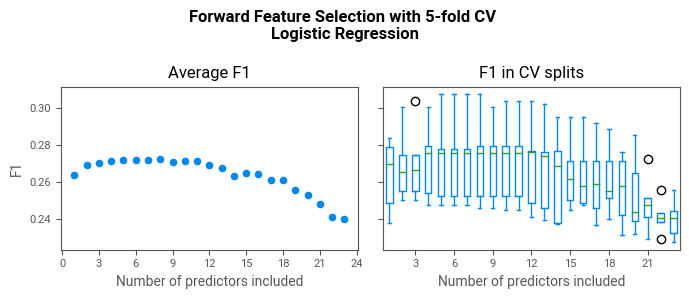

k = 2, avg. F1 = 0.269 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [124]:
# | label: fig-sfs-lr-forward
# | fig-cap: Sequential Feature Selection using Logistic Regression classifier.
ml.sfs_plot_results(sfs_lr_res_forward, "Logistic Regression")

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>List of features </summary>

In [125]:
# | label: tbl-sfs-lr-f
# | tbl-cap: Sequential Feature Selection using Logistic Regression classifier.
# |          In column `added_feature` (forward selection) or `feature` (backward
# |          elimination), the row of interest and the rows above it collectively
# |          indicate the combination of features included in the model.
# |          Columns `score_improvement` and `score_percentage_change`
# |          show the difference between the current and the row above it.
ml.sfs_list_features(sfs_lr_res_forward).style.format(precision=3)

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

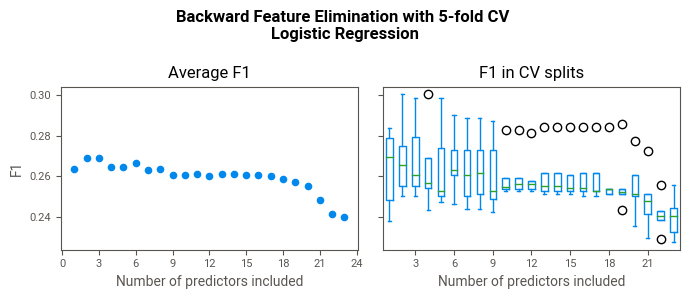

k = 2, avg. F1 = 0.269 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [126]:
# | label: fig-sfs-lr-backward
# | fig-cap: Sequential Feature Selection using Logistic Regression classifier.
ml.sfs_plot_results(sfs_lr_res_backward, "Logistic Regression")

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>List of features </summary>

In [127]:
# | label: tbl-sfs-lr-backward
# | tbl-cap: Sequential Feature Selection using Logistic Regression classifier.
# |          For details, refer to the description of @tbl-sfs-lr-f.
ml.sfs_list_features(sfs_lr_res_backward).style.format(precision=3)

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

### SFS for Naive Bayes

In [128]:
# | results: hide
@my.cache_results(dir_cache + "02_2_sfs_nb_res_f1_forward.pickle")
def do_sfs_nb_f():
    return SFS("Naive Bayes", forward=True)


sfs_nb_res_forward = do_sfs_nb_f()
# Duration: 2.5s

In [129]:
# | results: hide
@my.cache_results(dir_cache + "02_2_sfs_nb_res_f1_backward.pickle")
def do_sfs_nb_b():
    return SFS("Naive Bayes", forward=False)


sfs_nb_res_backward = do_sfs_nb_b()
# Duration: 2.7s

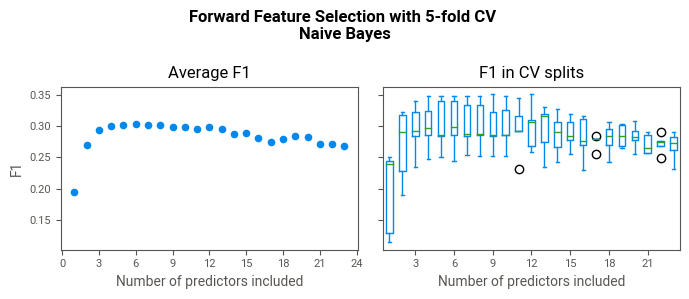

k = 4, avg. F1 = 0.300 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [130]:
# | label: fig-sfs-nb-f
# | fig-cap: Sequential Feature Selection using Naive Bayes classifier.
ml.sfs_plot_results(sfs_nb_res_forward, "Naive Bayes")

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>List of features </summary>

In [131]:
# | label: tbl-sfs-nb-f
# | tbl-cap: Sequential Feature Selection using Naive Bayes classifier.
# |          For details, refer to the description of @tbl-sfs-lr-f.
ml.sfs_list_features(sfs_nb_res_forward).style.format(precision=3)

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

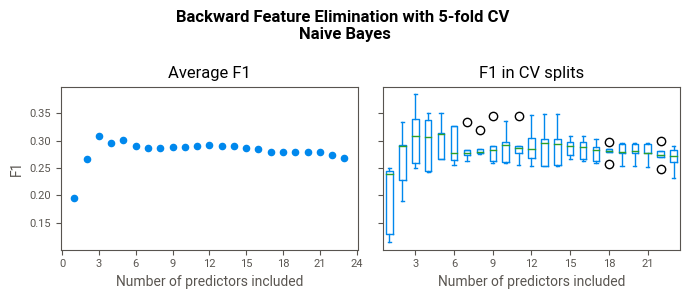

k = 3, avg. F1 = 0.308 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [132]:
# | label: fig-sfs-nb-b
# | fig-cap: Sequential Feature Selection using Naive Bayes classifier.
ml.sfs_plot_results(sfs_nb_res_backward, "Naive Bayes")

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>List of features </summary>

In [133]:
# | label: tbl-sfs-nb-b
# | tbl-cap: Sequential Feature Selection using Naive Bayes classifier.
# |          For details, refer to the description of @tbl-sfs-lr-f.
# |          The highlighted rows indicate the features of the best Naive Bayes
# |          model chosen for further investigation.
(
    ml.sfs_list_features(sfs_nb_res_backward)
    .style.apply(my.highlight_rows_by_index, values=[21, 22, 23], axis=1)
    .format(precision=3)
)

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

### SFS for kNN

In [134]:
# | results: hide
@my.cache_results(dir_cache + "02_3_sfs_knn_res_f1_forward.pickle")
def do_sfs_knn_f():
    return SFS("kNN", forward=True)


sfs_knn_res_forward = do_sfs_knn_f()
# 20.2s

In [135]:
# | results: hide
@my.cache_results(dir_cache + "02_3_sfs_knn_res_f1_backward.pickle")
def do_sfs_knn_b():
    return SFS("kNN", forward=False)


sfs_knn_res_backward = do_sfs_knn_b()
# 15.8s

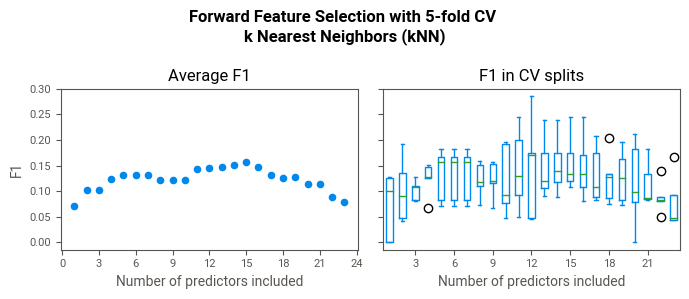

k = 11, avg. F1 = 0.143 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [136]:
# | label: fig-sfs-knn-f
# | fig-cap: Sequential Feature Selection using k nearest neighbors (kNN) classifier.
ml.sfs_plot_results(sfs_knn_res_forward, "k Nearest Neighbors (kNN)")

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>List of features </summary>

In [137]:
# | label: tbl-sfs-knn-f
# | tbl-cap: Sequential Feature Selection using kNN classifier.
# |          For details, refer to the description of @tbl-sfs-lr-f.
ml.sfs_list_features(sfs_knn_res_forward).style.format(precision=3)

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

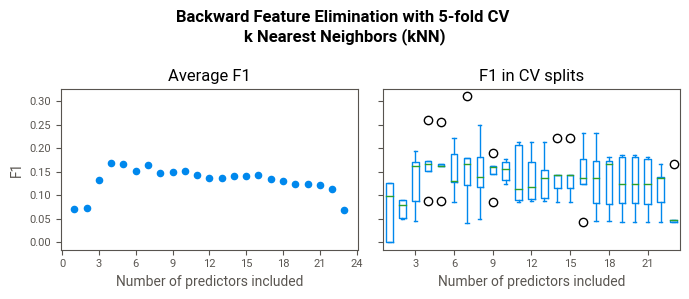

k = 4, avg. F1 = 0.168 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [138]:
# | label: fig-sfs-knn-b
# | fig-cap: Sequential Feature Selection using k nearest neighbors (kNN) classifier.
ml.sfs_plot_results(sfs_knn_res_backward, "k Nearest Neighbors (kNN)")

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>List of features </summary>

In [139]:
# | label: tbl-sfs-knn-f-b
# | tbl-cap: Sequential Feature Selection using kNN classifier.
# |          For details, refer to the description of @tbl-sfs-lr-f.
ml.sfs_list_features(sfs_knn_res_backward).style.format(precision=3)

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

### SFS for SVC

In [140]:
@my.cache_results(dir_cache + "02_4_sfs_svc_res_f1_forward.pickle")
def do_sfs_svc_f():
    return SFS("SVC", forward=True)


sfs_svc_res_forward = do_sfs_svc_f()
# 17m 44.4s

In [141]:
@my.cache_results(dir_cache + "02_4_sfs_svc_res_f1_backward.pickle")
def do_sfs_svc_b():
    return SFS("SVC", forward=False)


sfs_svc_res_backward = do_sfs_svc_b()
# 19m 15.5s

<details class="with-border"><summary>Output details</summary>

Time: Time: 1m 2.3s   
F1

```
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.1s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.5s finished
Features: 10/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    6.4s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.0s finished
Features: 9/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    5.3s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    7.6s finished
Features: 8/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    5.3s remaining:   16.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    6.0s finished
Features: 7/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    5.1s finished
Features: 6/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.8s finished
Features: 5/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished
Features: 4/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.6s finished
Features: 3/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.8s finished
Features: 2/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.1s finished
Features: 1/1
```



Time: 58.4s  
BAcc

```
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.2s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.6s finished
Features: 10/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.5s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.0s finished
Features: 9/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    5.1s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    7.1s finished
Features: 8/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    4.8s remaining:   14.7s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    5.2s finished
Features: 7/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    4.7s finished
Features: 6/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.3s finished
Features: 5/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished
Features: 4/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.4s finished
Features: 3/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.6s finished
Features: 2/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.9s finished
Features: 1/1
```

</details>

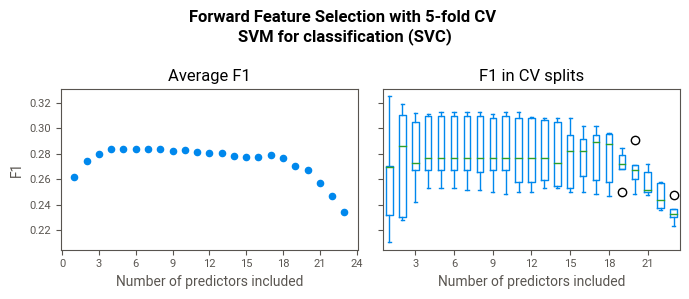

k = 3, avg. F1 = 0.280 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [142]:
# | label: fig-sfs-svc-f
# | fig-cap: Sequential Feature Selection using support vector machine for
# |          classification (SVC).
ml.sfs_plot_results(sfs_svc_res_forward, "SVM for classification (SVC)")

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" open>
<summary>List of features </summary>

In [143]:
# | label: tbl-sfs-svc-f
# | tbl-cap: Sequential Feature Selection using SVC classifier.
# |          For details, refer to the description of @tbl-sfs-lr-f.
# |          The highlighted rows indicate the features of the best SVC
# |          model chosen for further investigation.
(
    ml.sfs_list_features(sfs_svc_res_forward)
    .style.apply(my.highlight_rows_by_index, values=[1, 2, 3], axis=1)
    .format(precision=3)
)

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

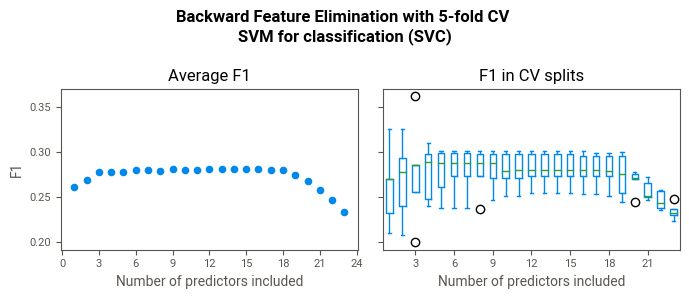

k = 3, avg. F1 = 0.278 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [144]:
# | label: fig-sfs-svc-b
# | fig-cap: Sequential Feature Selection using support vector machine for
# |          classification (SVC).
ml.sfs_plot_results(sfs_svc_res_backward, "SVM for classification (SVC)")

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>List of features </summary>

In [145]:
# | label: tbl-sfs-svc-b
# | tbl-cap: Sequential Feature Selection using SVC classifier.
# |          For details, refer to the description of @tbl-sfs-lr-f.
ml.sfs_list_features(sfs_svc_res_backward).style.format(precision=3)

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

### SFS for RF

In [146]:
# | results: hide
@my.cache_results(dir_cache + "02_5_sfs_rf_res_f1_forward.pickle")
def do_sfs_rf_f():
    return SFS("Random Forest", forward=True)


sfs_rf_res_forward = do_sfs_rf_f()
# 4m 43.9s

In [147]:
# | results: hide
@my.cache_results(dir_cache + "02_5_sfs_rf_res_f1_backward.pickle")
def do_sfs_rf_b():
    return SFS("Random Forest", forward=False)


sfs_rf_res_backward = do_sfs_rf_b()
# 5m 2.4s

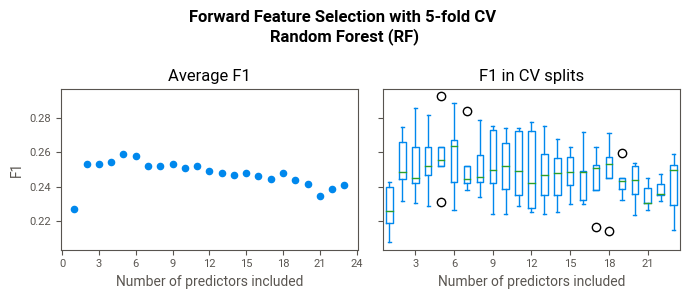

k = 5, avg. F1 = 0.259 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [148]:
# | label: fig-sfs-rf-f
# | fig-cap: Sequential Feature Selection using Random Forest classifier.
ml.sfs_plot_results(sfs_rf_res_forward, "Random Forest (RF)")

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>List of features </summary>

In [149]:
# | label: tbl-sfs-rf-f
# | tbl-cap: Sequential Feature Selection using Random Forest classifier.
# |          For details, refer to the description of @tbl-sfs-lr-f.
ml.sfs_list_features(sfs_rf_res_forward).style.format(precision=3)

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

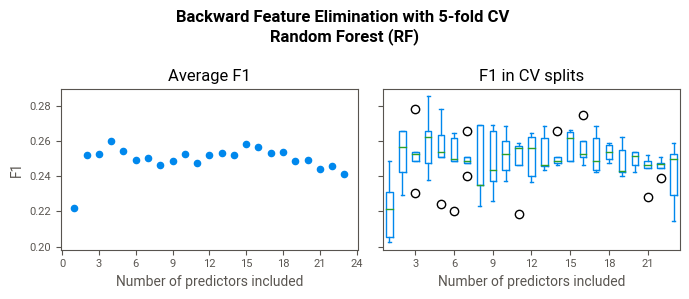

k = 4, avg. F1 = 0.260 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [150]:
# | label: fig-sfs-rf-b
# | fig-cap: Sequential Feature Selection using Random Forest classifier.
ml.sfs_plot_results(sfs_rf_res_backward, "Random Forest (RF)")

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>List of features </summary>

In [151]:
# | label: tbl-sfs-rf-b
# | tbl-cap: Sequential Feature Selection using Random Forest classifier.
# |          For details, refer to the description of @tbl-sfs-lr-f.
ml.sfs_list_features(sfs_rf_res_backward).style.format(precision=3)

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

### SFS for XGBoost

In [152]:
# | results: hide
@my.cache_results(dir_cache + "02_6_sfs_xgb_res_f1_forward.pickle")
def do_sfs_xgb_f():
    return SFS("XGBoost", forward=True)


sfs_xgb_res_forward = do_sfs_xgb_f()
# Duration: 56.3s

In [153]:
# | results: hide
@my.cache_results(dir_cache + "02_6_sfs_xgb_res_f1_backward.pickle")
def do_sfs_xgb_b():
    return SFS("XGBoost", forward=False)


sfs_xgb_res_backward = do_sfs_xgb_b()
# Duration: 56.2s

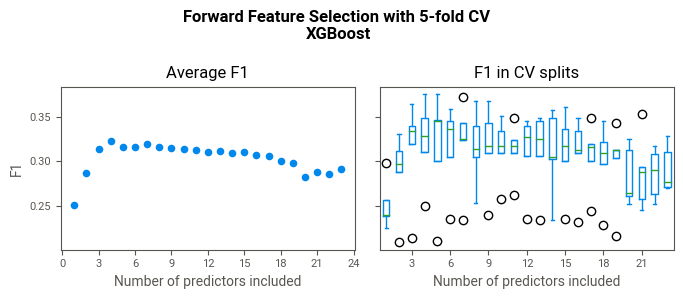

k = 3, avg. F1 = 0.314 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [154]:
# | label: fig-sfs-xgb-f
# | fig-cap: Sequential Feature Selection using XGBoost classifier.
ml.sfs_plot_results(sfs_xgb_res_forward, "XGBoost")

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" open>
<summary>List of features </summary>

In [155]:
# | label: tbl-sfs-xgb-f
# | tbl-cap: Sequential Feature Selection using XGBoost classifier.
# |          For details, refer to the description of @tbl-sfs-lr-f.
# |          The highlighted rows indicate the features of the best XGBoost
# |          model chosen for further investigation.
(
    ml.sfs_list_features(sfs_xgb_res_forward)
    .style.apply(my.highlight_rows_by_index, values=[1, 2, 3], axis=1)
    .format(precision=3)
)

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

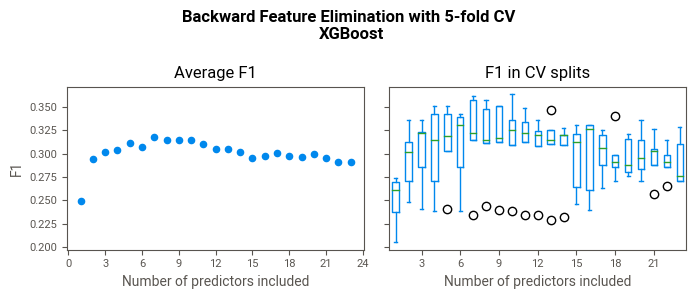

k = 3, avg. F1 = 0.302 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [156]:
# | label: fig-sfs-xgb-b
# | fig-cap: Sequential Feature Selection using XGBoost classifier.
ml.sfs_plot_results(sfs_xgb_res_backward, "XGBoost")

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border">
<summary>List of features </summary>

In [157]:
# | label: tbl-sfs-xgb-b
# | tbl-cap: Sequential Feature Selection using XGBoost classifier.
# |          For details, refer to the description of @tbl-sfs-lr-f.
ml.sfs_list_features(sfs_xgb_res_backward).style.format(precision=3)

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

### SFS for LightGBM

In [158]:
# | results: hide
@my.cache_results(dir_cache + "02_7_sfs_lgbm_res_f1_forward.pickle")
def do_sfs_lgbm_f():
    return SFS("LightGBM", forward=True)


sfs_lgbm_res_forward = do_sfs_lgbm_f()
# 1m 58.4s

In [159]:
# | results: hide
@my.cache_results(dir_cache + "02_7_sfs_lgbm_res_f1_backward.pickle")
def do_sfs_lgbm_b():
    return SFS("LightGBM", forward=False)


sfs_lgbm_res_backward = do_sfs_lgbm_b()
# 2m 28.4s

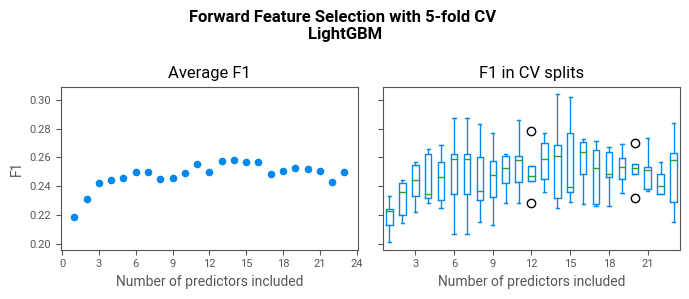

k = 11, avg. F1 = 0.255 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [160]:
# | label: fig-sfs-lgbm-f
# | fig-cap: Sequential Feature Selection using LightGBM classifier.
ml.sfs_plot_results(sfs_lgbm_res_forward, "LightGBM")

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border">
<summary>List of features </summary>

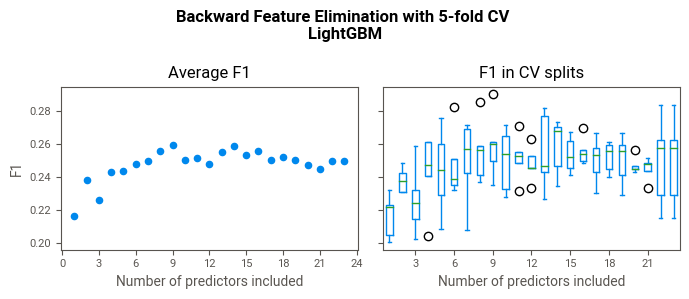

k = 9, avg. F1 = 0.260 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [161]:
# | label: fig-sfs-lgbm-b
# | fig-cap: Sequential Feature Selection using LightGBM classifier.
ml.sfs_plot_results(sfs_lgbm_res_backward, "LightGBM")

In [162]:
# | label: tbl-sfs-lgbm-f
# | tbl-cap: Sequential Feature Selection using LightGBM classifier.
# |          For details, refer to the description of @tbl-sfs-lr-f.
ml.sfs_list_features(sfs_lgbm_res_forward).style.format(precision=3)

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border">
<summary>List of features </summary>

In [163]:
# | label: tbl-sfs-lgbm-b
# | tbl-cap: Sequential Feature Selection using LightGBM classifier.
# |          For details, refer to the description of @tbl-sfs-lr-f.
ml.sfs_list_features(sfs_lgbm_res_backward).style.format(precision=3)

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

### SFS for CatBoost

In [164]:
# | results: hide
@my.cache_results(dir_cache + "02_8_sfs_cat_res_f1_forward.pickle")
def do_sfs_cat_f():
    return SFS("CatBoost", forward=True)


sfs_cat_res_forward = do_sfs_cat_f()
# 5m 35.1s

In [165]:
# | results: hide
@my.cache_results(dir_cache + "02_8_sfs_cat_res_f1_backward.pickle")
def do_sfs_cat_b():
    return SFS("CatBoost", forward=False)


sfs_cat_res_backward = do_sfs_cat_b()
# 8m 56.0s

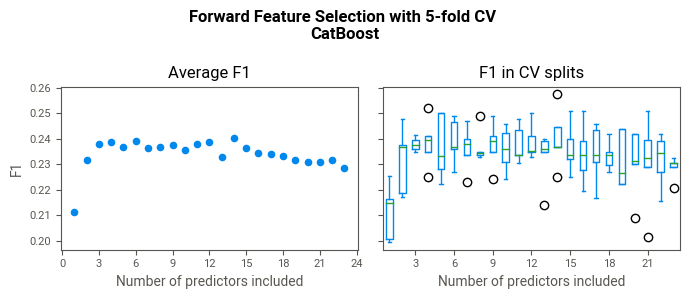

k = 4, avg. F1 = 0.239 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [166]:
# | label: fig-sfs-cat-f
# | fig-cap: Sequential Feature Selection using CatBoost classifier.
ml.sfs_plot_results(sfs_cat_res_forward, "CatBoost")

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border">
<summary>List of features </summary>

In [167]:
# | label: tbl-sfs-cat-f
# | tbl-cap: Sequential Feature Selection using CatBoost classifier.
# |          For details, refer to the description of @tbl-sfs-lr-f.
ml.sfs_list_features(sfs_cat_res_forward).style.format(precision=3)

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

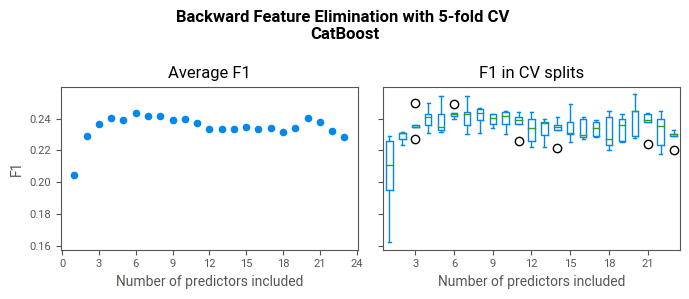

k = 6, avg. F1 = 0.243 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [168]:
# | label: fig-sfs-cat-b
# | fig-cap: Sequential Feature Selection using CatBoost classifier.
ml.sfs_plot_results(sfs_cat_res_backward, "CatBoost")

::: {.content-hidden when-format="html"}

---

Start of the collapsible section 
`<details>`

:::

<details class="with-border" >
<summary>List of features </summary>

In [169]:
# | label: tbl-sfs-cat-b
# | tbl-cap: Sequential Feature Selection using CatBoost classifier.
# |          For details, refer to the description of @tbl-sfs-lr-f.
ml.sfs_list_features(sfs_cat_res_backward).style.format(precision=3)

</details>


::: {.content-hidden when-format="html"}

`</details>` 
End of the collapsible section

---

:::

### Summary of SFS Results

This section summarizes the results of SFS analysis for each classifier (@tbl-sfs-summary).

::: {.callout-tip}

#### Decision 

These classifiers were selected as the candidates for the final evaluation

1) XGBoost (@fig-sfs-xgb-f, @tbl-sfs-xgb-f), 
2) Naive Bayes (@fig-sfs-nb-b, @tbl-sfs-nb-b), and
3) Support Vector Machine (SVC; @fig-sfs-svc-f, @tbl-sfs-svc-f).

:::

In [170]:
# | label: tbl-sfs-summary
# | tbl-cap: 'Summary of the forward and backward Sequential Feature Selection results:
# |         the number of selected predictors and the F1 score of the optimal
# |         model for each classifier type. F1 scores are highlighted based on
# |         the score: highest values are in dark blue, lowest values are in
# |         dark red.'
# | code-summary: Code of the figure
# | code-fold: true

data_str = """
Classifier             |  SFS type   | SFS duration | Number of selected predictors | F1 score | Selection method  | Selected for further analysis
Logistic Regression    |  Forward    |       7.1s   |  2                            | 0.269    |  Parsimonious¹    |
Logistic Regression    |  Backward   |       4.3s   |  2                            | 0.269    |  Parsimonious¹    |
Naive Bayes            |  Forward    |       2.5s   |  4                            | 0.300    |  Parsimonious¹    |
Naive Bayes            |  Backward   |       2.7s   |  3                            | 0.308    |  Parsimonious¹    | Yes
k Nearest Neighbors    |  Forward    |      20.2s   | 11                            | 0.143    |  Parsimonious¹    |
k Nearest Neighbors    |  Backward   |      15.8s   |  4                            | 0.168    |  Parsimonious¹    |
Support Vector Machine |  Forward    |  17m 44.4s   |  3                            | 0.280    |  Parsimonious¹    | Yes
Support Vector Machine |  Backward   |  19m 15.5s   |  3                            | 0.278    |  Parsimonious¹    |
Random Forest          |  Forward    |   4m 43.9s   |  5                            | 0.259    |  Parsimonious¹    |
Random Forest          |  Backward   |   5m  2.4s   |  4                            | 0.260    |  Parsimonious¹    |
XGBoost                |  Forward    |      56.3s   |  3                            | 0.314    |  Parsimonious¹    | Yes
XGBoost                |  Backward   |      56.2s   |  3                            | 0.308    |  Parsimonious¹    |
LightGBM               |  Forward    |   1m 58.4s   |  11                           | 0.255    |  Parsimonious¹    |
LightGBM               |  Backward   |   2m 28.4s   |  9                            | 0.260    |  Parsimonious¹    |
CatBoost               |  Forward    |   5m 35.1s   |  4                            | 0.239    |  Parsimonious¹    |
CatBoost               |  Backward   |   8m 56.0s   |  6                            | 0.243    |  Parsimonious¹    |
"""

# Read the data into a pandas DataFrame
df = pd.read_csv(StringIO(data_str), sep="|")

# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Display the DataFrame
(
    df.style.background_gradient(
        cmap="RdBu", subset=["F1 score"], vmin=0.24, vmax=0.30
    ).format(precision=3, na_rep="")
)

¹ Parsimonious method (the smallest number of features within 1 standard error from the best performance score) was used to select the number of features.

---

## Hyperparameter Tuning

In this section:

1) data processing pipelines will be created for the selected models;
2) the models that have hyperparameters to tune will be fine-tuned.

### Define Pipeline for Naive Bayes

Naive Bayes does not have any hyperparameters to tune. 
So only a pipeline is defined here.

In [171]:
# | code-fold: true

# Selected features
nb_required_features = [
    "stroke_risk_40",
    "stroke_incidence",
    "avg_glucose_gr_above_165_01",
]

# Pipeline
nb_pipeline = Pipeline(
    steps=[
        (
            "preprocessor",
            Pipeline([
                ("selector", ColumnSelector(nb_required_features)),
                ("transformer", clone(group_dependent_preprocessor)),
            ]),
        ),
        ("classifier", GaussianNB()),
    ]
)

nb_pipeline.fit(X_train, y_train)
# 0.2s

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('selector',
                                  ColumnSelector(keep=['stroke_risk_40',
                                                       'stroke_incidence',
                                                       'avg_glucose_gr_above_165_01'])),
                                 ('transformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_se...
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x000001727CD875D0>),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(sparse_output=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x000001727CF37210>)],
                                                    verbose_feature_names_out=False))])),
                ('classifier', GaussianNB())])

### Tune SVC model

In this subsection, a Support Vector Machine for Classification (SVC) will be tuned.

*Note:* Hyperparameter tuning using `OptunaSearchCV` completed most of the trials within 10 minutes. However, a few trials remained stuck for hours. I interrupted the last tuning attempt after approximately 422 minutes (@fig-svc-optuna-stuck). I did several attempt like that some of them did not finish even after 600 minutes (10 hours). Luckily, Optuna prints out intermediate results, so from these attempts I selected the hyperparameters that performed best.

In [172]:
# | code-fold: true

# Selected features
svc_required_features = [
    "stroke_risk_40",
    "health_risk_score",
    "age_smoking_interaction",
]

# In order not to run hyperparameter tuning step that may stuck, I added a flag
# to skip it. If needed, you may rerun the search and stop it after a required
# amount of time.
to_tune_svc = False

if to_tune_svc:
    # Pipeline
    svc_pipeline = Pipeline(
        steps=[
            (
                "preprocessor",
                Pipeline([
                    ("selector", ColumnSelector(svc_required_features)),
                    ("transformer", clone(group_dependent_preprocessor)),
                ]),
            ),
            (
                "classifier",
                SVC(random_state=1, probability=True, class_weight="balanced"),
            ),
        ]
    )

    # Tune SVC model and cache the results

    @my.cache_results(dir_cache + "03_1_tune_svc.pickle")
    def tune_svc():
        # Hyperparameter space
        svc_params = {
            "classifier__kernel": CategoricalDistribution(["linear", "rbf", "poly"]),
            "classifier__C": FloatDistribution(1e-3, 100, log=True),
            "classifier__gamma": FloatDistribution(1e-3, 100, log=True),
            "classifier__degree": IntDistribution(1, 6),
        }

        # Define the search
        search = OptunaSearchCV(
            svc_pipeline,
            svc_params,
            cv=5,
            scoring="f1",
            n_trials=200,
            random_state=1,
            n_jobs=-1,
            verbose=1,
        )

        # Perform hyperparameter tuning using cross-validation
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=FutureWarning)
            search.fit(X_train, y_train)

        return search

    tuning_results_svc = tune_svc()
# Duration: interrupted after 422m 8.7s


# Pipeline with the best hyperparameters
svc_pipeline = Pipeline(
    steps=[
        (
            "preprocessor",
            Pipeline([
                ("selector", ColumnSelector(svc_required_features)),
                ("transformer", clone(group_dependent_preprocessor)),
            ]),
        ),
        (
            "classifier",
            SVC(
                random_state=1,
                probability=True,
                class_weight="balanced",
                **{
                    "kernel": "poly",
                    "C": 39.77955198439039,
                    "gamma": 0.002965591796461689,
                    "degree": 2,
                },
            ),
        ),
    ]
)
svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('selector',
                                  ColumnSelector(keep=['stroke_risk_40',
                                                       'health_risk_score',
                                                       'age_smoking_interaction'])),
                                 ('transformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selec...
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(sparse_output=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x000001727E79F3D0>)],
                                                    verbose_feature_names_out=False))])),
                ('classifier',
                 SVC(C=39.77955198439039, class_weight='balanced', degree=2,
                     gamma=0.002965591796461689, kernel='poly',
                     probability=True, random_state=1))])

![One of the attempts where `OptunaSearchCV` stuck on several not finished attempts for hours.](img/2023-09-21--09-26-47.png){#fig-svc-optuna-stuck}

The best SVC model:

```
[I 2023-09-21 09:58:14,387] Trial 183 finished with value: 0.2994436969318081 and parameters: {'classifier__kernel': 'poly', 'classifier__C': 39.77955198439039, 'classifier__gamma': 0.002965591796461689, 'classifier__degree': 2}. 

Best is trial 183 with value: 0.2994436969318081.
```

### Tune XGBoost

Next, XGBoost model will be tuned.

In [173]:
# | code-fold: true

# Selected features
xgb_required_features = [
    "age_gender_interaction",
    "avg_glucose_gr_above_165_01",
    "stroke_risk_40",
]

# Pipeline
xgb_pipeline = Pipeline(
    steps=[
        (
            "preprocessor",
            Pipeline([
                ("selector", ColumnSelector(xgb_required_features)),
                ("transformer", clone(group_dependent_preprocessor)),
            ]),
        ),
        ("classifier", best_models["XGBoost"]["classifier"]),
    ]
)

# Tune xgboost model and cache the results


@my.cache_results(dir_cache + "03_2_tune_xgb.pickle")
def tune_xgb():
    # Hyperparameters space
    xgb_params = {
        "classifier__n_estimators": IntDistribution(10, 1000, step=10),
        "classifier__max_depth": IntDistribution(1, 10),
        "classifier__scale_pos_weight": FloatDistribution(1, 60),
        "classifier__min_child_weight": IntDistribution(1, 20),
        "classifier__gamma": FloatDistribution(1e-8, 1, log=True),
        "classifier__reg_alpha": FloatDistribution(1e-8, 1, log=True),
        "classifier__reg_lambda": FloatDistribution(1e-8, 1, log=True),
        "classifier__subsample": FloatDistribution(0.05, 1),
        "classifier__colsample_bytree": FloatDistribution(0.05, 1, log=True),
        "classifier__learning_rate": FloatDistribution(1e-3, 1, log=True),
    }

    # Define the search
    search = OptunaSearchCV(
        xgb_pipeline,
        xgb_params,
        cv=5,
        scoring="f1",
        n_trials=200,
        timeout=1000,
        random_state=1,
        n_jobs=-1,
        verbose=1,
    )

    # Perform hyperparameter tuning using cross-validation
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)
        search.fit(X_train, y_train)

    return search


tuning_results_xgb = tune_xgb()
tuning_results_xgb
# Duration: 3m 50.9s

OptunaSearchCV(cv=5,
               estimator=Pipeline(steps=[('preprocessor',
                                          Pipeline(steps=[('selector',
                                                           ColumnSelector(keep=['age_gender_interaction',
                                                                                'avg_glucose_gr_above_165_01',
                                                                                'stroke_risk_40'])),
                                                          ('transformer',
                                                           ColumnTransformer(transformers=[('numeric',
                                                                                            Pipeline(steps=[('imputer',
                                                                                                             SimpleImputer(strategy='median')),
                                                                                                            ('scaler',
                                                                                                             StandardScaler())]),
                                                                                            <sklearn.compos...
                                    'classifier__reg_alpha': FloatDistribution(high=1.0, log=True, low=1e-08, step=None),
                                    'classifier__reg_lambda': FloatDistribution(high=1.0, log=True, low=1e-08, step=None),
                                    'classifier__scale_pos_weight': FloatDistribution(high=60.0, log=False, low=1.0, step=None),
                                    'classifier__subsample': FloatDistribution(high=1.0, log=False, low=0.05, step=None)},
               random_state=1, scoring='f1', timeout=1000, verbose=1)

The best XGBoost model:

```
[I 2023-09-24 09:33:03,196] Trial 194 finished with value: 0.3076357369723567 and parameters: {'classifier__n_estimators': 960, 'classifier__max_depth': 5, 'classifier__scale_pos_weight': 7.087738003648041, 'classifier__min_child_weight': 9, 'classifier__gamma': 0.35508303168648314, 'classifier__reg_alpha': 0.4127588744223943, 'classifier__reg_lambda': 7.520697059910392e-05, 'classifier__subsample': 0.7755901359590227, 'classifier__colsample_bytree': 0.5273351309040184, 'classifier__learning_rate': 0.0033382168701707937}.

Best is trial 194 with value: 0.3076357369723567.
```

### Comparison of Tuned Models

This subsection summarizes the results of the tuned Naive Bayes, XGBoost, and SVC models. @tbl-tune-test displays scores for the training set without cross-validation, while @tbl-tune-validation shows scores for the validation set. It appears that both Naive Bayes and XGBoost exhibit signs of overfitting, with higher F1 scores in the training set than in the validation set. Conversely, SVC demonstrates more consistent F1 scores, with values of 0.293 in the training set and 0.238 in the validation set, which are closer to each other compared to the other two classifiers.

::: {.callout-tip}
#### Decision

**SVC** was selected as the best model for this dataset.

:::

In [174]:
final_candidates = {
    "Naive Bayes": nb_pipeline,
    "SVC": svc_pipeline,
    "XGBoost": tuning_results_xgb.best_estimator_,
}

In [175]:
# | code-fold: true
# | label: tbl-tune-test
# | tbl-cap: 'Hyperparameter tuning results for the **training set**.
# |           The best values in each column are highlighted.
# |           *Note:* The F1 scores here and above differ as scores in this
# |            table are calculated without cross-validation.'
ml.print_classification_scores(
    final_candidates,
    X_train,
    y_train,
    "--- Train ---",
    color="orange",
    precision=3,
    sort_by="F1",
)

--- Train ---
No information rate:  0.951


In [176]:
# | code-fold: true
# | label: tbl-tune-validation
# | tbl-cap: 'Hyperparameter tuning results for the **validation set**
# |           The best values in each column are highlighted.'
ml.print_classification_scores(
    final_candidates,
    X_validation,
    y_validation,
    "--- Validation ---",
    precision=3,
    sort_by="F1",
)

--- Validation ---
No information rate:  0.952


# Final Model

## Preparation

### Prepare Data for Final Model Evaluation

- First, merge training and validation data to form a dataset that will be used for creating the model.
- Second, separate predictors and target variable.

::: {.callout-note}

**Final trining set = training set + validation set**

:::

In [177]:
target = "stroke_01"

# Train + validation set for training model
data_train_final = pd.concat([data_train, data_validation])
X_train_final = data_train_final.drop(target, axis=1)
y_train_final = data_train_final[target].to_numpy()

# Test set for testing model
X_test = data_test.drop(target, axis=1)
y_test = data_test[target].to_numpy()

### Create Final Pipeline

Now, final pre-processing and prediction pipeline will be created af fitted:

- First, **define** the final **pipeline**.  
- Second, **fit** the pipeline to the training (training + validation) data.

In [178]:
# Final pipeline
pipeline_features_in = ["age", "smoking_status", "health_risk_score"]
# Note:
# FeatureEngineer from variables "age", "health_risk_score", "smoking_status"
# it creates "stroke_risk_40", "health_risk_score", "age_smoking_interaction".
pre_processor = Pipeline(
    steps=[
        ("selector", ColumnSelector(pipeline_features_in)),
        ("feature_engineer", FeatureEngineer()),
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

classifier = SVC(
    random_state=1,
    probability=True,
    class_weight="balanced",
    kernel="poly",
    degree=2,
    C=39.77955198439039,
    gamma=0.002965591796461689,
)

final_pipeline = Pipeline([
    ("preprocessor", pre_processor),
    ("classifier", classifier),
])

final_pipeline.fit(X_train_final, y_train_final)

final_pipeline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('selector',
                                  ColumnSelector(keep=['age', 'smoking_status',
                                                       'health_risk_score'])),
                                 ('feature_engineer', FeatureEngineer()),
                                 ('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('classifier',
                 SVC(C=39.77955198439039, class_weight='balanced', degree=2,
                     gamma=0.002965591796461689, kernel='poly',
                     probability=True, random_state=1))])

## Performance on Test Data

The performance of the final model on the test data is as follows: **F1** (of positive group) is **32.1%**, **balanced accuracy** is **73.7%** and **ROC AUC** is **0.801**.
Performance on the training set is slightly lower than on test set (that is unusual), but trends between the sets are similar (see @tbl-final-performance and compare @fig-confusion-matrix-train with @fig-confusion-matrix-test) which indicates that model captures trends an not noise.

In [179]:
# | code-fold: true
# | label: tbl-final-performance
# | tbl-cap: 'Final model performance on **final training** and **test** sets.'
pd.DataFrame.from_dict(
    {
        "SVC (train)": ml.get_classification_scores(
            final_pipeline, X_train_final, y_train_final
        ),
        "SVC (test)": ml.get_classification_scores(final_pipeline, X_test, y_test),
    },
    orient="index",
).style.format(precision=3)

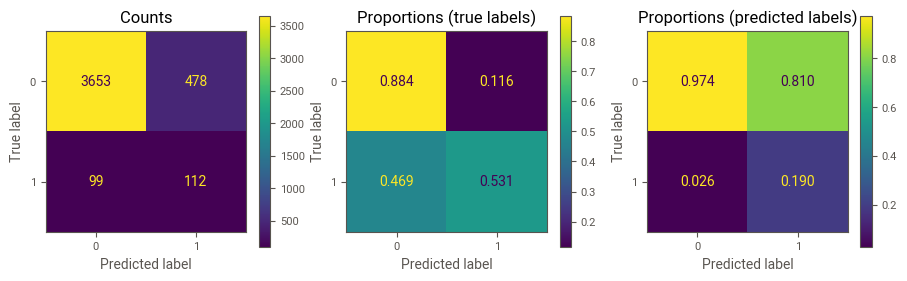

In [180]:
# | code-fold: true
# | label: fig-confusion-matrix-train
# | fig-cap: 'Confusion matrix for the final model (**final training set**): absolute
# |           counts (left), true-label normalized proportions (center), and
# |           predicted-label normalized proportions (right).'

y_pred_final = final_pipeline.predict(X_train_final)

plot_confusion_matrices(y_train_final, y_pred_final);

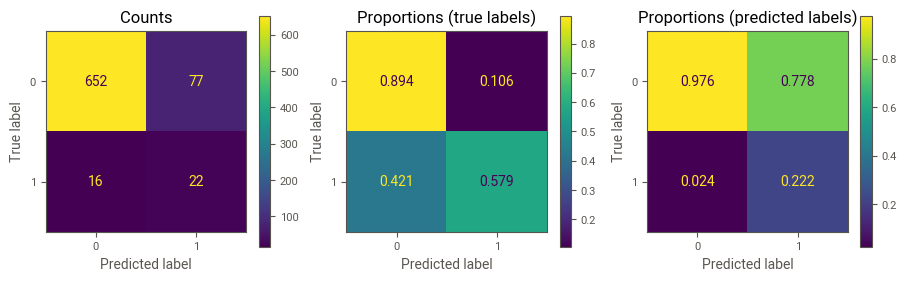

In [181]:
# | code-fold: true
# | label: fig-confusion-matrix-test
# | fig-cap: 'Confusion matrix for the final model (**test set**): absolute
# |           counts (left), true-label normalized proportions (center), and
# |           predicted-label normalized proportions (right).'

y_pred = final_pipeline.predict(X_test)
plot_confusion_matrices(y_test, y_pred);

## Feature Importance

In this section, the importance of each predictor is evaluated using SHAP values.
In general, `stroke_risk_40` variable is 2 times more influential than each of the remaining variables (@fig-shap-general).
Yet, in some cases `health_risk_score` have more influence than the other predictors (see right-most red dots in @fig-shap-summary).
The highest values of each of the 3 predictors lead to the positive outcome (i.e., stroke) while moderate and low values either do not have much influence or lead to the negative outcome (i.e., no stroke; see @fig-shap-summary).


In [182]:
# | code-summary: Code to calculate SHAP values
# | code-fold: true


@my.cache_results(dir_cache + "04_1_shap_values.pickle")
def get_shap(pipeline, X_train, y_train, X_test):
    """Calculate SHAP values"""
    preprocessor = clone(pipeline["preprocessor"])
    model = clone(pipeline["classifier"])

    d_train = preprocessor.fit_transform(X_train)
    d_test = preprocessor.transform(X_test)

    model.fit(d_train, y_train)
    explainer = shap.Explainer(model.predict_proba, d_test)
    shap_values = explainer(d_test)
    return shap_values


shap_values = get_shap(final_pipeline, X_train_final, y_train_final, X_test)

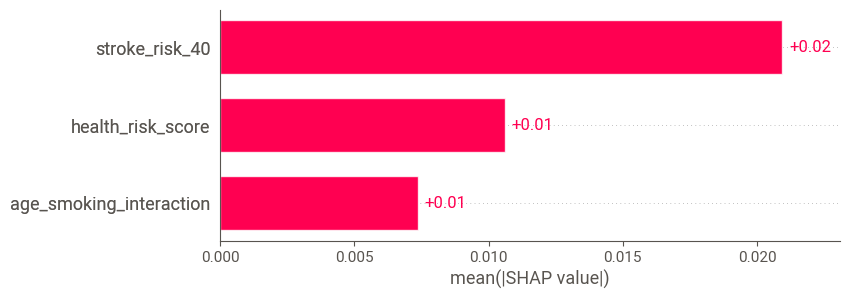

In [183]:
# | label: fig-shap-general
# | fig-cap: 'General feature importance for the final model:
# |           variables that were provided to the classifier.'
# | code-summary: Code of the figure
# | code-fold: true

shap.plots.bar(shap_values[:, :, 1], max_display=30);

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


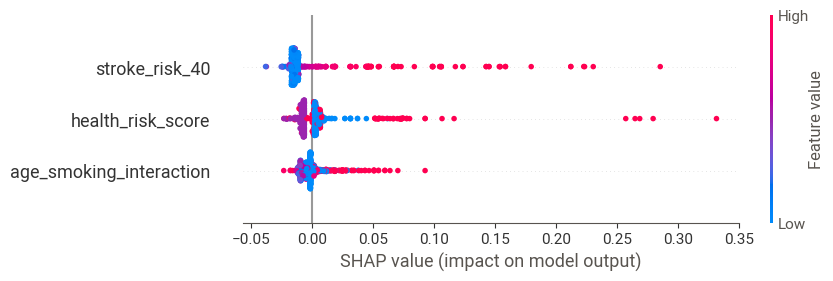

In [184]:
# | label: fig-shap-summary
# | fig-cap: 'Influence of feature values on the prediction in the final model:
# |           variables that were provided to the classifier.'
# | code-summary: Code of the figure
# | code-fold: true
shap.plots.beeswarm(shap_values[:, :, 1], max_display=30);

## Classification Model for Production

A pre-processing pipeline and the model trained on the entire dataset (including training, validation, and test data) will be saved to a file. This file will be utilized in the production environment to predict a patient's likelihood of experiencing a stroke. In the production environment, the input variables will be:

- `age` (in years);
- `health_risk_score` (integer from 0 to 4);
- `smoking_status` (one of the following: `never smoked`, `smokes`, `formerly smoked`, `unknown`).

The variables required by the model will be created within the pipeline.

In [185]:
target = "stroke_01"
production_pipeline = clone(final_pipeline)
production_pipeline.fit(data_train.drop(target, axis=1), data_train[target])

file = "model_to_deploy/final_pipeline.pkl"
with open(file, "wb") as f:
    joblib.dump(production_pipeline, f)

## Deployment

To deploy the model, a Flask application was created. The code needed to deploy the application is present in Github repository [GegznaV/deploy-stroke-prediction](https://github.com/GegznaV/deploy-stroke-prediction). 
For predictions, you send a request to the application providing the following information about the patient as a JSON object:

- `age` (in years);
- `health_risk_score` (integer from 0 to 5);
- `smoking_status` (one of the following: `never smoked`, `formerly smoked`, `smokes`, `Unknown`).

You may access the application via online server or use a local development server.

::: {.callout-important}
#### Disclaimer

The predictions of this model **must not be used as medical advice**. 
For medical advice, please, consult your physician.

:::

### Predictions via Online Server

Model was deployed on Render.com and accessible at *https://stroke-prediction-af8t.onrender.com* (you should use this URL only with the available routes). You may test if server is up via route `/test` ([link](https://stroke-prediction-af8t.onrender.com/test)) and make predictions via route `/api/predict`. 


The examples to test the service will use `curl` command line tool.
To to run the examples `curl` must be installed.



```bash
curl -k https://stroke-prediction-af8t.onrender.com/test
```
Response:
```
OK - server is up and running!
```

You may also use other ways to communicate with the server.
@fig-deployment-test-server demonstrates the request sent via *Thunder Client* extension for *VSCode*.

![Testing if server is running via request in *VSCode* extension *Thunder Client*.](img/2023-09-26--11-23-15.png){#fig-deployment-test-server}



To make predictions use, e.g.:
```bash
curl https://stroke-prediction-af8t.onrender.com/api/predict --ssl-no-revoke \
     -H 'Content-Type: application/json' \
     -d '{"age":[30], "health_risk_score":[1], "smoking_status":["never smoked"]}'
```
Response (manually re-formatted for better readability):
```
{"inputs":{
  "age":[30],
  "health_risk_score":[1],
  "smoking_status":["never smoked"]
  },
  "prediction":[0],
  "stroke_probability":[0.028515656235292997]
}
```

To request predictions about several people at once use, e.g.:
```bash
curl https://stroke-prediction-af8t.onrender.com/api/predict --ssl-no-revoke \
     -H 'Content-Type: application/json' \
     -d '{"age":[30, 65, 84], "health_risk_score":[1, 0, 3], "smoking_status":["never smoked", "smokes", "never smoked"]}'
```
Response (again manually re-formatted):
```
{"inputs":{
  "age":[30,65,84],
  "health_risk_score":[1,0,3],
  "smoking_status":["never smoked","smokes","never smoked"]
  },
  "prediction":[0,0,1],
  "stroke_probability":[0.028515656235292997,0.05356717176142374,0.7776111298079225]
}
```

The same request sent via client *Thunder Client* in *VSCode* is shown in @fig-deployment-predict.

![Making prediction via API request in *VSCode* extension *Thunder Client*.](img/2023-09-26--11-24-52.png){#fig-deployment-predict}

### Predictions Locally via Development Server

To deploy app locally and ant test its responses, download the contents of GitHub repository (see above) to your working directory and run the following commands in the terminal:

```bash
python stroke_prediction_app.py
```

To test if the server is running, use:
```bash
curl -X GET http://127.0.0.1:5000/test
```

To make predictions, use, e.g.:
```bash
curl -X POST http://127.0.0.1:5000/predict \
     -H 'Content-Type: application/json' \
     -d '{"age":[30], "health_risk_score":[1], "smoking_status":["never smoked"]}'
```

```bash
curl -X POST http://127.0.0.1:5000/predict \
     -H 'Content-Type: application/json' \
     -d '{"age":[30, 65, 84], "health_risk_score":[1, 0, 3], "smoking_status":["never smoked", "smokes", "never smoked"]}'
```

# Final Remarks

Notes and ideas for improvement:

1) Before feature engineering, a baseline model could be created to see if the feature engineering actually improves the model.
2) To avoid additional noise and make models more comparable using cross-validation, it would be better to use cross-validation object. Despite the fact that I used random seeds, I got suspicious about this after I noticed that Optuna's OptunaSearchCV results are not reproducible even with the same random seed.
3) Investigate more thoroughly why some CatBoost optimization trials failed. I already found that cross-entropy loss function is not compatible with imbalanced data (options that take this into account).
4) A better space of SVC hyperparameters could be defined as some combinations of hyperparameters result in extremely long calculation times yet (in many cases) do not improve the performance. More investigation on this could be done.
5) SVC predictions via `.predict()` and `.predict_proba()` methods are not always in alignment to each other. This is a known issue (e.g., [link 1](https://github.com/scikit-learn/scikit-learn/issues/13211) and [link 2](https://scikit-learn.org/stable/modules/svm.html#scores-and-probabilities)) and I found out about it only after the model was deployed. Due to lack of time, I did not look deeply into the issue, but it must be investigated further to decide if the predictions are really reliable.
6) More extensive feature engineering could be performed (e.g., interaction between age and more different smoking statuses; log-transformation and other mathematical transformations could be tried for predictors).
7) Feature importance could have been calculated not only for the features that were used in the model but also for those that could provide better understanding for doctors and patients. For example, this could include features such as patient's age, health risk score, smoking status, or even separate components of the health risk score.
8) The final production pipeline is quite vulnerable to errors (e.g., to the wrong user input). This should be improved by adding more checks, disallowing forbidden values (user input) and creating informative error messages. Yet, the main purpose of this project was prototyping and not the robustness of production line.
9) Some plots and other results were not commented in the text. This should be improved. Yet, I decided to keep those plots/results for data monitoring purposes.
10) The code could be better organized. Functions that are not used in this project could be removed from the external files.

***